In [1]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import os
from gensim.models import Word2Vec
import logging
logging.basicConfig(format='%(asctime)s:%(levelname)s : %(message)s', level=logging.INFO)

%matplotlib inline

# URL to corpus

In [2]:
#find ss_data and file_list which need to be dealed
work_path = os.open('/home/mmde-lab/s3/59e875d818c7b/ss_bid_170511-180331',os.O_RDONLY)
files = os.listdir(work_path)
files= sorted(files)
files = files[1:]
end_bid = files.index('kddilab_get_luxa_from_db_20171001.csv.gz')
files = files[:end_bid]
files.remove('kddilab_get_luxa_from_db_20170824.csv.gz')
file_path = '/home/mmde-lab/s3/59e875d818c7b/ss_bid_170511-180331/'

In [ ]:
# open the dictionary of url-> url_id, creat corpus_list
url_dict = np.load('url_dict.npy')
df_dict = url_dict.item()

In [71]:
corpus = []

In [67]:
def preprocess4corpus(file_path,file_name): 
    temp_csv = pd.read_csv(file_path + file_name, sep = '\t', header = None, compression='gzip')
    temp_csv = temp_csv.iloc[:, [2,4]]
    temp_csv = temp_csv.dropna()
    temp_csv[4] = temp_csv[4].map(lambda x: df_dict[x])
    temp_csv[4] = temp_csv[4].map(lambda x: str(x))
    df_session = temp_csv.groupby(2).apply(lambda x: ' '.join(list(x[4])))
    df_session = pd.DataFrame(df_session)
    df_session = df_session.reset_index()
    df_session.columns = ['uuid', 'url_session']
    df_session.url_session = df_session.url_session.map(lambda x: x.split(' '))

    return df_session.url_session.values

In [72]:
for file in files:
    corpus.extend(preprocess4corpus(file_path, file))
    print(file[-11:-7] + ' end!', end= '   ')

0511 end!   0512 end!   0513 end!   0514 end!   0515 end!   0516 end!   0517 end!   0518 end!   0519 end!   0520 end!   0521 end!   0522 end!   0523 end!   0524 end!   0525 end!   0526 end!   0527 end!   0528 end!   0529 end!   0530 end!   0531 end!   0601 end!   0602 end!   0603 end!   0604 end!   0605 end!   0606 end!   0607 end!   0608 end!   0609 end!   0610 end!   0611 end!   0612 end!   0613 end!   0614 end!   0615 end!   0616 end!   0617 end!   0618 end!   0619 end!   0620 end!   0621 end!   0622 end!   0623 end!   0625 end!   0626 end!   0627 end!   0628 end!   0629 end!   0630 end!   0701 end!   0702 end!   0703 end!   0704 end!   0705 end!   0706 end!   0707 end!   0708 end!   0709 end!   0710 end!   0711 end!   0712 end!   0713 end!   0714 end!   0715 end!   0716 end!   0717 end!   0718 end!   0719 end!   0720 end!   0721 end!   0722 end!   0723 end!   0724 end!   0725 end!   0726 end!   0801 end!   0802 end!   0803 end!   0804 end!   0805 end!   0806 end!   0807 end!   0808

In [73]:
np.save('url.npy', corpus)

# Load porpus  and begin to generate vector

In [3]:
corpus = np.load('url.npy')

In [ ]:
model = Word2Vec(iter=1,compute_loss = True, min_count = 20, size = 200, window = 5, workers = 40, sg = 1, hs = 0, negative = 10)
model.build_vocab(corpus)
#model.train(corpus, total_examples=model.corpus_count, epochs=model.iter)
model.get_latest_training_loss()
alpha = 0.025
alpha_delta = 0.001
passes = 100
min_loss = 45668228.0
patient = 3
loss_val_list = []
for epoch in range(passes):
    model.alpha, model.min_alpha = alpha, alpha
    model.train(corpus, total_examples=model.corpus_count, epochs=model.iter, compute_loss = True)
    alpha -= alpha_delta
    loss_val_list.append(model.get_latest_training_loss())
    loss_now = model.get_latest_training_loss()
    print('------------------------------------')
    print('The loss of '+ str(epoch) + ' epoch is '+ str(loss_now))
    print('------------------------------------')

2019-04-19 17:14:08,931:INFO : collecting all words and their counts
2019-04-19 17:14:08,931:INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-04-19 17:14:09,080:INFO : PROGRESS: at sentence #10000, processed 1244668 words, keeping 123264 word types
2019-04-19 17:14:09,226:INFO : PROGRESS: at sentence #20000, processed 2418268 words, keeping 223055 word types
2019-04-19 17:14:09,376:INFO : PROGRESS: at sentence #30000, processed 3656913 words, keeping 318290 word types
2019-04-19 17:14:09,583:INFO : PROGRESS: at sentence #40000, processed 5281392 words, keeping 430434 word types
2019-04-19 17:14:09,739:INFO : PROGRESS: at sentence #50000, processed 6544108 words, keeping 528012 word types
2019-04-19 17:14:09,884:INFO : PROGRESS: at sentence #60000, processed 7669326 words, keeping 613182 word types
2019-04-19 17:14:10,039:INFO : PROGRESS: at sentence #70000, processed 8860732 words, keeping 694093 word types
2019-04-19 17:14:10,252:INFO : PROGRESS: at senten

2019-04-19 17:14:22,999:INFO : PROGRESS: at sentence #720000, processed 96067636 words, keeping 6003058 word types
2019-04-19 17:14:23,217:INFO : PROGRESS: at sentence #730000, processed 97610825 words, keeping 6089637 word types
2019-04-19 17:14:23,442:INFO : PROGRESS: at sentence #740000, processed 99230996 words, keeping 6174254 word types
2019-04-19 17:14:23,600:INFO : PROGRESS: at sentence #750000, processed 100291788 words, keeping 6242570 word types
2019-04-19 17:14:23,755:INFO : PROGRESS: at sentence #760000, processed 101358116 words, keeping 6304246 word types
2019-04-19 17:14:23,940:INFO : PROGRESS: at sentence #770000, processed 102624104 words, keeping 6379208 word types
2019-04-19 17:14:24,167:INFO : PROGRESS: at sentence #780000, processed 104280756 words, keeping 6457563 word types
2019-04-19 17:14:24,329:INFO : PROGRESS: at sentence #790000, processed 105358486 words, keeping 6526814 word types
2019-04-19 17:14:24,486:INFO : PROGRESS: at sentence #800000, processed 106

2019-04-19 17:14:37,999:INFO : PROGRESS: at sentence #1430000, processed 187441749 words, keeping 10943883 word types
2019-04-19 17:14:38,189:INFO : PROGRESS: at sentence #1440000, processed 188463356 words, keeping 11005737 word types
2019-04-19 17:14:38,397:INFO : PROGRESS: at sentence #1450000, processed 189625517 words, keeping 11068180 word types
2019-04-19 17:14:38,628:INFO : PROGRESS: at sentence #1460000, processed 190942306 words, keeping 11132565 word types
2019-04-19 17:14:39,629:INFO : PROGRESS: at sentence #1470000, processed 192550553 words, keeping 11205186 word types
2019-04-19 17:14:39,849:INFO : PROGRESS: at sentence #1480000, processed 193836136 words, keeping 11273939 word types
2019-04-19 17:14:40,041:INFO : PROGRESS: at sentence #1490000, processed 194940294 words, keeping 11336047 word types
2019-04-19 17:14:40,239:INFO : PROGRESS: at sentence #1500000, processed 196109545 words, keeping 11393575 word types
2019-04-19 17:14:40,479:INFO : PROGRESS: at sentence #15

2019-04-19 17:14:54,273:INFO : PROGRESS: at sentence #2130000, processed 278292697 words, keeping 15488451 word types
2019-04-19 17:14:54,547:INFO : PROGRESS: at sentence #2140000, processed 279901989 words, keeping 15559928 word types
2019-04-19 17:14:54,775:INFO : PROGRESS: at sentence #2150000, processed 281210806 words, keeping 15631086 word types
2019-04-19 17:14:54,980:INFO : PROGRESS: at sentence #2160000, processed 282374754 words, keeping 15692224 word types
2019-04-19 17:14:55,213:INFO : PROGRESS: at sentence #2170000, processed 283716344 words, keeping 15755802 word types
2019-04-19 17:14:55,509:INFO : PROGRESS: at sentence #2180000, processed 285476193 words, keeping 15831782 word types
2019-04-19 17:14:55,762:INFO : PROGRESS: at sentence #2190000, processed 286985597 words, keeping 15901572 word types
2019-04-19 17:14:55,980:INFO : PROGRESS: at sentence #2200000, processed 288245913 words, keeping 15962949 word types
2019-04-19 17:14:56,204:INFO : PROGRESS: at sentence #22

2019-04-19 17:15:11,156:INFO : PROGRESS: at sentence #2830000, processed 374661709 words, keeping 19954350 word types
2019-04-19 17:15:11,366:INFO : PROGRESS: at sentence #2840000, processed 375825036 words, keeping 20012762 word types
2019-04-19 17:15:11,650:INFO : PROGRESS: at sentence #2850000, processed 377462858 words, keeping 20086658 word types
2019-04-19 17:15:11,996:INFO : PROGRESS: at sentence #2860000, processed 379509526 words, keeping 20164104 word types
2019-04-19 17:15:12,228:INFO : PROGRESS: at sentence #2870000, processed 380805539 words, keeping 20230089 word types
2019-04-19 17:15:12,444:INFO : PROGRESS: at sentence #2880000, processed 381981331 words, keeping 20291884 word types
2019-04-19 17:15:12,702:INFO : PROGRESS: at sentence #2890000, processed 383445305 words, keeping 20355560 word types
2019-04-19 17:15:13,012:INFO : PROGRESS: at sentence #2900000, processed 385229473 words, keeping 20430875 word types
2019-04-19 17:15:13,308:INFO : PROGRESS: at sentence #29

2019-04-19 17:15:29,714:INFO : PROGRESS: at sentence #3530000, processed 471104778 words, keeping 24432576 word types
2019-04-19 17:15:29,925:INFO : PROGRESS: at sentence #3540000, processed 472284075 words, keeping 24498877 word types
2019-04-19 17:15:30,167:INFO : PROGRESS: at sentence #3550000, processed 473669805 words, keeping 24565850 word types
2019-04-19 17:15:30,475:INFO : PROGRESS: at sentence #3560000, processed 475477557 words, keeping 24646830 word types
2019-04-19 17:15:30,803:INFO : PROGRESS: at sentence #3570000, processed 477449626 words, keeping 24728851 word types
2019-04-19 17:15:31,030:INFO : PROGRESS: at sentence #3580000, processed 478732104 words, keeping 24799374 word types
2019-04-19 17:15:31,238:INFO : PROGRESS: at sentence #3590000, processed 479902362 words, keeping 24859141 word types
2019-04-19 17:15:31,522:INFO : PROGRESS: at sentence #3600000, processed 481556870 words, keeping 24933305 word types
2019-04-19 17:15:31,886:INFO : PROGRESS: at sentence #36

2019-04-19 17:15:48,699:INFO : PROGRESS: at sentence #4230000, processed 577050656 words, keeping 29306042 word types
2019-04-19 17:15:49,082:INFO : PROGRESS: at sentence #4240000, processed 579339497 words, keeping 29390380 word types
2019-04-19 17:15:49,354:INFO : PROGRESS: at sentence #4250000, processed 580874459 words, keeping 29467915 word types
2019-04-19 17:15:49,574:INFO : PROGRESS: at sentence #4260000, processed 582066534 words, keeping 29533881 word types
2019-04-19 17:15:49,804:INFO : PROGRESS: at sentence #4270000, processed 583312360 words, keeping 29599226 word types
2019-04-19 17:15:50,089:INFO : PROGRESS: at sentence #4280000, processed 584927011 words, keeping 29674747 word types
2019-04-19 17:15:50,496:INFO : PROGRESS: at sentence #4290000, processed 587399721 words, keeping 29760045 word types
2019-04-19 17:15:50,702:INFO : PROGRESS: at sentence #4300000, processed 588486175 words, keeping 29824547 word types
2019-04-19 17:15:50,909:INFO : PROGRESS: at sentence #43

2019-04-19 17:16:07,526:INFO : PROGRESS: at sentence #4930000, processed 681873206 words, keeping 33936426 word types
2019-04-19 17:16:07,775:INFO : PROGRESS: at sentence #4940000, processed 683154682 words, keeping 33998079 word types
2019-04-19 17:16:08,047:INFO : PROGRESS: at sentence #4950000, processed 684560929 words, keeping 34060103 word types
2019-04-19 17:16:08,348:INFO : PROGRESS: at sentence #4960000, processed 686118510 words, keeping 34130485 word types
2019-04-19 17:16:08,756:INFO : PROGRESS: at sentence #4970000, processed 688366898 words, keeping 34208613 word types
2019-04-19 17:16:09,011:INFO : PROGRESS: at sentence #4980000, processed 689673695 words, keeping 34275118 word types
2019-04-19 17:16:09,236:INFO : PROGRESS: at sentence #4990000, processed 690811457 words, keeping 34333350 word types
2019-04-19 17:16:09,461:INFO : PROGRESS: at sentence #5000000, processed 691934617 words, keeping 34387001 word types
2019-04-19 17:16:09,745:INFO : PROGRESS: at sentence #50

2019-04-19 17:16:27,122:INFO : PROGRESS: at sentence #5630000, processed 785052693 words, keeping 38418272 word types
2019-04-19 17:16:27,371:INFO : PROGRESS: at sentence #5640000, processed 786413811 words, keeping 38481609 word types
2019-04-19 17:16:27,582:INFO : PROGRESS: at sentence #5650000, processed 787532842 words, keeping 38536653 word types
2019-04-19 17:16:27,800:INFO : PROGRESS: at sentence #5660000, processed 788717374 words, keeping 38587462 word types
2019-04-19 17:16:28,032:INFO : PROGRESS: at sentence #5670000, processed 789932557 words, keeping 38644517 word types
2019-04-19 17:16:28,311:INFO : PROGRESS: at sentence #5680000, processed 791487753 words, keeping 38706940 word types
2019-04-19 17:16:28,630:INFO : PROGRESS: at sentence #5690000, processed 793280878 words, keeping 38777143 word types
2019-04-19 17:16:28,835:INFO : PROGRESS: at sentence #5700000, processed 794353688 words, keeping 38833068 word types
2019-04-19 17:16:29,033:INFO : PROGRESS: at sentence #57

2019-04-19 17:17:26,288:INFO : min_count=20 retains 2009135 unique words (4% of original 42371705, drops 40362570)
2019-04-19 17:17:26,288:INFO : min_count=20 leaves 742406255 word corpus (84% of original 874751477, drops 132345222)
2019-04-19 17:17:30,947:INFO : deleting the raw counts dictionary of 42371705 items
2019-04-19 17:17:31,639:INFO : sample=0.001 downsamples 21 most-common words
2019-04-19 17:17:31,640:INFO : downsampling leaves estimated 707717565 word corpus (95.3% of prior 742406255)
2019-04-19 17:17:39,531:INFO : estimated required memory for 2009135 words and 200 dimensions: 4219183500 bytes
2019-04-19 17:17:39,532:INFO : resetting layer weights
/home/mmde-lab/anaconda3/envs/whxPyEnv/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  del sys.path[0]
2019-04-19 17:17:56,305:INFO : training model with 40 workers on 2009135 vocabulary and 200 features, using s

2019-04-19 17:19:03,057:INFO : EPOCH 1 - PROGRESS: at 10.95% examples, 1023540 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:19:04,059:INFO : EPOCH 1 - PROGRESS: at 11.08% examples, 1023965 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:19:05,066:INFO : EPOCH 1 - PROGRESS: at 11.27% examples, 1024224 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:19:06,068:INFO : EPOCH 1 - PROGRESS: at 11.45% examples, 1024767 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:19:07,074:INFO : EPOCH 1 - PROGRESS: at 11.60% examples, 1025561 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:19:08,112:INFO : EPOCH 1 - PROGRESS: at 11.73% examples, 1025828 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:19:09,115:INFO : EPOCH 1 - PROGRESS: at 11.94% examples, 1026092 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:19:10,125:INFO : EPOCH 1 - PROGRESS: at 12.14% examples, 1027040 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:19:11,134:INFO : EPOCH 1 - PROGRESS: at 12.29% examples, 1027335 words/s, in_qsize

2019-04-19 17:20:16,692:INFO : EPOCH 1 - PROGRESS: at 23.55% examples, 1041079 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:20:17,700:INFO : EPOCH 1 - PROGRESS: at 23.76% examples, 1041238 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:20:18,701:INFO : EPOCH 1 - PROGRESS: at 23.91% examples, 1041318 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:20:19,708:INFO : EPOCH 1 - PROGRESS: at 24.04% examples, 1041465 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:20:20,734:INFO : EPOCH 1 - PROGRESS: at 24.22% examples, 1041525 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:20:21,754:INFO : EPOCH 1 - PROGRESS: at 24.43% examples, 1041546 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:20:22,754:INFO : EPOCH 1 - PROGRESS: at 24.61% examples, 1042163 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:20:23,769:INFO : EPOCH 1 - PROGRESS: at 24.74% examples, 1041932 words/s, in_qsize 80, out_qsize 0
2019-04-19 17:20:24,781:INFO : EPOCH 1 - PROGRESS: at 24.91% examples, 1041845 words/s, in_qsize

2019-04-19 17:21:30,259:INFO : EPOCH 1 - PROGRESS: at 35.68% examples, 1045934 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:21:31,266:INFO : EPOCH 1 - PROGRESS: at 35.84% examples, 1046074 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:21:32,267:INFO : EPOCH 1 - PROGRESS: at 35.98% examples, 1046169 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:21:33,271:INFO : EPOCH 1 - PROGRESS: at 36.11% examples, 1046168 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:21:34,280:INFO : EPOCH 1 - PROGRESS: at 36.31% examples, 1046176 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:21:35,294:INFO : EPOCH 1 - PROGRESS: at 36.50% examples, 1046243 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:21:36,314:INFO : EPOCH 1 - PROGRESS: at 36.66% examples, 1046211 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:21:37,320:INFO : EPOCH 1 - PROGRESS: at 36.79% examples, 1046145 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:21:38,328:INFO : EPOCH 1 - PROGRESS: at 36.95% examples, 1046247 words/s, in_qsize

2019-04-19 17:22:43,830:INFO : EPOCH 1 - PROGRESS: at 47.35% examples, 1048256 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:22:44,840:INFO : EPOCH 1 - PROGRESS: at 47.49% examples, 1048201 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:22:45,844:INFO : EPOCH 1 - PROGRESS: at 47.62% examples, 1048376 words/s, in_qsize 80, out_qsize 0
2019-04-19 17:22:46,849:INFO : EPOCH 1 - PROGRESS: at 47.81% examples, 1048236 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:22:47,855:INFO : EPOCH 1 - PROGRESS: at 48.00% examples, 1048372 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:22:48,858:INFO : EPOCH 1 - PROGRESS: at 48.15% examples, 1048393 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:22:49,862:INFO : EPOCH 1 - PROGRESS: at 48.27% examples, 1048433 words/s, in_qsize 79, out_qsize 1
2019-04-19 17:22:50,863:INFO : EPOCH 1 - PROGRESS: at 48.43% examples, 1048481 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:22:51,869:INFO : EPOCH 1 - PROGRESS: at 48.63% examples, 1048394 words/s, in_qsize

2019-04-19 17:23:57,361:INFO : EPOCH 1 - PROGRESS: at 58.90% examples, 1049812 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:23:58,361:INFO : EPOCH 1 - PROGRESS: at 59.07% examples, 1049834 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:23:59,375:INFO : EPOCH 1 - PROGRESS: at 59.28% examples, 1049822 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:24:00,378:INFO : EPOCH 1 - PROGRESS: at 59.44% examples, 1049891 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:24:01,380:INFO : EPOCH 1 - PROGRESS: at 59.60% examples, 1049963 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:24:02,383:INFO : EPOCH 1 - PROGRESS: at 59.70% examples, 1049941 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:24:03,397:INFO : EPOCH 1 - PROGRESS: at 59.87% examples, 1049974 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:24:04,400:INFO : EPOCH 1 - PROGRESS: at 60.07% examples, 1049939 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:24:05,406:INFO : EPOCH 1 - PROGRESS: at 60.25% examples, 1050081 words/s, in_qsize

2019-04-19 17:25:10,828:INFO : EPOCH 1 - PROGRESS: at 69.72% examples, 1051630 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:25:11,838:INFO : EPOCH 1 - PROGRESS: at 69.91% examples, 1051599 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:25:12,850:INFO : EPOCH 1 - PROGRESS: at 70.12% examples, 1051628 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:25:13,854:INFO : EPOCH 1 - PROGRESS: at 70.29% examples, 1051668 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:25:14,856:INFO : EPOCH 1 - PROGRESS: at 70.45% examples, 1051798 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:25:15,866:INFO : EPOCH 1 - PROGRESS: at 70.55% examples, 1051706 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:25:16,868:INFO : EPOCH 1 - PROGRESS: at 70.71% examples, 1051758 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:25:17,878:INFO : EPOCH 1 - PROGRESS: at 70.91% examples, 1051792 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:25:18,882:INFO : EPOCH 1 - PROGRESS: at 71.10% examples, 1051776 words/s, in_qsize

2019-04-19 17:26:24,384:INFO : EPOCH 1 - PROGRESS: at 80.66% examples, 1053164 words/s, in_qsize 77, out_qsize 2
2019-04-19 17:26:25,390:INFO : EPOCH 1 - PROGRESS: at 80.86% examples, 1053179 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:26:26,400:INFO : EPOCH 1 - PROGRESS: at 81.05% examples, 1053121 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:26:27,410:INFO : EPOCH 1 - PROGRESS: at 81.21% examples, 1053189 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:26:28,412:INFO : EPOCH 1 - PROGRESS: at 81.36% examples, 1053295 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:26:29,418:INFO : EPOCH 1 - PROGRESS: at 81.47% examples, 1053292 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:26:30,421:INFO : EPOCH 1 - PROGRESS: at 81.61% examples, 1053271 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:26:31,423:INFO : EPOCH 1 - PROGRESS: at 81.83% examples, 1053362 words/s, in_qsize 77, out_qsize 2
2019-04-19 17:26:32,425:INFO : EPOCH 1 - PROGRESS: at 82.00% examples, 1053321 words/s, in_qsize

2019-04-19 17:27:37,893:INFO : EPOCH 1 - PROGRESS: at 92.05% examples, 1054794 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:27:38,893:INFO : EPOCH 1 - PROGRESS: at 92.24% examples, 1054838 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:27:39,897:INFO : EPOCH 1 - PROGRESS: at 92.46% examples, 1054857 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:27:40,899:INFO : EPOCH 1 - PROGRESS: at 92.65% examples, 1054829 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:27:41,905:INFO : EPOCH 1 - PROGRESS: at 92.81% examples, 1054908 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:27:42,906:INFO : EPOCH 1 - PROGRESS: at 92.94% examples, 1054974 words/s, in_qsize 79, out_qsize 1
2019-04-19 17:27:43,918:INFO : EPOCH 1 - PROGRESS: at 93.13% examples, 1054921 words/s, in_qsize 79, out_qsize 2
2019-04-19 17:27:44,931:INFO : EPOCH 1 - PROGRESS: at 93.34% examples, 1054972 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:27:45,934:INFO : EPOCH 1 - PROGRESS: at 93.52% examples, 1054998 words/s, in_qsize

2019-04-19 17:28:25,740:INFO : worker thread finished; awaiting finish of 8 more threads
2019-04-19 17:28:25,754:INFO : worker thread finished; awaiting finish of 7 more threads
2019-04-19 17:28:25,761:INFO : worker thread finished; awaiting finish of 6 more threads
2019-04-19 17:28:25,776:INFO : worker thread finished; awaiting finish of 5 more threads
2019-04-19 17:28:25,779:INFO : worker thread finished; awaiting finish of 4 more threads
2019-04-19 17:28:25,783:INFO : worker thread finished; awaiting finish of 3 more threads
2019-04-19 17:28:25,791:INFO : worker thread finished; awaiting finish of 2 more threads
2019-04-19 17:28:25,793:INFO : worker thread finished; awaiting finish of 1 more threads
2019-04-19 17:28:25,798:INFO : worker thread finished; awaiting finish of 0 more threads
2019-04-19 17:28:25,798:INFO : EPOCH - 1 : training on 874751477 raw words (664852475 effective words) took 629.5s, 1056187 effective words/s
2019-04-19 17:28:25,799:INFO : training on a 874751477 ra

------------------------------------
The loss of 0 epoch is 43307764.0
------------------------------------


2019-04-19 17:28:26,816:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 938977 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:28:27,832:INFO : EPOCH 1 - PROGRESS: at 0.37% examples, 1023585 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:28:28,835:INFO : EPOCH 1 - PROGRESS: at 0.54% examples, 1057503 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:28:29,842:INFO : EPOCH 1 - PROGRESS: at 0.68% examples, 1068250 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:28:30,861:INFO : EPOCH 1 - PROGRESS: at 0.91% examples, 1085081 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:28:31,868:INFO : EPOCH 1 - PROGRESS: at 1.11% examples, 1093384 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:28:32,878:INFO : EPOCH 1 - PROGRESS: at 1.27% examples, 1099729 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:28:33,881:INFO : EPOCH 1 - PROGRESS: at 1.43% examples, 1105390 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:28:34,881:INFO : EPOCH 1 - PROGRESS: at 1.64% examples, 1105509 words/s, in_qsize 79, out_q

2019-04-19 17:29:40,293:INFO : EPOCH 1 - PROGRESS: at 13.30% examples, 1114263 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:29:41,300:INFO : EPOCH 1 - PROGRESS: at 13.50% examples, 1114282 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:29:42,324:INFO : EPOCH 1 - PROGRESS: at 13.67% examples, 1113872 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:29:43,331:INFO : EPOCH 1 - PROGRESS: at 13.86% examples, 1114186 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:29:44,333:INFO : EPOCH 1 - PROGRESS: at 14.07% examples, 1114059 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:29:45,340:INFO : EPOCH 1 - PROGRESS: at 14.26% examples, 1113961 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:29:46,351:INFO : EPOCH 1 - PROGRESS: at 14.43% examples, 1114232 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:29:47,368:INFO : EPOCH 1 - PROGRESS: at 14.66% examples, 1114169 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:29:48,378:INFO : EPOCH 1 - PROGRESS: at 14.87% examples, 1114126 words/s, in_qsize

2019-04-19 17:30:53,804:INFO : EPOCH 1 - PROGRESS: at 26.33% examples, 1108265 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:30:54,806:INFO : EPOCH 1 - PROGRESS: at 26.53% examples, 1108187 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:30:55,815:INFO : EPOCH 1 - PROGRESS: at 26.69% examples, 1108069 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:30:56,817:INFO : EPOCH 1 - PROGRESS: at 26.81% examples, 1107818 words/s, in_qsize 77, out_qsize 2
2019-04-19 17:30:57,817:INFO : EPOCH 1 - PROGRESS: at 27.03% examples, 1107960 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:30:58,822:INFO : EPOCH 1 - PROGRESS: at 27.22% examples, 1107679 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:30:59,825:INFO : EPOCH 1 - PROGRESS: at 27.39% examples, 1107595 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:31:00,829:INFO : EPOCH 1 - PROGRESS: at 27.53% examples, 1107097 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:31:01,855:INFO : EPOCH 1 - PROGRESS: at 27.74% examples, 1107176 words/s, in_qsize

2019-04-19 17:32:07,309:INFO : EPOCH 1 - PROGRESS: at 38.81% examples, 1102151 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:32:08,310:INFO : EPOCH 1 - PROGRESS: at 38.97% examples, 1102301 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:32:09,314:INFO : EPOCH 1 - PROGRESS: at 39.14% examples, 1102273 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:32:10,315:INFO : EPOCH 1 - PROGRESS: at 39.34% examples, 1102278 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:32:11,315:INFO : EPOCH 1 - PROGRESS: at 39.49% examples, 1102158 words/s, in_qsize 80, out_qsize 0
2019-04-19 17:32:12,321:INFO : EPOCH 1 - PROGRESS: at 39.63% examples, 1102163 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:32:13,322:INFO : EPOCH 1 - PROGRESS: at 39.76% examples, 1102019 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:32:14,325:INFO : EPOCH 1 - PROGRESS: at 39.96% examples, 1102187 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:32:15,343:INFO : EPOCH 1 - PROGRESS: at 40.12% examples, 1102036 words/s, in_qsize

2019-04-19 17:33:20,737:INFO : EPOCH 1 - PROGRESS: at 50.85% examples, 1101374 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:33:21,741:INFO : EPOCH 1 - PROGRESS: at 51.02% examples, 1101393 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:33:22,749:INFO : EPOCH 1 - PROGRESS: at 51.17% examples, 1101362 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:33:23,779:INFO : EPOCH 1 - PROGRESS: at 51.31% examples, 1101246 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:33:24,784:INFO : EPOCH 1 - PROGRESS: at 51.53% examples, 1101399 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:33:25,790:INFO : EPOCH 1 - PROGRESS: at 51.72% examples, 1101434 words/s, in_qsize 80, out_qsize 1
2019-04-19 17:33:26,793:INFO : EPOCH 1 - PROGRESS: at 51.89% examples, 1101547 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:33:27,808:INFO : EPOCH 1 - PROGRESS: at 51.99% examples, 1101421 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:33:28,817:INFO : EPOCH 1 - PROGRESS: at 52.21% examples, 1101505 words/s, in_qsize

2019-04-19 17:34:34,345:INFO : EPOCH 1 - PROGRESS: at 62.62% examples, 1100215 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:34:35,346:INFO : EPOCH 1 - PROGRESS: at 62.72% examples, 1100145 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:34:36,354:INFO : EPOCH 1 - PROGRESS: at 62.87% examples, 1100210 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:34:37,385:INFO : EPOCH 1 - PROGRESS: at 63.05% examples, 1100008 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:34:38,390:INFO : EPOCH 1 - PROGRESS: at 63.20% examples, 1100019 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:34:39,398:INFO : EPOCH 1 - PROGRESS: at 63.30% examples, 1099916 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:34:40,406:INFO : EPOCH 1 - PROGRESS: at 63.39% examples, 1099894 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:34:41,415:INFO : EPOCH 1 - PROGRESS: at 63.57% examples, 1099780 words/s, in_qsize 79, out_qsize 1
2019-04-19 17:34:42,433:INFO : EPOCH 1 - PROGRESS: at 63.77% examples, 1099792 words/s, in_qsize

2019-04-19 17:35:47,919:INFO : EPOCH 1 - PROGRESS: at 73.80% examples, 1098779 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:35:48,922:INFO : EPOCH 1 - PROGRESS: at 73.98% examples, 1098707 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:35:49,937:INFO : EPOCH 1 - PROGRESS: at 74.20% examples, 1098785 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:35:50,940:INFO : EPOCH 1 - PROGRESS: at 74.35% examples, 1098692 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:35:51,955:INFO : EPOCH 1 - PROGRESS: at 74.50% examples, 1098723 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:35:52,956:INFO : EPOCH 1 - PROGRESS: at 74.61% examples, 1098750 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:35:53,973:INFO : EPOCH 1 - PROGRESS: at 74.77% examples, 1098667 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:35:54,974:INFO : EPOCH 1 - PROGRESS: at 74.98% examples, 1098807 words/s, in_qsize 80, out_qsize 0
2019-04-19 17:35:55,975:INFO : EPOCH 1 - PROGRESS: at 75.14% examples, 1098726 words/s, in_qsize

2019-04-19 17:37:01,408:INFO : EPOCH 1 - PROGRESS: at 85.11% examples, 1098432 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:37:02,419:INFO : EPOCH 1 - PROGRESS: at 85.27% examples, 1098459 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:37:03,438:INFO : EPOCH 1 - PROGRESS: at 85.48% examples, 1098422 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:37:04,440:INFO : EPOCH 1 - PROGRESS: at 85.67% examples, 1098457 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:37:05,441:INFO : EPOCH 1 - PROGRESS: at 85.84% examples, 1098435 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:37:06,442:INFO : EPOCH 1 - PROGRESS: at 85.97% examples, 1098414 words/s, in_qsize 77, out_qsize 2
2019-04-19 17:37:07,451:INFO : EPOCH 1 - PROGRESS: at 86.11% examples, 1098428 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:37:08,457:INFO : EPOCH 1 - PROGRESS: at 86.33% examples, 1098459 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:37:09,457:INFO : EPOCH 1 - PROGRESS: at 86.54% examples, 1098503 words/s, in_qsize

2019-04-19 17:38:14,982:INFO : EPOCH 1 - PROGRESS: at 97.47% examples, 1099580 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:38:15,986:INFO : EPOCH 1 - PROGRESS: at 97.69% examples, 1099559 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:38:16,997:INFO : EPOCH 1 - PROGRESS: at 97.90% examples, 1099662 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:38:17,999:INFO : EPOCH 1 - PROGRESS: at 98.06% examples, 1099675 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:38:19,009:INFO : EPOCH 1 - PROGRESS: at 98.19% examples, 1099669 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:38:20,031:INFO : EPOCH 1 - PROGRESS: at 98.32% examples, 1099716 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:38:21,033:INFO : EPOCH 1 - PROGRESS: at 98.55% examples, 1099691 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:38:22,039:INFO : EPOCH 1 - PROGRESS: at 98.77% examples, 1099799 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:38:23,040:INFO : EPOCH 1 - PROGRESS: at 98.94% examples, 1099800 words/s, in_qsize

------------------------------------
The loss of 1 epoch is 39115608.0
------------------------------------


2019-04-19 17:38:31,225:INFO : EPOCH 1 - PROGRESS: at 0.17% examples, 937588 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:38:32,227:INFO : EPOCH 1 - PROGRESS: at 0.36% examples, 1015413 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:38:33,245:INFO : EPOCH 1 - PROGRESS: at 0.54% examples, 1056257 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:38:34,249:INFO : EPOCH 1 - PROGRESS: at 0.68% examples, 1071973 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:38:35,251:INFO : EPOCH 1 - PROGRESS: at 0.91% examples, 1085280 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:38:36,267:INFO : EPOCH 1 - PROGRESS: at 1.11% examples, 1094701 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:38:37,274:INFO : EPOCH 1 - PROGRESS: at 1.27% examples, 1095507 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:38:38,280:INFO : EPOCH 1 - PROGRESS: at 1.43% examples, 1103932 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:38:39,282:INFO : EPOCH 1 - PROGRESS: at 1.63% examples, 1102915 words/s, in_qsize 79, out_q

2019-04-19 17:39:44,726:INFO : EPOCH 1 - PROGRESS: at 13.39% examples, 1120353 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:39:45,736:INFO : EPOCH 1 - PROGRESS: at 13.57% examples, 1119890 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:39:46,738:INFO : EPOCH 1 - PROGRESS: at 13.73% examples, 1120243 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:39:47,760:INFO : EPOCH 1 - PROGRESS: at 13.95% examples, 1120088 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:39:48,761:INFO : EPOCH 1 - PROGRESS: at 14.17% examples, 1120429 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:39:49,764:INFO : EPOCH 1 - PROGRESS: at 14.34% examples, 1120434 words/s, in_qsize 80, out_qsize 0
2019-04-19 17:39:50,772:INFO : EPOCH 1 - PROGRESS: at 14.54% examples, 1120415 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:39:51,793:INFO : EPOCH 1 - PROGRESS: at 14.76% examples, 1120389 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:39:52,801:INFO : EPOCH 1 - PROGRESS: at 14.95% examples, 1120189 words/s, in_qsize

2019-04-19 17:40:58,228:INFO : EPOCH 1 - PROGRESS: at 26.56% examples, 1117169 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:40:59,231:INFO : EPOCH 1 - PROGRESS: at 26.72% examples, 1117099 words/s, in_qsize 76, out_qsize 3
2019-04-19 17:41:00,242:INFO : EPOCH 1 - PROGRESS: at 26.87% examples, 1116953 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:41:01,248:INFO : EPOCH 1 - PROGRESS: at 27.09% examples, 1117252 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:41:02,254:INFO : EPOCH 1 - PROGRESS: at 27.27% examples, 1116999 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:41:03,263:INFO : EPOCH 1 - PROGRESS: at 27.45% examples, 1117025 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:41:04,271:INFO : EPOCH 1 - PROGRESS: at 27.61% examples, 1116926 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:41:05,279:INFO : EPOCH 1 - PROGRESS: at 27.82% examples, 1116892 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:41:06,287:INFO : EPOCH 1 - PROGRESS: at 27.99% examples, 1116667 words/s, in_qsize

2019-04-19 17:42:11,735:INFO : EPOCH 1 - PROGRESS: at 39.23% examples, 1114652 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:42:12,744:INFO : EPOCH 1 - PROGRESS: at 39.42% examples, 1114676 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:42:13,761:INFO : EPOCH 1 - PROGRESS: at 39.58% examples, 1114558 words/s, in_qsize 80, out_qsize 2
2019-04-19 17:42:14,768:INFO : EPOCH 1 - PROGRESS: at 39.69% examples, 1114499 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:42:15,777:INFO : EPOCH 1 - PROGRESS: at 39.87% examples, 1114466 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:42:16,783:INFO : EPOCH 1 - PROGRESS: at 40.07% examples, 1114489 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:42:17,801:INFO : EPOCH 1 - PROGRESS: at 40.22% examples, 1114512 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:42:18,804:INFO : EPOCH 1 - PROGRESS: at 40.34% examples, 1114545 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:42:19,808:INFO : EPOCH 1 - PROGRESS: at 40.50% examples, 1114561 words/s, in_qsize

2019-04-19 17:43:25,199:INFO : EPOCH 1 - PROGRESS: at 51.36% examples, 1113228 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:43:26,224:INFO : EPOCH 1 - PROGRESS: at 51.57% examples, 1113095 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:43:27,224:INFO : EPOCH 1 - PROGRESS: at 51.75% examples, 1113117 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:43:28,224:INFO : EPOCH 1 - PROGRESS: at 51.91% examples, 1113201 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:43:29,228:INFO : EPOCH 1 - PROGRESS: at 52.03% examples, 1113075 words/s, in_qsize 77, out_qsize 2
2019-04-19 17:43:30,228:INFO : EPOCH 1 - PROGRESS: at 52.24% examples, 1113180 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:43:31,250:INFO : EPOCH 1 - PROGRESS: at 52.44% examples, 1113004 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:43:32,255:INFO : EPOCH 1 - PROGRESS: at 52.61% examples, 1112963 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:43:33,265:INFO : EPOCH 1 - PROGRESS: at 52.73% examples, 1112922 words/s, in_qsize

2019-04-19 17:44:38,707:INFO : EPOCH 1 - PROGRESS: at 63.21% examples, 1112400 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:44:39,722:INFO : EPOCH 1 - PROGRESS: at 63.31% examples, 1112337 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:44:40,744:INFO : EPOCH 1 - PROGRESS: at 63.41% examples, 1112339 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:44:41,748:INFO : EPOCH 1 - PROGRESS: at 63.60% examples, 1112344 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:44:42,767:INFO : EPOCH 1 - PROGRESS: at 63.80% examples, 1112341 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:44:43,772:INFO : EPOCH 1 - PROGRESS: at 63.95% examples, 1112384 words/s, in_qsize 80, out_qsize 1
2019-04-19 17:44:44,779:INFO : EPOCH 1 - PROGRESS: at 64.07% examples, 1112316 words/s, in_qsize 80, out_qsize 0
2019-04-19 17:44:45,789:INFO : EPOCH 1 - PROGRESS: at 64.17% examples, 1112316 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:44:46,796:INFO : EPOCH 1 - PROGRESS: at 64.36% examples, 1112276 words/s, in_qsize

2019-04-19 17:45:52,198:INFO : EPOCH 1 - PROGRESS: at 74.62% examples, 1111883 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:45:53,199:INFO : EPOCH 1 - PROGRESS: at 74.79% examples, 1111838 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:45:54,217:INFO : EPOCH 1 - PROGRESS: at 74.99% examples, 1111834 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:45:55,226:INFO : EPOCH 1 - PROGRESS: at 75.16% examples, 1111852 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:45:56,231:INFO : EPOCH 1 - PROGRESS: at 75.31% examples, 1111859 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:45:57,236:INFO : EPOCH 1 - PROGRESS: at 75.43% examples, 1111861 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:45:58,240:INFO : EPOCH 1 - PROGRESS: at 75.55% examples, 1111853 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:45:59,263:INFO : EPOCH 1 - PROGRESS: at 75.75% examples, 1111796 words/s, in_qsize 77, out_qsize 2
2019-04-19 17:46:00,264:INFO : EPOCH 1 - PROGRESS: at 75.94% examples, 1111815 words/s, in_qsize

2019-04-19 17:47:05,731:INFO : EPOCH 1 - PROGRESS: at 86.15% examples, 1111863 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:47:06,740:INFO : EPOCH 1 - PROGRESS: at 86.37% examples, 1111844 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:47:07,741:INFO : EPOCH 1 - PROGRESS: at 86.57% examples, 1111797 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:47:08,742:INFO : EPOCH 1 - PROGRESS: at 86.73% examples, 1111805 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:47:09,752:INFO : EPOCH 1 - PROGRESS: at 86.87% examples, 1111818 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:47:10,758:INFO : EPOCH 1 - PROGRESS: at 87.02% examples, 1111819 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:47:11,766:INFO : EPOCH 1 - PROGRESS: at 87.22% examples, 1111886 words/s, in_qsize 80, out_qsize 3
2019-04-19 17:47:12,771:INFO : EPOCH 1 - PROGRESS: at 87.40% examples, 1111889 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:47:13,791:INFO : EPOCH 1 - PROGRESS: at 87.54% examples, 1111833 words/s, in_qsize

2019-04-19 17:48:19,179:INFO : EPOCH 1 - PROGRESS: at 98.71% examples, 1112758 words/s, in_qsize 77, out_qsize 2
2019-04-19 17:48:20,180:INFO : EPOCH 1 - PROGRESS: at 98.90% examples, 1112815 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:48:21,190:INFO : EPOCH 1 - PROGRESS: at 99.03% examples, 1112775 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:48:22,198:INFO : EPOCH 1 - PROGRESS: at 99.15% examples, 1112849 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:48:23,201:INFO : EPOCH 1 - PROGRESS: at 99.36% examples, 1112857 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:48:24,203:INFO : EPOCH 1 - PROGRESS: at 99.56% examples, 1112835 words/s, in_qsize 80, out_qsize 0
2019-04-19 17:48:25,210:INFO : EPOCH 1 - PROGRESS: at 99.74% examples, 1112865 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:48:26,214:INFO : EPOCH 1 - PROGRESS: at 99.86% examples, 1112918 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:48:27,215:INFO : EPOCH 1 - PROGRESS: at 99.97% examples, 1112948 words/s, in_qsize

------------------------------------
The loss of 2 epoch is 38670500.0
------------------------------------


2019-04-19 17:48:28,610:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 922817 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:48:29,628:INFO : EPOCH 1 - PROGRESS: at 0.36% examples, 1012898 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:48:30,634:INFO : EPOCH 1 - PROGRESS: at 0.54% examples, 1057305 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:48:31,642:INFO : EPOCH 1 - PROGRESS: at 0.69% examples, 1079462 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:48:32,647:INFO : EPOCH 1 - PROGRESS: at 0.91% examples, 1084884 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:48:33,660:INFO : EPOCH 1 - PROGRESS: at 1.11% examples, 1095603 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:48:34,660:INFO : EPOCH 1 - PROGRESS: at 1.27% examples, 1101203 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:48:35,665:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1108939 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:48:36,670:INFO : EPOCH 1 - PROGRESS: at 1.64% examples, 1110131 words/s, in_qsize 79, out_q

2019-04-19 17:49:42,098:INFO : EPOCH 1 - PROGRESS: at 13.45% examples, 1124615 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:49:43,106:INFO : EPOCH 1 - PROGRESS: at 13.62% examples, 1124438 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:49:44,111:INFO : EPOCH 1 - PROGRESS: at 13.79% examples, 1124376 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:49:45,126:INFO : EPOCH 1 - PROGRESS: at 14.02% examples, 1124874 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:49:46,137:INFO : EPOCH 1 - PROGRESS: at 14.22% examples, 1124493 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:49:47,143:INFO : EPOCH 1 - PROGRESS: at 14.38% examples, 1124298 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:49:48,155:INFO : EPOCH 1 - PROGRESS: at 14.60% examples, 1124216 words/s, in_qsize 75, out_qsize 4
2019-04-19 17:49:49,157:INFO : EPOCH 1 - PROGRESS: at 14.82% examples, 1123999 words/s, in_qsize 79, out_qsize 1
2019-04-19 17:49:50,159:INFO : EPOCH 1 - PROGRESS: at 15.00% examples, 1124085 words/s, in_qsize

2019-04-19 17:50:55,683:INFO : EPOCH 1 - PROGRESS: at 26.68% examples, 1122147 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:50:56,684:INFO : EPOCH 1 - PROGRESS: at 26.82% examples, 1122170 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:50:57,689:INFO : EPOCH 1 - PROGRESS: at 27.03% examples, 1122121 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:50:58,701:INFO : EPOCH 1 - PROGRESS: at 27.23% examples, 1121934 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:50:59,710:INFO : EPOCH 1 - PROGRESS: at 27.40% examples, 1121857 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:51:00,713:INFO : EPOCH 1 - PROGRESS: at 27.55% examples, 1121847 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:51:01,717:INFO : EPOCH 1 - PROGRESS: at 27.77% examples, 1121811 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:51:02,734:INFO : EPOCH 1 - PROGRESS: at 27.96% examples, 1121733 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:51:03,738:INFO : EPOCH 1 - PROGRESS: at 28.12% examples, 1121594 words/s, in_qsize

2019-04-19 17:52:09,195:INFO : EPOCH 1 - PROGRESS: at 39.41% examples, 1118621 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:52:10,196:INFO : EPOCH 1 - PROGRESS: at 39.56% examples, 1118683 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:52:11,198:INFO : EPOCH 1 - PROGRESS: at 39.67% examples, 1118607 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:52:12,207:INFO : EPOCH 1 - PROGRESS: at 39.84% examples, 1118535 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:52:13,216:INFO : EPOCH 1 - PROGRESS: at 40.05% examples, 1118587 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:52:14,219:INFO : EPOCH 1 - PROGRESS: at 40.20% examples, 1118527 words/s, in_qsize 80, out_qsize 2
2019-04-19 17:52:15,221:INFO : EPOCH 1 - PROGRESS: at 40.32% examples, 1118403 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:52:16,223:INFO : EPOCH 1 - PROGRESS: at 40.46% examples, 1118385 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:52:17,231:INFO : EPOCH 1 - PROGRESS: at 40.67% examples, 1118478 words/s, in_qsize

2019-04-19 17:53:22,627:INFO : EPOCH 1 - PROGRESS: at 51.57% examples, 1116873 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:53:23,634:INFO : EPOCH 1 - PROGRESS: at 51.76% examples, 1116876 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:53:24,641:INFO : EPOCH 1 - PROGRESS: at 51.92% examples, 1116994 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:53:25,645:INFO : EPOCH 1 - PROGRESS: at 52.04% examples, 1116888 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:53:26,652:INFO : EPOCH 1 - PROGRESS: at 52.25% examples, 1116967 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:53:27,655:INFO : EPOCH 1 - PROGRESS: at 52.45% examples, 1116860 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:53:28,660:INFO : EPOCH 1 - PROGRESS: at 52.63% examples, 1116980 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:53:29,665:INFO : EPOCH 1 - PROGRESS: at 52.73% examples, 1116831 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:53:30,671:INFO : EPOCH 1 - PROGRESS: at 52.93% examples, 1116833 words/s, in_qsize

2019-04-19 17:54:36,123:INFO : EPOCH 1 - PROGRESS: at 63.34% examples, 1116312 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:54:37,135:INFO : EPOCH 1 - PROGRESS: at 63.47% examples, 1116262 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:54:38,152:INFO : EPOCH 1 - PROGRESS: at 63.68% examples, 1116217 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:54:39,154:INFO : EPOCH 1 - PROGRESS: at 63.85% examples, 1116233 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:54:40,154:INFO : EPOCH 1 - PROGRESS: at 64.00% examples, 1116229 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:54:41,157:INFO : EPOCH 1 - PROGRESS: at 64.10% examples, 1116249 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:54:42,164:INFO : EPOCH 1 - PROGRESS: at 64.23% examples, 1116219 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:54:43,168:INFO : EPOCH 1 - PROGRESS: at 64.43% examples, 1116262 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:54:44,172:INFO : EPOCH 1 - PROGRESS: at 64.61% examples, 1116243 words/s, in_qsize

2019-04-19 17:55:49,596:INFO : EPOCH 1 - PROGRESS: at 74.94% examples, 1116183 words/s, in_qsize 76, out_qsize 3
2019-04-19 17:55:50,596:INFO : EPOCH 1 - PROGRESS: at 75.12% examples, 1116229 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:55:51,604:INFO : EPOCH 1 - PROGRESS: at 75.28% examples, 1116218 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:55:52,607:INFO : EPOCH 1 - PROGRESS: at 75.40% examples, 1116193 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:55:53,609:INFO : EPOCH 1 - PROGRESS: at 75.50% examples, 1116220 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:55:54,609:INFO : EPOCH 1 - PROGRESS: at 75.70% examples, 1116224 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:55:55,627:INFO : EPOCH 1 - PROGRESS: at 75.90% examples, 1116241 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:55:56,629:INFO : EPOCH 1 - PROGRESS: at 76.07% examples, 1116223 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:55:57,638:INFO : EPOCH 1 - PROGRESS: at 76.21% examples, 1116238 words/s, in_qsize

2019-04-19 17:57:03,040:INFO : EPOCH 1 - PROGRESS: at 86.58% examples, 1116448 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:57:04,051:INFO : EPOCH 1 - PROGRESS: at 86.75% examples, 1116522 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:57:05,065:INFO : EPOCH 1 - PROGRESS: at 86.89% examples, 1116514 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:57:06,068:INFO : EPOCH 1 - PROGRESS: at 87.05% examples, 1116527 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:57:07,069:INFO : EPOCH 1 - PROGRESS: at 87.24% examples, 1116521 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:57:08,087:INFO : EPOCH 1 - PROGRESS: at 87.41% examples, 1116517 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:57:09,097:INFO : EPOCH 1 - PROGRESS: at 87.55% examples, 1116402 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:57:10,113:INFO : EPOCH 1 - PROGRESS: at 87.68% examples, 1116415 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:57:11,129:INFO : EPOCH 1 - PROGRESS: at 87.78% examples, 1116417 words/s, in_qsize

2019-04-19 17:58:16,623:INFO : EPOCH 1 - PROGRESS: at 99.10% examples, 1117597 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:58:17,631:INFO : EPOCH 1 - PROGRESS: at 99.26% examples, 1117584 words/s, in_qsize 80, out_qsize 1
2019-04-19 17:58:18,632:INFO : EPOCH 1 - PROGRESS: at 99.48% examples, 1117601 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:58:19,634:INFO : EPOCH 1 - PROGRESS: at 99.67% examples, 1117643 words/s, in_qsize 76, out_qsize 3
2019-04-19 17:58:20,634:INFO : EPOCH 1 - PROGRESS: at 99.81% examples, 1117715 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:58:21,636:INFO : EPOCH 1 - PROGRESS: at 99.92% examples, 1117652 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:58:22,157:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 17:58:22,159:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 17:58:22,164:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 17:58:22,167:INFO : worker thread finishe

------------------------------------
The loss of 3 epoch is 38406544.0
------------------------------------


2019-04-19 17:58:23,415:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 922268 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:58:24,425:INFO : EPOCH 1 - PROGRESS: at 0.37% examples, 1026771 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:58:25,436:INFO : EPOCH 1 - PROGRESS: at 0.55% examples, 1070052 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:58:26,436:INFO : EPOCH 1 - PROGRESS: at 0.69% examples, 1083852 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:58:27,448:INFO : EPOCH 1 - PROGRESS: at 0.91% examples, 1085939 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:58:28,450:INFO : EPOCH 1 - PROGRESS: at 1.12% examples, 1107914 words/s, in_qsize 80, out_qsize 0
2019-04-19 17:58:29,453:INFO : EPOCH 1 - PROGRESS: at 1.27% examples, 1105951 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:58:30,455:INFO : EPOCH 1 - PROGRESS: at 1.45% examples, 1115142 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:58:31,456:INFO : EPOCH 1 - PROGRESS: at 1.64% examples, 1111581 words/s, in_qsize 79, out_q

2019-04-19 17:59:36,929:INFO : EPOCH 1 - PROGRESS: at 13.49% examples, 1127993 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:59:37,943:INFO : EPOCH 1 - PROGRESS: at 13.66% examples, 1127419 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:59:38,944:INFO : EPOCH 1 - PROGRESS: at 13.84% examples, 1127812 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:59:39,945:INFO : EPOCH 1 - PROGRESS: at 14.06% examples, 1127511 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:59:40,950:INFO : EPOCH 1 - PROGRESS: at 14.26% examples, 1127749 words/s, in_qsize 78, out_qsize 1
2019-04-19 17:59:41,976:INFO : EPOCH 1 - PROGRESS: at 14.43% examples, 1127707 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:59:42,981:INFO : EPOCH 1 - PROGRESS: at 14.65% examples, 1127456 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:59:43,992:INFO : EPOCH 1 - PROGRESS: at 14.87% examples, 1127851 words/s, in_qsize 79, out_qsize 0
2019-04-19 17:59:44,993:INFO : EPOCH 1 - PROGRESS: at 15.05% examples, 1127821 words/s, in_qsize

2019-04-19 18:00:50,412:INFO : EPOCH 1 - PROGRESS: at 26.71% examples, 1124654 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:00:51,415:INFO : EPOCH 1 - PROGRESS: at 26.87% examples, 1124588 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:00:52,418:INFO : EPOCH 1 - PROGRESS: at 27.09% examples, 1124850 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:00:53,422:INFO : EPOCH 1 - PROGRESS: at 27.27% examples, 1124645 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:00:54,424:INFO : EPOCH 1 - PROGRESS: at 27.44% examples, 1124442 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:00:55,424:INFO : EPOCH 1 - PROGRESS: at 27.61% examples, 1124423 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:00:56,424:INFO : EPOCH 1 - PROGRESS: at 27.82% examples, 1124308 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:00:57,461:INFO : EPOCH 1 - PROGRESS: at 28.00% examples, 1124274 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:00:58,470:INFO : EPOCH 1 - PROGRESS: at 28.16% examples, 1124373 words/s, in_qsize

2019-04-19 18:02:03,876:INFO : EPOCH 1 - PROGRESS: at 39.48% examples, 1121773 words/s, in_qsize 80, out_qsize 0
2019-04-19 18:02:04,887:INFO : EPOCH 1 - PROGRESS: at 39.61% examples, 1121611 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:02:05,895:INFO : EPOCH 1 - PROGRESS: at 39.75% examples, 1121697 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:02:06,910:INFO : EPOCH 1 - PROGRESS: at 39.95% examples, 1121677 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:02:07,915:INFO : EPOCH 1 - PROGRESS: at 40.12% examples, 1121655 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:02:08,923:INFO : EPOCH 1 - PROGRESS: at 40.27% examples, 1121647 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:02:09,936:INFO : EPOCH 1 - PROGRESS: at 40.38% examples, 1121462 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:02:10,936:INFO : EPOCH 1 - PROGRESS: at 40.58% examples, 1121449 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:02:11,942:INFO : EPOCH 1 - PROGRESS: at 40.77% examples, 1121432 words/s, in_qsize

2019-04-19 18:03:17,397:INFO : EPOCH 1 - PROGRESS: at 51.72% examples, 1120039 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:03:18,402:INFO : EPOCH 1 - PROGRESS: at 51.88% examples, 1120018 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:03:19,410:INFO : EPOCH 1 - PROGRESS: at 51.99% examples, 1119872 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:03:20,417:INFO : EPOCH 1 - PROGRESS: at 52.20% examples, 1119955 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:03:21,423:INFO : EPOCH 1 - PROGRESS: at 52.41% examples, 1119925 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:03:22,429:INFO : EPOCH 1 - PROGRESS: at 52.60% examples, 1119986 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:03:23,433:INFO : EPOCH 1 - PROGRESS: at 52.72% examples, 1119930 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:03:24,440:INFO : EPOCH 1 - PROGRESS: at 52.89% examples, 1119925 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:03:25,441:INFO : EPOCH 1 - PROGRESS: at 53.10% examples, 1119895 words/s, in_qsize

2019-04-19 18:04:30,800:INFO : EPOCH 1 - PROGRESS: at 63.44% examples, 1119229 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:04:31,813:INFO : EPOCH 1 - PROGRESS: at 63.63% examples, 1119156 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:04:32,818:INFO : EPOCH 1 - PROGRESS: at 63.82% examples, 1119237 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:04:33,819:INFO : EPOCH 1 - PROGRESS: at 63.98% examples, 1119281 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:04:34,820:INFO : EPOCH 1 - PROGRESS: at 64.09% examples, 1119248 words/s, in_qsize 80, out_qsize 0
2019-04-19 18:04:35,838:INFO : EPOCH 1 - PROGRESS: at 64.20% examples, 1119194 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:04:36,841:INFO : EPOCH 1 - PROGRESS: at 64.39% examples, 1119263 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:04:37,847:INFO : EPOCH 1 - PROGRESS: at 64.58% examples, 1119218 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:04:38,862:INFO : EPOCH 1 - PROGRESS: at 64.74% examples, 1119222 words/s, in_qsize

2019-04-19 18:05:44,260:INFO : EPOCH 1 - PROGRESS: at 75.13% examples, 1119298 words/s, in_qsize 80, out_qsize 0
2019-04-19 18:05:45,265:INFO : EPOCH 1 - PROGRESS: at 75.29% examples, 1119351 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:05:46,285:INFO : EPOCH 1 - PROGRESS: at 75.41% examples, 1119256 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:05:47,296:INFO : EPOCH 1 - PROGRESS: at 75.52% examples, 1119205 words/s, in_qsize 77, out_qsize 2
2019-04-19 18:05:48,307:INFO : EPOCH 1 - PROGRESS: at 75.73% examples, 1119324 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:05:49,312:INFO : EPOCH 1 - PROGRESS: at 75.91% examples, 1119275 words/s, in_qsize 77, out_qsize 2
2019-04-19 18:05:50,320:INFO : EPOCH 1 - PROGRESS: at 76.08% examples, 1119245 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:05:51,333:INFO : EPOCH 1 - PROGRESS: at 76.23% examples, 1119273 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:05:52,345:INFO : EPOCH 1 - PROGRESS: at 76.33% examples, 1119207 words/s, in_qsize

2019-04-19 18:06:57,674:INFO : EPOCH 1 - PROGRESS: at 86.78% examples, 1119489 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:06:58,685:INFO : EPOCH 1 - PROGRESS: at 86.91% examples, 1119519 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:06:59,688:INFO : EPOCH 1 - PROGRESS: at 87.08% examples, 1119584 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:07:00,698:INFO : EPOCH 1 - PROGRESS: at 87.29% examples, 1119569 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:07:01,707:INFO : EPOCH 1 - PROGRESS: at 87.44% examples, 1119538 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:07:02,715:INFO : EPOCH 1 - PROGRESS: at 87.59% examples, 1119621 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:07:03,717:INFO : EPOCH 1 - PROGRESS: at 87.70% examples, 1119562 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:07:04,722:INFO : EPOCH 1 - PROGRESS: at 87.83% examples, 1119564 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:07:05,723:INFO : EPOCH 1 - PROGRESS: at 88.00% examples, 1119620 words/s, in_qsize

2019-04-19 18:08:11,087:INFO : EPOCH 1 - PROGRESS: at 99.34% examples, 1120858 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:08:12,090:INFO : EPOCH 1 - PROGRESS: at 99.55% examples, 1120854 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:08:13,092:INFO : EPOCH 1 - PROGRESS: at 99.73% examples, 1120910 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:08:14,096:INFO : EPOCH 1 - PROGRESS: at 99.85% examples, 1120908 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:08:15,103:INFO : EPOCH 1 - PROGRESS: at 99.96% examples, 1120928 words/s, in_qsize 63, out_qsize 0
2019-04-19 18:08:15,212:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 18:08:15,222:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 18:08:15,227:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 18:08:15,241:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 18:08:15,246:INFO : worker thread finished; awaiting finish of 3

------------------------------------
The loss of 4 epoch is 37835116.0
------------------------------------


2019-04-19 18:08:16,515:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 950106 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:08:17,515:INFO : EPOCH 1 - PROGRESS: at 0.36% examples, 1013093 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:08:18,520:INFO : EPOCH 1 - PROGRESS: at 0.54% examples, 1062427 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:08:19,521:INFO : EPOCH 1 - PROGRESS: at 0.69% examples, 1077376 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:08:20,553:INFO : EPOCH 1 - PROGRESS: at 0.91% examples, 1089220 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:08:21,556:INFO : EPOCH 1 - PROGRESS: at 1.11% examples, 1102284 words/s, in_qsize 77, out_qsize 2
2019-04-19 18:08:22,563:INFO : EPOCH 1 - PROGRESS: at 1.27% examples, 1106277 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:08:23,567:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1113485 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:08:24,587:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1113769 words/s, in_qsize 79, out_q

2019-04-19 18:09:30,014:INFO : EPOCH 1 - PROGRESS: at 13.48% examples, 1127890 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:09:31,027:INFO : EPOCH 1 - PROGRESS: at 13.66% examples, 1127591 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:09:32,033:INFO : EPOCH 1 - PROGRESS: at 13.84% examples, 1127804 words/s, in_qsize 77, out_qsize 2
2019-04-19 18:09:33,037:INFO : EPOCH 1 - PROGRESS: at 14.06% examples, 1127765 words/s, in_qsize 77, out_qsize 2
2019-04-19 18:09:34,044:INFO : EPOCH 1 - PROGRESS: at 14.26% examples, 1127356 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:09:35,054:INFO : EPOCH 1 - PROGRESS: at 14.43% examples, 1127821 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:09:36,057:INFO : EPOCH 1 - PROGRESS: at 14.65% examples, 1127743 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:09:37,062:INFO : EPOCH 1 - PROGRESS: at 14.86% examples, 1127441 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:09:38,067:INFO : EPOCH 1 - PROGRESS: at 15.04% examples, 1127170 words/s, in_qsize

2019-04-19 18:10:43,490:INFO : EPOCH 1 - PROGRESS: at 26.71% examples, 1124865 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:10:44,501:INFO : EPOCH 1 - PROGRESS: at 26.87% examples, 1124672 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:10:45,503:INFO : EPOCH 1 - PROGRESS: at 27.08% examples, 1124757 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:10:46,506:INFO : EPOCH 1 - PROGRESS: at 27.27% examples, 1124723 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:10:47,534:INFO : EPOCH 1 - PROGRESS: at 27.44% examples, 1124476 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:10:48,544:INFO : EPOCH 1 - PROGRESS: at 27.62% examples, 1124581 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:10:49,546:INFO : EPOCH 1 - PROGRESS: at 27.84% examples, 1124756 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:10:50,551:INFO : EPOCH 1 - PROGRESS: at 28.00% examples, 1124639 words/s, in_qsize 76, out_qsize 3
2019-04-19 18:10:51,552:INFO : EPOCH 1 - PROGRESS: at 28.16% examples, 1124528 words/s, in_qsize

2019-04-19 18:11:56,923:INFO : EPOCH 1 - PROGRESS: at 39.46% examples, 1121701 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:11:57,935:INFO : EPOCH 1 - PROGRESS: at 39.61% examples, 1121719 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:11:58,951:INFO : EPOCH 1 - PROGRESS: at 39.74% examples, 1121791 words/s, in_qsize 80, out_qsize 0
2019-04-19 18:11:59,963:INFO : EPOCH 1 - PROGRESS: at 39.93% examples, 1121454 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:12:00,963:INFO : EPOCH 1 - PROGRESS: at 40.12% examples, 1121595 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:12:01,970:INFO : EPOCH 1 - PROGRESS: at 40.26% examples, 1121580 words/s, in_qsize 77, out_qsize 2
2019-04-19 18:12:02,974:INFO : EPOCH 1 - PROGRESS: at 40.37% examples, 1121384 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:12:03,977:INFO : EPOCH 1 - PROGRESS: at 40.56% examples, 1121347 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:12:04,985:INFO : EPOCH 1 - PROGRESS: at 40.76% examples, 1121307 words/s, in_qsize

2019-04-19 18:13:10,493:INFO : EPOCH 1 - PROGRESS: at 51.73% examples, 1120350 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:13:11,495:INFO : EPOCH 1 - PROGRESS: at 51.89% examples, 1120329 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:13:12,517:INFO : EPOCH 1 - PROGRESS: at 52.01% examples, 1120323 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:13:13,523:INFO : EPOCH 1 - PROGRESS: at 52.22% examples, 1120265 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:13:14,524:INFO : EPOCH 1 - PROGRESS: at 52.43% examples, 1120306 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:13:15,529:INFO : EPOCH 1 - PROGRESS: at 52.61% examples, 1120370 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:13:16,543:INFO : EPOCH 1 - PROGRESS: at 52.73% examples, 1120273 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:13:17,547:INFO : EPOCH 1 - PROGRESS: at 52.91% examples, 1120295 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:13:18,554:INFO : EPOCH 1 - PROGRESS: at 53.13% examples, 1120393 words/s, in_qsize

2019-04-19 18:14:24,040:INFO : EPOCH 1 - PROGRESS: at 63.48% examples, 1119495 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:14:25,048:INFO : EPOCH 1 - PROGRESS: at 63.69% examples, 1119573 words/s, in_qsize 80, out_qsize 1
2019-04-19 18:14:26,051:INFO : EPOCH 1 - PROGRESS: at 63.86% examples, 1119500 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:14:27,083:INFO : EPOCH 1 - PROGRESS: at 64.01% examples, 1119558 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:14:28,090:INFO : EPOCH 1 - PROGRESS: at 64.11% examples, 1119531 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:14:29,091:INFO : EPOCH 1 - PROGRESS: at 64.24% examples, 1119480 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:14:30,102:INFO : EPOCH 1 - PROGRESS: at 64.45% examples, 1119519 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:14:31,105:INFO : EPOCH 1 - PROGRESS: at 64.62% examples, 1119539 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:14:32,107:INFO : EPOCH 1 - PROGRESS: at 64.78% examples, 1119497 words/s, in_qsize

2019-04-19 18:15:37,635:INFO : EPOCH 1 - PROGRESS: at 75.19% examples, 1119459 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:15:38,643:INFO : EPOCH 1 - PROGRESS: at 75.33% examples, 1119436 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:15:39,643:INFO : EPOCH 1 - PROGRESS: at 75.44% examples, 1119388 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:15:40,647:INFO : EPOCH 1 - PROGRESS: at 75.59% examples, 1119467 words/s, in_qsize 80, out_qsize 0
2019-04-19 18:15:41,651:INFO : EPOCH 1 - PROGRESS: at 75.79% examples, 1119476 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:15:42,662:INFO : EPOCH 1 - PROGRESS: at 75.97% examples, 1119334 words/s, in_qsize 77, out_qsize 2
2019-04-19 18:15:43,664:INFO : EPOCH 1 - PROGRESS: at 76.13% examples, 1119380 words/s, in_qsize 75, out_qsize 4
2019-04-19 18:15:44,664:INFO : EPOCH 1 - PROGRESS: at 76.25% examples, 1119374 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:15:45,668:INFO : EPOCH 1 - PROGRESS: at 76.36% examples, 1119366 words/s, in_qsize

2019-04-19 18:16:51,092:INFO : EPOCH 1 - PROGRESS: at 86.82% examples, 1119564 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:16:52,098:INFO : EPOCH 1 - PROGRESS: at 86.95% examples, 1119571 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:16:53,104:INFO : EPOCH 1 - PROGRESS: at 87.15% examples, 1119659 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:16:54,113:INFO : EPOCH 1 - PROGRESS: at 87.35% examples, 1119624 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:16:55,121:INFO : EPOCH 1 - PROGRESS: at 87.50% examples, 1119662 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:16:56,125:INFO : EPOCH 1 - PROGRESS: at 87.63% examples, 1119700 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:16:57,132:INFO : EPOCH 1 - PROGRESS: at 87.74% examples, 1119708 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:16:58,133:INFO : EPOCH 1 - PROGRESS: at 87.89% examples, 1119739 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:16:59,141:INFO : EPOCH 1 - PROGRESS: at 88.07% examples, 1119715 words/s, in_qsize

2019-04-19 18:18:04,623:INFO : EPOCH 1 - PROGRESS: at 99.44% examples, 1120929 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:18:05,631:INFO : EPOCH 1 - PROGRESS: at 99.64% examples, 1120963 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:18:06,634:INFO : EPOCH 1 - PROGRESS: at 99.79% examples, 1120985 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:18:07,638:INFO : EPOCH 1 - PROGRESS: at 99.90% examples, 1121006 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:18:08,311:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 18:18:08,320:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 18:18:08,324:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 18:18:08,331:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 18:18:08,338:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 18:18:08,346:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-

------------------------------------
The loss of 5 epoch is 38131552.0
------------------------------------


2019-04-19 18:18:09,620:INFO : EPOCH 1 - PROGRESS: at 0.17% examples, 977093 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:18:10,623:INFO : EPOCH 1 - PROGRESS: at 0.36% examples, 1019169 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:18:11,646:INFO : EPOCH 1 - PROGRESS: at 0.55% examples, 1067617 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:18:12,657:INFO : EPOCH 1 - PROGRESS: at 0.70% examples, 1085910 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:18:13,664:INFO : EPOCH 1 - PROGRESS: at 0.92% examples, 1093605 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:18:14,671:INFO : EPOCH 1 - PROGRESS: at 1.12% examples, 1108058 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:18:15,676:INFO : EPOCH 1 - PROGRESS: at 1.28% examples, 1106332 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:18:16,680:INFO : EPOCH 1 - PROGRESS: at 1.45% examples, 1115990 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:18:17,695:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1116058 words/s, in_qsize 79, out_q

2019-04-19 18:19:23,071:INFO : EPOCH 1 - PROGRESS: at 13.50% examples, 1129904 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:19:24,087:INFO : EPOCH 1 - PROGRESS: at 13.67% examples, 1129954 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:19:25,087:INFO : EPOCH 1 - PROGRESS: at 13.86% examples, 1129781 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:19:26,097:INFO : EPOCH 1 - PROGRESS: at 14.07% examples, 1129481 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:19:27,099:INFO : EPOCH 1 - PROGRESS: at 14.28% examples, 1129527 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:19:28,107:INFO : EPOCH 1 - PROGRESS: at 14.43% examples, 1129210 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:19:29,115:INFO : EPOCH 1 - PROGRESS: at 14.68% examples, 1129667 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:19:30,115:INFO : EPOCH 1 - PROGRESS: at 14.88% examples, 1129591 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:19:31,119:INFO : EPOCH 1 - PROGRESS: at 15.06% examples, 1129737 words/s, in_qsize

2019-04-19 18:20:36,543:INFO : EPOCH 1 - PROGRESS: at 26.73% examples, 1125799 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:20:37,546:INFO : EPOCH 1 - PROGRESS: at 26.89% examples, 1125686 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:20:38,562:INFO : EPOCH 1 - PROGRESS: at 27.11% examples, 1125719 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:20:39,568:INFO : EPOCH 1 - PROGRESS: at 27.29% examples, 1125511 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:20:40,576:INFO : EPOCH 1 - PROGRESS: at 27.45% examples, 1125398 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:20:41,582:INFO : EPOCH 1 - PROGRESS: at 27.63% examples, 1125516 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:20:42,585:INFO : EPOCH 1 - PROGRESS: at 27.85% examples, 1125527 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:20:43,586:INFO : EPOCH 1 - PROGRESS: at 28.01% examples, 1125566 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:20:44,590:INFO : EPOCH 1 - PROGRESS: at 28.17% examples, 1125589 words/s, in_qsize

2019-04-19 18:21:50,055:INFO : EPOCH 1 - PROGRESS: at 39.51% examples, 1122777 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:21:51,060:INFO : EPOCH 1 - PROGRESS: at 39.64% examples, 1122751 words/s, in_qsize 76, out_qsize 3
2019-04-19 18:21:52,069:INFO : EPOCH 1 - PROGRESS: at 39.78% examples, 1122650 words/s, in_qsize 80, out_qsize 2
2019-04-19 18:21:53,073:INFO : EPOCH 1 - PROGRESS: at 40.00% examples, 1122874 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:21:54,080:INFO : EPOCH 1 - PROGRESS: at 40.15% examples, 1122707 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:21:55,091:INFO : EPOCH 1 - PROGRESS: at 40.28% examples, 1122513 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:21:56,102:INFO : EPOCH 1 - PROGRESS: at 40.40% examples, 1122469 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:21:57,108:INFO : EPOCH 1 - PROGRESS: at 40.61% examples, 1122426 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:21:58,108:INFO : EPOCH 1 - PROGRESS: at 40.81% examples, 1122452 words/s, in_qsize

2019-04-19 18:23:03,591:INFO : EPOCH 1 - PROGRESS: at 51.78% examples, 1121477 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:23:04,593:INFO : EPOCH 1 - PROGRESS: at 51.94% examples, 1121602 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:23:05,597:INFO : EPOCH 1 - PROGRESS: at 52.08% examples, 1121499 words/s, in_qsize 80, out_qsize 0
2019-04-19 18:23:06,598:INFO : EPOCH 1 - PROGRESS: at 52.29% examples, 1121609 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:23:07,605:INFO : EPOCH 1 - PROGRESS: at 52.48% examples, 1121606 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:23:08,609:INFO : EPOCH 1 - PROGRESS: at 52.65% examples, 1121473 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:23:09,623:INFO : EPOCH 1 - PROGRESS: at 52.76% examples, 1121391 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:23:10,626:INFO : EPOCH 1 - PROGRESS: at 52.97% examples, 1121393 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:23:11,629:INFO : EPOCH 1 - PROGRESS: at 53.18% examples, 1121419 words/s, in_qsize

2019-04-19 18:24:17,105:INFO : EPOCH 1 - PROGRESS: at 63.55% examples, 1120729 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:24:18,118:INFO : EPOCH 1 - PROGRESS: at 63.76% examples, 1120792 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:24:19,122:INFO : EPOCH 1 - PROGRESS: at 63.92% examples, 1120826 words/s, in_qsize 78, out_qsize 3
2019-04-19 18:24:20,124:INFO : EPOCH 1 - PROGRESS: at 64.05% examples, 1120770 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:24:21,129:INFO : EPOCH 1 - PROGRESS: at 64.14% examples, 1120677 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:24:22,145:INFO : EPOCH 1 - PROGRESS: at 64.31% examples, 1120750 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:24:23,148:INFO : EPOCH 1 - PROGRESS: at 64.52% examples, 1120714 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:24:24,160:INFO : EPOCH 1 - PROGRESS: at 64.68% examples, 1120768 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:24:25,171:INFO : EPOCH 1 - PROGRESS: at 64.83% examples, 1120805 words/s, in_qsize

2019-04-19 18:25:30,588:INFO : EPOCH 1 - PROGRESS: at 75.26% examples, 1121098 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:25:31,599:INFO : EPOCH 1 - PROGRESS: at 75.39% examples, 1121043 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:25:32,605:INFO : EPOCH 1 - PROGRESS: at 75.49% examples, 1121109 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:25:33,617:INFO : EPOCH 1 - PROGRESS: at 75.68% examples, 1121021 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:25:34,629:INFO : EPOCH 1 - PROGRESS: at 75.89% examples, 1121080 words/s, in_qsize 80, out_qsize 1
2019-04-19 18:25:35,655:INFO : EPOCH 1 - PROGRESS: at 76.06% examples, 1120994 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:25:36,655:INFO : EPOCH 1 - PROGRESS: at 76.21% examples, 1121005 words/s, in_qsize 80, out_qsize 0
2019-04-19 18:25:37,658:INFO : EPOCH 1 - PROGRESS: at 76.31% examples, 1120989 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:25:38,678:INFO : EPOCH 1 - PROGRESS: at 76.47% examples, 1120988 words/s, in_qsize

2019-04-19 18:26:44,166:INFO : EPOCH 1 - PROGRESS: at 86.95% examples, 1121724 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:26:45,166:INFO : EPOCH 1 - PROGRESS: at 87.14% examples, 1121788 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:26:46,170:INFO : EPOCH 1 - PROGRESS: at 87.34% examples, 1121844 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:26:47,172:INFO : EPOCH 1 - PROGRESS: at 87.50% examples, 1121912 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:26:48,175:INFO : EPOCH 1 - PROGRESS: at 87.63% examples, 1121861 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:26:49,203:INFO : EPOCH 1 - PROGRESS: at 87.73% examples, 1121811 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:26:50,209:INFO : EPOCH 1 - PROGRESS: at 87.88% examples, 1121870 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:26:51,219:INFO : EPOCH 1 - PROGRESS: at 88.07% examples, 1121932 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:26:52,256:INFO : EPOCH 1 - PROGRESS: at 88.23% examples, 1121837 words/s, in_qsize

2019-04-19 18:27:57,717:INFO : EPOCH 1 - PROGRESS: at 99.66% examples, 1123109 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:27:58,721:INFO : EPOCH 1 - PROGRESS: at 99.80% examples, 1123075 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:27:59,725:INFO : EPOCH 1 - PROGRESS: at 99.91% examples, 1123048 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:28:00,285:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 18:28:00,290:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 18:28:00,314:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 18:28:00,315:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 18:28:00,316:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 18:28:00,323:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-19 18:28:00,324:INFO : worker thread finished; awaiting finish of 33 more threads
2019-04-19 18:28:00,358:INFO : 

------------------------------------
The loss of 6 epoch is 38680644.0
------------------------------------


2019-04-19 18:28:01,576:INFO : EPOCH 1 - PROGRESS: at 0.17% examples, 955050 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:28:02,582:INFO : EPOCH 1 - PROGRESS: at 0.37% examples, 1023694 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:28:03,602:INFO : EPOCH 1 - PROGRESS: at 0.55% examples, 1068296 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:28:04,606:INFO : EPOCH 1 - PROGRESS: at 0.70% examples, 1093285 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:28:05,622:INFO : EPOCH 1 - PROGRESS: at 0.91% examples, 1087157 words/s, in_qsize 80, out_qsize 0
2019-04-19 18:28:06,623:INFO : EPOCH 1 - PROGRESS: at 1.11% examples, 1098564 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:28:07,632:INFO : EPOCH 1 - PROGRESS: at 1.28% examples, 1107942 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:28:08,639:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1112684 words/s, in_qsize 80, out_qsize 1
2019-04-19 18:28:09,639:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1116292 words/s, in_qsize 79, out_q

2019-04-19 18:29:15,078:INFO : EPOCH 1 - PROGRESS: at 13.51% examples, 1130130 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:29:16,100:INFO : EPOCH 1 - PROGRESS: at 13.68% examples, 1130192 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:29:17,102:INFO : EPOCH 1 - PROGRESS: at 13.87% examples, 1130111 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:29:18,106:INFO : EPOCH 1 - PROGRESS: at 14.11% examples, 1130432 words/s, in_qsize 80, out_qsize 0
2019-04-19 18:29:19,112:INFO : EPOCH 1 - PROGRESS: at 14.29% examples, 1130290 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:29:20,116:INFO : EPOCH 1 - PROGRESS: at 14.46% examples, 1130148 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:29:21,119:INFO : EPOCH 1 - PROGRESS: at 14.70% examples, 1130475 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:29:22,122:INFO : EPOCH 1 - PROGRESS: at 14.90% examples, 1130820 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:29:23,134:INFO : EPOCH 1 - PROGRESS: at 15.07% examples, 1130689 words/s, in_qsize

2019-04-19 18:30:28,554:INFO : EPOCH 1 - PROGRESS: at 26.75% examples, 1126707 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:30:29,560:INFO : EPOCH 1 - PROGRESS: at 26.93% examples, 1126606 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:30:30,566:INFO : EPOCH 1 - PROGRESS: at 27.14% examples, 1126679 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:30:31,571:INFO : EPOCH 1 - PROGRESS: at 27.32% examples, 1126740 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:30:32,577:INFO : EPOCH 1 - PROGRESS: at 27.48% examples, 1126703 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:30:33,599:INFO : EPOCH 1 - PROGRESS: at 27.67% examples, 1126675 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:30:34,604:INFO : EPOCH 1 - PROGRESS: at 27.89% examples, 1126628 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:30:35,622:INFO : EPOCH 1 - PROGRESS: at 28.05% examples, 1126476 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:30:36,624:INFO : EPOCH 1 - PROGRESS: at 28.19% examples, 1126372 words/s, in_qsize

2019-04-19 18:31:42,014:INFO : EPOCH 1 - PROGRESS: at 39.54% examples, 1123873 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:31:43,024:INFO : EPOCH 1 - PROGRESS: at 39.66% examples, 1123730 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:31:44,027:INFO : EPOCH 1 - PROGRESS: at 39.81% examples, 1123629 words/s, in_qsize 77, out_qsize 2
2019-04-19 18:31:45,029:INFO : EPOCH 1 - PROGRESS: at 40.02% examples, 1123614 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:31:46,042:INFO : EPOCH 1 - PROGRESS: at 40.18% examples, 1123524 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:31:47,050:INFO : EPOCH 1 - PROGRESS: at 40.31% examples, 1123631 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:31:48,052:INFO : EPOCH 1 - PROGRESS: at 40.45% examples, 1123677 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:31:49,055:INFO : EPOCH 1 - PROGRESS: at 40.65% examples, 1123633 words/s, in_qsize 77, out_qsize 2
2019-04-19 18:31:50,062:INFO : EPOCH 1 - PROGRESS: at 40.84% examples, 1123565 words/s, in_qsize

2019-04-19 18:32:55,586:INFO : EPOCH 1 - PROGRESS: at 51.82% examples, 1122119 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:32:56,588:INFO : EPOCH 1 - PROGRESS: at 51.95% examples, 1122007 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:32:57,594:INFO : EPOCH 1 - PROGRESS: at 52.11% examples, 1122030 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:32:58,600:INFO : EPOCH 1 - PROGRESS: at 52.32% examples, 1121977 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:32:59,604:INFO : EPOCH 1 - PROGRESS: at 52.52% examples, 1122056 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:33:00,616:INFO : EPOCH 1 - PROGRESS: at 52.67% examples, 1121967 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:33:01,622:INFO : EPOCH 1 - PROGRESS: at 52.78% examples, 1121917 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:33:02,646:INFO : EPOCH 1 - PROGRESS: at 53.00% examples, 1121820 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:33:03,650:INFO : EPOCH 1 - PROGRESS: at 53.22% examples, 1121949 words/s, in_qsize

2019-04-19 18:34:09,060:INFO : EPOCH 1 - PROGRESS: at 63.59% examples, 1121353 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:34:10,074:INFO : EPOCH 1 - PROGRESS: at 63.78% examples, 1121260 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:34:11,081:INFO : EPOCH 1 - PROGRESS: at 63.94% examples, 1121348 words/s, in_qsize 77, out_qsize 2
2019-04-19 18:34:12,108:INFO : EPOCH 1 - PROGRESS: at 64.07% examples, 1121266 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:34:13,114:INFO : EPOCH 1 - PROGRESS: at 64.16% examples, 1121286 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:34:14,114:INFO : EPOCH 1 - PROGRESS: at 64.35% examples, 1121264 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:34:15,114:INFO : EPOCH 1 - PROGRESS: at 64.55% examples, 1121334 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:34:16,145:INFO : EPOCH 1 - PROGRESS: at 64.71% examples, 1121237 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:34:17,156:INFO : EPOCH 1 - PROGRESS: at 64.85% examples, 1121237 words/s, in_qsize

2019-04-19 18:35:22,561:INFO : EPOCH 1 - PROGRESS: at 75.29% examples, 1121415 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:35:23,588:INFO : EPOCH 1 - PROGRESS: at 75.40% examples, 1121371 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:35:24,600:INFO : EPOCH 1 - PROGRESS: at 75.51% examples, 1121311 words/s, in_qsize 80, out_qsize 1
2019-04-19 18:35:25,605:INFO : EPOCH 1 - PROGRESS: at 75.72% examples, 1121380 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:35:26,609:INFO : EPOCH 1 - PROGRESS: at 75.91% examples, 1121366 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:35:27,620:INFO : EPOCH 1 - PROGRESS: at 76.08% examples, 1121325 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:35:28,635:INFO : EPOCH 1 - PROGRESS: at 76.23% examples, 1121432 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:35:29,636:INFO : EPOCH 1 - PROGRESS: at 76.33% examples, 1121365 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:35:30,641:INFO : EPOCH 1 - PROGRESS: at 76.50% examples, 1121400 words/s, in_qsize

2019-04-19 18:36:36,015:INFO : EPOCH 1 - PROGRESS: at 86.93% examples, 1121616 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:36:37,016:INFO : EPOCH 1 - PROGRESS: at 87.10% examples, 1121629 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:36:38,029:INFO : EPOCH 1 - PROGRESS: at 87.31% examples, 1121614 words/s, in_qsize 77, out_qsize 2
2019-04-19 18:36:39,030:INFO : EPOCH 1 - PROGRESS: at 87.46% examples, 1121685 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:36:40,035:INFO : EPOCH 1 - PROGRESS: at 87.61% examples, 1121665 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:36:41,046:INFO : EPOCH 1 - PROGRESS: at 87.71% examples, 1121627 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:36:42,049:INFO : EPOCH 1 - PROGRESS: at 87.86% examples, 1121698 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:36:43,051:INFO : EPOCH 1 - PROGRESS: at 88.03% examples, 1121749 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:36:44,052:INFO : EPOCH 1 - PROGRESS: at 88.20% examples, 1121773 words/s, in_qsize

2019-04-19 18:37:49,587:INFO : EPOCH 1 - PROGRESS: at 99.61% examples, 1122754 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:37:50,591:INFO : EPOCH 1 - PROGRESS: at 99.77% examples, 1122767 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:37:51,594:INFO : EPOCH 1 - PROGRESS: at 99.89% examples, 1122787 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:37:52,414:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 18:37:52,415:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 18:37:52,420:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 18:37:52,425:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 18:37:52,433:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 18:37:52,434:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-19 18:37:52,459:INFO : worker thread finished; awaiting finish of 33 more threads
2019-04-19 18:37:52,460:INFO : 

------------------------------------
The loss of 7 epoch is 38286356.0
------------------------------------


2019-04-19 18:37:53,676:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 931522 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:37:54,681:INFO : EPOCH 1 - PROGRESS: at 0.37% examples, 1023365 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:37:55,686:INFO : EPOCH 1 - PROGRESS: at 0.55% examples, 1070567 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:37:56,697:INFO : EPOCH 1 - PROGRESS: at 0.69% examples, 1075547 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:37:57,709:INFO : EPOCH 1 - PROGRESS: at 0.91% examples, 1088582 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:37:58,713:INFO : EPOCH 1 - PROGRESS: at 1.11% examples, 1101381 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:37:59,724:INFO : EPOCH 1 - PROGRESS: at 1.27% examples, 1108136 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:38:00,738:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1112740 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:38:01,744:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1116118 words/s, in_qsize 79, out_q

2019-04-19 18:39:07,167:INFO : EPOCH 1 - PROGRESS: at 13.52% examples, 1130730 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:39:08,172:INFO : EPOCH 1 - PROGRESS: at 13.68% examples, 1130430 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:39:09,174:INFO : EPOCH 1 - PROGRESS: at 13.88% examples, 1130741 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:39:10,180:INFO : EPOCH 1 - PROGRESS: at 14.10% examples, 1130697 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:39:11,184:INFO : EPOCH 1 - PROGRESS: at 14.29% examples, 1130716 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:39:12,200:INFO : EPOCH 1 - PROGRESS: at 14.45% examples, 1130186 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:39:13,203:INFO : EPOCH 1 - PROGRESS: at 14.70% examples, 1130366 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:39:14,226:INFO : EPOCH 1 - PROGRESS: at 14.90% examples, 1130467 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:39:15,227:INFO : EPOCH 1 - PROGRESS: at 15.08% examples, 1130977 words/s, in_qsize

2019-04-19 18:40:20,663:INFO : EPOCH 1 - PROGRESS: at 26.76% examples, 1127554 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:40:21,671:INFO : EPOCH 1 - PROGRESS: at 26.96% examples, 1127621 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:40:22,677:INFO : EPOCH 1 - PROGRESS: at 27.17% examples, 1127492 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:40:23,677:INFO : EPOCH 1 - PROGRESS: at 27.34% examples, 1127444 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:40:24,678:INFO : EPOCH 1 - PROGRESS: at 27.49% examples, 1127403 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:40:25,679:INFO : EPOCH 1 - PROGRESS: at 27.68% examples, 1127332 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:40:26,679:INFO : EPOCH 1 - PROGRESS: at 27.89% examples, 1127224 words/s, in_qsize 80, out_qsize 1
2019-04-19 18:40:27,688:INFO : EPOCH 1 - PROGRESS: at 28.07% examples, 1127276 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:40:28,694:INFO : EPOCH 1 - PROGRESS: at 28.20% examples, 1127222 words/s, in_qsize

2019-04-19 18:41:34,188:INFO : EPOCH 1 - PROGRESS: at 39.57% examples, 1124548 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:41:35,188:INFO : EPOCH 1 - PROGRESS: at 39.68% examples, 1124415 words/s, in_qsize 80, out_qsize 0
2019-04-19 18:41:36,200:INFO : EPOCH 1 - PROGRESS: at 39.85% examples, 1124254 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:41:37,200:INFO : EPOCH 1 - PROGRESS: at 40.06% examples, 1124364 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:41:38,212:INFO : EPOCH 1 - PROGRESS: at 40.21% examples, 1124288 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:41:39,220:INFO : EPOCH 1 - PROGRESS: at 40.33% examples, 1124141 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:41:40,226:INFO : EPOCH 1 - PROGRESS: at 40.48% examples, 1124074 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:41:41,237:INFO : EPOCH 1 - PROGRESS: at 40.68% examples, 1124006 words/s, in_qsize 79, out_qsize 1
2019-04-19 18:41:42,242:INFO : EPOCH 1 - PROGRESS: at 40.87% examples, 1124003 words/s, in_qsize

2019-04-19 18:42:47,690:INFO : EPOCH 1 - PROGRESS: at 51.84% examples, 1122655 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:42:48,696:INFO : EPOCH 1 - PROGRESS: at 51.97% examples, 1122673 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:42:49,698:INFO : EPOCH 1 - PROGRESS: at 52.14% examples, 1122635 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:42:50,703:INFO : EPOCH 1 - PROGRESS: at 52.36% examples, 1122690 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:42:51,709:INFO : EPOCH 1 - PROGRESS: at 52.55% examples, 1122670 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:42:52,711:INFO : EPOCH 1 - PROGRESS: at 52.69% examples, 1122594 words/s, in_qsize 79, out_qsize 1
2019-04-19 18:42:53,745:INFO : EPOCH 1 - PROGRESS: at 52.83% examples, 1122508 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:42:54,754:INFO : EPOCH 1 - PROGRESS: at 53.05% examples, 1122575 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:42:55,758:INFO : EPOCH 1 - PROGRESS: at 53.25% examples, 1122651 words/s, in_qsize

2019-04-19 18:44:01,289:INFO : EPOCH 1 - PROGRESS: at 63.66% examples, 1121947 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:44:02,296:INFO : EPOCH 1 - PROGRESS: at 63.83% examples, 1121884 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:44:03,297:INFO : EPOCH 1 - PROGRESS: at 63.99% examples, 1121857 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:44:04,305:INFO : EPOCH 1 - PROGRESS: at 64.09% examples, 1121846 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:44:05,307:INFO : EPOCH 1 - PROGRESS: at 64.21% examples, 1121841 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:44:06,308:INFO : EPOCH 1 - PROGRESS: at 64.41% examples, 1121853 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:44:07,315:INFO : EPOCH 1 - PROGRESS: at 64.60% examples, 1121857 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:44:08,327:INFO : EPOCH 1 - PROGRESS: at 64.76% examples, 1121923 words/s, in_qsize 80, out_qsize 1
2019-04-19 18:44:09,343:INFO : EPOCH 1 - PROGRESS: at 64.87% examples, 1121826 words/s, in_qsize

2019-04-19 18:45:14,789:INFO : EPOCH 1 - PROGRESS: at 75.33% examples, 1121947 words/s, in_qsize 76, out_qsize 3
2019-04-19 18:45:15,792:INFO : EPOCH 1 - PROGRESS: at 75.44% examples, 1121861 words/s, in_qsize 77, out_qsize 2
2019-04-19 18:45:16,796:INFO : EPOCH 1 - PROGRESS: at 75.58% examples, 1121938 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:45:17,798:INFO : EPOCH 1 - PROGRESS: at 75.78% examples, 1121970 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:45:18,803:INFO : EPOCH 1 - PROGRESS: at 75.97% examples, 1121938 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:45:19,812:INFO : EPOCH 1 - PROGRESS: at 76.14% examples, 1122054 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:45:20,813:INFO : EPOCH 1 - PROGRESS: at 76.26% examples, 1121916 words/s, in_qsize 80, out_qsize 1
2019-04-19 18:45:21,820:INFO : EPOCH 1 - PROGRESS: at 76.36% examples, 1121939 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:45:22,823:INFO : EPOCH 1 - PROGRESS: at 76.57% examples, 1122028 words/s, in_qsize

2019-04-19 18:46:28,288:INFO : EPOCH 1 - PROGRESS: at 87.00% examples, 1122270 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:46:29,293:INFO : EPOCH 1 - PROGRESS: at 87.20% examples, 1122325 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:46:30,294:INFO : EPOCH 1 - PROGRESS: at 87.38% examples, 1122309 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:46:31,297:INFO : EPOCH 1 - PROGRESS: at 87.54% examples, 1122401 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:46:32,297:INFO : EPOCH 1 - PROGRESS: at 87.66% examples, 1122319 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:46:33,301:INFO : EPOCH 1 - PROGRESS: at 87.76% examples, 1122353 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:46:34,305:INFO : EPOCH 1 - PROGRESS: at 87.94% examples, 1122403 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:46:35,307:INFO : EPOCH 1 - PROGRESS: at 88.12% examples, 1122440 words/s, in_qsize 80, out_qsize 0
2019-04-19 18:46:36,313:INFO : EPOCH 1 - PROGRESS: at 88.27% examples, 1122444 words/s, in_qsize

2019-04-19 18:47:41,756:INFO : EPOCH 1 - PROGRESS: at 99.70% examples, 1123545 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:47:42,758:INFO : EPOCH 1 - PROGRESS: at 99.83% examples, 1123538 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:47:43,758:INFO : EPOCH 1 - PROGRESS: at 99.93% examples, 1123529 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:47:44,131:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 18:47:44,133:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 18:47:44,137:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 18:47:44,139:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 18:47:44,141:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 18:47:44,150:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-19 18:47:44,151:INFO : worker thread finished; awaiting finish of 33 more threads
2019-04-19 18:47:44,178:INFO : 

------------------------------------
The loss of 8 epoch is 37671028.0
------------------------------------


2019-04-19 18:47:45,413:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 933060 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:47:46,439:INFO : EPOCH 1 - PROGRESS: at 0.37% examples, 1034115 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:47:47,465:INFO : EPOCH 1 - PROGRESS: at 0.56% examples, 1066557 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:47:48,469:INFO : EPOCH 1 - PROGRESS: at 0.70% examples, 1086502 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:47:49,471:INFO : EPOCH 1 - PROGRESS: at 0.93% examples, 1096105 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:47:50,473:INFO : EPOCH 1 - PROGRESS: at 1.12% examples, 1107803 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:47:51,476:INFO : EPOCH 1 - PROGRESS: at 1.28% examples, 1109164 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:47:52,492:INFO : EPOCH 1 - PROGRESS: at 1.45% examples, 1116715 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:47:53,496:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1117053 words/s, in_qsize 79, out_q

2019-04-19 18:48:58,918:INFO : EPOCH 1 - PROGRESS: at 13.55% examples, 1133098 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:48:59,922:INFO : EPOCH 1 - PROGRESS: at 13.70% examples, 1132877 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:49:00,928:INFO : EPOCH 1 - PROGRESS: at 13.92% examples, 1133115 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:49:01,941:INFO : EPOCH 1 - PROGRESS: at 14.13% examples, 1132929 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:49:02,943:INFO : EPOCH 1 - PROGRESS: at 14.33% examples, 1133081 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:49:03,958:INFO : EPOCH 1 - PROGRESS: at 14.51% examples, 1132972 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:49:04,973:INFO : EPOCH 1 - PROGRESS: at 14.74% examples, 1133084 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:49:05,986:INFO : EPOCH 1 - PROGRESS: at 14.94% examples, 1132877 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:49:06,990:INFO : EPOCH 1 - PROGRESS: at 15.11% examples, 1133036 words/s, in_qsize

2019-04-19 18:50:12,313:INFO : EPOCH 1 - PROGRESS: at 26.79% examples, 1129653 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:50:13,324:INFO : EPOCH 1 - PROGRESS: at 27.00% examples, 1129808 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:50:14,337:INFO : EPOCH 1 - PROGRESS: at 27.21% examples, 1129964 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:50:15,361:INFO : EPOCH 1 - PROGRESS: at 27.38% examples, 1129530 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:50:16,362:INFO : EPOCH 1 - PROGRESS: at 27.53% examples, 1129585 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:50:17,366:INFO : EPOCH 1 - PROGRESS: at 27.75% examples, 1129631 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:50:18,371:INFO : EPOCH 1 - PROGRESS: at 27.94% examples, 1129648 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:50:19,373:INFO : EPOCH 1 - PROGRESS: at 28.10% examples, 1129425 words/s, in_qsize 80, out_qsize 0
2019-04-19 18:50:20,377:INFO : EPOCH 1 - PROGRESS: at 28.24% examples, 1129450 words/s, in_qsize

2019-04-19 18:51:25,770:INFO : EPOCH 1 - PROGRESS: at 39.60% examples, 1126645 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:51:26,771:INFO : EPOCH 1 - PROGRESS: at 39.73% examples, 1126642 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:51:27,774:INFO : EPOCH 1 - PROGRESS: at 39.92% examples, 1126620 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:51:28,778:INFO : EPOCH 1 - PROGRESS: at 40.11% examples, 1126619 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:51:29,779:INFO : EPOCH 1 - PROGRESS: at 40.25% examples, 1126549 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:51:30,783:INFO : EPOCH 1 - PROGRESS: at 40.36% examples, 1126471 words/s, in_qsize 80, out_qsize 0
2019-04-19 18:51:31,786:INFO : EPOCH 1 - PROGRESS: at 40.55% examples, 1126476 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:51:32,796:INFO : EPOCH 1 - PROGRESS: at 40.75% examples, 1126451 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:51:33,797:INFO : EPOCH 1 - PROGRESS: at 40.92% examples, 1126521 words/s, in_qsize

2019-04-19 18:52:39,222:INFO : EPOCH 1 - PROGRESS: at 51.91% examples, 1125238 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:52:40,230:INFO : EPOCH 1 - PROGRESS: at 52.03% examples, 1125107 words/s, in_qsize 77, out_qsize 2
2019-04-19 18:52:41,250:INFO : EPOCH 1 - PROGRESS: at 52.24% examples, 1125044 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:52:42,262:INFO : EPOCH 1 - PROGRESS: at 52.45% examples, 1125172 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:52:43,270:INFO : EPOCH 1 - PROGRESS: at 52.63% examples, 1125110 words/s, in_qsize 76, out_qsize 3
2019-04-19 18:52:44,278:INFO : EPOCH 1 - PROGRESS: at 52.74% examples, 1125014 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:52:45,279:INFO : EPOCH 1 - PROGRESS: at 52.93% examples, 1124965 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:52:46,291:INFO : EPOCH 1 - PROGRESS: at 53.15% examples, 1125003 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:52:47,302:INFO : EPOCH 1 - PROGRESS: at 53.33% examples, 1125016 words/s, in_qsize

2019-04-19 18:53:52,735:INFO : EPOCH 1 - PROGRESS: at 63.75% examples, 1124183 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:53:53,736:INFO : EPOCH 1 - PROGRESS: at 63.91% examples, 1124196 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:53:54,749:INFO : EPOCH 1 - PROGRESS: at 64.04% examples, 1124119 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:53:55,754:INFO : EPOCH 1 - PROGRESS: at 64.13% examples, 1124015 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:53:56,756:INFO : EPOCH 1 - PROGRESS: at 64.31% examples, 1124261 words/s, in_qsize 80, out_qsize 0
2019-04-19 18:53:57,772:INFO : EPOCH 1 - PROGRESS: at 64.51% examples, 1124167 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:53:58,779:INFO : EPOCH 1 - PROGRESS: at 64.68% examples, 1124146 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:53:59,789:INFO : EPOCH 1 - PROGRESS: at 64.82% examples, 1124159 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:54:00,790:INFO : EPOCH 1 - PROGRESS: at 64.92% examples, 1124013 words/s, in_qsize

2019-04-19 18:55:06,134:INFO : EPOCH 1 - PROGRESS: at 75.38% examples, 1124119 words/s, in_qsize 77, out_qsize 2
2019-04-19 18:55:07,140:INFO : EPOCH 1 - PROGRESS: at 75.49% examples, 1124204 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:55:08,147:INFO : EPOCH 1 - PROGRESS: at 75.68% examples, 1124145 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:55:09,174:INFO : EPOCH 1 - PROGRESS: at 75.89% examples, 1124186 words/s, in_qsize 80, out_qsize 1
2019-04-19 18:55:10,181:INFO : EPOCH 1 - PROGRESS: at 76.06% examples, 1124170 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:55:11,184:INFO : EPOCH 1 - PROGRESS: at 76.20% examples, 1124111 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:55:12,187:INFO : EPOCH 1 - PROGRESS: at 76.31% examples, 1124067 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:55:13,195:INFO : EPOCH 1 - PROGRESS: at 76.47% examples, 1124180 words/s, in_qsize 78, out_qsize 1
2019-04-19 18:55:14,196:INFO : EPOCH 1 - PROGRESS: at 76.67% examples, 1124146 words/s, in_qsize

2019-04-19 18:56:19,633:INFO : EPOCH 1 - PROGRESS: at 87.13% examples, 1124545 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:56:20,647:INFO : EPOCH 1 - PROGRESS: at 87.33% examples, 1124544 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:56:21,653:INFO : EPOCH 1 - PROGRESS: at 87.49% examples, 1124629 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:56:22,662:INFO : EPOCH 1 - PROGRESS: at 87.62% examples, 1124629 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:56:23,663:INFO : EPOCH 1 - PROGRESS: at 87.73% examples, 1124665 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:56:24,664:INFO : EPOCH 1 - PROGRESS: at 87.88% examples, 1124671 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:56:25,665:INFO : EPOCH 1 - PROGRESS: at 88.06% examples, 1124696 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:56:26,671:INFO : EPOCH 1 - PROGRESS: at 88.22% examples, 1124649 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:56:27,674:INFO : EPOCH 1 - PROGRESS: at 88.36% examples, 1124675 words/s, in_qsize

2019-04-19 18:57:33,143:INFO : EPOCH 1 - PROGRESS: at 99.79% examples, 1125619 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:57:34,149:INFO : EPOCH 1 - PROGRESS: at 99.91% examples, 1125564 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:57:34,798:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 18:57:34,799:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 18:57:34,801:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 18:57:34,802:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 18:57:34,805:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 18:57:34,809:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-19 18:57:34,812:INFO : worker thread finished; awaiting finish of 33 more threads
2019-04-19 18:57:34,815:INFO : worker thread finished; awaiting finish of 32 more threads
2019-04-19 18:57:34,861:INFO : worker thread finished;

------------------------------------
The loss of 9 epoch is 38427404.0
------------------------------------


2019-04-19 18:57:36,078:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 936887 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:57:37,081:INFO : EPOCH 1 - PROGRESS: at 0.37% examples, 1028925 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:57:38,084:INFO : EPOCH 1 - PROGRESS: at 0.55% examples, 1071384 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:57:39,096:INFO : EPOCH 1 - PROGRESS: at 0.69% examples, 1080508 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:57:40,097:INFO : EPOCH 1 - PROGRESS: at 0.92% examples, 1100110 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:57:41,104:INFO : EPOCH 1 - PROGRESS: at 1.11% examples, 1106341 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:57:42,115:INFO : EPOCH 1 - PROGRESS: at 1.28% examples, 1110783 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:57:43,146:INFO : EPOCH 1 - PROGRESS: at 1.45% examples, 1115419 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:57:44,151:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1116519 words/s, in_qsize 79, out_q

2019-04-19 18:58:49,617:INFO : EPOCH 1 - PROGRESS: at 13.55% examples, 1132640 words/s, in_qsize 79, out_qsize 1
2019-04-19 18:58:50,618:INFO : EPOCH 1 - PROGRESS: at 13.70% examples, 1131956 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:58:51,624:INFO : EPOCH 1 - PROGRESS: at 13.91% examples, 1131623 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:58:52,634:INFO : EPOCH 1 - PROGRESS: at 14.13% examples, 1132039 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:58:53,636:INFO : EPOCH 1 - PROGRESS: at 14.32% examples, 1131792 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:58:54,639:INFO : EPOCH 1 - PROGRESS: at 14.49% examples, 1131850 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:58:55,651:INFO : EPOCH 1 - PROGRESS: at 14.73% examples, 1131945 words/s, in_qsize 79, out_qsize 0
2019-04-19 18:58:56,658:INFO : EPOCH 1 - PROGRESS: at 14.93% examples, 1132199 words/s, in_qsize 80, out_qsize 1
2019-04-19 18:58:57,664:INFO : EPOCH 1 - PROGRESS: at 15.09% examples, 1132006 words/s, in_qsize

2019-04-19 19:00:03,075:INFO : EPOCH 1 - PROGRESS: at 26.81% examples, 1130126 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:00:04,082:INFO : EPOCH 1 - PROGRESS: at 27.03% examples, 1130328 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:00:05,086:INFO : EPOCH 1 - PROGRESS: at 27.24% examples, 1130328 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:00:06,087:INFO : EPOCH 1 - PROGRESS: at 27.41% examples, 1130337 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:00:07,088:INFO : EPOCH 1 - PROGRESS: at 27.57% examples, 1130410 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:00:08,107:INFO : EPOCH 1 - PROGRESS: at 27.78% examples, 1130218 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:00:09,109:INFO : EPOCH 1 - PROGRESS: at 27.97% examples, 1130273 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:00:10,121:INFO : EPOCH 1 - PROGRESS: at 28.13% examples, 1130284 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:00:11,123:INFO : EPOCH 1 - PROGRESS: at 28.27% examples, 1130124 words/s, in_qsize

2019-04-19 19:01:16,643:INFO : EPOCH 1 - PROGRESS: at 39.64% examples, 1127417 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:01:17,652:INFO : EPOCH 1 - PROGRESS: at 39.79% examples, 1127467 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:01:18,665:INFO : EPOCH 1 - PROGRESS: at 40.00% examples, 1127396 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:01:19,665:INFO : EPOCH 1 - PROGRESS: at 40.16% examples, 1127487 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:01:20,683:INFO : EPOCH 1 - PROGRESS: at 40.30% examples, 1127331 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:01:21,684:INFO : EPOCH 1 - PROGRESS: at 40.43% examples, 1127384 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:01:22,687:INFO : EPOCH 1 - PROGRESS: at 40.62% examples, 1127198 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:01:23,696:INFO : EPOCH 1 - PROGRESS: at 40.82% examples, 1127254 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:01:24,704:INFO : EPOCH 1 - PROGRESS: at 40.99% examples, 1127260 words/s, in_qsize

2019-04-19 19:02:30,166:INFO : EPOCH 1 - PROGRESS: at 51.96% examples, 1125892 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:02:31,167:INFO : EPOCH 1 - PROGRESS: at 52.14% examples, 1126033 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:02:32,172:INFO : EPOCH 1 - PROGRESS: at 52.34% examples, 1125984 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:02:33,175:INFO : EPOCH 1 - PROGRESS: at 52.54% examples, 1126002 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:02:34,178:INFO : EPOCH 1 - PROGRESS: at 52.69% examples, 1125937 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:02:35,185:INFO : EPOCH 1 - PROGRESS: at 52.82% examples, 1125934 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:02:36,185:INFO : EPOCH 1 - PROGRESS: at 53.03% examples, 1125854 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:02:37,187:INFO : EPOCH 1 - PROGRESS: at 53.23% examples, 1125846 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:02:38,190:INFO : EPOCH 1 - PROGRESS: at 53.40% examples, 1125860 words/s, in_qsize

2019-04-19 19:03:43,651:INFO : EPOCH 1 - PROGRESS: at 63.83% examples, 1124877 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:03:44,656:INFO : EPOCH 1 - PROGRESS: at 63.98% examples, 1124875 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:03:45,657:INFO : EPOCH 1 - PROGRESS: at 64.09% examples, 1124834 words/s, in_qsize 78, out_qsize 0
2019-04-19 19:03:46,662:INFO : EPOCH 1 - PROGRESS: at 64.20% examples, 1124834 words/s, in_qsize 79, out_qsize 1
2019-04-19 19:03:47,669:INFO : EPOCH 1 - PROGRESS: at 64.39% examples, 1124817 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:03:48,678:INFO : EPOCH 1 - PROGRESS: at 64.59% examples, 1124785 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:03:49,683:INFO : EPOCH 1 - PROGRESS: at 64.75% examples, 1124762 words/s, in_qsize 77, out_qsize 2
2019-04-19 19:03:50,684:INFO : EPOCH 1 - PROGRESS: at 64.87% examples, 1124714 words/s, in_qsize 80, out_qsize 0
2019-04-19 19:03:51,689:INFO : EPOCH 1 - PROGRESS: at 64.96% examples, 1124709 words/s, in_qsize

2019-04-19 19:04:57,201:INFO : EPOCH 1 - PROGRESS: at 75.45% examples, 1124823 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:04:58,223:INFO : EPOCH 1 - PROGRESS: at 75.61% examples, 1124762 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:04:59,225:INFO : EPOCH 1 - PROGRESS: at 75.81% examples, 1124802 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:05:00,232:INFO : EPOCH 1 - PROGRESS: at 76.00% examples, 1124861 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:05:01,234:INFO : EPOCH 1 - PROGRESS: at 76.16% examples, 1124806 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:05:02,242:INFO : EPOCH 1 - PROGRESS: at 76.27% examples, 1124844 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:05:03,244:INFO : EPOCH 1 - PROGRESS: at 76.40% examples, 1124884 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:05:04,245:INFO : EPOCH 1 - PROGRESS: at 76.60% examples, 1124837 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:05:05,259:INFO : EPOCH 1 - PROGRESS: at 76.80% examples, 1124870 words/s, in_qsize

2019-04-19 19:06:10,609:INFO : EPOCH 1 - PROGRESS: at 87.26% examples, 1125301 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:06:11,622:INFO : EPOCH 1 - PROGRESS: at 87.43% examples, 1125316 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:06:12,624:INFO : EPOCH 1 - PROGRESS: at 87.58% examples, 1125408 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:06:13,645:INFO : EPOCH 1 - PROGRESS: at 87.69% examples, 1125321 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:06:14,653:INFO : EPOCH 1 - PROGRESS: at 87.82% examples, 1125415 words/s, in_qsize 80, out_qsize 0
2019-04-19 19:06:15,658:INFO : EPOCH 1 - PROGRESS: at 88.00% examples, 1125408 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:06:16,664:INFO : EPOCH 1 - PROGRESS: at 88.18% examples, 1125443 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:06:17,668:INFO : EPOCH 1 - PROGRESS: at 88.32% examples, 1125521 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:06:18,682:INFO : EPOCH 1 - PROGRESS: at 88.44% examples, 1125428 words/s, in_qsize

2019-04-19 19:07:24,138:INFO : EPOCH 1 - PROGRESS: at 99.88% examples, 1126463 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:07:24,951:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 19:07:24,983:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 19:07:24,994:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 19:07:24,996:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 19:07:25,000:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 19:07:25,009:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-19 19:07:25,014:INFO : worker thread finished; awaiting finish of 33 more threads
2019-04-19 19:07:25,017:INFO : worker thread finished; awaiting finish of 32 more threads
2019-04-19 19:07:25,018:INFO : worker thread finished; awaiting finish of 31 more threads
2019-04-19 19:07:25,025:INFO : worker thread finished; awaiting finish of 30 

------------------------------------
The loss of 10 epoch is 38545340.0
------------------------------------


2019-04-19 19:07:26,258:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 923005 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:07:27,270:INFO : EPOCH 1 - PROGRESS: at 0.37% examples, 1022597 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:07:28,279:INFO : EPOCH 1 - PROGRESS: at 0.55% examples, 1063612 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:07:29,287:INFO : EPOCH 1 - PROGRESS: at 0.70% examples, 1087707 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:07:30,290:INFO : EPOCH 1 - PROGRESS: at 0.92% examples, 1097778 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:07:31,294:INFO : EPOCH 1 - PROGRESS: at 1.11% examples, 1103818 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:07:32,304:INFO : EPOCH 1 - PROGRESS: at 1.28% examples, 1109938 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:07:33,316:INFO : EPOCH 1 - PROGRESS: at 1.45% examples, 1115541 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:07:34,326:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1116928 words/s, in_qsize 79, out_q

2019-04-19 19:08:39,797:INFO : EPOCH 1 - PROGRESS: at 13.58% examples, 1134780 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:08:40,816:INFO : EPOCH 1 - PROGRESS: at 13.73% examples, 1134706 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:08:41,848:INFO : EPOCH 1 - PROGRESS: at 13.96% examples, 1134300 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:08:42,855:INFO : EPOCH 1 - PROGRESS: at 14.18% examples, 1134877 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:08:43,858:INFO : EPOCH 1 - PROGRESS: at 14.35% examples, 1134466 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:08:44,864:INFO : EPOCH 1 - PROGRESS: at 14.55% examples, 1134670 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:08:45,874:INFO : EPOCH 1 - PROGRESS: at 14.78% examples, 1134549 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:08:46,881:INFO : EPOCH 1 - PROGRESS: at 14.96% examples, 1134209 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:08:47,902:INFO : EPOCH 1 - PROGRESS: at 15.13% examples, 1134260 words/s, in_qsize

2019-04-19 19:09:53,339:INFO : EPOCH 1 - PROGRESS: at 26.87% examples, 1131770 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:09:54,341:INFO : EPOCH 1 - PROGRESS: at 27.09% examples, 1131813 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:09:55,344:INFO : EPOCH 1 - PROGRESS: at 27.27% examples, 1131704 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:09:56,356:INFO : EPOCH 1 - PROGRESS: at 27.45% examples, 1131466 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:09:57,356:INFO : EPOCH 1 - PROGRESS: at 27.62% examples, 1131563 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:09:58,360:INFO : EPOCH 1 - PROGRESS: at 27.84% examples, 1131596 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:09:59,363:INFO : EPOCH 1 - PROGRESS: at 28.00% examples, 1131438 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:10:00,365:INFO : EPOCH 1 - PROGRESS: at 28.16% examples, 1131352 words/s, in_qsize 77, out_qsize 2
2019-04-19 19:10:01,370:INFO : EPOCH 1 - PROGRESS: at 28.32% examples, 1130959 words/s, in_qsize

2019-04-19 19:11:06,959:INFO : EPOCH 1 - PROGRESS: at 39.67% examples, 1128306 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:11:07,962:INFO : EPOCH 1 - PROGRESS: at 39.86% examples, 1128295 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:11:08,962:INFO : EPOCH 1 - PROGRESS: at 40.06% examples, 1128375 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:11:09,976:INFO : EPOCH 1 - PROGRESS: at 40.21% examples, 1128380 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:11:10,978:INFO : EPOCH 1 - PROGRESS: at 40.33% examples, 1128282 words/s, in_qsize 80, out_qsize 0
2019-04-19 19:11:12,001:INFO : EPOCH 1 - PROGRESS: at 40.49% examples, 1128256 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:11:13,005:INFO : EPOCH 1 - PROGRESS: at 40.70% examples, 1128270 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:11:14,007:INFO : EPOCH 1 - PROGRESS: at 40.87% examples, 1128135 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:11:15,019:INFO : EPOCH 1 - PROGRESS: at 41.02% examples, 1127976 words/s, in_qsize

2019-04-19 19:12:20,439:INFO : EPOCH 1 - PROGRESS: at 51.99% examples, 1126645 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:12:21,454:INFO : EPOCH 1 - PROGRESS: at 52.19% examples, 1126612 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:12:22,469:INFO : EPOCH 1 - PROGRESS: at 52.41% examples, 1126707 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:12:23,470:INFO : EPOCH 1 - PROGRESS: at 52.59% examples, 1126688 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:12:24,498:INFO : EPOCH 1 - PROGRESS: at 52.72% examples, 1126514 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:12:25,518:INFO : EPOCH 1 - PROGRESS: at 52.89% examples, 1126556 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:12:26,518:INFO : EPOCH 1 - PROGRESS: at 53.10% examples, 1126477 words/s, in_qsize 80, out_qsize 0
2019-04-19 19:12:27,527:INFO : EPOCH 1 - PROGRESS: at 53.29% examples, 1126473 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:12:28,533:INFO : EPOCH 1 - PROGRESS: at 53.45% examples, 1126496 words/s, in_qsize

2019-04-19 19:13:33,955:INFO : EPOCH 1 - PROGRESS: at 63.91% examples, 1126007 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:13:34,969:INFO : EPOCH 1 - PROGRESS: at 64.04% examples, 1126006 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:13:35,983:INFO : EPOCH 1 - PROGRESS: at 64.13% examples, 1125946 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:13:37,015:INFO : EPOCH 1 - PROGRESS: at 64.31% examples, 1126086 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:13:38,024:INFO : EPOCH 1 - PROGRESS: at 64.52% examples, 1126056 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:13:39,033:INFO : EPOCH 1 - PROGRESS: at 64.68% examples, 1126049 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:13:40,036:INFO : EPOCH 1 - PROGRESS: at 64.82% examples, 1126007 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:13:41,054:INFO : EPOCH 1 - PROGRESS: at 64.92% examples, 1125894 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:13:42,058:INFO : EPOCH 1 - PROGRESS: at 65.08% examples, 1125965 words/s, in_qsize

2019-04-19 19:14:47,571:INFO : EPOCH 1 - PROGRESS: at 75.54% examples, 1125967 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:14:48,573:INFO : EPOCH 1 - PROGRESS: at 75.74% examples, 1126000 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:14:49,575:INFO : EPOCH 1 - PROGRESS: at 75.93% examples, 1125957 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:14:50,582:INFO : EPOCH 1 - PROGRESS: at 76.10% examples, 1125962 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:14:51,583:INFO : EPOCH 1 - PROGRESS: at 76.23% examples, 1125928 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:14:52,591:INFO : EPOCH 1 - PROGRESS: at 76.34% examples, 1125924 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:14:53,612:INFO : EPOCH 1 - PROGRESS: at 76.52% examples, 1125943 words/s, in_qsize 77, out_qsize 2
2019-04-19 19:14:54,637:INFO : EPOCH 1 - PROGRESS: at 76.73% examples, 1125935 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:14:55,639:INFO : EPOCH 1 - PROGRESS: at 76.91% examples, 1126039 words/s, in_qsize

2019-04-19 19:16:01,167:INFO : EPOCH 1 - PROGRESS: at 87.40% examples, 1126261 words/s, in_qsize 80, out_qsize 0
2019-04-19 19:16:02,170:INFO : EPOCH 1 - PROGRESS: at 87.55% examples, 1126222 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:16:03,171:INFO : EPOCH 1 - PROGRESS: at 87.67% examples, 1126216 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:16:04,175:INFO : EPOCH 1 - PROGRESS: at 87.77% examples, 1126247 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:16:05,192:INFO : EPOCH 1 - PROGRESS: at 87.96% examples, 1126304 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:16:06,194:INFO : EPOCH 1 - PROGRESS: at 88.14% examples, 1126282 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:16:07,197:INFO : EPOCH 1 - PROGRESS: at 88.29% examples, 1126364 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:16:08,201:INFO : EPOCH 1 - PROGRESS: at 88.41% examples, 1126304 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:16:09,205:INFO : EPOCH 1 - PROGRESS: at 88.53% examples, 1126388 words/s, in_qsize

2019-04-19 19:17:14,552:INFO : EPOCH 1 - PROGRESS: at 99.97% examples, 1127467 words/s, in_qsize 56, out_qsize 0
2019-04-19 19:17:14,636:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 19:17:14,645:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 19:17:14,656:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 19:17:14,657:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 19:17:14,658:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 19:17:14,660:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-19 19:17:14,669:INFO : worker thread finished; awaiting finish of 33 more threads
2019-04-19 19:17:14,677:INFO : worker thread finished; awaiting finish of 32 more threads
2019-04-19 19:17:14,687:INFO : worker thread finished; awaiting finish of 31 more threads
2019-04-19 19:17:14,689:INFO : worker thread finished; awaiting finish of 30 

------------------------------------
The loss of 11 epoch is 38032156.0
------------------------------------


2019-04-19 19:17:15,907:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 941774 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:17:16,909:INFO : EPOCH 1 - PROGRESS: at 0.36% examples, 1014611 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:17:17,913:INFO : EPOCH 1 - PROGRESS: at 0.55% examples, 1062817 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:17:18,917:INFO : EPOCH 1 - PROGRESS: at 0.69% examples, 1075410 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:17:19,924:INFO : EPOCH 1 - PROGRESS: at 0.92% examples, 1094140 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:17:20,931:INFO : EPOCH 1 - PROGRESS: at 1.11% examples, 1102456 words/s, in_qsize 80, out_qsize 0
2019-04-19 19:17:21,932:INFO : EPOCH 1 - PROGRESS: at 1.27% examples, 1107947 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:17:22,936:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1117079 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:17:23,938:INFO : EPOCH 1 - PROGRESS: at 1.65% examples, 1116215 words/s, in_qsize 79, out_q

2019-04-19 19:18:29,306:INFO : EPOCH 1 - PROGRESS: at 13.51% examples, 1130895 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:18:30,307:INFO : EPOCH 1 - PROGRESS: at 13.67% examples, 1130784 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:18:31,315:INFO : EPOCH 1 - PROGRESS: at 13.86% examples, 1130521 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:18:32,325:INFO : EPOCH 1 - PROGRESS: at 14.08% examples, 1130720 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:18:33,330:INFO : EPOCH 1 - PROGRESS: at 14.28% examples, 1130471 words/s, in_qsize 76, out_qsize 3
2019-04-19 19:18:34,339:INFO : EPOCH 1 - PROGRESS: at 14.45% examples, 1130832 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:18:35,349:INFO : EPOCH 1 - PROGRESS: at 14.68% examples, 1130624 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:18:36,350:INFO : EPOCH 1 - PROGRESS: at 14.89% examples, 1130883 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:18:37,353:INFO : EPOCH 1 - PROGRESS: at 15.07% examples, 1131115 words/s, in_qsize

2019-04-19 19:19:42,739:INFO : EPOCH 1 - PROGRESS: at 26.76% examples, 1128505 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:19:43,744:INFO : EPOCH 1 - PROGRESS: at 26.96% examples, 1128877 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:19:44,750:INFO : EPOCH 1 - PROGRESS: at 27.17% examples, 1128542 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:19:45,752:INFO : EPOCH 1 - PROGRESS: at 27.34% examples, 1128391 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:19:46,752:INFO : EPOCH 1 - PROGRESS: at 27.49% examples, 1128376 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:19:47,756:INFO : EPOCH 1 - PROGRESS: at 27.68% examples, 1128126 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:19:48,760:INFO : EPOCH 1 - PROGRESS: at 27.89% examples, 1128117 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:19:49,766:INFO : EPOCH 1 - PROGRESS: at 28.06% examples, 1128252 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:19:50,776:INFO : EPOCH 1 - PROGRESS: at 28.20% examples, 1128061 words/s, in_qsize

2019-04-19 19:20:56,171:INFO : EPOCH 1 - PROGRESS: at 39.56% examples, 1125458 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:20:57,177:INFO : EPOCH 1 - PROGRESS: at 39.67% examples, 1125313 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:20:58,180:INFO : EPOCH 1 - PROGRESS: at 39.85% examples, 1125310 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:20:59,187:INFO : EPOCH 1 - PROGRESS: at 40.05% examples, 1125333 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:21:00,190:INFO : EPOCH 1 - PROGRESS: at 40.21% examples, 1125237 words/s, in_qsize 77, out_qsize 2
2019-04-19 19:21:01,197:INFO : EPOCH 1 - PROGRESS: at 40.33% examples, 1125333 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:21:02,204:INFO : EPOCH 1 - PROGRESS: at 40.48% examples, 1125256 words/s, in_qsize 80, out_qsize 0
2019-04-19 19:21:03,210:INFO : EPOCH 1 - PROGRESS: at 40.68% examples, 1125253 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:21:04,211:INFO : EPOCH 1 - PROGRESS: at 40.87% examples, 1125322 words/s, in_qsize

2019-04-19 19:22:09,665:INFO : EPOCH 1 - PROGRESS: at 51.84% examples, 1123666 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:22:10,667:INFO : EPOCH 1 - PROGRESS: at 51.97% examples, 1123605 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:22:11,673:INFO : EPOCH 1 - PROGRESS: at 52.14% examples, 1123575 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:22:12,688:INFO : EPOCH 1 - PROGRESS: at 52.37% examples, 1123634 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:22:13,690:INFO : EPOCH 1 - PROGRESS: at 52.55% examples, 1123721 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:22:14,700:INFO : EPOCH 1 - PROGRESS: at 52.70% examples, 1123608 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:22:15,708:INFO : EPOCH 1 - PROGRESS: at 52.83% examples, 1123483 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:22:16,714:INFO : EPOCH 1 - PROGRESS: at 53.05% examples, 1123598 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:22:17,715:INFO : EPOCH 1 - PROGRESS: at 53.25% examples, 1123541 words/s, in_qsize

2019-04-19 19:23:23,148:INFO : EPOCH 1 - PROGRESS: at 63.65% examples, 1122871 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:23:24,152:INFO : EPOCH 1 - PROGRESS: at 63.83% examples, 1122915 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:23:25,152:INFO : EPOCH 1 - PROGRESS: at 63.98% examples, 1122903 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:23:26,159:INFO : EPOCH 1 - PROGRESS: at 64.09% examples, 1122878 words/s, in_qsize 77, out_qsize 2
2019-04-19 19:23:27,168:INFO : EPOCH 1 - PROGRESS: at 64.21% examples, 1122950 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:23:28,173:INFO : EPOCH 1 - PROGRESS: at 64.40% examples, 1122851 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:23:29,180:INFO : EPOCH 1 - PROGRESS: at 64.60% examples, 1122926 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:23:30,185:INFO : EPOCH 1 - PROGRESS: at 64.76% examples, 1122990 words/s, in_qsize 77, out_qsize 2
2019-04-19 19:23:31,187:INFO : EPOCH 1 - PROGRESS: at 64.87% examples, 1122775 words/s, in_qsize

2019-04-19 19:24:36,563:INFO : EPOCH 1 - PROGRESS: at 75.32% examples, 1122864 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:24:37,567:INFO : EPOCH 1 - PROGRESS: at 75.43% examples, 1122854 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:24:38,571:INFO : EPOCH 1 - PROGRESS: at 75.56% examples, 1122883 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:24:39,576:INFO : EPOCH 1 - PROGRESS: at 75.76% examples, 1122850 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:24:40,587:INFO : EPOCH 1 - PROGRESS: at 75.96% examples, 1122855 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:24:41,592:INFO : EPOCH 1 - PROGRESS: at 76.12% examples, 1122924 words/s, in_qsize 80, out_qsize 0
2019-04-19 19:24:42,599:INFO : EPOCH 1 - PROGRESS: at 76.24% examples, 1122822 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:24:43,599:INFO : EPOCH 1 - PROGRESS: at 76.35% examples, 1122897 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:24:44,607:INFO : EPOCH 1 - PROGRESS: at 76.55% examples, 1122890 words/s, in_qsize

2019-04-19 19:25:50,170:INFO : EPOCH 1 - PROGRESS: at 87.01% examples, 1123065 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:25:51,192:INFO : EPOCH 1 - PROGRESS: at 87.21% examples, 1123124 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:25:52,193:INFO : EPOCH 1 - PROGRESS: at 87.39% examples, 1123054 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:25:53,195:INFO : EPOCH 1 - PROGRESS: at 87.54% examples, 1123123 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:25:54,208:INFO : EPOCH 1 - PROGRESS: at 87.66% examples, 1123094 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:25:55,218:INFO : EPOCH 1 - PROGRESS: at 87.77% examples, 1123114 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:25:56,223:INFO : EPOCH 1 - PROGRESS: at 87.94% examples, 1123113 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:25:57,233:INFO : EPOCH 1 - PROGRESS: at 88.13% examples, 1123124 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:25:58,250:INFO : EPOCH 1 - PROGRESS: at 88.28% examples, 1123172 words/s, in_qsize

2019-04-19 19:27:03,746:INFO : EPOCH 1 - PROGRESS: at 99.73% examples, 1124398 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:27:04,747:INFO : EPOCH 1 - PROGRESS: at 99.85% examples, 1124441 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:27:05,750:INFO : EPOCH 1 - PROGRESS: at 99.97% examples, 1124517 words/s, in_qsize 56, out_qsize 0
2019-04-19 19:27:05,864:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 19:27:05,889:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 19:27:05,905:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 19:27:05,909:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 19:27:05,913:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 19:27:05,917:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-19 19:27:05,924:INFO : worker thread finished; awaiting finish of 33 more threads
2019-04-19 19:27:05,925:INFO : 

------------------------------------
The loss of 12 epoch is 38196872.0
------------------------------------


2019-04-19 19:27:07,131:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 940150 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:27:08,134:INFO : EPOCH 1 - PROGRESS: at 0.37% examples, 1035504 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:27:09,142:INFO : EPOCH 1 - PROGRESS: at 0.54% examples, 1060229 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:27:10,146:INFO : EPOCH 1 - PROGRESS: at 0.69% examples, 1075050 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:27:11,149:INFO : EPOCH 1 - PROGRESS: at 0.91% examples, 1094744 words/s, in_qsize 80, out_qsize 0
2019-04-19 19:27:12,161:INFO : EPOCH 1 - PROGRESS: at 1.11% examples, 1103163 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:27:13,197:INFO : EPOCH 1 - PROGRESS: at 1.28% examples, 1104234 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:27:14,200:INFO : EPOCH 1 - PROGRESS: at 1.45% examples, 1116923 words/s, in_qsize 80, out_qsize 0
2019-04-19 19:27:15,203:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1116632 words/s, in_qsize 79, out_q

2019-04-19 19:28:20,694:INFO : EPOCH 1 - PROGRESS: at 13.55% examples, 1132249 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:28:21,698:INFO : EPOCH 1 - PROGRESS: at 13.70% examples, 1131831 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:28:22,699:INFO : EPOCH 1 - PROGRESS: at 13.91% examples, 1131697 words/s, in_qsize 77, out_qsize 2
2019-04-19 19:28:23,705:INFO : EPOCH 1 - PROGRESS: at 14.13% examples, 1131897 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:28:24,717:INFO : EPOCH 1 - PROGRESS: at 14.32% examples, 1131722 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:28:25,722:INFO : EPOCH 1 - PROGRESS: at 14.50% examples, 1131855 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:28:26,732:INFO : EPOCH 1 - PROGRESS: at 14.73% examples, 1131896 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:28:27,734:INFO : EPOCH 1 - PROGRESS: at 14.94% examples, 1132330 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:28:28,738:INFO : EPOCH 1 - PROGRESS: at 15.10% examples, 1131770 words/s, in_qsize

2019-04-19 19:29:34,140:INFO : EPOCH 1 - PROGRESS: at 26.80% examples, 1129430 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:29:35,149:INFO : EPOCH 1 - PROGRESS: at 27.00% examples, 1129038 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:29:36,159:INFO : EPOCH 1 - PROGRESS: at 27.22% examples, 1129430 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:29:37,167:INFO : EPOCH 1 - PROGRESS: at 27.39% examples, 1129123 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:29:38,172:INFO : EPOCH 1 - PROGRESS: at 27.54% examples, 1129080 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:29:39,179:INFO : EPOCH 1 - PROGRESS: at 27.75% examples, 1128982 words/s, in_qsize 80, out_qsize 1
2019-04-19 19:29:40,197:INFO : EPOCH 1 - PROGRESS: at 27.95% examples, 1128936 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:29:41,214:INFO : EPOCH 1 - PROGRESS: at 28.11% examples, 1128815 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:29:42,221:INFO : EPOCH 1 - PROGRESS: at 28.24% examples, 1128553 words/s, in_qsize

2019-04-19 19:30:47,646:INFO : EPOCH 1 - PROGRESS: at 39.61% examples, 1126022 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:30:48,646:INFO : EPOCH 1 - PROGRESS: at 39.74% examples, 1126253 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:30:49,657:INFO : EPOCH 1 - PROGRESS: at 39.93% examples, 1126000 words/s, in_qsize 77, out_qsize 2
2019-04-19 19:30:50,661:INFO : EPOCH 1 - PROGRESS: at 40.11% examples, 1126138 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:30:51,662:INFO : EPOCH 1 - PROGRESS: at 40.26% examples, 1126164 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:30:52,665:INFO : EPOCH 1 - PROGRESS: at 40.36% examples, 1125851 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:30:53,666:INFO : EPOCH 1 - PROGRESS: at 40.56% examples, 1125911 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:30:54,668:INFO : EPOCH 1 - PROGRESS: at 40.76% examples, 1125940 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:30:55,669:INFO : EPOCH 1 - PROGRESS: at 40.93% examples, 1125984 words/s, in_qsize

2019-04-19 19:32:01,107:INFO : EPOCH 1 - PROGRESS: at 51.90% examples, 1124328 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:32:02,123:INFO : EPOCH 1 - PROGRESS: at 52.02% examples, 1124196 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:32:03,131:INFO : EPOCH 1 - PROGRESS: at 52.24% examples, 1124370 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:32:04,134:INFO : EPOCH 1 - PROGRESS: at 52.44% examples, 1124419 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:32:05,141:INFO : EPOCH 1 - PROGRESS: at 52.62% examples, 1124286 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:32:06,148:INFO : EPOCH 1 - PROGRESS: at 52.73% examples, 1124285 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:32:07,163:INFO : EPOCH 1 - PROGRESS: at 52.92% examples, 1124240 words/s, in_qsize 80, out_qsize 0
2019-04-19 19:32:08,175:INFO : EPOCH 1 - PROGRESS: at 53.14% examples, 1124246 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:32:09,190:INFO : EPOCH 1 - PROGRESS: at 53.32% examples, 1124241 words/s, in_qsize

2019-04-19 19:33:14,578:INFO : EPOCH 1 - PROGRESS: at 63.74% examples, 1123707 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:33:15,584:INFO : EPOCH 1 - PROGRESS: at 63.91% examples, 1123730 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:33:16,588:INFO : EPOCH 1 - PROGRESS: at 64.04% examples, 1123693 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:33:17,591:INFO : EPOCH 1 - PROGRESS: at 64.13% examples, 1123641 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:33:18,601:INFO : EPOCH 1 - PROGRESS: at 64.29% examples, 1123602 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:33:19,630:INFO : EPOCH 1 - PROGRESS: at 64.50% examples, 1123633 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:33:20,633:INFO : EPOCH 1 - PROGRESS: at 64.67% examples, 1123663 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:33:21,652:INFO : EPOCH 1 - PROGRESS: at 64.81% examples, 1123612 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:33:22,659:INFO : EPOCH 1 - PROGRESS: at 64.92% examples, 1123581 words/s, in_qsize

2019-04-19 19:34:28,215:INFO : EPOCH 1 - PROGRESS: at 75.39% examples, 1123366 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:34:29,218:INFO : EPOCH 1 - PROGRESS: at 75.49% examples, 1123397 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:34:30,225:INFO : EPOCH 1 - PROGRESS: at 75.68% examples, 1123299 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:34:31,226:INFO : EPOCH 1 - PROGRESS: at 75.89% examples, 1123309 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:34:32,248:INFO : EPOCH 1 - PROGRESS: at 76.06% examples, 1123347 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:34:33,252:INFO : EPOCH 1 - PROGRESS: at 76.20% examples, 1123273 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:34:34,264:INFO : EPOCH 1 - PROGRESS: at 76.31% examples, 1123310 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:34:35,279:INFO : EPOCH 1 - PROGRESS: at 76.47% examples, 1123313 words/s, in_qsize 80, out_qsize 1
2019-04-19 19:34:36,291:INFO : EPOCH 1 - PROGRESS: at 76.68% examples, 1123370 words/s, in_qsize

2019-04-19 19:35:41,703:INFO : EPOCH 1 - PROGRESS: at 87.13% examples, 1123724 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:35:42,724:INFO : EPOCH 1 - PROGRESS: at 87.33% examples, 1123681 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:35:43,725:INFO : EPOCH 1 - PROGRESS: at 87.49% examples, 1123812 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:35:44,728:INFO : EPOCH 1 - PROGRESS: at 87.62% examples, 1123735 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:35:45,728:INFO : EPOCH 1 - PROGRESS: at 87.72% examples, 1123739 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:35:46,731:INFO : EPOCH 1 - PROGRESS: at 87.87% examples, 1123777 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:35:47,733:INFO : EPOCH 1 - PROGRESS: at 88.05% examples, 1123857 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:35:48,759:INFO : EPOCH 1 - PROGRESS: at 88.22% examples, 1123862 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:35:49,763:INFO : EPOCH 1 - PROGRESS: at 88.36% examples, 1123865 words/s, in_qsize

2019-04-19 19:36:55,237:INFO : EPOCH 1 - PROGRESS: at 99.80% examples, 1124924 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:36:56,258:INFO : EPOCH 1 - PROGRESS: at 99.91% examples, 1124907 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:36:56,836:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 19:36:56,842:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 19:36:56,843:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 19:36:56,849:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 19:36:56,852:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 19:36:56,883:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-19 19:36:56,891:INFO : worker thread finished; awaiting finish of 33 more threads
2019-04-19 19:36:56,907:INFO : worker thread finished; awaiting finish of 32 more threads
2019-04-19 19:36:56,912:INFO : worker thread finished;

------------------------------------
The loss of 13 epoch is 39195776.0
------------------------------------


2019-04-19 19:36:58,148:INFO : EPOCH 1 - PROGRESS: at 0.17% examples, 941578 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:36:59,149:INFO : EPOCH 1 - PROGRESS: at 0.37% examples, 1031199 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:37:00,153:INFO : EPOCH 1 - PROGRESS: at 0.55% examples, 1069574 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:37:01,155:INFO : EPOCH 1 - PROGRESS: at 0.69% examples, 1086673 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:37:02,161:INFO : EPOCH 1 - PROGRESS: at 0.92% examples, 1092657 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:37:03,176:INFO : EPOCH 1 - PROGRESS: at 1.12% examples, 1106941 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:37:04,176:INFO : EPOCH 1 - PROGRESS: at 1.28% examples, 1111113 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:37:05,180:INFO : EPOCH 1 - PROGRESS: at 1.45% examples, 1118898 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:37:06,190:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1115007 words/s, in_qsize 79, out_q

2019-04-19 19:38:11,573:INFO : EPOCH 1 - PROGRESS: at 13.53% examples, 1133121 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:38:12,579:INFO : EPOCH 1 - PROGRESS: at 13.69% examples, 1133122 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:38:13,586:INFO : EPOCH 1 - PROGRESS: at 13.91% examples, 1132981 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:38:14,592:INFO : EPOCH 1 - PROGRESS: at 14.13% examples, 1133409 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:38:15,600:INFO : EPOCH 1 - PROGRESS: at 14.32% examples, 1133200 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:38:16,616:INFO : EPOCH 1 - PROGRESS: at 14.49% examples, 1132893 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:38:17,620:INFO : EPOCH 1 - PROGRESS: at 14.72% examples, 1133116 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:38:18,621:INFO : EPOCH 1 - PROGRESS: at 14.93% examples, 1133027 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:38:19,621:INFO : EPOCH 1 - PROGRESS: at 15.09% examples, 1132737 words/s, in_qsize

2019-04-19 19:39:25,075:INFO : EPOCH 1 - PROGRESS: at 26.80% examples, 1129979 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:39:26,075:INFO : EPOCH 1 - PROGRESS: at 27.01% examples, 1129894 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:39:27,105:INFO : EPOCH 1 - PROGRESS: at 27.22% examples, 1129807 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:39:28,106:INFO : EPOCH 1 - PROGRESS: at 27.39% examples, 1129804 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:39:29,112:INFO : EPOCH 1 - PROGRESS: at 27.54% examples, 1129703 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:39:30,115:INFO : EPOCH 1 - PROGRESS: at 27.75% examples, 1129656 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:39:31,117:INFO : EPOCH 1 - PROGRESS: at 27.95% examples, 1129805 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:39:32,131:INFO : EPOCH 1 - PROGRESS: at 28.11% examples, 1129421 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:39:33,132:INFO : EPOCH 1 - PROGRESS: at 28.24% examples, 1129216 words/s, in_qsize

2019-04-19 19:40:38,562:INFO : EPOCH 1 - PROGRESS: at 39.62% examples, 1127212 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:40:39,567:INFO : EPOCH 1 - PROGRESS: at 39.75% examples, 1127099 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:40:40,571:INFO : EPOCH 1 - PROGRESS: at 39.96% examples, 1127120 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:40:41,573:INFO : EPOCH 1 - PROGRESS: at 40.12% examples, 1127055 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:40:42,595:INFO : EPOCH 1 - PROGRESS: at 40.27% examples, 1127008 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:40:43,603:INFO : EPOCH 1 - PROGRESS: at 40.39% examples, 1126997 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:40:44,608:INFO : EPOCH 1 - PROGRESS: at 40.59% examples, 1126981 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:40:45,636:INFO : EPOCH 1 - PROGRESS: at 40.79% examples, 1126941 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:40:46,658:INFO : EPOCH 1 - PROGRESS: at 40.96% examples, 1126912 words/s, in_qsize

2019-04-19 19:41:52,115:INFO : EPOCH 1 - PROGRESS: at 51.94% examples, 1125582 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:41:53,120:INFO : EPOCH 1 - PROGRESS: at 52.09% examples, 1125549 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:41:54,131:INFO : EPOCH 1 - PROGRESS: at 52.31% examples, 1125668 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:41:55,134:INFO : EPOCH 1 - PROGRESS: at 52.50% examples, 1125580 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:41:56,140:INFO : EPOCH 1 - PROGRESS: at 52.67% examples, 1125625 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:41:57,141:INFO : EPOCH 1 - PROGRESS: at 52.77% examples, 1125520 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:41:58,144:INFO : EPOCH 1 - PROGRESS: at 53.00% examples, 1125603 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:41:59,149:INFO : EPOCH 1 - PROGRESS: at 53.20% examples, 1125567 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:42:00,152:INFO : EPOCH 1 - PROGRESS: at 53.38% examples, 1125622 words/s, in_qsize

2019-04-19 19:43:05,545:INFO : EPOCH 1 - PROGRESS: at 63.80% examples, 1124917 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:43:06,545:INFO : EPOCH 1 - PROGRESS: at 63.96% examples, 1124931 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:43:07,547:INFO : EPOCH 1 - PROGRESS: at 64.08% examples, 1124898 words/s, in_qsize 77, out_qsize 2
2019-04-19 19:43:08,557:INFO : EPOCH 1 - PROGRESS: at 64.18% examples, 1124929 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:43:09,560:INFO : EPOCH 1 - PROGRESS: at 64.37% examples, 1124875 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:43:10,565:INFO : EPOCH 1 - PROGRESS: at 64.56% examples, 1124886 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:43:11,577:INFO : EPOCH 1 - PROGRESS: at 64.73% examples, 1124954 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:43:12,586:INFO : EPOCH 1 - PROGRESS: at 64.86% examples, 1124858 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:43:13,591:INFO : EPOCH 1 - PROGRESS: at 64.95% examples, 1124864 words/s, in_qsize

2019-04-19 19:44:19,084:INFO : EPOCH 1 - PROGRESS: at 75.43% examples, 1124648 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:44:20,090:INFO : EPOCH 1 - PROGRESS: at 75.56% examples, 1124726 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:44:21,099:INFO : EPOCH 1 - PROGRESS: at 75.76% examples, 1124627 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:44:22,100:INFO : EPOCH 1 - PROGRESS: at 75.96% examples, 1124704 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:44:23,110:INFO : EPOCH 1 - PROGRESS: at 76.13% examples, 1124749 words/s, in_qsize 80, out_qsize 0
2019-04-19 19:44:24,116:INFO : EPOCH 1 - PROGRESS: at 76.25% examples, 1124651 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:44:25,117:INFO : EPOCH 1 - PROGRESS: at 76.36% examples, 1124715 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:44:26,122:INFO : EPOCH 1 - PROGRESS: at 76.55% examples, 1124683 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:44:27,127:INFO : EPOCH 1 - PROGRESS: at 76.75% examples, 1124719 words/s, in_qsize

2019-04-19 19:45:32,595:INFO : EPOCH 1 - PROGRESS: at 87.21% examples, 1124903 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:45:33,597:INFO : EPOCH 1 - PROGRESS: at 87.39% examples, 1124921 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:45:34,603:INFO : EPOCH 1 - PROGRESS: at 87.54% examples, 1124968 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:45:35,604:INFO : EPOCH 1 - PROGRESS: at 87.67% examples, 1124918 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:45:36,650:INFO : EPOCH 1 - PROGRESS: at 87.77% examples, 1124905 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:45:37,664:INFO : EPOCH 1 - PROGRESS: at 87.96% examples, 1125014 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:45:38,668:INFO : EPOCH 1 - PROGRESS: at 88.14% examples, 1125032 words/s, in_qsize 79, out_qsize 1
2019-04-19 19:45:39,669:INFO : EPOCH 1 - PROGRESS: at 88.28% examples, 1125056 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:45:40,689:INFO : EPOCH 1 - PROGRESS: at 88.42% examples, 1125070 words/s, in_qsize

2019-04-19 19:46:46,141:INFO : EPOCH 1 - PROGRESS: at 99.86% examples, 1126061 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:46:47,146:INFO : EPOCH 1 - PROGRESS: at 99.97% examples, 1126078 words/s, in_qsize 57, out_qsize 0
2019-04-19 19:46:47,247:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 19:46:47,251:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 19:46:47,258:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 19:46:47,264:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 19:46:47,273:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 19:46:47,275:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-19 19:46:47,278:INFO : worker thread finished; awaiting finish of 33 more threads
2019-04-19 19:46:47,284:INFO : worker thread finished; awaiting finish of 32 more threads
2019-04-19 19:46:47,314:INFO : worker thread finished;

------------------------------------
The loss of 14 epoch is 38838488.0
------------------------------------


2019-04-19 19:46:48,532:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 929316 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:46:49,543:INFO : EPOCH 1 - PROGRESS: at 0.36% examples, 1021859 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:46:50,553:INFO : EPOCH 1 - PROGRESS: at 0.55% examples, 1060958 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:46:51,555:INFO : EPOCH 1 - PROGRESS: at 0.69% examples, 1079912 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:46:52,563:INFO : EPOCH 1 - PROGRESS: at 0.91% examples, 1089000 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:46:53,576:INFO : EPOCH 1 - PROGRESS: at 1.11% examples, 1099536 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:46:54,581:INFO : EPOCH 1 - PROGRESS: at 1.28% examples, 1108694 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:46:55,582:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1113410 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:46:56,584:INFO : EPOCH 1 - PROGRESS: at 1.65% examples, 1113692 words/s, in_qsize 79, out_q

2019-04-19 19:48:02,013:INFO : EPOCH 1 - PROGRESS: at 13.50% examples, 1129363 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:48:03,016:INFO : EPOCH 1 - PROGRESS: at 13.67% examples, 1129387 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:48:04,018:INFO : EPOCH 1 - PROGRESS: at 13.86% examples, 1129658 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:48:05,022:INFO : EPOCH 1 - PROGRESS: at 14.09% examples, 1129800 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:48:06,027:INFO : EPOCH 1 - PROGRESS: at 14.28% examples, 1129511 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:48:07,043:INFO : EPOCH 1 - PROGRESS: at 14.44% examples, 1129515 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:48:08,050:INFO : EPOCH 1 - PROGRESS: at 14.68% examples, 1129575 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:48:09,058:INFO : EPOCH 1 - PROGRESS: at 14.89% examples, 1129888 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:48:10,066:INFO : EPOCH 1 - PROGRESS: at 15.06% examples, 1129519 words/s, in_qsize

2019-04-19 19:49:15,528:INFO : EPOCH 1 - PROGRESS: at 26.76% examples, 1127169 words/s, in_qsize 77, out_qsize 2
2019-04-19 19:49:16,536:INFO : EPOCH 1 - PROGRESS: at 26.95% examples, 1127292 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:49:17,552:INFO : EPOCH 1 - PROGRESS: at 27.17% examples, 1127171 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:49:18,572:INFO : EPOCH 1 - PROGRESS: at 27.34% examples, 1126969 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:49:19,587:INFO : EPOCH 1 - PROGRESS: at 27.49% examples, 1126981 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:49:20,593:INFO : EPOCH 1 - PROGRESS: at 27.70% examples, 1127026 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:49:21,613:INFO : EPOCH 1 - PROGRESS: at 27.90% examples, 1126886 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:49:22,616:INFO : EPOCH 1 - PROGRESS: at 28.07% examples, 1126787 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:49:23,619:INFO : EPOCH 1 - PROGRESS: at 28.20% examples, 1126716 words/s, in_qsize

2019-04-19 19:50:29,058:INFO : EPOCH 1 - PROGRESS: at 39.56% examples, 1124076 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:50:30,066:INFO : EPOCH 1 - PROGRESS: at 39.67% examples, 1124042 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:50:31,078:INFO : EPOCH 1 - PROGRESS: at 39.84% examples, 1123917 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:50:32,079:INFO : EPOCH 1 - PROGRESS: at 40.05% examples, 1124058 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:50:33,079:INFO : EPOCH 1 - PROGRESS: at 40.21% examples, 1124098 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:50:34,085:INFO : EPOCH 1 - PROGRESS: at 40.33% examples, 1124066 words/s, in_qsize 80, out_qsize 0
2019-04-19 19:50:35,097:INFO : EPOCH 1 - PROGRESS: at 40.48% examples, 1123987 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:50:36,099:INFO : EPOCH 1 - PROGRESS: at 40.69% examples, 1123988 words/s, in_qsize 77, out_qsize 2
2019-04-19 19:50:37,115:INFO : EPOCH 1 - PROGRESS: at 40.86% examples, 1123960 words/s, in_qsize

2019-04-19 19:51:42,527:INFO : EPOCH 1 - PROGRESS: at 51.83% examples, 1122521 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:51:43,529:INFO : EPOCH 1 - PROGRESS: at 51.96% examples, 1122537 words/s, in_qsize 80, out_qsize 0
2019-04-19 19:51:44,538:INFO : EPOCH 1 - PROGRESS: at 52.13% examples, 1122541 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:51:45,541:INFO : EPOCH 1 - PROGRESS: at 52.35% examples, 1122570 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:51:46,544:INFO : EPOCH 1 - PROGRESS: at 52.54% examples, 1122562 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:51:47,555:INFO : EPOCH 1 - PROGRESS: at 52.69% examples, 1122443 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:51:48,567:INFO : EPOCH 1 - PROGRESS: at 52.82% examples, 1122439 words/s, in_qsize 80, out_qsize 0
2019-04-19 19:51:49,584:INFO : EPOCH 1 - PROGRESS: at 53.03% examples, 1122348 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:51:50,592:INFO : EPOCH 1 - PROGRESS: at 53.23% examples, 1122314 words/s, in_qsize

2019-04-19 19:52:55,997:INFO : EPOCH 1 - PROGRESS: at 63.61% examples, 1121747 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:52:57,002:INFO : EPOCH 1 - PROGRESS: at 63.80% examples, 1121666 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:52:58,014:INFO : EPOCH 1 - PROGRESS: at 63.96% examples, 1121619 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:52:59,017:INFO : EPOCH 1 - PROGRESS: at 64.08% examples, 1121594 words/s, in_qsize 80, out_qsize 1
2019-04-19 19:53:00,020:INFO : EPOCH 1 - PROGRESS: at 64.17% examples, 1121599 words/s, in_qsize 80, out_qsize 0
2019-04-19 19:53:01,021:INFO : EPOCH 1 - PROGRESS: at 64.36% examples, 1121487 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:53:02,027:INFO : EPOCH 1 - PROGRESS: at 64.55% examples, 1121500 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:53:03,028:INFO : EPOCH 1 - PROGRESS: at 64.72% examples, 1121511 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:53:04,037:INFO : EPOCH 1 - PROGRESS: at 64.85% examples, 1121498 words/s, in_qsize

2019-04-19 19:54:09,484:INFO : EPOCH 1 - PROGRESS: at 75.27% examples, 1121292 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:54:10,489:INFO : EPOCH 1 - PROGRESS: at 75.40% examples, 1121339 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:54:11,489:INFO : EPOCH 1 - PROGRESS: at 75.50% examples, 1121335 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:54:12,490:INFO : EPOCH 1 - PROGRESS: at 75.70% examples, 1121334 words/s, in_qsize 77, out_qsize 2
2019-04-19 19:54:13,491:INFO : EPOCH 1 - PROGRESS: at 75.90% examples, 1121303 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:54:14,494:INFO : EPOCH 1 - PROGRESS: at 76.06% examples, 1121293 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:54:15,511:INFO : EPOCH 1 - PROGRESS: at 76.21% examples, 1121330 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:54:16,525:INFO : EPOCH 1 - PROGRESS: at 76.32% examples, 1121326 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:54:17,538:INFO : EPOCH 1 - PROGRESS: at 76.48% examples, 1121279 words/s, in_qsize

2019-04-19 19:55:23,019:INFO : EPOCH 1 - PROGRESS: at 86.92% examples, 1121498 words/s, in_qsize 80, out_qsize 1
2019-04-19 19:55:24,036:INFO : EPOCH 1 - PROGRESS: at 87.10% examples, 1121455 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:55:25,043:INFO : EPOCH 1 - PROGRESS: at 87.31% examples, 1121519 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:55:26,045:INFO : EPOCH 1 - PROGRESS: at 87.46% examples, 1121507 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:55:27,046:INFO : EPOCH 1 - PROGRESS: at 87.60% examples, 1121440 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:55:28,054:INFO : EPOCH 1 - PROGRESS: at 87.71% examples, 1121435 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:55:29,059:INFO : EPOCH 1 - PROGRESS: at 87.85% examples, 1121444 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:55:30,064:INFO : EPOCH 1 - PROGRESS: at 88.02% examples, 1121502 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:55:31,064:INFO : EPOCH 1 - PROGRESS: at 88.19% examples, 1121521 words/s, in_qsize

2019-04-19 19:56:36,451:INFO : EPOCH 1 - PROGRESS: at 99.59% examples, 1122714 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:56:37,452:INFO : EPOCH 1 - PROGRESS: at 99.75% examples, 1122713 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:56:38,459:INFO : EPOCH 1 - PROGRESS: at 99.87% examples, 1122710 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:56:39,418:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 19:56:39,432:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 19:56:39,440:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 19:56:39,464:INFO : EPOCH 1 - PROGRESS: at 99.98% examples, 1122690 words/s, in_qsize 36, out_qsize 1
2019-04-19 19:56:39,465:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 19:56:39,467:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 19:56:39,478:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-

------------------------------------
The loss of 15 epoch is 38860108.0
------------------------------------


2019-04-19 19:56:40,714:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 931173 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:56:41,718:INFO : EPOCH 1 - PROGRESS: at 0.36% examples, 1019653 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:56:42,725:INFO : EPOCH 1 - PROGRESS: at 0.54% examples, 1061125 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:56:43,726:INFO : EPOCH 1 - PROGRESS: at 0.69% examples, 1076092 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:56:44,748:INFO : EPOCH 1 - PROGRESS: at 0.92% examples, 1093610 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:56:45,765:INFO : EPOCH 1 - PROGRESS: at 1.11% examples, 1100616 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:56:46,765:INFO : EPOCH 1 - PROGRESS: at 1.27% examples, 1107216 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:56:47,772:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1112000 words/s, in_qsize 77, out_qsize 2
2019-04-19 19:56:48,773:INFO : EPOCH 1 - PROGRESS: at 1.65% examples, 1112563 words/s, in_qsize 79, out_q

2019-04-19 19:57:54,180:INFO : EPOCH 1 - PROGRESS: at 13.49% examples, 1128779 words/s, in_qsize 80, out_qsize 0
2019-04-19 19:57:55,183:INFO : EPOCH 1 - PROGRESS: at 13.66% examples, 1128462 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:57:56,184:INFO : EPOCH 1 - PROGRESS: at 13.84% examples, 1128295 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:57:57,188:INFO : EPOCH 1 - PROGRESS: at 14.07% examples, 1128960 words/s, in_qsize 80, out_qsize 1
2019-04-19 19:57:58,189:INFO : EPOCH 1 - PROGRESS: at 14.25% examples, 1127925 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:57:59,197:INFO : EPOCH 1 - PROGRESS: at 14.42% examples, 1128415 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:58:00,199:INFO : EPOCH 1 - PROGRESS: at 14.65% examples, 1128222 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:58:01,202:INFO : EPOCH 1 - PROGRESS: at 14.86% examples, 1128155 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:58:02,215:INFO : EPOCH 1 - PROGRESS: at 15.04% examples, 1128035 words/s, in_qsize

2019-04-19 19:59:07,713:INFO : EPOCH 1 - PROGRESS: at 26.74% examples, 1125973 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:59:08,723:INFO : EPOCH 1 - PROGRESS: at 26.92% examples, 1126035 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:59:09,730:INFO : EPOCH 1 - PROGRESS: at 27.13% examples, 1125954 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:59:10,738:INFO : EPOCH 1 - PROGRESS: at 27.31% examples, 1126148 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:59:11,743:INFO : EPOCH 1 - PROGRESS: at 27.47% examples, 1125991 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:59:12,751:INFO : EPOCH 1 - PROGRESS: at 27.66% examples, 1125971 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:59:13,760:INFO : EPOCH 1 - PROGRESS: at 27.88% examples, 1126115 words/s, in_qsize 79, out_qsize 0
2019-04-19 19:59:14,767:INFO : EPOCH 1 - PROGRESS: at 28.03% examples, 1125834 words/s, in_qsize 78, out_qsize 1
2019-04-19 19:59:15,770:INFO : EPOCH 1 - PROGRESS: at 28.19% examples, 1125858 words/s, in_qsize

2019-04-19 20:00:21,253:INFO : EPOCH 1 - PROGRESS: at 39.53% examples, 1122968 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:00:22,269:INFO : EPOCH 1 - PROGRESS: at 39.65% examples, 1122783 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:00:23,273:INFO : EPOCH 1 - PROGRESS: at 39.80% examples, 1122782 words/s, in_qsize 76, out_qsize 3
2019-04-19 20:00:24,278:INFO : EPOCH 1 - PROGRESS: at 40.01% examples, 1122793 words/s, in_qsize 79, out_qsize 2
2019-04-19 20:00:25,283:INFO : EPOCH 1 - PROGRESS: at 40.17% examples, 1122878 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:00:26,283:INFO : EPOCH 1 - PROGRESS: at 40.30% examples, 1122719 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:00:27,292:INFO : EPOCH 1 - PROGRESS: at 40.44% examples, 1122865 words/s, in_qsize 80, out_qsize 1
2019-04-19 20:00:28,302:INFO : EPOCH 1 - PROGRESS: at 40.65% examples, 1122852 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:00:29,309:INFO : EPOCH 1 - PROGRESS: at 40.83% examples, 1122720 words/s, in_qsize

2019-04-19 20:01:34,747:INFO : EPOCH 1 - PROGRESS: at 51.80% examples, 1121505 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:01:35,751:INFO : EPOCH 1 - PROGRESS: at 51.94% examples, 1121434 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:01:36,757:INFO : EPOCH 1 - PROGRESS: at 52.08% examples, 1121290 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:01:37,764:INFO : EPOCH 1 - PROGRESS: at 52.30% examples, 1121421 words/s, in_qsize 80, out_qsize 0
2019-04-19 20:01:38,774:INFO : EPOCH 1 - PROGRESS: at 52.48% examples, 1121333 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:01:39,785:INFO : EPOCH 1 - PROGRESS: at 52.66% examples, 1121414 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:01:40,812:INFO : EPOCH 1 - PROGRESS: at 52.77% examples, 1121308 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:01:41,813:INFO : EPOCH 1 - PROGRESS: at 52.98% examples, 1121308 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:01:42,821:INFO : EPOCH 1 - PROGRESS: at 53.20% examples, 1121332 words/s, in_qsize

2019-04-19 20:02:48,277:INFO : EPOCH 1 - PROGRESS: at 63.53% examples, 1120258 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:02:49,283:INFO : EPOCH 1 - PROGRESS: at 63.74% examples, 1120355 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:02:50,283:INFO : EPOCH 1 - PROGRESS: at 63.91% examples, 1120321 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:02:51,284:INFO : EPOCH 1 - PROGRESS: at 64.04% examples, 1120298 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:02:52,298:INFO : EPOCH 1 - PROGRESS: at 64.13% examples, 1120248 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:02:53,304:INFO : EPOCH 1 - PROGRESS: at 64.29% examples, 1120175 words/s, in_qsize 77, out_qsize 2
2019-04-19 20:02:54,306:INFO : EPOCH 1 - PROGRESS: at 64.50% examples, 1120245 words/s, in_qsize 77, out_qsize 2
2019-04-19 20:02:55,307:INFO : EPOCH 1 - PROGRESS: at 64.66% examples, 1120238 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:02:56,308:INFO : EPOCH 1 - PROGRESS: at 64.80% examples, 1120126 words/s, in_qsize

2019-04-19 20:04:01,837:INFO : EPOCH 1 - PROGRESS: at 75.23% examples, 1120113 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:04:02,844:INFO : EPOCH 1 - PROGRESS: at 75.36% examples, 1120056 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:04:03,890:INFO : EPOCH 1 - PROGRESS: at 75.46% examples, 1119961 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:04:04,892:INFO : EPOCH 1 - PROGRESS: at 75.64% examples, 1120037 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:04:05,898:INFO : EPOCH 1 - PROGRESS: at 75.84% examples, 1120033 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:04:06,900:INFO : EPOCH 1 - PROGRESS: at 76.02% examples, 1120031 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:04:07,904:INFO : EPOCH 1 - PROGRESS: at 76.18% examples, 1120133 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:04:08,912:INFO : EPOCH 1 - PROGRESS: at 76.29% examples, 1120060 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:04:09,917:INFO : EPOCH 1 - PROGRESS: at 76.43% examples, 1120091 words/s, in_qsize

2019-04-19 20:05:15,338:INFO : EPOCH 1 - PROGRESS: at 86.89% examples, 1120522 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:05:16,356:INFO : EPOCH 1 - PROGRESS: at 87.05% examples, 1120505 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:05:17,359:INFO : EPOCH 1 - PROGRESS: at 87.25% examples, 1120565 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:05:18,380:INFO : EPOCH 1 - PROGRESS: at 87.42% examples, 1120566 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:05:19,381:INFO : EPOCH 1 - PROGRESS: at 87.57% examples, 1120618 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:05:20,386:INFO : EPOCH 1 - PROGRESS: at 87.69% examples, 1120581 words/s, in_qsize 77, out_qsize 2
2019-04-19 20:05:21,392:INFO : EPOCH 1 - PROGRESS: at 87.79% examples, 1120614 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:05:22,409:INFO : EPOCH 1 - PROGRESS: at 87.98% examples, 1120612 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:05:23,412:INFO : EPOCH 1 - PROGRESS: at 88.16% examples, 1120656 words/s, in_qsize

2019-04-19 20:06:28,731:INFO : EPOCH 1 - PROGRESS: at 99.49% examples, 1121573 words/s, in_qsize 80, out_qsize 0
2019-04-19 20:06:29,733:INFO : EPOCH 1 - PROGRESS: at 99.69% examples, 1121664 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:06:30,739:INFO : EPOCH 1 - PROGRESS: at 99.82% examples, 1121682 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:06:31,748:INFO : EPOCH 1 - PROGRESS: at 99.93% examples, 1121706 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:06:32,158:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 20:06:32,163:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 20:06:32,164:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 20:06:32,167:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 20:06:32,178:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 20:06:32,179:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-

------------------------------------
The loss of 16 epoch is 39483284.0
------------------------------------


2019-04-19 20:06:33,398:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 940598 words/s, in_qsize 77, out_qsize 2
2019-04-19 20:06:34,404:INFO : EPOCH 1 - PROGRESS: at 0.36% examples, 1010337 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:06:35,405:INFO : EPOCH 1 - PROGRESS: at 0.54% examples, 1063295 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:06:36,410:INFO : EPOCH 1 - PROGRESS: at 0.68% examples, 1070045 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:06:37,414:INFO : EPOCH 1 - PROGRESS: at 0.90% examples, 1085858 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:06:38,415:INFO : EPOCH 1 - PROGRESS: at 1.10% examples, 1096776 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:06:39,420:INFO : EPOCH 1 - PROGRESS: at 1.26% examples, 1097059 words/s, in_qsize 76, out_qsize 3
2019-04-19 20:06:40,433:INFO : EPOCH 1 - PROGRESS: at 1.43% examples, 1102481 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:06:41,452:INFO : EPOCH 1 - PROGRESS: at 1.63% examples, 1105549 words/s, in_qsize 79, out_q

2019-04-19 20:07:46,853:INFO : EPOCH 1 - PROGRESS: at 13.42% examples, 1123158 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:07:47,862:INFO : EPOCH 1 - PROGRESS: at 13.60% examples, 1123212 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:07:48,874:INFO : EPOCH 1 - PROGRESS: at 13.76% examples, 1123212 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:07:49,878:INFO : EPOCH 1 - PROGRESS: at 13.99% examples, 1123490 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:07:50,886:INFO : EPOCH 1 - PROGRESS: at 14.19% examples, 1123380 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:07:51,895:INFO : EPOCH 1 - PROGRESS: at 14.37% examples, 1123467 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:07:52,896:INFO : EPOCH 1 - PROGRESS: at 14.57% examples, 1123592 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:07:53,904:INFO : EPOCH 1 - PROGRESS: at 14.80% examples, 1123682 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:07:54,913:INFO : EPOCH 1 - PROGRESS: at 14.99% examples, 1123660 words/s, in_qsize

2019-04-19 20:09:00,361:INFO : EPOCH 1 - PROGRESS: at 26.66% examples, 1121990 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:09:01,363:INFO : EPOCH 1 - PROGRESS: at 26.79% examples, 1121648 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:09:02,380:INFO : EPOCH 1 - PROGRESS: at 26.99% examples, 1121584 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:09:03,386:INFO : EPOCH 1 - PROGRESS: at 27.21% examples, 1121902 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:09:04,395:INFO : EPOCH 1 - PROGRESS: at 27.38% examples, 1121709 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:09:05,396:INFO : EPOCH 1 - PROGRESS: at 27.53% examples, 1121551 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:09:06,402:INFO : EPOCH 1 - PROGRESS: at 27.74% examples, 1121627 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:09:07,403:INFO : EPOCH 1 - PROGRESS: at 27.93% examples, 1121633 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:09:08,429:INFO : EPOCH 1 - PROGRESS: at 28.10% examples, 1121439 words/s, in_qsize

2019-04-19 20:10:13,868:INFO : EPOCH 1 - PROGRESS: at 39.40% examples, 1118984 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:10:14,874:INFO : EPOCH 1 - PROGRESS: at 39.55% examples, 1119046 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:10:15,902:INFO : EPOCH 1 - PROGRESS: at 39.66% examples, 1118721 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:10:16,903:INFO : EPOCH 1 - PROGRESS: at 39.84% examples, 1118846 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:10:17,917:INFO : EPOCH 1 - PROGRESS: at 40.04% examples, 1118927 words/s, in_qsize 77, out_qsize 2
2019-04-19 20:10:18,930:INFO : EPOCH 1 - PROGRESS: at 40.20% examples, 1118850 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:10:19,939:INFO : EPOCH 1 - PROGRESS: at 40.32% examples, 1118875 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:10:20,960:INFO : EPOCH 1 - PROGRESS: at 40.47% examples, 1118665 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:10:21,985:INFO : EPOCH 1 - PROGRESS: at 40.67% examples, 1118735 words/s, in_qsize

2019-04-19 20:11:27,436:INFO : EPOCH 1 - PROGRESS: at 51.60% examples, 1117363 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:11:28,437:INFO : EPOCH 1 - PROGRESS: at 51.78% examples, 1117292 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:11:29,446:INFO : EPOCH 1 - PROGRESS: at 51.93% examples, 1117311 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:11:30,459:INFO : EPOCH 1 - PROGRESS: at 52.07% examples, 1117359 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:11:31,462:INFO : EPOCH 1 - PROGRESS: at 52.28% examples, 1117364 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:11:32,462:INFO : EPOCH 1 - PROGRESS: at 52.47% examples, 1117284 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:11:33,466:INFO : EPOCH 1 - PROGRESS: at 52.65% examples, 1117466 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:11:34,480:INFO : EPOCH 1 - PROGRESS: at 52.74% examples, 1117121 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:11:35,480:INFO : EPOCH 1 - PROGRESS: at 52.96% examples, 1117241 words/s, in_qsize

2019-04-19 20:12:40,963:INFO : EPOCH 1 - PROGRESS: at 63.34% examples, 1116238 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:12:41,970:INFO : EPOCH 1 - PROGRESS: at 63.48% examples, 1116252 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:12:42,973:INFO : EPOCH 1 - PROGRESS: at 63.69% examples, 1116304 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:12:43,973:INFO : EPOCH 1 - PROGRESS: at 63.85% examples, 1116239 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:12:44,995:INFO : EPOCH 1 - PROGRESS: at 64.00% examples, 1116227 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:12:46,006:INFO : EPOCH 1 - PROGRESS: at 64.10% examples, 1116129 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:12:47,010:INFO : EPOCH 1 - PROGRESS: at 64.24% examples, 1116222 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:12:48,014:INFO : EPOCH 1 - PROGRESS: at 64.43% examples, 1116244 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:12:49,029:INFO : EPOCH 1 - PROGRESS: at 64.62% examples, 1116295 words/s, in_qsize

2019-04-19 20:13:54,477:INFO : EPOCH 1 - PROGRESS: at 74.96% examples, 1116293 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:13:55,487:INFO : EPOCH 1 - PROGRESS: at 75.13% examples, 1116166 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:13:56,495:INFO : EPOCH 1 - PROGRESS: at 75.29% examples, 1116187 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:13:57,500:INFO : EPOCH 1 - PROGRESS: at 75.41% examples, 1116173 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:13:58,501:INFO : EPOCH 1 - PROGRESS: at 75.52% examples, 1116149 words/s, in_qsize 80, out_qsize 0
2019-04-19 20:13:59,510:INFO : EPOCH 1 - PROGRESS: at 75.72% examples, 1116194 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:14:00,510:INFO : EPOCH 1 - PROGRESS: at 75.91% examples, 1116153 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:14:01,512:INFO : EPOCH 1 - PROGRESS: at 76.08% examples, 1116159 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:14:02,521:INFO : EPOCH 1 - PROGRESS: at 76.22% examples, 1116225 words/s, in_qsize

2019-04-19 20:15:08,017:INFO : EPOCH 1 - PROGRESS: at 86.62% examples, 1116622 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:15:09,021:INFO : EPOCH 1 - PROGRESS: at 86.79% examples, 1116637 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:15:10,022:INFO : EPOCH 1 - PROGRESS: at 86.91% examples, 1116625 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:15:11,045:INFO : EPOCH 1 - PROGRESS: at 87.09% examples, 1116691 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:15:12,063:INFO : EPOCH 1 - PROGRESS: at 87.30% examples, 1116692 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:15:13,064:INFO : EPOCH 1 - PROGRESS: at 87.45% examples, 1116678 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:15:14,067:INFO : EPOCH 1 - PROGRESS: at 87.59% examples, 1116720 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:15:15,069:INFO : EPOCH 1 - PROGRESS: at 87.70% examples, 1116667 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:15:16,070:INFO : EPOCH 1 - PROGRESS: at 87.82% examples, 1116676 words/s, in_qsize

2019-04-19 20:16:21,504:INFO : EPOCH 1 - PROGRESS: at 99.13% examples, 1117835 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:16:22,507:INFO : EPOCH 1 - PROGRESS: at 99.31% examples, 1117864 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:16:23,516:INFO : EPOCH 1 - PROGRESS: at 99.53% examples, 1117900 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:16:24,528:INFO : EPOCH 1 - PROGRESS: at 99.70% examples, 1117915 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:16:25,542:INFO : EPOCH 1 - PROGRESS: at 99.84% examples, 1117883 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:16:26,548:INFO : EPOCH 1 - PROGRESS: at 99.95% examples, 1117970 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:16:26,823:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 20:16:26,829:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 20:16:26,829:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 20:16:26,830:INFO : worker thread finishe

------------------------------------
The loss of 17 epoch is 40152800.0
------------------------------------


2019-04-19 20:16:28,125:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 920755 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:16:29,126:INFO : EPOCH 1 - PROGRESS: at 0.36% examples, 1016587 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:16:30,131:INFO : EPOCH 1 - PROGRESS: at 0.55% examples, 1066256 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:16:31,140:INFO : EPOCH 1 - PROGRESS: at 0.68% examples, 1064568 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:16:32,147:INFO : EPOCH 1 - PROGRESS: at 0.90% examples, 1081734 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:16:33,151:INFO : EPOCH 1 - PROGRESS: at 1.10% examples, 1094976 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:16:34,154:INFO : EPOCH 1 - PROGRESS: at 1.26% examples, 1098948 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:16:35,167:INFO : EPOCH 1 - PROGRESS: at 1.43% examples, 1101708 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:16:36,173:INFO : EPOCH 1 - PROGRESS: at 1.64% examples, 1107984 words/s, in_qsize 79, out_q

2019-04-19 20:17:41,565:INFO : EPOCH 1 - PROGRESS: at 13.44% examples, 1124617 words/s, in_qsize 75, out_qsize 4
2019-04-19 20:17:42,571:INFO : EPOCH 1 - PROGRESS: at 13.62% examples, 1125036 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:17:43,580:INFO : EPOCH 1 - PROGRESS: at 13.78% examples, 1124751 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:17:44,581:INFO : EPOCH 1 - PROGRESS: at 14.00% examples, 1124920 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:17:45,584:INFO : EPOCH 1 - PROGRESS: at 14.21% examples, 1124648 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:17:46,594:INFO : EPOCH 1 - PROGRESS: at 14.38% examples, 1124931 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:17:47,597:INFO : EPOCH 1 - PROGRESS: at 14.59% examples, 1125035 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:17:48,597:INFO : EPOCH 1 - PROGRESS: at 14.82% examples, 1124959 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:17:49,616:INFO : EPOCH 1 - PROGRESS: at 15.00% examples, 1125117 words/s, in_qsize

2019-04-19 20:18:54,976:INFO : EPOCH 1 - PROGRESS: at 26.66% examples, 1122671 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:18:55,981:INFO : EPOCH 1 - PROGRESS: at 26.79% examples, 1122618 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:18:56,983:INFO : EPOCH 1 - PROGRESS: at 27.00% examples, 1122532 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:18:57,985:INFO : EPOCH 1 - PROGRESS: at 27.21% examples, 1122752 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:18:58,988:INFO : EPOCH 1 - PROGRESS: at 27.38% examples, 1122639 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:19:00,012:INFO : EPOCH 1 - PROGRESS: at 27.53% examples, 1122497 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:19:01,019:INFO : EPOCH 1 - PROGRESS: at 27.74% examples, 1122661 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:19:02,021:INFO : EPOCH 1 - PROGRESS: at 27.94% examples, 1122656 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:19:03,023:INFO : EPOCH 1 - PROGRESS: at 28.10% examples, 1122637 words/s, in_qsize

2019-04-19 20:20:08,455:INFO : EPOCH 1 - PROGRESS: at 39.40% examples, 1119669 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:20:09,458:INFO : EPOCH 1 - PROGRESS: at 39.55% examples, 1119694 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:20:10,460:INFO : EPOCH 1 - PROGRESS: at 39.67% examples, 1119763 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:20:11,465:INFO : EPOCH 1 - PROGRESS: at 39.83% examples, 1119566 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:20:12,465:INFO : EPOCH 1 - PROGRESS: at 40.04% examples, 1119501 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:20:13,480:INFO : EPOCH 1 - PROGRESS: at 40.19% examples, 1119491 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:20:14,484:INFO : EPOCH 1 - PROGRESS: at 40.31% examples, 1119512 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:20:15,507:INFO : EPOCH 1 - PROGRESS: at 40.46% examples, 1119387 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:20:16,514:INFO : EPOCH 1 - PROGRESS: at 40.66% examples, 1119407 words/s, in_qsize

2019-04-19 20:21:21,916:INFO : EPOCH 1 - PROGRESS: at 51.60% examples, 1118336 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:21:22,918:INFO : EPOCH 1 - PROGRESS: at 51.78% examples, 1118381 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:21:23,923:INFO : EPOCH 1 - PROGRESS: at 51.94% examples, 1118439 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:21:24,924:INFO : EPOCH 1 - PROGRESS: at 52.07% examples, 1118353 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:21:25,926:INFO : EPOCH 1 - PROGRESS: at 52.29% examples, 1118485 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:21:26,929:INFO : EPOCH 1 - PROGRESS: at 52.48% examples, 1118410 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:21:27,930:INFO : EPOCH 1 - PROGRESS: at 52.65% examples, 1118395 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:21:28,940:INFO : EPOCH 1 - PROGRESS: at 52.75% examples, 1118177 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:21:29,954:INFO : EPOCH 1 - PROGRESS: at 52.95% examples, 1118160 words/s, in_qsize

2019-04-19 20:22:35,497:INFO : EPOCH 1 - PROGRESS: at 63.36% examples, 1117600 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:22:36,500:INFO : EPOCH 1 - PROGRESS: at 63.52% examples, 1117583 words/s, in_qsize 77, out_qsize 2
2019-04-19 20:22:37,515:INFO : EPOCH 1 - PROGRESS: at 63.73% examples, 1117552 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:22:38,517:INFO : EPOCH 1 - PROGRESS: at 63.89% examples, 1117615 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:22:39,520:INFO : EPOCH 1 - PROGRESS: at 64.03% examples, 1117663 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:22:40,524:INFO : EPOCH 1 - PROGRESS: at 64.12% examples, 1117519 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:22:41,548:INFO : EPOCH 1 - PROGRESS: at 64.28% examples, 1117462 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:22:42,551:INFO : EPOCH 1 - PROGRESS: at 64.48% examples, 1117493 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:22:43,556:INFO : EPOCH 1 - PROGRESS: at 64.65% examples, 1117521 words/s, in_qsize

2019-04-19 20:23:49,044:INFO : EPOCH 1 - PROGRESS: at 75.03% examples, 1117538 words/s, in_qsize 80, out_qsize 1
2019-04-19 20:23:50,054:INFO : EPOCH 1 - PROGRESS: at 75.19% examples, 1117451 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:23:51,067:INFO : EPOCH 1 - PROGRESS: at 75.34% examples, 1117503 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:23:52,076:INFO : EPOCH 1 - PROGRESS: at 75.44% examples, 1117479 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:23:53,080:INFO : EPOCH 1 - PROGRESS: at 75.60% examples, 1117551 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:23:54,086:INFO : EPOCH 1 - PROGRESS: at 75.80% examples, 1117532 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:23:55,089:INFO : EPOCH 1 - PROGRESS: at 75.98% examples, 1117489 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:23:56,096:INFO : EPOCH 1 - PROGRESS: at 76.14% examples, 1117546 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:23:57,099:INFO : EPOCH 1 - PROGRESS: at 76.26% examples, 1117498 words/s, in_qsize

2019-04-19 20:25:02,593:INFO : EPOCH 1 - PROGRESS: at 86.69% examples, 1117870 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:25:03,601:INFO : EPOCH 1 - PROGRESS: at 86.84% examples, 1117876 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:25:04,622:INFO : EPOCH 1 - PROGRESS: at 86.99% examples, 1117975 words/s, in_qsize 80, out_qsize 0
2019-04-19 20:25:05,625:INFO : EPOCH 1 - PROGRESS: at 87.17% examples, 1117960 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:25:06,629:INFO : EPOCH 1 - PROGRESS: at 87.36% examples, 1117952 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:25:07,630:INFO : EPOCH 1 - PROGRESS: at 87.51% examples, 1117875 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:25:08,636:INFO : EPOCH 1 - PROGRESS: at 87.64% examples, 1117984 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:25:09,637:INFO : EPOCH 1 - PROGRESS: at 87.74% examples, 1117969 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:25:10,641:INFO : EPOCH 1 - PROGRESS: at 87.90% examples, 1117951 words/s, in_qsize

2019-04-19 20:26:16,112:INFO : EPOCH 1 - PROGRESS: at 99.19% examples, 1118982 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:26:17,114:INFO : EPOCH 1 - PROGRESS: at 99.42% examples, 1119040 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:26:18,115:INFO : EPOCH 1 - PROGRESS: at 99.62% examples, 1119120 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:26:19,118:INFO : EPOCH 1 - PROGRESS: at 99.77% examples, 1119079 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:26:20,119:INFO : EPOCH 1 - PROGRESS: at 99.89% examples, 1119110 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:26:20,914:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 20:26:20,915:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 20:26:20,920:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 20:26:20,925:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 20:26:20,936:INFO : worker thread finished; awaiting finish of 3

------------------------------------
The loss of 18 epoch is 40223684.0
------------------------------------


2019-04-19 20:26:22,194:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 930905 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:26:23,199:INFO : EPOCH 1 - PROGRESS: at 0.37% examples, 1018659 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:26:24,204:INFO : EPOCH 1 - PROGRESS: at 0.54% examples, 1064455 words/s, in_qsize 80, out_qsize 0
2019-04-19 20:26:25,207:INFO : EPOCH 1 - PROGRESS: at 0.68% examples, 1073475 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:26:26,225:INFO : EPOCH 1 - PROGRESS: at 0.91% examples, 1087528 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:26:27,234:INFO : EPOCH 1 - PROGRESS: at 1.11% examples, 1096278 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:26:28,237:INFO : EPOCH 1 - PROGRESS: at 1.27% examples, 1100453 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:26:29,239:INFO : EPOCH 1 - PROGRESS: at 1.43% examples, 1102733 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:26:30,241:INFO : EPOCH 1 - PROGRESS: at 1.63% examples, 1107552 words/s, in_qsize 79, out_q

2019-04-19 20:27:35,645:INFO : EPOCH 1 - PROGRESS: at 13.43% examples, 1123610 words/s, in_qsize 80, out_qsize 1
2019-04-19 20:27:36,659:INFO : EPOCH 1 - PROGRESS: at 13.61% examples, 1123594 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:27:37,661:INFO : EPOCH 1 - PROGRESS: at 13.76% examples, 1123315 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:27:38,669:INFO : EPOCH 1 - PROGRESS: at 13.99% examples, 1123529 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:27:39,680:INFO : EPOCH 1 - PROGRESS: at 14.19% examples, 1123280 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:27:40,684:INFO : EPOCH 1 - PROGRESS: at 14.37% examples, 1123352 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:27:41,695:INFO : EPOCH 1 - PROGRESS: at 14.57% examples, 1123570 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:27:42,707:INFO : EPOCH 1 - PROGRESS: at 14.80% examples, 1123500 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:27:43,728:INFO : EPOCH 1 - PROGRESS: at 14.98% examples, 1123159 words/s, in_qsize

2019-04-19 20:28:49,136:INFO : EPOCH 1 - PROGRESS: at 26.63% examples, 1120684 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:28:50,144:INFO : EPOCH 1 - PROGRESS: at 26.77% examples, 1120801 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:28:51,160:INFO : EPOCH 1 - PROGRESS: at 26.97% examples, 1120791 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:28:52,161:INFO : EPOCH 1 - PROGRESS: at 27.18% examples, 1120837 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:28:53,164:INFO : EPOCH 1 - PROGRESS: at 27.35% examples, 1120571 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:28:54,167:INFO : EPOCH 1 - PROGRESS: at 27.50% examples, 1120743 words/s, in_qsize 77, out_qsize 2
2019-04-19 20:28:55,176:INFO : EPOCH 1 - PROGRESS: at 27.71% examples, 1120897 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:28:56,187:INFO : EPOCH 1 - PROGRESS: at 27.91% examples, 1120768 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:28:57,190:INFO : EPOCH 1 - PROGRESS: at 28.08% examples, 1120474 words/s, in_qsize

2019-04-19 20:30:02,632:INFO : EPOCH 1 - PROGRESS: at 39.36% examples, 1117966 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:30:03,632:INFO : EPOCH 1 - PROGRESS: at 39.52% examples, 1117973 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:30:04,651:INFO : EPOCH 1 - PROGRESS: at 39.64% examples, 1117885 words/s, in_qsize 77, out_qsize 2
2019-04-19 20:30:05,662:INFO : EPOCH 1 - PROGRESS: at 39.79% examples, 1117894 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:30:06,668:INFO : EPOCH 1 - PROGRESS: at 40.00% examples, 1117932 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:30:07,669:INFO : EPOCH 1 - PROGRESS: at 40.16% examples, 1117905 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:30:08,675:INFO : EPOCH 1 - PROGRESS: at 40.29% examples, 1117780 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:30:09,680:INFO : EPOCH 1 - PROGRESS: at 40.41% examples, 1117771 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:30:10,695:INFO : EPOCH 1 - PROGRESS: at 40.62% examples, 1117710 words/s, in_qsize

2019-04-19 20:31:16,139:INFO : EPOCH 1 - PROGRESS: at 51.52% examples, 1116280 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:31:17,147:INFO : EPOCH 1 - PROGRESS: at 51.71% examples, 1116217 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:31:18,153:INFO : EPOCH 1 - PROGRESS: at 51.88% examples, 1116207 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:31:19,164:INFO : EPOCH 1 - PROGRESS: at 51.99% examples, 1116111 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:31:20,169:INFO : EPOCH 1 - PROGRESS: at 52.19% examples, 1116074 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:31:21,178:INFO : EPOCH 1 - PROGRESS: at 52.40% examples, 1116095 words/s, in_qsize 77, out_qsize 3
2019-04-19 20:31:22,179:INFO : EPOCH 1 - PROGRESS: at 52.58% examples, 1116165 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:31:23,184:INFO : EPOCH 1 - PROGRESS: at 52.71% examples, 1116073 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:31:24,191:INFO : EPOCH 1 - PROGRESS: at 52.88% examples, 1116120 words/s, in_qsize

2019-04-19 20:32:29,702:INFO : EPOCH 1 - PROGRESS: at 63.31% examples, 1115317 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:32:30,712:INFO : EPOCH 1 - PROGRESS: at 63.42% examples, 1115416 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:32:31,716:INFO : EPOCH 1 - PROGRESS: at 63.60% examples, 1115352 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:32:32,718:INFO : EPOCH 1 - PROGRESS: at 63.80% examples, 1115395 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:32:33,725:INFO : EPOCH 1 - PROGRESS: at 63.95% examples, 1115385 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:32:34,727:INFO : EPOCH 1 - PROGRESS: at 64.07% examples, 1115368 words/s, in_qsize 80, out_qsize 0
2019-04-19 20:32:35,736:INFO : EPOCH 1 - PROGRESS: at 64.16% examples, 1115354 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:32:36,738:INFO : EPOCH 1 - PROGRESS: at 64.36% examples, 1115332 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:32:37,744:INFO : EPOCH 1 - PROGRESS: at 64.55% examples, 1115342 words/s, in_qsize

2019-04-19 20:33:43,261:INFO : EPOCH 1 - PROGRESS: at 74.89% examples, 1115315 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:33:44,262:INFO : EPOCH 1 - PROGRESS: at 75.08% examples, 1115403 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:33:45,263:INFO : EPOCH 1 - PROGRESS: at 75.24% examples, 1115453 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:33:46,277:INFO : EPOCH 1 - PROGRESS: at 75.37% examples, 1115412 words/s, in_qsize 80, out_qsize 1
2019-04-19 20:33:47,277:INFO : EPOCH 1 - PROGRESS: at 75.47% examples, 1115340 words/s, in_qsize 77, out_qsize 2
2019-04-19 20:33:48,279:INFO : EPOCH 1 - PROGRESS: at 75.65% examples, 1115434 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:33:49,286:INFO : EPOCH 1 - PROGRESS: at 75.86% examples, 1115431 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:33:50,288:INFO : EPOCH 1 - PROGRESS: at 76.02% examples, 1115366 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:33:51,300:INFO : EPOCH 1 - PROGRESS: at 76.18% examples, 1115486 words/s, in_qsize

2019-04-19 20:34:56,833:INFO : EPOCH 1 - PROGRESS: at 86.57% examples, 1115892 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:34:57,840:INFO : EPOCH 1 - PROGRESS: at 86.74% examples, 1115899 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:34:58,842:INFO : EPOCH 1 - PROGRESS: at 86.87% examples, 1115858 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:34:59,851:INFO : EPOCH 1 - PROGRESS: at 87.03% examples, 1115912 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:35:00,872:INFO : EPOCH 1 - PROGRESS: at 87.21% examples, 1115814 words/s, in_qsize 77, out_qsize 2
2019-04-19 20:35:01,878:INFO : EPOCH 1 - PROGRESS: at 87.39% examples, 1115848 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:35:02,880:INFO : EPOCH 1 - PROGRESS: at 87.54% examples, 1115876 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:35:03,886:INFO : EPOCH 1 - PROGRESS: at 87.67% examples, 1115884 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:35:04,892:INFO : EPOCH 1 - PROGRESS: at 87.77% examples, 1115918 words/s, in_qsize

2019-04-19 20:36:10,291:INFO : EPOCH 1 - PROGRESS: at 99.07% examples, 1117019 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:36:11,297:INFO : EPOCH 1 - PROGRESS: at 99.21% examples, 1117047 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:36:12,299:INFO : EPOCH 1 - PROGRESS: at 99.44% examples, 1117106 words/s, in_qsize 77, out_qsize 2
2019-04-19 20:36:13,303:INFO : EPOCH 1 - PROGRESS: at 99.63% examples, 1117092 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:36:14,306:INFO : EPOCH 1 - PROGRESS: at 99.78% examples, 1117074 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:36:15,313:INFO : EPOCH 1 - PROGRESS: at 99.90% examples, 1117178 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:36:16,049:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 20:36:16,053:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 20:36:16,069:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 20:36:16,073:INFO : worker thread finishe

------------------------------------
The loss of 19 epoch is 40525036.0
------------------------------------


2019-04-19 20:36:17,290:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 907512 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:36:18,296:INFO : EPOCH 1 - PROGRESS: at 0.36% examples, 1009460 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:36:19,301:INFO : EPOCH 1 - PROGRESS: at 0.54% examples, 1062519 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:36:20,316:INFO : EPOCH 1 - PROGRESS: at 0.69% examples, 1064040 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:36:21,325:INFO : EPOCH 1 - PROGRESS: at 0.91% examples, 1079749 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:36:22,332:INFO : EPOCH 1 - PROGRESS: at 1.11% examples, 1094390 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:36:23,342:INFO : EPOCH 1 - PROGRESS: at 1.27% examples, 1098317 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:36:24,344:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1107088 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:36:25,346:INFO : EPOCH 1 - PROGRESS: at 1.63% examples, 1104084 words/s, in_qsize 79, out_q

2019-04-19 20:37:30,724:INFO : EPOCH 1 - PROGRESS: at 13.42% examples, 1122700 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:37:31,725:INFO : EPOCH 1 - PROGRESS: at 13.59% examples, 1122671 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:37:32,726:INFO : EPOCH 1 - PROGRESS: at 13.74% examples, 1122686 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:37:33,732:INFO : EPOCH 1 - PROGRESS: at 13.97% examples, 1122639 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:37:34,738:INFO : EPOCH 1 - PROGRESS: at 14.18% examples, 1122575 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:37:35,743:INFO : EPOCH 1 - PROGRESS: at 14.35% examples, 1122510 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:37:36,745:INFO : EPOCH 1 - PROGRESS: at 14.55% examples, 1122528 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:37:37,746:INFO : EPOCH 1 - PROGRESS: at 14.77% examples, 1122679 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:37:38,747:INFO : EPOCH 1 - PROGRESS: at 14.97% examples, 1122674 words/s, in_qsize

2019-04-19 20:38:44,246:INFO : EPOCH 1 - PROGRESS: at 26.63% examples, 1120415 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:38:45,255:INFO : EPOCH 1 - PROGRESS: at 26.76% examples, 1120274 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:38:46,258:INFO : EPOCH 1 - PROGRESS: at 26.96% examples, 1120604 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:38:47,259:INFO : EPOCH 1 - PROGRESS: at 27.17% examples, 1120381 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:38:48,263:INFO : EPOCH 1 - PROGRESS: at 27.35% examples, 1120369 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:38:49,269:INFO : EPOCH 1 - PROGRESS: at 27.49% examples, 1120309 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:38:50,279:INFO : EPOCH 1 - PROGRESS: at 27.69% examples, 1120265 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:38:51,283:INFO : EPOCH 1 - PROGRESS: at 27.90% examples, 1120173 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:38:52,283:INFO : EPOCH 1 - PROGRESS: at 28.06% examples, 1120157 words/s, in_qsize

2019-04-19 20:39:57,839:INFO : EPOCH 1 - PROGRESS: at 39.36% examples, 1117498 words/s, in_qsize 77, out_qsize 2
2019-04-19 20:39:58,849:INFO : EPOCH 1 - PROGRESS: at 39.52% examples, 1117578 words/s, in_qsize 80, out_qsize 2
2019-04-19 20:39:59,852:INFO : EPOCH 1 - PROGRESS: at 39.65% examples, 1117441 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:40:00,857:INFO : EPOCH 1 - PROGRESS: at 39.79% examples, 1117452 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:40:01,879:INFO : EPOCH 1 - PROGRESS: at 40.01% examples, 1117423 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:40:02,890:INFO : EPOCH 1 - PROGRESS: at 40.16% examples, 1117402 words/s, in_qsize 80, out_qsize 0
2019-04-19 20:40:03,895:INFO : EPOCH 1 - PROGRESS: at 40.29% examples, 1117187 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:40:04,910:INFO : EPOCH 1 - PROGRESS: at 40.41% examples, 1117156 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:40:05,940:INFO : EPOCH 1 - PROGRESS: at 40.62% examples, 1116934 words/s, in_qsize

2019-04-19 20:41:11,439:INFO : EPOCH 1 - PROGRESS: at 51.53% examples, 1115652 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:41:12,448:INFO : EPOCH 1 - PROGRESS: at 51.72% examples, 1115659 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:41:13,453:INFO : EPOCH 1 - PROGRESS: at 51.89% examples, 1115773 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:41:14,454:INFO : EPOCH 1 - PROGRESS: at 52.00% examples, 1115692 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:41:15,456:INFO : EPOCH 1 - PROGRESS: at 52.22% examples, 1115740 words/s, in_qsize 80, out_qsize 0
2019-04-19 20:41:16,460:INFO : EPOCH 1 - PROGRESS: at 52.42% examples, 1115714 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:41:17,461:INFO : EPOCH 1 - PROGRESS: at 52.60% examples, 1115666 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:41:18,463:INFO : EPOCH 1 - PROGRESS: at 52.72% examples, 1115597 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:41:19,472:INFO : EPOCH 1 - PROGRESS: at 52.88% examples, 1115554 words/s, in_qsize

2019-04-19 20:42:24,911:INFO : EPOCH 1 - PROGRESS: at 63.31% examples, 1115041 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:42:25,950:INFO : EPOCH 1 - PROGRESS: at 63.42% examples, 1114977 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:42:26,953:INFO : EPOCH 1 - PROGRESS: at 63.62% examples, 1115048 words/s, in_qsize 77, out_qsize 2
2019-04-19 20:42:27,953:INFO : EPOCH 1 - PROGRESS: at 63.80% examples, 1115025 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:42:28,968:INFO : EPOCH 1 - PROGRESS: at 63.95% examples, 1114969 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:42:29,974:INFO : EPOCH 1 - PROGRESS: at 64.07% examples, 1114940 words/s, in_qsize 79, out_qsize 2
2019-04-19 20:42:30,974:INFO : EPOCH 1 - PROGRESS: at 64.17% examples, 1114972 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:42:31,976:INFO : EPOCH 1 - PROGRESS: at 64.37% examples, 1115031 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:42:32,977:INFO : EPOCH 1 - PROGRESS: at 64.55% examples, 1114987 words/s, in_qsize

2019-04-19 20:43:38,440:INFO : EPOCH 1 - PROGRESS: at 74.89% examples, 1115222 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:43:39,446:INFO : EPOCH 1 - PROGRESS: at 75.09% examples, 1115323 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:43:40,449:INFO : EPOCH 1 - PROGRESS: at 75.25% examples, 1115290 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:43:41,449:INFO : EPOCH 1 - PROGRESS: at 75.37% examples, 1115218 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:43:42,469:INFO : EPOCH 1 - PROGRESS: at 75.47% examples, 1115196 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:43:43,470:INFO : EPOCH 1 - PROGRESS: at 75.66% examples, 1115233 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:43:44,489:INFO : EPOCH 1 - PROGRESS: at 75.86% examples, 1115216 words/s, in_qsize 77, out_qsize 2
2019-04-19 20:43:45,497:INFO : EPOCH 1 - PROGRESS: at 76.04% examples, 1115260 words/s, in_qsize 76, out_qsize 3
2019-04-19 20:43:46,501:INFO : EPOCH 1 - PROGRESS: at 76.19% examples, 1115281 words/s, in_qsize

2019-04-19 20:44:51,920:INFO : EPOCH 1 - PROGRESS: at 86.54% examples, 1115565 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:44:52,920:INFO : EPOCH 1 - PROGRESS: at 86.71% examples, 1115579 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:44:53,922:INFO : EPOCH 1 - PROGRESS: at 86.85% examples, 1115558 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:44:54,925:INFO : EPOCH 1 - PROGRESS: at 86.99% examples, 1115613 words/s, in_qsize 80, out_qsize 0
2019-04-19 20:44:55,926:INFO : EPOCH 1 - PROGRESS: at 87.17% examples, 1115499 words/s, in_qsize 80, out_qsize 2
2019-04-19 20:44:56,939:INFO : EPOCH 1 - PROGRESS: at 87.37% examples, 1115551 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:44:57,950:INFO : EPOCH 1 - PROGRESS: at 87.52% examples, 1115585 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:44:58,952:INFO : EPOCH 1 - PROGRESS: at 87.65% examples, 1115575 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:44:59,960:INFO : EPOCH 1 - PROGRESS: at 87.74% examples, 1115510 words/s, in_qsize

2019-04-19 20:46:05,443:INFO : EPOCH 1 - PROGRESS: at 99.05% examples, 1116509 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:46:06,447:INFO : EPOCH 1 - PROGRESS: at 99.17% examples, 1116529 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:46:07,459:INFO : EPOCH 1 - PROGRESS: at 99.40% examples, 1116639 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:46:08,470:INFO : EPOCH 1 - PROGRESS: at 99.60% examples, 1116642 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:46:09,473:INFO : EPOCH 1 - PROGRESS: at 99.76% examples, 1116670 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:46:10,506:INFO : EPOCH 1 - PROGRESS: at 99.88% examples, 1116624 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:46:11,376:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 20:46:11,382:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 20:46:11,385:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 20:46:11,399:INFO : worker thread finishe

------------------------------------
The loss of 20 epoch is 40970944.0
------------------------------------


2019-04-19 20:46:12,661:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 903020 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:46:13,675:INFO : EPOCH 1 - PROGRESS: at 0.36% examples, 1004468 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:46:14,689:INFO : EPOCH 1 - PROGRESS: at 0.54% examples, 1056342 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:46:15,695:INFO : EPOCH 1 - PROGRESS: at 0.68% examples, 1060979 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:46:16,704:INFO : EPOCH 1 - PROGRESS: at 0.90% examples, 1077810 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:46:17,709:INFO : EPOCH 1 - PROGRESS: at 1.10% examples, 1088730 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:46:18,710:INFO : EPOCH 1 - PROGRESS: at 1.26% examples, 1091476 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:46:19,713:INFO : EPOCH 1 - PROGRESS: at 1.42% examples, 1094679 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:46:20,720:INFO : EPOCH 1 - PROGRESS: at 1.63% examples, 1099869 words/s, in_qsize 79, out_q

2019-04-19 20:47:26,194:INFO : EPOCH 1 - PROGRESS: at 13.42% examples, 1121680 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:47:27,199:INFO : EPOCH 1 - PROGRESS: at 13.60% examples, 1121866 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:47:28,211:INFO : EPOCH 1 - PROGRESS: at 13.75% examples, 1121270 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:47:29,213:INFO : EPOCH 1 - PROGRESS: at 13.98% examples, 1121758 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:47:30,223:INFO : EPOCH 1 - PROGRESS: at 14.19% examples, 1121330 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:47:31,225:INFO : EPOCH 1 - PROGRESS: at 14.36% examples, 1121736 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:47:32,228:INFO : EPOCH 1 - PROGRESS: at 14.55% examples, 1121276 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:47:33,238:INFO : EPOCH 1 - PROGRESS: at 14.78% examples, 1121555 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:47:34,242:INFO : EPOCH 1 - PROGRESS: at 14.97% examples, 1121603 words/s, in_qsize

2019-04-19 20:48:39,714:INFO : EPOCH 1 - PROGRESS: at 26.63% examples, 1119650 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:48:40,718:INFO : EPOCH 1 - PROGRESS: at 26.76% examples, 1119639 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:48:41,729:INFO : EPOCH 1 - PROGRESS: at 26.96% examples, 1119552 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:48:42,751:INFO : EPOCH 1 - PROGRESS: at 27.18% examples, 1119549 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:48:43,758:INFO : EPOCH 1 - PROGRESS: at 27.35% examples, 1119536 words/s, in_qsize 77, out_qsize 2
2019-04-19 20:48:44,760:INFO : EPOCH 1 - PROGRESS: at 27.50% examples, 1119595 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:48:45,776:INFO : EPOCH 1 - PROGRESS: at 27.69% examples, 1119477 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:48:46,776:INFO : EPOCH 1 - PROGRESS: at 27.91% examples, 1119590 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:48:47,779:INFO : EPOCH 1 - PROGRESS: at 28.07% examples, 1119480 words/s, in_qsize

2019-04-19 20:49:53,160:INFO : EPOCH 1 - PROGRESS: at 39.33% examples, 1116881 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:49:54,168:INFO : EPOCH 1 - PROGRESS: at 39.49% examples, 1116769 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:49:55,169:INFO : EPOCH 1 - PROGRESS: at 39.62% examples, 1116738 words/s, in_qsize 80, out_qsize 1
2019-04-19 20:49:56,170:INFO : EPOCH 1 - PROGRESS: at 39.76% examples, 1116621 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:49:57,178:INFO : EPOCH 1 - PROGRESS: at 39.96% examples, 1116722 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:49:58,183:INFO : EPOCH 1 - PROGRESS: at 40.13% examples, 1116668 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:49:59,184:INFO : EPOCH 1 - PROGRESS: at 40.27% examples, 1116537 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:50:00,190:INFO : EPOCH 1 - PROGRESS: at 40.38% examples, 1116455 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:50:01,192:INFO : EPOCH 1 - PROGRESS: at 40.58% examples, 1116624 words/s, in_qsize

2019-04-19 20:51:06,661:INFO : EPOCH 1 - PROGRESS: at 51.45% examples, 1114821 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:51:07,661:INFO : EPOCH 1 - PROGRESS: at 51.66% examples, 1114928 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:51:08,668:INFO : EPOCH 1 - PROGRESS: at 51.83% examples, 1114866 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:51:09,669:INFO : EPOCH 1 - PROGRESS: at 51.96% examples, 1114909 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:51:10,676:INFO : EPOCH 1 - PROGRESS: at 52.13% examples, 1114832 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:51:11,687:INFO : EPOCH 1 - PROGRESS: at 52.35% examples, 1114839 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:51:12,691:INFO : EPOCH 1 - PROGRESS: at 52.53% examples, 1114804 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:51:13,695:INFO : EPOCH 1 - PROGRESS: at 52.69% examples, 1114786 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:51:14,700:INFO : EPOCH 1 - PROGRESS: at 52.80% examples, 1114795 words/s, in_qsize

2019-04-19 20:52:20,203:INFO : EPOCH 1 - PROGRESS: at 63.27% examples, 1113798 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:52:21,218:INFO : EPOCH 1 - PROGRESS: at 63.35% examples, 1113737 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:52:22,232:INFO : EPOCH 1 - PROGRESS: at 63.51% examples, 1113828 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:52:23,238:INFO : EPOCH 1 - PROGRESS: at 63.73% examples, 1113837 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:52:24,253:INFO : EPOCH 1 - PROGRESS: at 63.88% examples, 1113805 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:52:25,256:INFO : EPOCH 1 - PROGRESS: at 64.02% examples, 1113895 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:52:26,260:INFO : EPOCH 1 - PROGRESS: at 64.12% examples, 1113743 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:52:27,276:INFO : EPOCH 1 - PROGRESS: at 64.27% examples, 1113750 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:52:28,280:INFO : EPOCH 1 - PROGRESS: at 64.47% examples, 1113755 words/s, in_qsize

2019-04-19 20:53:33,728:INFO : EPOCH 1 - PROGRESS: at 74.76% examples, 1113742 words/s, in_qsize 77, out_qsize 2
2019-04-19 20:53:34,731:INFO : EPOCH 1 - PROGRESS: at 74.97% examples, 1113843 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:53:35,735:INFO : EPOCH 1 - PROGRESS: at 75.14% examples, 1113782 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:53:36,743:INFO : EPOCH 1 - PROGRESS: at 75.30% examples, 1113880 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:53:37,744:INFO : EPOCH 1 - PROGRESS: at 75.41% examples, 1113833 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:53:38,748:INFO : EPOCH 1 - PROGRESS: at 75.53% examples, 1113809 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:53:39,754:INFO : EPOCH 1 - PROGRESS: at 75.73% examples, 1113823 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:53:40,757:INFO : EPOCH 1 - PROGRESS: at 75.92% examples, 1113804 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:53:41,765:INFO : EPOCH 1 - PROGRESS: at 76.09% examples, 1113853 words/s, in_qsize

2019-04-19 20:54:47,231:INFO : EPOCH 1 - PROGRESS: at 86.38% examples, 1113938 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:54:48,241:INFO : EPOCH 1 - PROGRESS: at 86.58% examples, 1113982 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:54:49,245:INFO : EPOCH 1 - PROGRESS: at 86.74% examples, 1113942 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:54:50,249:INFO : EPOCH 1 - PROGRESS: at 86.88% examples, 1113951 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:54:51,259:INFO : EPOCH 1 - PROGRESS: at 87.04% examples, 1113950 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:54:52,264:INFO : EPOCH 1 - PROGRESS: at 87.23% examples, 1113972 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:54:53,267:INFO : EPOCH 1 - PROGRESS: at 87.40% examples, 1114019 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:54:54,270:INFO : EPOCH 1 - PROGRESS: at 87.55% examples, 1114009 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:54:55,272:INFO : EPOCH 1 - PROGRESS: at 87.67% examples, 1114016 words/s, in_qsize

2019-04-19 20:56:00,782:INFO : EPOCH 1 - PROGRESS: at 98.95% examples, 1115039 words/s, in_qsize 80, out_qsize 2
2019-04-19 20:56:01,798:INFO : EPOCH 1 - PROGRESS: at 99.07% examples, 1115011 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:56:02,807:INFO : EPOCH 1 - PROGRESS: at 99.20% examples, 1114992 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:56:03,810:INFO : EPOCH 1 - PROGRESS: at 99.43% examples, 1115056 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:56:04,819:INFO : EPOCH 1 - PROGRESS: at 99.63% examples, 1115048 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:56:05,821:INFO : EPOCH 1 - PROGRESS: at 99.78% examples, 1115076 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:56:06,823:INFO : EPOCH 1 - PROGRESS: at 99.90% examples, 1115026 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:56:07,601:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 20:56:07,608:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 20:56:07,615:INFO 

------------------------------------
The loss of 21 epoch is 41997856.0
------------------------------------


2019-04-19 20:56:08,846:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 920188 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:56:09,851:INFO : EPOCH 1 - PROGRESS: at 0.36% examples, 1003192 words/s, in_qsize 80, out_qsize 0
2019-04-19 20:56:10,857:INFO : EPOCH 1 - PROGRESS: at 0.54% examples, 1051119 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:56:11,863:INFO : EPOCH 1 - PROGRESS: at 0.68% examples, 1061594 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:56:12,867:INFO : EPOCH 1 - PROGRESS: at 0.90% examples, 1075136 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:56:13,875:INFO : EPOCH 1 - PROGRESS: at 1.09% examples, 1084820 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:56:14,897:INFO : EPOCH 1 - PROGRESS: at 1.26% examples, 1091222 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:56:15,902:INFO : EPOCH 1 - PROGRESS: at 1.42% examples, 1093936 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:56:16,905:INFO : EPOCH 1 - PROGRESS: at 1.62% examples, 1096545 words/s, in_qsize 80, out_q

2019-04-19 20:57:22,343:INFO : EPOCH 1 - PROGRESS: at 13.33% examples, 1116332 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:57:23,346:INFO : EPOCH 1 - PROGRESS: at 13.53% examples, 1116472 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:57:24,346:INFO : EPOCH 1 - PROGRESS: at 13.68% examples, 1116058 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:57:25,348:INFO : EPOCH 1 - PROGRESS: at 13.88% examples, 1116062 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:57:26,354:INFO : EPOCH 1 - PROGRESS: at 14.10% examples, 1116360 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:57:27,375:INFO : EPOCH 1 - PROGRESS: at 14.29% examples, 1116102 words/s, in_qsize 77, out_qsize 2
2019-04-19 20:57:28,384:INFO : EPOCH 1 - PROGRESS: at 14.45% examples, 1115653 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:57:29,392:INFO : EPOCH 1 - PROGRESS: at 14.69% examples, 1116050 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:57:30,393:INFO : EPOCH 1 - PROGRESS: at 14.89% examples, 1116247 words/s, in_qsize

2019-04-19 20:58:35,807:INFO : EPOCH 1 - PROGRESS: at 26.47% examples, 1113180 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:58:36,839:INFO : EPOCH 1 - PROGRESS: at 26.63% examples, 1112912 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:58:37,839:INFO : EPOCH 1 - PROGRESS: at 26.77% examples, 1113063 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:58:38,841:INFO : EPOCH 1 - PROGRESS: at 26.97% examples, 1113350 words/s, in_qsize 80, out_qsize 0
2019-04-19 20:58:39,855:INFO : EPOCH 1 - PROGRESS: at 27.18% examples, 1112969 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:58:40,857:INFO : EPOCH 1 - PROGRESS: at 27.35% examples, 1112835 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:58:41,868:INFO : EPOCH 1 - PROGRESS: at 27.50% examples, 1112920 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:58:42,889:INFO : EPOCH 1 - PROGRESS: at 27.69% examples, 1112840 words/s, in_qsize 78, out_qsize 1
2019-04-19 20:58:43,893:INFO : EPOCH 1 - PROGRESS: at 27.91% examples, 1112911 words/s, in_qsize

2019-04-19 20:59:49,408:INFO : EPOCH 1 - PROGRESS: at 39.07% examples, 1110113 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:59:50,419:INFO : EPOCH 1 - PROGRESS: at 39.26% examples, 1110067 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:59:51,420:INFO : EPOCH 1 - PROGRESS: at 39.44% examples, 1110053 words/s, in_qsize 77, out_qsize 2
2019-04-19 20:59:52,432:INFO : EPOCH 1 - PROGRESS: at 39.59% examples, 1109943 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:59:53,435:INFO : EPOCH 1 - PROGRESS: at 39.70% examples, 1109841 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:59:54,437:INFO : EPOCH 1 - PROGRESS: at 39.90% examples, 1110052 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:59:55,445:INFO : EPOCH 1 - PROGRESS: at 40.09% examples, 1109946 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:59:56,446:INFO : EPOCH 1 - PROGRESS: at 40.23% examples, 1109905 words/s, in_qsize 79, out_qsize 0
2019-04-19 20:59:57,448:INFO : EPOCH 1 - PROGRESS: at 40.34% examples, 1109932 words/s, in_qsize

2019-04-19 21:01:02,895:INFO : EPOCH 1 - PROGRESS: at 51.18% examples, 1108838 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:01:03,906:INFO : EPOCH 1 - PROGRESS: at 51.33% examples, 1108804 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:01:04,924:INFO : EPOCH 1 - PROGRESS: at 51.55% examples, 1108839 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:01:05,940:INFO : EPOCH 1 - PROGRESS: at 51.74% examples, 1108814 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:01:06,940:INFO : EPOCH 1 - PROGRESS: at 51.90% examples, 1108789 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:01:07,949:INFO : EPOCH 1 - PROGRESS: at 52.01% examples, 1108794 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:01:08,949:INFO : EPOCH 1 - PROGRESS: at 52.23% examples, 1108855 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:01:09,960:INFO : EPOCH 1 - PROGRESS: at 52.43% examples, 1108783 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:01:10,983:INFO : EPOCH 1 - PROGRESS: at 52.61% examples, 1108816 words/s, in_qsize

2019-04-19 21:02:16,409:INFO : EPOCH 1 - PROGRESS: at 63.01% examples, 1108259 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:02:17,444:INFO : EPOCH 1 - PROGRESS: at 63.16% examples, 1108100 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:02:18,448:INFO : EPOCH 1 - PROGRESS: at 63.29% examples, 1108143 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:02:19,459:INFO : EPOCH 1 - PROGRESS: at 63.36% examples, 1108027 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:02:20,467:INFO : EPOCH 1 - PROGRESS: at 63.54% examples, 1108094 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:02:21,488:INFO : EPOCH 1 - PROGRESS: at 63.74% examples, 1108019 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:02:22,490:INFO : EPOCH 1 - PROGRESS: at 63.90% examples, 1108045 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:02:23,497:INFO : EPOCH 1 - PROGRESS: at 64.04% examples, 1108148 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:02:24,501:INFO : EPOCH 1 - PROGRESS: at 64.13% examples, 1108055 words/s, in_qsize

2019-04-19 21:03:29,967:INFO : EPOCH 1 - PROGRESS: at 74.47% examples, 1108117 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:03:30,982:INFO : EPOCH 1 - PROGRESS: at 74.59% examples, 1108111 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:03:31,991:INFO : EPOCH 1 - PROGRESS: at 74.73% examples, 1108137 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:03:32,992:INFO : EPOCH 1 - PROGRESS: at 74.92% examples, 1108124 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:03:34,003:INFO : EPOCH 1 - PROGRESS: at 75.12% examples, 1108167 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:03:35,006:INFO : EPOCH 1 - PROGRESS: at 75.27% examples, 1108148 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:03:36,031:INFO : EPOCH 1 - PROGRESS: at 75.39% examples, 1108147 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:03:37,064:INFO : EPOCH 1 - PROGRESS: at 75.50% examples, 1108112 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:03:38,073:INFO : EPOCH 1 - PROGRESS: at 75.70% examples, 1108150 words/s, in_qsize

2019-04-19 21:04:43,532:INFO : EPOCH 1 - PROGRESS: at 85.95% examples, 1108573 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:04:44,536:INFO : EPOCH 1 - PROGRESS: at 86.07% examples, 1108574 words/s, in_qsize 77, out_qsize 2
2019-04-19 21:04:45,550:INFO : EPOCH 1 - PROGRESS: at 86.30% examples, 1108554 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:04:46,571:INFO : EPOCH 1 - PROGRESS: at 86.51% examples, 1108565 words/s, in_qsize 77, out_qsize 2
2019-04-19 21:04:47,577:INFO : EPOCH 1 - PROGRESS: at 86.68% examples, 1108579 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:04:48,583:INFO : EPOCH 1 - PROGRESS: at 86.83% examples, 1108542 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:04:49,589:INFO : EPOCH 1 - PROGRESS: at 86.95% examples, 1108563 words/s, in_qsize 77, out_qsize 2
2019-04-19 21:04:50,598:INFO : EPOCH 1 - PROGRESS: at 87.15% examples, 1108606 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:04:51,608:INFO : EPOCH 1 - PROGRESS: at 87.35% examples, 1108610 words/s, in_qsize

2019-04-19 21:05:56,972:INFO : EPOCH 1 - PROGRESS: at 98.41% examples, 1109831 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:05:57,981:INFO : EPOCH 1 - PROGRESS: at 98.63% examples, 1109809 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:05:58,984:INFO : EPOCH 1 - PROGRESS: at 98.83% examples, 1109829 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:06:00,002:INFO : EPOCH 1 - PROGRESS: at 98.98% examples, 1109806 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:06:01,007:INFO : EPOCH 1 - PROGRESS: at 99.11% examples, 1109854 words/s, in_qsize 76, out_qsize 3
2019-04-19 21:06:02,011:INFO : EPOCH 1 - PROGRESS: at 99.28% examples, 1109885 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:06:03,021:INFO : EPOCH 1 - PROGRESS: at 99.49% examples, 1109915 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:06:04,035:INFO : EPOCH 1 - PROGRESS: at 99.67% examples, 1109909 words/s, in_qsize 76, out_qsize 3
2019-04-19 21:06:05,039:INFO : EPOCH 1 - PROGRESS: at 99.82% examples, 1110016 words/s, in_qsize

------------------------------------
The loss of 22 epoch is 42848344.0
------------------------------------


2019-04-19 21:06:07,780:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 906566 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:06:08,781:INFO : EPOCH 1 - PROGRESS: at 0.36% examples, 998653 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:06:09,790:INFO : EPOCH 1 - PROGRESS: at 0.54% examples, 1040281 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:06:10,796:INFO : EPOCH 1 - PROGRESS: at 0.68% examples, 1051869 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:06:11,805:INFO : EPOCH 1 - PROGRESS: at 0.89% examples, 1066773 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:06:12,809:INFO : EPOCH 1 - PROGRESS: at 1.08% examples, 1074166 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:06:13,816:INFO : EPOCH 1 - PROGRESS: at 1.25% examples, 1080724 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:06:14,824:INFO : EPOCH 1 - PROGRESS: at 1.41% examples, 1085079 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:06:15,826:INFO : EPOCH 1 - PROGRESS: at 1.61% examples, 1088706 words/s, in_qsize 79, out_qs

2019-04-19 21:07:22,259:INFO : EPOCH 1 - PROGRESS: at 13.41% examples, 1106667 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:07:23,263:INFO : EPOCH 1 - PROGRESS: at 13.59% examples, 1107160 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:07:24,282:INFO : EPOCH 1 - PROGRESS: at 13.74% examples, 1106500 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:07:25,283:INFO : EPOCH 1 - PROGRESS: at 13.96% examples, 1106706 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:07:26,291:INFO : EPOCH 1 - PROGRESS: at 14.17% examples, 1107064 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:07:27,292:INFO : EPOCH 1 - PROGRESS: at 14.34% examples, 1106661 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:07:28,308:INFO : EPOCH 1 - PROGRESS: at 14.53% examples, 1106377 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:07:29,318:INFO : EPOCH 1 - PROGRESS: at 14.75% examples, 1106575 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:07:30,328:INFO : EPOCH 1 - PROGRESS: at 14.95% examples, 1106668 words/s, in_qsize

2019-04-19 21:08:35,774:INFO : EPOCH 1 - PROGRESS: at 26.49% examples, 1106216 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:08:36,782:INFO : EPOCH 1 - PROGRESS: at 26.65% examples, 1106300 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:08:37,783:INFO : EPOCH 1 - PROGRESS: at 26.78% examples, 1106204 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:08:38,785:INFO : EPOCH 1 - PROGRESS: at 26.99% examples, 1106331 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:08:39,794:INFO : EPOCH 1 - PROGRESS: at 27.19% examples, 1106133 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:08:40,800:INFO : EPOCH 1 - PROGRESS: at 27.36% examples, 1106253 words/s, in_qsize 76, out_qsize 3
2019-04-19 21:08:41,803:INFO : EPOCH 1 - PROGRESS: at 27.51% examples, 1106298 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:08:42,804:INFO : EPOCH 1 - PROGRESS: at 27.71% examples, 1106265 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:08:43,835:INFO : EPOCH 1 - PROGRESS: at 27.91% examples, 1106059 words/s, in_qsize

2019-04-19 21:09:49,262:INFO : EPOCH 1 - PROGRESS: at 39.00% examples, 1103387 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:09:50,263:INFO : EPOCH 1 - PROGRESS: at 39.18% examples, 1103388 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:09:51,271:INFO : EPOCH 1 - PROGRESS: at 39.38% examples, 1103329 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:09:52,273:INFO : EPOCH 1 - PROGRESS: at 39.53% examples, 1103370 words/s, in_qsize 76, out_qsize 3
2019-04-19 21:09:53,304:INFO : EPOCH 1 - PROGRESS: at 39.65% examples, 1103066 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:09:54,308:INFO : EPOCH 1 - PROGRESS: at 39.81% examples, 1103333 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:09:55,317:INFO : EPOCH 1 - PROGRESS: at 40.01% examples, 1103231 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:09:56,318:INFO : EPOCH 1 - PROGRESS: at 40.17% examples, 1103316 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:09:57,326:INFO : EPOCH 1 - PROGRESS: at 40.30% examples, 1103230 words/s, in_qsize

2019-04-19 21:11:02,819:INFO : EPOCH 1 - PROGRESS: at 51.05% examples, 1101755 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:11:03,819:INFO : EPOCH 1 - PROGRESS: at 51.19% examples, 1101728 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:11:04,821:INFO : EPOCH 1 - PROGRESS: at 51.36% examples, 1101768 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:11:05,850:INFO : EPOCH 1 - PROGRESS: at 51.58% examples, 1101876 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:11:06,860:INFO : EPOCH 1 - PROGRESS: at 51.76% examples, 1101797 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:11:07,866:INFO : EPOCH 1 - PROGRESS: at 51.91% examples, 1101770 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:11:08,867:INFO : EPOCH 1 - PROGRESS: at 52.03% examples, 1101744 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:11:09,876:INFO : EPOCH 1 - PROGRESS: at 52.24% examples, 1101790 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:11:10,879:INFO : EPOCH 1 - PROGRESS: at 52.44% examples, 1101743 words/s, in_qsize

2019-04-19 21:12:16,253:INFO : EPOCH 1 - PROGRESS: at 62.75% examples, 1101012 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:12:17,253:INFO : EPOCH 1 - PROGRESS: at 62.92% examples, 1101146 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:12:18,256:INFO : EPOCH 1 - PROGRESS: at 63.10% examples, 1101049 words/s, in_qsize 80, out_qsize 0
2019-04-19 21:12:19,273:INFO : EPOCH 1 - PROGRESS: at 63.23% examples, 1101063 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:12:20,274:INFO : EPOCH 1 - PROGRESS: at 63.33% examples, 1101063 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:12:21,279:INFO : EPOCH 1 - PROGRESS: at 63.45% examples, 1100985 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:12:22,288:INFO : EPOCH 1 - PROGRESS: at 63.64% examples, 1101093 words/s, in_qsize 76, out_qsize 3
2019-04-19 21:12:23,292:INFO : EPOCH 1 - PROGRESS: at 63.82% examples, 1101033 words/s, in_qsize 80, out_qsize 0
2019-04-19 21:12:24,299:INFO : EPOCH 1 - PROGRESS: at 63.97% examples, 1100943 words/s, in_qsize

2019-04-19 21:13:29,713:INFO : EPOCH 1 - PROGRESS: at 74.14% examples, 1100942 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:13:30,723:INFO : EPOCH 1 - PROGRESS: at 74.30% examples, 1100971 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:13:31,740:INFO : EPOCH 1 - PROGRESS: at 74.47% examples, 1100933 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:13:32,745:INFO : EPOCH 1 - PROGRESS: at 74.58% examples, 1100938 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:13:33,751:INFO : EPOCH 1 - PROGRESS: at 74.72% examples, 1101000 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:13:34,765:INFO : EPOCH 1 - PROGRESS: at 74.91% examples, 1100953 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:13:35,775:INFO : EPOCH 1 - PROGRESS: at 75.11% examples, 1100984 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:13:36,776:INFO : EPOCH 1 - PROGRESS: at 75.26% examples, 1101069 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:13:37,777:INFO : EPOCH 1 - PROGRESS: at 75.39% examples, 1100994 words/s, in_qsize

2019-04-19 21:14:43,257:INFO : EPOCH 1 - PROGRESS: at 85.53% examples, 1101272 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:14:44,263:INFO : EPOCH 1 - PROGRESS: at 85.71% examples, 1101274 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:14:45,270:INFO : EPOCH 1 - PROGRESS: at 85.87% examples, 1101313 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:14:46,278:INFO : EPOCH 1 - PROGRESS: at 86.00% examples, 1101246 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:14:47,281:INFO : EPOCH 1 - PROGRESS: at 86.17% examples, 1101308 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:14:48,284:INFO : EPOCH 1 - PROGRESS: at 86.38% examples, 1101313 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:14:49,285:INFO : EPOCH 1 - PROGRESS: at 86.58% examples, 1101290 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:14:50,288:INFO : EPOCH 1 - PROGRESS: at 86.74% examples, 1101309 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:14:51,288:INFO : EPOCH 1 - PROGRESS: at 86.88% examples, 1101354 words/s, in_qsize

2019-04-19 21:15:56,780:INFO : EPOCH 1 - PROGRESS: at 97.93% examples, 1102226 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:15:57,787:INFO : EPOCH 1 - PROGRESS: at 98.09% examples, 1102223 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:15:58,788:INFO : EPOCH 1 - PROGRESS: at 98.21% examples, 1102243 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:15:59,811:INFO : EPOCH 1 - PROGRESS: at 98.37% examples, 1102228 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:16:00,811:INFO : EPOCH 1 - PROGRESS: at 98.60% examples, 1102261 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:16:01,817:INFO : EPOCH 1 - PROGRESS: at 98.80% examples, 1102281 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:16:02,821:INFO : EPOCH 1 - PROGRESS: at 98.96% examples, 1102302 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:16:03,836:INFO : EPOCH 1 - PROGRESS: at 99.09% examples, 1102272 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:16:04,841:INFO : EPOCH 1 - PROGRESS: at 99.23% examples, 1102319 words/s, in_qsize

------------------------------------
The loss of 23 epoch is 43612276.0
------------------------------------


2019-04-19 21:16:10,840:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 903899 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:16:11,845:INFO : EPOCH 1 - PROGRESS: at 0.35% examples, 992997 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:16:12,853:INFO : EPOCH 1 - PROGRESS: at 0.52% examples, 1019590 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:16:13,858:INFO : EPOCH 1 - PROGRESS: at 0.67% examples, 1032835 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:16:14,858:INFO : EPOCH 1 - PROGRESS: at 0.87% examples, 1048481 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:16:15,862:INFO : EPOCH 1 - PROGRESS: at 1.07% examples, 1058350 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:16:16,863:INFO : EPOCH 1 - PROGRESS: at 1.23% examples, 1063932 words/s, in_qsize 80, out_qsize 0
2019-04-19 21:16:17,870:INFO : EPOCH 1 - PROGRESS: at 1.38% examples, 1067364 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:16:18,871:INFO : EPOCH 1 - PROGRESS: at 1.58% examples, 1074139 words/s, in_qsize 79, out_qs

2019-04-19 21:17:25,301:INFO : EPOCH 1 - PROGRESS: at 13.25% examples, 1095926 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:17:26,307:INFO : EPOCH 1 - PROGRESS: at 13.45% examples, 1096020 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:17:27,311:INFO : EPOCH 1 - PROGRESS: at 13.63% examples, 1096129 words/s, in_qsize 77, out_qsize 2
2019-04-19 21:17:28,326:INFO : EPOCH 1 - PROGRESS: at 13.79% examples, 1096320 words/s, in_qsize 80, out_qsize 0
2019-04-19 21:17:29,339:INFO : EPOCH 1 - PROGRESS: at 14.01% examples, 1096381 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:17:30,343:INFO : EPOCH 1 - PROGRESS: at 14.20% examples, 1095919 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:17:31,344:INFO : EPOCH 1 - PROGRESS: at 14.37% examples, 1096128 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:17:32,349:INFO : EPOCH 1 - PROGRESS: at 14.58% examples, 1096381 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:17:33,355:INFO : EPOCH 1 - PROGRESS: at 14.79% examples, 1095967 words/s, in_qsize

2019-04-19 21:18:38,830:INFO : EPOCH 1 - PROGRESS: at 26.18% examples, 1095082 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:18:39,832:INFO : EPOCH 1 - PROGRESS: at 26.39% examples, 1095101 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:18:40,836:INFO : EPOCH 1 - PROGRESS: at 26.56% examples, 1095152 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:18:41,840:INFO : EPOCH 1 - PROGRESS: at 26.71% examples, 1095119 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:18:42,842:INFO : EPOCH 1 - PROGRESS: at 26.86% examples, 1095003 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:18:43,843:INFO : EPOCH 1 - PROGRESS: at 27.07% examples, 1095011 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:18:44,862:INFO : EPOCH 1 - PROGRESS: at 27.27% examples, 1095212 words/s, in_qsize 80, out_qsize 0
2019-04-19 21:18:45,869:INFO : EPOCH 1 - PROGRESS: at 27.43% examples, 1095016 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:18:46,872:INFO : EPOCH 1 - PROGRESS: at 27.59% examples, 1095099 words/s, in_qsize

2019-04-19 21:19:52,269:INFO : EPOCH 1 - PROGRESS: at 38.62% examples, 1092150 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:19:53,270:INFO : EPOCH 1 - PROGRESS: at 38.79% examples, 1092154 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:19:54,289:INFO : EPOCH 1 - PROGRESS: at 38.96% examples, 1092111 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:19:55,306:INFO : EPOCH 1 - PROGRESS: at 39.11% examples, 1091954 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:19:56,312:INFO : EPOCH 1 - PROGRESS: at 39.32% examples, 1092054 words/s, in_qsize 80, out_qsize 1
2019-04-19 21:19:57,318:INFO : EPOCH 1 - PROGRESS: at 39.48% examples, 1091971 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:19:58,323:INFO : EPOCH 1 - PROGRESS: at 39.61% examples, 1091925 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:19:59,323:INFO : EPOCH 1 - PROGRESS: at 39.74% examples, 1091966 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:20:00,326:INFO : EPOCH 1 - PROGRESS: at 39.93% examples, 1091929 words/s, in_qsize

2019-04-19 21:21:05,742:INFO : EPOCH 1 - PROGRESS: at 50.45% examples, 1090389 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:21:06,746:INFO : EPOCH 1 - PROGRESS: at 50.65% examples, 1090471 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:21:07,749:INFO : EPOCH 1 - PROGRESS: at 50.86% examples, 1090610 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:21:08,749:INFO : EPOCH 1 - PROGRESS: at 51.02% examples, 1090497 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:21:09,750:INFO : EPOCH 1 - PROGRESS: at 51.17% examples, 1090512 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:21:10,764:INFO : EPOCH 1 - PROGRESS: at 51.31% examples, 1090501 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:21:11,771:INFO : EPOCH 1 - PROGRESS: at 51.52% examples, 1090505 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:21:12,775:INFO : EPOCH 1 - PROGRESS: at 51.72% examples, 1090575 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:21:13,784:INFO : EPOCH 1 - PROGRESS: at 51.88% examples, 1090644 words/s, in_qsize

2019-04-19 21:22:19,176:INFO : EPOCH 1 - PROGRESS: at 62.20% examples, 1089727 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:22:20,178:INFO : EPOCH 1 - PROGRESS: at 62.39% examples, 1089714 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:22:21,179:INFO : EPOCH 1 - PROGRESS: at 62.53% examples, 1089707 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:22:22,193:INFO : EPOCH 1 - PROGRESS: at 62.66% examples, 1089690 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:22:23,219:INFO : EPOCH 1 - PROGRESS: at 62.75% examples, 1089701 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:22:24,240:INFO : EPOCH 1 - PROGRESS: at 62.93% examples, 1089674 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:22:25,241:INFO : EPOCH 1 - PROGRESS: at 63.10% examples, 1089673 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:22:26,246:INFO : EPOCH 1 - PROGRESS: at 63.24% examples, 1089719 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:22:27,252:INFO : EPOCH 1 - PROGRESS: at 63.33% examples, 1089698 words/s, in_qsize

2019-04-19 21:23:32,666:INFO : EPOCH 1 - PROGRESS: at 73.42% examples, 1089563 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:23:33,670:INFO : EPOCH 1 - PROGRESS: at 73.56% examples, 1089606 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:23:34,677:INFO : EPOCH 1 - PROGRESS: at 73.70% examples, 1089613 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:23:35,691:INFO : EPOCH 1 - PROGRESS: at 73.80% examples, 1089573 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:23:36,694:INFO : EPOCH 1 - PROGRESS: at 74.00% examples, 1089653 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:23:37,701:INFO : EPOCH 1 - PROGRESS: at 74.20% examples, 1089605 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:23:38,705:INFO : EPOCH 1 - PROGRESS: at 74.36% examples, 1089690 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:23:39,721:INFO : EPOCH 1 - PROGRESS: at 74.51% examples, 1089665 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:23:40,731:INFO : EPOCH 1 - PROGRESS: at 74.62% examples, 1089679 words/s, in_qsize

2019-04-19 21:24:46,068:INFO : EPOCH 1 - PROGRESS: at 84.63% examples, 1089792 words/s, in_qsize 80, out_qsize 0
2019-04-19 21:24:47,070:INFO : EPOCH 1 - PROGRESS: at 84.78% examples, 1089764 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:24:48,090:INFO : EPOCH 1 - PROGRESS: at 84.90% examples, 1089726 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:24:49,103:INFO : EPOCH 1 - PROGRESS: at 85.03% examples, 1089715 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:24:50,105:INFO : EPOCH 1 - PROGRESS: at 85.16% examples, 1089663 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:24:51,108:INFO : EPOCH 1 - PROGRESS: at 85.38% examples, 1089743 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:24:52,111:INFO : EPOCH 1 - PROGRESS: at 85.59% examples, 1089758 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:24:53,113:INFO : EPOCH 1 - PROGRESS: at 85.76% examples, 1089732 words/s, in_qsize 79, out_qsize 1
2019-04-19 21:24:54,117:INFO : EPOCH 1 - PROGRESS: at 85.91% examples, 1089747 words/s, in_qsize

2019-04-19 21:25:59,691:INFO : EPOCH 1 - PROGRESS: at 96.84% examples, 1090718 words/s, in_qsize 76, out_qsize 3
2019-04-19 21:26:00,699:INFO : EPOCH 1 - PROGRESS: at 97.02% examples, 1090689 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:26:01,703:INFO : EPOCH 1 - PROGRESS: at 97.17% examples, 1090667 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:26:02,722:INFO : EPOCH 1 - PROGRESS: at 97.31% examples, 1090722 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:26:03,723:INFO : EPOCH 1 - PROGRESS: at 97.45% examples, 1090723 words/s, in_qsize 77, out_qsize 2
2019-04-19 21:26:04,726:INFO : EPOCH 1 - PROGRESS: at 97.68% examples, 1090778 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:26:05,734:INFO : EPOCH 1 - PROGRESS: at 97.87% examples, 1090751 words/s, in_qsize 77, out_qsize 2
2019-04-19 21:26:06,735:INFO : EPOCH 1 - PROGRESS: at 98.04% examples, 1090738 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:26:07,737:INFO : EPOCH 1 - PROGRESS: at 98.17% examples, 1090774 words/s, in_qsize

------------------------------------
The loss of 24 epoch is 46174832.0
------------------------------------


2019-04-19 21:26:20,244:INFO : EPOCH 1 - PROGRESS: at 0.16% examples, 919325 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:26:21,245:INFO : EPOCH 1 - PROGRESS: at 0.36% examples, 1015880 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:26:22,252:INFO : EPOCH 1 - PROGRESS: at 0.54% examples, 1050301 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:26:23,259:INFO : EPOCH 1 - PROGRESS: at 0.68% examples, 1050824 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:26:24,262:INFO : EPOCH 1 - PROGRESS: at 0.88% examples, 1064474 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:26:25,271:INFO : EPOCH 1 - PROGRESS: at 1.08% examples, 1067701 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:26:26,273:INFO : EPOCH 1 - PROGRESS: at 1.24% examples, 1078929 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:26:27,282:INFO : EPOCH 1 - PROGRESS: at 1.40% examples, 1077581 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:26:28,287:INFO : EPOCH 1 - PROGRESS: at 1.59% examples, 1083695 words/s, in_qsize 79, out_q

2019-04-19 21:27:34,736:INFO : EPOCH 1 - PROGRESS: at 13.30% examples, 1099253 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:27:35,737:INFO : EPOCH 1 - PROGRESS: at 13.50% examples, 1099316 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:27:36,742:INFO : EPOCH 1 - PROGRESS: at 13.66% examples, 1099451 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:27:37,744:INFO : EPOCH 1 - PROGRESS: at 13.84% examples, 1099449 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:27:38,746:INFO : EPOCH 1 - PROGRESS: at 14.06% examples, 1099622 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:27:39,755:INFO : EPOCH 1 - PROGRESS: at 14.25% examples, 1099230 words/s, in_qsize 77, out_qsize 2
2019-04-19 21:27:40,755:INFO : EPOCH 1 - PROGRESS: at 14.42% examples, 1099606 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:27:41,758:INFO : EPOCH 1 - PROGRESS: at 14.63% examples, 1099524 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:27:42,766:INFO : EPOCH 1 - PROGRESS: at 14.84% examples, 1099254 words/s, in_qsize

2019-04-19 21:28:48,282:INFO : EPOCH 1 - PROGRESS: at 26.26% examples, 1097918 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:28:49,290:INFO : EPOCH 1 - PROGRESS: at 26.47% examples, 1098011 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:28:50,294:INFO : EPOCH 1 - PROGRESS: at 26.64% examples, 1097897 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:28:51,299:INFO : EPOCH 1 - PROGRESS: at 26.77% examples, 1097942 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:28:52,310:INFO : EPOCH 1 - PROGRESS: at 26.97% examples, 1098113 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:28:53,314:INFO : EPOCH 1 - PROGRESS: at 27.17% examples, 1097953 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:28:54,319:INFO : EPOCH 1 - PROGRESS: at 27.34% examples, 1097785 words/s, in_qsize 78, out_qsize 0
2019-04-19 21:28:55,323:INFO : EPOCH 1 - PROGRESS: at 27.49% examples, 1097877 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:28:56,326:INFO : EPOCH 1 - PROGRESS: at 27.67% examples, 1097718 words/s, in_qsize

2019-04-19 21:30:01,861:INFO : EPOCH 1 - PROGRESS: at 38.81% examples, 1096472 words/s, in_qsize 80, out_qsize 0
2019-04-19 21:30:02,865:INFO : EPOCH 1 - PROGRESS: at 38.97% examples, 1096567 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:30:03,875:INFO : EPOCH 1 - PROGRESS: at 39.13% examples, 1096453 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:30:04,880:INFO : EPOCH 1 - PROGRESS: at 39.33% examples, 1096444 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:30:05,883:INFO : EPOCH 1 - PROGRESS: at 39.49% examples, 1096430 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:30:06,896:INFO : EPOCH 1 - PROGRESS: at 39.62% examples, 1096355 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:30:07,914:INFO : EPOCH 1 - PROGRESS: at 39.76% examples, 1096392 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:30:08,919:INFO : EPOCH 1 - PROGRESS: at 39.96% examples, 1096526 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:30:09,922:INFO : EPOCH 1 - PROGRESS: at 40.12% examples, 1096450 words/s, in_qsize

2019-04-19 21:31:15,383:INFO : EPOCH 1 - PROGRESS: at 50.80% examples, 1095946 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:31:16,391:INFO : EPOCH 1 - PROGRESS: at 50.98% examples, 1095952 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:31:17,392:INFO : EPOCH 1 - PROGRESS: at 51.14% examples, 1096029 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:31:18,392:INFO : EPOCH 1 - PROGRESS: at 51.25% examples, 1095962 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:31:19,394:INFO : EPOCH 1 - PROGRESS: at 51.47% examples, 1096090 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:31:20,395:INFO : EPOCH 1 - PROGRESS: at 51.67% examples, 1096051 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:31:21,407:INFO : EPOCH 1 - PROGRESS: at 51.84% examples, 1095947 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:31:22,408:INFO : EPOCH 1 - PROGRESS: at 51.96% examples, 1096050 words/s, in_qsize 76, out_qsize 3
2019-04-19 21:31:23,409:INFO : EPOCH 1 - PROGRESS: at 52.13% examples, 1096047 words/s, in_qsize

2019-04-19 21:32:28,838:INFO : EPOCH 1 - PROGRESS: at 62.59% examples, 1096296 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:32:29,844:INFO : EPOCH 1 - PROGRESS: at 62.70% examples, 1096289 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:32:30,853:INFO : EPOCH 1 - PROGRESS: at 62.82% examples, 1096231 words/s, in_qsize 77, out_qsize 2
2019-04-19 21:32:31,854:INFO : EPOCH 1 - PROGRESS: at 63.01% examples, 1096299 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:32:32,857:INFO : EPOCH 1 - PROGRESS: at 63.16% examples, 1096298 words/s, in_qsize 77, out_qsize 2
2019-04-19 21:32:33,873:INFO : EPOCH 1 - PROGRESS: at 63.28% examples, 1096208 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:32:34,874:INFO : EPOCH 1 - PROGRESS: at 63.36% examples, 1096244 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:32:35,876:INFO : EPOCH 1 - PROGRESS: at 63.54% examples, 1096301 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:32:36,878:INFO : EPOCH 1 - PROGRESS: at 63.74% examples, 1096352 words/s, in_qsize

2019-04-19 21:33:42,344:INFO : EPOCH 1 - PROGRESS: at 73.81% examples, 1096647 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:33:43,361:INFO : EPOCH 1 - PROGRESS: at 74.03% examples, 1096733 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:33:44,365:INFO : EPOCH 1 - PROGRESS: at 74.22% examples, 1096706 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:33:45,366:INFO : EPOCH 1 - PROGRESS: at 74.38% examples, 1096761 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:33:46,367:INFO : EPOCH 1 - PROGRESS: at 74.52% examples, 1096678 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:33:47,372:INFO : EPOCH 1 - PROGRESS: at 74.63% examples, 1096676 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:33:48,376:INFO : EPOCH 1 - PROGRESS: at 74.80% examples, 1096737 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:33:49,380:INFO : EPOCH 1 - PROGRESS: at 75.00% examples, 1096732 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:33:50,384:INFO : EPOCH 1 - PROGRESS: at 75.16% examples, 1096738 words/s, in_qsize

2019-04-19 21:34:55,897:INFO : EPOCH 1 - PROGRESS: at 85.16% examples, 1097145 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:34:56,903:INFO : EPOCH 1 - PROGRESS: at 85.37% examples, 1097194 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:34:57,905:INFO : EPOCH 1 - PROGRESS: at 85.58% examples, 1097184 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:34:58,908:INFO : EPOCH 1 - PROGRESS: at 85.75% examples, 1097219 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:34:59,909:INFO : EPOCH 1 - PROGRESS: at 85.90% examples, 1097192 words/s, in_qsize 77, out_qsize 2
2019-04-19 21:35:00,916:INFO : EPOCH 1 - PROGRESS: at 86.02% examples, 1097175 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:35:01,929:INFO : EPOCH 1 - PROGRESS: at 86.21% examples, 1097228 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:35:02,941:INFO : EPOCH 1 - PROGRESS: at 86.45% examples, 1097232 words/s, in_qsize 80, out_qsize 0
2019-04-19 21:35:03,944:INFO : EPOCH 1 - PROGRESS: at 86.62% examples, 1097232 words/s, in_qsize

2019-04-19 21:36:09,393:INFO : EPOCH 1 - PROGRESS: at 97.48% examples, 1097818 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:36:10,406:INFO : EPOCH 1 - PROGRESS: at 97.70% examples, 1097816 words/s, in_qsize 77, out_qsize 2
2019-04-19 21:36:11,417:INFO : EPOCH 1 - PROGRESS: at 97.89% examples, 1097825 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:36:12,418:INFO : EPOCH 1 - PROGRESS: at 98.06% examples, 1097819 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:36:13,431:INFO : EPOCH 1 - PROGRESS: at 98.19% examples, 1097854 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:36:14,432:INFO : EPOCH 1 - PROGRESS: at 98.31% examples, 1097871 words/s, in_qsize 80, out_qsize 0
2019-04-19 21:36:15,439:INFO : EPOCH 1 - PROGRESS: at 98.55% examples, 1097865 words/s, in_qsize 80, out_qsize 1
2019-04-19 21:36:16,440:INFO : EPOCH 1 - PROGRESS: at 98.76% examples, 1097919 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:36:17,441:INFO : EPOCH 1 - PROGRESS: at 98.93% examples, 1097889 words/s, in_qsize

------------------------------------
The loss of 25 epoch is 84248424.0
------------------------------------


2019-04-19 21:36:25,794:INFO : EPOCH 1 - PROGRESS: at 0.17% examples, 974243 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:36:26,799:INFO : EPOCH 1 - PROGRESS: at 0.39% examples, 1091836 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:36:27,804:INFO : EPOCH 1 - PROGRESS: at 0.58% examples, 1144674 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:36:28,805:INFO : EPOCH 1 - PROGRESS: at 0.75% examples, 1155155 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:36:29,806:INFO : EPOCH 1 - PROGRESS: at 0.98% examples, 1173205 words/s, in_qsize 77, out_qsize 2
2019-04-19 21:36:30,807:INFO : EPOCH 1 - PROGRESS: at 1.18% examples, 1186429 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:36:31,822:INFO : EPOCH 1 - PROGRESS: at 1.35% examples, 1195895 words/s, in_qsize 80, out_qsize 1
2019-04-19 21:36:32,824:INFO : EPOCH 1 - PROGRESS: at 1.57% examples, 1200139 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:36:33,828:INFO : EPOCH 1 - PROGRESS: at 1.76% examples, 1201768 words/s, in_qsize 79, out_q

2019-04-19 21:37:39,229:INFO : EPOCH 1 - PROGRESS: at 15.08% examples, 1254557 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:37:40,232:INFO : EPOCH 1 - PROGRESS: at 15.28% examples, 1253244 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:37:41,239:INFO : EPOCH 1 - PROGRESS: at 15.52% examples, 1254567 words/s, in_qsize 80, out_qsize 0
2019-04-19 21:37:42,246:INFO : EPOCH 1 - PROGRESS: at 15.70% examples, 1254005 words/s, in_qsize 75, out_qsize 4
2019-04-19 21:37:43,249:INFO : EPOCH 1 - PROGRESS: at 15.89% examples, 1254702 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:37:44,251:INFO : EPOCH 1 - PROGRESS: at 16.12% examples, 1254772 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:37:45,252:INFO : EPOCH 1 - PROGRESS: at 16.31% examples, 1254964 words/s, in_qsize 76, out_qsize 3
2019-04-19 21:37:46,261:INFO : EPOCH 1 - PROGRESS: at 16.49% examples, 1254790 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:37:47,269:INFO : EPOCH 1 - PROGRESS: at 16.75% examples, 1255352 words/s, in_qsize

2019-04-19 21:38:52,641:INFO : EPOCH 1 - PROGRESS: at 29.94% examples, 1260666 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:38:53,644:INFO : EPOCH 1 - PROGRESS: at 30.15% examples, 1260782 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:38:54,645:INFO : EPOCH 1 - PROGRESS: at 30.31% examples, 1260645 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:38:55,645:INFO : EPOCH 1 - PROGRESS: at 30.50% examples, 1260760 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:38:56,648:INFO : EPOCH 1 - PROGRESS: at 30.74% examples, 1260924 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:38:57,661:INFO : EPOCH 1 - PROGRESS: at 30.93% examples, 1261060 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:38:58,662:INFO : EPOCH 1 - PROGRESS: at 31.08% examples, 1261092 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:38:59,662:INFO : EPOCH 1 - PROGRESS: at 31.30% examples, 1261240 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:39:00,670:INFO : EPOCH 1 - PROGRESS: at 31.52% examples, 1261073 words/s, in_qsize

2019-04-19 21:40:06,128:INFO : EPOCH 1 - PROGRESS: at 44.15% examples, 1261570 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:40:07,131:INFO : EPOCH 1 - PROGRESS: at 44.38% examples, 1261762 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:40:08,142:INFO : EPOCH 1 - PROGRESS: at 44.55% examples, 1261627 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:40:09,151:INFO : EPOCH 1 - PROGRESS: at 44.70% examples, 1261754 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:40:10,153:INFO : EPOCH 1 - PROGRESS: at 44.87% examples, 1261688 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:40:11,164:INFO : EPOCH 1 - PROGRESS: at 45.09% examples, 1261745 words/s, in_qsize 75, out_qsize 4
2019-04-19 21:40:12,167:INFO : EPOCH 1 - PROGRESS: at 45.25% examples, 1261762 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:40:13,171:INFO : EPOCH 1 - PROGRESS: at 45.38% examples, 1261715 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:40:14,186:INFO : EPOCH 1 - PROGRESS: at 45.58% examples, 1261761 words/s, in_qsize

2019-04-19 21:41:19,584:INFO : EPOCH 1 - PROGRESS: at 57.99% examples, 1262999 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:41:20,610:INFO : EPOCH 1 - PROGRESS: at 58.11% examples, 1263028 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:41:21,619:INFO : EPOCH 1 - PROGRESS: at 58.31% examples, 1262975 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:41:22,622:INFO : EPOCH 1 - PROGRESS: at 58.56% examples, 1263034 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:41:23,623:INFO : EPOCH 1 - PROGRESS: at 58.74% examples, 1263020 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:41:24,630:INFO : EPOCH 1 - PROGRESS: at 58.88% examples, 1263007 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:41:25,638:INFO : EPOCH 1 - PROGRESS: at 59.06% examples, 1263047 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:41:26,643:INFO : EPOCH 1 - PROGRESS: at 59.29% examples, 1262888 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:41:27,653:INFO : EPOCH 1 - PROGRESS: at 59.48% examples, 1262817 words/s, in_qsize

2019-04-19 21:42:33,033:INFO : EPOCH 1 - PROGRESS: at 71.08% examples, 1263679 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:42:34,037:INFO : EPOCH 1 - PROGRESS: at 71.26% examples, 1263606 words/s, in_qsize 80, out_qsize 0
2019-04-19 21:42:35,044:INFO : EPOCH 1 - PROGRESS: at 71.39% examples, 1263663 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:42:36,048:INFO : EPOCH 1 - PROGRESS: at 71.58% examples, 1263725 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:42:37,049:INFO : EPOCH 1 - PROGRESS: at 71.81% examples, 1263711 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:42:38,053:INFO : EPOCH 1 - PROGRESS: at 71.99% examples, 1263762 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:42:39,053:INFO : EPOCH 1 - PROGRESS: at 72.12% examples, 1263658 words/s, in_qsize 80, out_qsize 0
2019-04-19 21:42:40,062:INFO : EPOCH 1 - PROGRESS: at 72.26% examples, 1263744 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:42:41,066:INFO : EPOCH 1 - PROGRESS: at 72.48% examples, 1263852 words/s, in_qsize

2019-04-19 21:43:46,545:INFO : EPOCH 1 - PROGRESS: at 84.01% examples, 1264511 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:43:47,565:INFO : EPOCH 1 - PROGRESS: at 84.18% examples, 1264441 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:43:48,576:INFO : EPOCH 1 - PROGRESS: at 84.41% examples, 1264378 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:43:49,581:INFO : EPOCH 1 - PROGRESS: at 84.62% examples, 1264488 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:43:50,587:INFO : EPOCH 1 - PROGRESS: at 84.79% examples, 1264558 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:43:51,600:INFO : EPOCH 1 - PROGRESS: at 84.92% examples, 1264465 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:43:52,601:INFO : EPOCH 1 - PROGRESS: at 85.10% examples, 1264594 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:43:53,602:INFO : EPOCH 1 - PROGRESS: at 85.29% examples, 1264592 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:43:54,602:INFO : EPOCH 1 - PROGRESS: at 85.54% examples, 1264575 words/s, in_qsize

2019-04-19 21:44:59,986:INFO : EPOCH 1 - PROGRESS: at 98.14% examples, 1265293 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:45:00,986:INFO : EPOCH 1 - PROGRESS: at 98.27% examples, 1265306 words/s, in_qsize 80, out_qsize 0
2019-04-19 21:45:01,996:INFO : EPOCH 1 - PROGRESS: at 98.53% examples, 1265359 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:45:03,009:INFO : EPOCH 1 - PROGRESS: at 98.77% examples, 1265328 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:45:04,012:INFO : EPOCH 1 - PROGRESS: at 98.96% examples, 1265342 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:45:05,015:INFO : EPOCH 1 - PROGRESS: at 99.11% examples, 1265384 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:45:06,019:INFO : EPOCH 1 - PROGRESS: at 99.30% examples, 1265377 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:45:07,021:INFO : EPOCH 1 - PROGRESS: at 99.53% examples, 1265428 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:45:08,030:INFO : EPOCH 1 - PROGRESS: at 99.73% examples, 1265352 words/s, in_qsize

------------------------------------
The loss of 26 epoch is 13190943.0
------------------------------------


2019-04-19 21:45:11,141:INFO : EPOCH 1 - PROGRESS: at 0.18% examples, 1062687 words/s, in_qsize 80, out_qsize 0
2019-04-19 21:45:12,144:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1178244 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:45:13,144:INFO : EPOCH 1 - PROGRESS: at 0.60% examples, 1214611 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:45:14,145:INFO : EPOCH 1 - PROGRESS: at 0.80% examples, 1231431 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:45:15,148:INFO : EPOCH 1 - PROGRESS: at 1.04% examples, 1238946 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:45:16,149:INFO : EPOCH 1 - PROGRESS: at 1.23% examples, 1251878 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:45:17,153:INFO : EPOCH 1 - PROGRESS: at 1.42% examples, 1255755 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:45:18,161:INFO : EPOCH 1 - PROGRESS: at 1.65% examples, 1259360 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:45:19,173:INFO : EPOCH 1 - PROGRESS: at 1.83% examples, 1264310 words/s, in_qsize 80, out_

2019-04-19 21:46:24,525:INFO : EPOCH 1 - PROGRESS: at 15.41% examples, 1281014 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:46:25,527:INFO : EPOCH 1 - PROGRESS: at 15.61% examples, 1280935 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:46:26,530:INFO : EPOCH 1 - PROGRESS: at 15.78% examples, 1280575 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:46:27,545:INFO : EPOCH 1 - PROGRESS: at 16.01% examples, 1281101 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:46:28,547:INFO : EPOCH 1 - PROGRESS: at 16.23% examples, 1281238 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:46:29,553:INFO : EPOCH 1 - PROGRESS: at 16.39% examples, 1281142 words/s, in_qsize 77, out_qsize 2
2019-04-19 21:46:30,568:INFO : EPOCH 1 - PROGRESS: at 16.64% examples, 1280652 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:46:31,574:INFO : EPOCH 1 - PROGRESS: at 16.87% examples, 1280766 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:46:32,577:INFO : EPOCH 1 - PROGRESS: at 17.06% examples, 1280891 words/s, in_qsize

2019-04-19 21:47:37,919:INFO : EPOCH 1 - PROGRESS: at 30.33% examples, 1280148 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:47:38,920:INFO : EPOCH 1 - PROGRESS: at 30.54% examples, 1280141 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:47:39,927:INFO : EPOCH 1 - PROGRESS: at 30.77% examples, 1279915 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:47:40,927:INFO : EPOCH 1 - PROGRESS: at 30.96% examples, 1279982 words/s, in_qsize 79, out_qsize 1
2019-04-19 21:47:41,932:INFO : EPOCH 1 - PROGRESS: at 31.11% examples, 1279999 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:47:42,937:INFO : EPOCH 1 - PROGRESS: at 31.34% examples, 1279744 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:47:43,941:INFO : EPOCH 1 - PROGRESS: at 31.57% examples, 1280138 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:47:44,942:INFO : EPOCH 1 - PROGRESS: at 31.75% examples, 1279598 words/s, in_qsize 75, out_qsize 4
2019-04-19 21:47:45,942:INFO : EPOCH 1 - PROGRESS: at 31.94% examples, 1279562 words/s, in_qsize

2019-04-19 21:48:51,329:INFO : EPOCH 1 - PROGRESS: at 44.69% examples, 1279103 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:48:52,334:INFO : EPOCH 1 - PROGRESS: at 44.85% examples, 1279090 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:48:53,346:INFO : EPOCH 1 - PROGRESS: at 45.07% examples, 1279178 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:48:54,348:INFO : EPOCH 1 - PROGRESS: at 45.24% examples, 1279193 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:48:55,351:INFO : EPOCH 1 - PROGRESS: at 45.37% examples, 1279099 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:48:56,353:INFO : EPOCH 1 - PROGRESS: at 45.56% examples, 1279150 words/s, in_qsize 77, out_qsize 2
2019-04-19 21:48:57,359:INFO : EPOCH 1 - PROGRESS: at 45.78% examples, 1279309 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:48:58,361:INFO : EPOCH 1 - PROGRESS: at 45.95% examples, 1279264 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:48:59,369:INFO : EPOCH 1 - PROGRESS: at 46.08% examples, 1279324 words/s, in_qsize

2019-04-19 21:50:04,841:INFO : EPOCH 1 - PROGRESS: at 58.65% examples, 1278810 words/s, in_qsize 80, out_qsize 3
2019-04-19 21:50:05,844:INFO : EPOCH 1 - PROGRESS: at 58.83% examples, 1278775 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:50:06,849:INFO : EPOCH 1 - PROGRESS: at 58.95% examples, 1278751 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:50:07,850:INFO : EPOCH 1 - PROGRESS: at 59.18% examples, 1278610 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:50:08,859:INFO : EPOCH 1 - PROGRESS: at 59.40% examples, 1278475 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:50:09,864:INFO : EPOCH 1 - PROGRESS: at 59.59% examples, 1278504 words/s, in_qsize 77, out_qsize 2
2019-04-19 21:50:10,864:INFO : EPOCH 1 - PROGRESS: at 59.71% examples, 1278452 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:50:11,869:INFO : EPOCH 1 - PROGRESS: at 59.94% examples, 1278604 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:50:12,870:INFO : EPOCH 1 - PROGRESS: at 60.17% examples, 1278569 words/s, in_qsize

2019-04-19 21:51:18,275:INFO : EPOCH 1 - PROGRESS: at 71.84% examples, 1278351 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:51:19,279:INFO : EPOCH 1 - PROGRESS: at 72.01% examples, 1278225 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:51:20,285:INFO : EPOCH 1 - PROGRESS: at 72.13% examples, 1278295 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:51:21,294:INFO : EPOCH 1 - PROGRESS: at 72.30% examples, 1278310 words/s, in_qsize 77, out_qsize 2
2019-04-19 21:51:22,298:INFO : EPOCH 1 - PROGRESS: at 72.50% examples, 1278195 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:51:23,306:INFO : EPOCH 1 - PROGRESS: at 72.68% examples, 1278203 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:51:24,313:INFO : EPOCH 1 - PROGRESS: at 72.82% examples, 1278148 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:51:25,320:INFO : EPOCH 1 - PROGRESS: at 72.94% examples, 1278121 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:51:26,324:INFO : EPOCH 1 - PROGRESS: at 73.13% examples, 1278211 words/s, in_qsize

2019-04-19 21:52:31,760:INFO : EPOCH 1 - PROGRESS: at 84.84% examples, 1277605 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:52:32,776:INFO : EPOCH 1 - PROGRESS: at 84.96% examples, 1277489 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:52:33,790:INFO : EPOCH 1 - PROGRESS: at 85.15% examples, 1277511 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:52:34,812:INFO : EPOCH 1 - PROGRESS: at 85.38% examples, 1277455 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:52:35,817:INFO : EPOCH 1 - PROGRESS: at 85.62% examples, 1277514 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:52:36,825:INFO : EPOCH 1 - PROGRESS: at 85.82% examples, 1277576 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:52:37,827:INFO : EPOCH 1 - PROGRESS: at 85.97% examples, 1277463 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:52:38,831:INFO : EPOCH 1 - PROGRESS: at 86.16% examples, 1277483 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:52:39,845:INFO : EPOCH 1 - PROGRESS: at 86.40% examples, 1277309 words/s, in_qsize

2019-04-19 21:53:45,186:INFO : EPOCH 1 - PROGRESS: at 99.04% examples, 1276980 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:53:46,193:INFO : EPOCH 1 - PROGRESS: at 99.17% examples, 1276924 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:53:47,201:INFO : EPOCH 1 - PROGRESS: at 99.42% examples, 1276922 words/s, in_qsize 76, out_qsize 3
2019-04-19 21:53:48,203:INFO : EPOCH 1 - PROGRESS: at 99.65% examples, 1277007 words/s, in_qsize 80, out_qsize 0
2019-04-19 21:53:49,209:INFO : EPOCH 1 - PROGRESS: at 99.81% examples, 1276897 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:53:50,217:INFO : EPOCH 1 - PROGRESS: at 99.93% examples, 1276869 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:53:50,550:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 21:53:50,552:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 21:53:50,554:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 21:53:50,573:INFO : worker thread finishe

------------------------------------
The loss of 27 epoch is 6957382.0
------------------------------------


2019-04-19 21:53:51,819:INFO : EPOCH 1 - PROGRESS: at 0.18% examples, 1063265 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:53:52,831:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1177212 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:53:53,839:INFO : EPOCH 1 - PROGRESS: at 0.60% examples, 1208126 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:53:54,845:INFO : EPOCH 1 - PROGRESS: at 0.81% examples, 1226387 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:53:55,846:INFO : EPOCH 1 - PROGRESS: at 1.04% examples, 1239157 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:53:56,853:INFO : EPOCH 1 - PROGRESS: at 1.24% examples, 1254964 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:53:57,854:INFO : EPOCH 1 - PROGRESS: at 1.43% examples, 1261463 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:53:58,864:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1259069 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:53:59,867:INFO : EPOCH 1 - PROGRESS: at 1.83% examples, 1263505 words/s, in_qsize 79, out_

2019-04-19 21:55:05,312:INFO : EPOCH 1 - PROGRESS: at 15.49% examples, 1283855 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:55:06,318:INFO : EPOCH 1 - PROGRESS: at 15.67% examples, 1283789 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:55:07,322:INFO : EPOCH 1 - PROGRESS: at 15.85% examples, 1283729 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:55:08,328:INFO : EPOCH 1 - PROGRESS: at 16.08% examples, 1283832 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:55:09,335:INFO : EPOCH 1 - PROGRESS: at 16.28% examples, 1283707 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:55:10,339:INFO : EPOCH 1 - PROGRESS: at 16.46% examples, 1284229 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:55:11,341:INFO : EPOCH 1 - PROGRESS: at 16.71% examples, 1283388 words/s, in_qsize 77, out_qsize 2
2019-04-19 21:55:12,343:INFO : EPOCH 1 - PROGRESS: at 16.93% examples, 1283658 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:55:13,351:INFO : EPOCH 1 - PROGRESS: at 17.10% examples, 1283503 words/s, in_qsize

2019-04-19 21:56:18,678:INFO : EPOCH 1 - PROGRESS: at 30.38% examples, 1282246 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:56:19,682:INFO : EPOCH 1 - PROGRESS: at 30.63% examples, 1282570 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:56:20,682:INFO : EPOCH 1 - PROGRESS: at 30.85% examples, 1282613 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:56:21,687:INFO : EPOCH 1 - PROGRESS: at 31.02% examples, 1282468 words/s, in_qsize 76, out_qsize 3
2019-04-19 21:56:22,695:INFO : EPOCH 1 - PROGRESS: at 31.19% examples, 1282166 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:56:23,708:INFO : EPOCH 1 - PROGRESS: at 31.43% examples, 1282283 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:56:24,713:INFO : EPOCH 1 - PROGRESS: at 31.64% examples, 1282146 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:56:25,717:INFO : EPOCH 1 - PROGRESS: at 31.81% examples, 1282400 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:56:26,717:INFO : EPOCH 1 - PROGRESS: at 32.04% examples, 1282348 words/s, in_qsize

2019-04-19 21:57:32,075:INFO : EPOCH 1 - PROGRESS: at 44.74% examples, 1281400 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:57:33,078:INFO : EPOCH 1 - PROGRESS: at 44.94% examples, 1281291 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:57:34,079:INFO : EPOCH 1 - PROGRESS: at 45.15% examples, 1281457 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:57:35,079:INFO : EPOCH 1 - PROGRESS: at 45.31% examples, 1281435 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:57:36,086:INFO : EPOCH 1 - PROGRESS: at 45.45% examples, 1281459 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:57:37,093:INFO : EPOCH 1 - PROGRESS: at 45.67% examples, 1281411 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:57:38,102:INFO : EPOCH 1 - PROGRESS: at 45.87% examples, 1281691 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:57:39,107:INFO : EPOCH 1 - PROGRESS: at 46.02% examples, 1281619 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:57:40,121:INFO : EPOCH 1 - PROGRESS: at 46.18% examples, 1281576 words/s, in_qsize

2019-04-19 21:58:45,574:INFO : EPOCH 1 - PROGRESS: at 58.75% examples, 1280723 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:58:46,583:INFO : EPOCH 1 - PROGRESS: at 58.89% examples, 1280689 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:58:47,589:INFO : EPOCH 1 - PROGRESS: at 59.06% examples, 1280531 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:58:48,589:INFO : EPOCH 1 - PROGRESS: at 59.30% examples, 1280536 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:58:49,594:INFO : EPOCH 1 - PROGRESS: at 59.50% examples, 1280540 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:58:50,595:INFO : EPOCH 1 - PROGRESS: at 59.66% examples, 1280440 words/s, in_qsize 78, out_qsize 1
2019-04-19 21:58:51,600:INFO : EPOCH 1 - PROGRESS: at 59.84% examples, 1280695 words/s, in_qsize 79, out_qsize 1
2019-04-19 21:58:52,606:INFO : EPOCH 1 - PROGRESS: at 60.07% examples, 1280470 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:58:53,615:INFO : EPOCH 1 - PROGRESS: at 60.27% examples, 1280479 words/s, in_qsize

2019-04-19 21:59:58,962:INFO : EPOCH 1 - PROGRESS: at 71.90% examples, 1279494 words/s, in_qsize 79, out_qsize 0
2019-04-19 21:59:59,964:INFO : EPOCH 1 - PROGRESS: at 72.07% examples, 1279580 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:00:00,973:INFO : EPOCH 1 - PROGRESS: at 72.17% examples, 1279529 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:00:01,990:INFO : EPOCH 1 - PROGRESS: at 72.37% examples, 1279529 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:00:02,992:INFO : EPOCH 1 - PROGRESS: at 72.58% examples, 1279477 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:00:03,992:INFO : EPOCH 1 - PROGRESS: at 72.74% examples, 1279468 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:00:04,993:INFO : EPOCH 1 - PROGRESS: at 72.87% examples, 1279510 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:00:05,994:INFO : EPOCH 1 - PROGRESS: at 72.99% examples, 1279558 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:00:07,000:INFO : EPOCH 1 - PROGRESS: at 73.22% examples, 1279458 words/s, in_qsize

2019-04-19 22:01:12,451:INFO : EPOCH 1 - PROGRESS: at 84.90% examples, 1278776 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:01:13,456:INFO : EPOCH 1 - PROGRESS: at 85.06% examples, 1278783 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:01:14,457:INFO : EPOCH 1 - PROGRESS: at 85.22% examples, 1278718 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:01:15,476:INFO : EPOCH 1 - PROGRESS: at 85.49% examples, 1278742 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:01:16,477:INFO : EPOCH 1 - PROGRESS: at 85.70% examples, 1278701 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:01:17,482:INFO : EPOCH 1 - PROGRESS: at 85.88% examples, 1278602 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:01:18,490:INFO : EPOCH 1 - PROGRESS: at 86.02% examples, 1278584 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:01:19,495:INFO : EPOCH 1 - PROGRESS: at 86.26% examples, 1278625 words/s, in_qsize 74, out_qsize 5
2019-04-19 22:01:20,499:INFO : EPOCH 1 - PROGRESS: at 86.50% examples, 1278599 words/s, in_qsize

2019-04-19 22:02:26,000:INFO : EPOCH 1 - PROGRESS: at 99.15% examples, 1278563 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:02:27,009:INFO : EPOCH 1 - PROGRESS: at 99.38% examples, 1278594 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:02:28,009:INFO : EPOCH 1 - PROGRESS: at 99.61% examples, 1278618 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:02:29,011:INFO : EPOCH 1 - PROGRESS: at 99.78% examples, 1278627 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:02:30,019:INFO : EPOCH 1 - PROGRESS: at 99.91% examples, 1278575 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:02:30,554:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 22:02:30,556:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 22:02:30,557:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 22:02:30,566:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 22:02:30,571:INFO : worker thread finished; awaiting finish of 3

------------------------------------
The loss of 28 epoch is 5237740.0
------------------------------------


2019-04-19 22:02:31,795:INFO : EPOCH 1 - PROGRESS: at 0.18% examples, 1067900 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:02:32,797:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1187609 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:02:33,806:INFO : EPOCH 1 - PROGRESS: at 0.60% examples, 1210110 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:02:34,827:INFO : EPOCH 1 - PROGRESS: at 0.81% examples, 1231221 words/s, in_qsize 78, out_qsize 3
2019-04-19 22:02:35,829:INFO : EPOCH 1 - PROGRESS: at 1.06% examples, 1254095 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:02:36,833:INFO : EPOCH 1 - PROGRESS: at 1.25% examples, 1258300 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:02:37,833:INFO : EPOCH 1 - PROGRESS: at 1.43% examples, 1263641 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:02:38,836:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1262663 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:02:39,842:INFO : EPOCH 1 - PROGRESS: at 1.83% examples, 1266979 words/s, in_qsize 79, out_

2019-04-19 22:03:45,215:INFO : EPOCH 1 - PROGRESS: at 15.49% examples, 1285250 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:03:46,221:INFO : EPOCH 1 - PROGRESS: at 15.67% examples, 1285506 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:03:47,237:INFO : EPOCH 1 - PROGRESS: at 15.86% examples, 1285294 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:03:48,246:INFO : EPOCH 1 - PROGRESS: at 16.08% examples, 1285241 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:03:49,248:INFO : EPOCH 1 - PROGRESS: at 16.28% examples, 1285333 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:03:50,256:INFO : EPOCH 1 - PROGRESS: at 16.47% examples, 1285611 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:03:51,273:INFO : EPOCH 1 - PROGRESS: at 16.73% examples, 1285508 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:03:52,280:INFO : EPOCH 1 - PROGRESS: at 16.94% examples, 1285369 words/s, in_qsize 75, out_qsize 4
2019-04-19 22:03:53,287:INFO : EPOCH 1 - PROGRESS: at 17.11% examples, 1285111 words/s, in_qsize

2019-04-19 22:04:58,770:INFO : EPOCH 1 - PROGRESS: at 30.46% examples, 1284199 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:04:59,785:INFO : EPOCH 1 - PROGRESS: at 30.70% examples, 1284131 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:05:00,787:INFO : EPOCH 1 - PROGRESS: at 30.90% examples, 1284072 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:05:01,804:INFO : EPOCH 1 - PROGRESS: at 31.06% examples, 1284038 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:05:02,804:INFO : EPOCH 1 - PROGRESS: at 31.26% examples, 1283844 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:05:03,809:INFO : EPOCH 1 - PROGRESS: at 31.51% examples, 1283707 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:05:04,813:INFO : EPOCH 1 - PROGRESS: at 31.70% examples, 1283978 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:05:05,816:INFO : EPOCH 1 - PROGRESS: at 31.87% examples, 1283974 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:05:06,830:INFO : EPOCH 1 - PROGRESS: at 32.11% examples, 1284056 words/s, in_qsize

2019-04-19 22:06:12,199:INFO : EPOCH 1 - PROGRESS: at 44.83% examples, 1282974 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:06:13,205:INFO : EPOCH 1 - PROGRESS: at 45.04% examples, 1282968 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:06:14,225:INFO : EPOCH 1 - PROGRESS: at 45.22% examples, 1282917 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:06:15,240:INFO : EPOCH 1 - PROGRESS: at 45.37% examples, 1282984 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:06:16,242:INFO : EPOCH 1 - PROGRESS: at 45.55% examples, 1283043 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:06:17,258:INFO : EPOCH 1 - PROGRESS: at 45.77% examples, 1283083 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:06:18,265:INFO : EPOCH 1 - PROGRESS: at 45.94% examples, 1282965 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:06:19,272:INFO : EPOCH 1 - PROGRESS: at 46.07% examples, 1282821 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:06:20,281:INFO : EPOCH 1 - PROGRESS: at 46.28% examples, 1282956 words/s, in_qsize

2019-04-19 22:07:25,672:INFO : EPOCH 1 - PROGRESS: at 58.80% examples, 1281506 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:07:26,685:INFO : EPOCH 1 - PROGRESS: at 58.92% examples, 1281516 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:07:27,688:INFO : EPOCH 1 - PROGRESS: at 59.15% examples, 1281631 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:07:28,692:INFO : EPOCH 1 - PROGRESS: at 59.37% examples, 1281476 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:07:29,693:INFO : EPOCH 1 - PROGRESS: at 59.57% examples, 1281480 words/s, in_qsize 79, out_qsize 1
2019-04-19 22:07:30,694:INFO : EPOCH 1 - PROGRESS: at 59.70% examples, 1281490 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:07:31,707:INFO : EPOCH 1 - PROGRESS: at 59.90% examples, 1281434 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:07:32,713:INFO : EPOCH 1 - PROGRESS: at 60.15% examples, 1281474 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:07:33,714:INFO : EPOCH 1 - PROGRESS: at 60.33% examples, 1281240 words/s, in_qsize

2019-04-19 22:08:39,031:INFO : EPOCH 1 - PROGRESS: at 71.97% examples, 1280620 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:08:40,038:INFO : EPOCH 1 - PROGRESS: at 72.11% examples, 1280580 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:08:41,050:INFO : EPOCH 1 - PROGRESS: at 72.24% examples, 1280434 words/s, in_qsize 79, out_qsize 2
2019-04-19 22:08:42,054:INFO : EPOCH 1 - PROGRESS: at 72.45% examples, 1280466 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:08:43,066:INFO : EPOCH 1 - PROGRESS: at 72.64% examples, 1280499 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:08:44,072:INFO : EPOCH 1 - PROGRESS: at 72.79% examples, 1280403 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:08:45,073:INFO : EPOCH 1 - PROGRESS: at 72.91% examples, 1280331 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:08:46,079:INFO : EPOCH 1 - PROGRESS: at 73.08% examples, 1280382 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:08:47,085:INFO : EPOCH 1 - PROGRESS: at 73.31% examples, 1280352 words/s, in_qsize

2019-04-19 22:09:52,506:INFO : EPOCH 1 - PROGRESS: at 84.94% examples, 1279583 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:09:53,507:INFO : EPOCH 1 - PROGRESS: at 85.12% examples, 1279500 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:09:54,514:INFO : EPOCH 1 - PROGRESS: at 85.32% examples, 1279466 words/s, in_qsize 80, out_qsize 4
2019-04-19 22:09:55,519:INFO : EPOCH 1 - PROGRESS: at 85.57% examples, 1279501 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:09:56,528:INFO : EPOCH 1 - PROGRESS: at 85.77% examples, 1279455 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:09:57,538:INFO : EPOCH 1 - PROGRESS: at 85.94% examples, 1279378 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:09:58,539:INFO : EPOCH 1 - PROGRESS: at 86.08% examples, 1279405 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:09:59,540:INFO : EPOCH 1 - PROGRESS: at 86.34% examples, 1279474 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:10:00,542:INFO : EPOCH 1 - PROGRESS: at 86.57% examples, 1279409 words/s, in_qsize

2019-04-19 22:11:05,986:INFO : EPOCH 1 - PROGRESS: at 99.16% examples, 1278799 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:11:06,986:INFO : EPOCH 1 - PROGRESS: at 99.41% examples, 1278874 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:11:07,994:INFO : EPOCH 1 - PROGRESS: at 99.62% examples, 1278804 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:11:08,996:INFO : EPOCH 1 - PROGRESS: at 99.79% examples, 1278787 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:11:10,007:INFO : EPOCH 1 - PROGRESS: at 99.92% examples, 1278743 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:11:10,455:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 22:11:10,459:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 22:11:10,475:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 22:11:10,476:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 22:11:10,479:INFO : worker thread finished; awaiting finish of 3

------------------------------------
The loss of 29 epoch is 2732271.0
------------------------------------


2019-04-19 22:11:11,718:INFO : EPOCH 1 - PROGRESS: at 0.19% examples, 1068590 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:11:12,720:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1189951 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:11:13,721:INFO : EPOCH 1 - PROGRESS: at 0.61% examples, 1219444 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:11:14,730:INFO : EPOCH 1 - PROGRESS: at 0.81% examples, 1235428 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:11:15,737:INFO : EPOCH 1 - PROGRESS: at 1.05% examples, 1253543 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:11:16,737:INFO : EPOCH 1 - PROGRESS: at 1.25% examples, 1265902 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:11:17,739:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1273245 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:11:18,745:INFO : EPOCH 1 - PROGRESS: at 1.67% examples, 1268812 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:11:19,757:INFO : EPOCH 1 - PROGRESS: at 1.84% examples, 1271411 words/s, in_qsize 79, out_

2019-04-19 22:12:25,169:INFO : EPOCH 1 - PROGRESS: at 15.50% examples, 1285708 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:12:26,183:INFO : EPOCH 1 - PROGRESS: at 15.68% examples, 1285793 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:12:27,188:INFO : EPOCH 1 - PROGRESS: at 15.88% examples, 1286130 words/s, in_qsize 76, out_qsize 3
2019-04-19 22:12:28,201:INFO : EPOCH 1 - PROGRESS: at 16.10% examples, 1286024 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:12:29,204:INFO : EPOCH 1 - PROGRESS: at 16.30% examples, 1286006 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:12:30,215:INFO : EPOCH 1 - PROGRESS: at 16.48% examples, 1285908 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:12:31,219:INFO : EPOCH 1 - PROGRESS: at 16.74% examples, 1286213 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:12:32,222:INFO : EPOCH 1 - PROGRESS: at 16.95% examples, 1285473 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:12:33,226:INFO : EPOCH 1 - PROGRESS: at 17.12% examples, 1285374 words/s, in_qsize

2019-04-19 22:13:38,619:INFO : EPOCH 1 - PROGRESS: at 30.46% examples, 1285043 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:13:39,623:INFO : EPOCH 1 - PROGRESS: at 30.70% examples, 1284718 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:13:40,633:INFO : EPOCH 1 - PROGRESS: at 30.91% examples, 1284999 words/s, in_qsize 80, out_qsize 4
2019-04-19 22:13:41,637:INFO : EPOCH 1 - PROGRESS: at 31.06% examples, 1284690 words/s, in_qsize 80, out_qsize 1
2019-04-19 22:13:42,654:INFO : EPOCH 1 - PROGRESS: at 31.27% examples, 1284690 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:13:43,661:INFO : EPOCH 1 - PROGRESS: at 31.51% examples, 1284606 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:13:44,664:INFO : EPOCH 1 - PROGRESS: at 31.70% examples, 1284518 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:13:45,670:INFO : EPOCH 1 - PROGRESS: at 31.88% examples, 1284605 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:13:46,671:INFO : EPOCH 1 - PROGRESS: at 32.11% examples, 1284664 words/s, in_qsize

2019-04-19 22:14:52,092:INFO : EPOCH 1 - PROGRESS: at 44.79% examples, 1282377 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:14:53,093:INFO : EPOCH 1 - PROGRESS: at 45.01% examples, 1282340 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:14:54,102:INFO : EPOCH 1 - PROGRESS: at 45.20% examples, 1282487 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:14:55,115:INFO : EPOCH 1 - PROGRESS: at 45.35% examples, 1282344 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:14:56,117:INFO : EPOCH 1 - PROGRESS: at 45.52% examples, 1282466 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:14:57,119:INFO : EPOCH 1 - PROGRESS: at 45.73% examples, 1282317 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:14:58,125:INFO : EPOCH 1 - PROGRESS: at 45.91% examples, 1282400 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:14:59,140:INFO : EPOCH 1 - PROGRESS: at 46.06% examples, 1282436 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:15:00,148:INFO : EPOCH 1 - PROGRESS: at 46.24% examples, 1282463 words/s, in_qsize

2019-04-19 22:16:05,645:INFO : EPOCH 1 - PROGRESS: at 58.82% examples, 1282048 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:16:06,649:INFO : EPOCH 1 - PROGRESS: at 58.95% examples, 1282022 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:16:07,650:INFO : EPOCH 1 - PROGRESS: at 59.18% examples, 1281908 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:16:08,660:INFO : EPOCH 1 - PROGRESS: at 59.40% examples, 1281899 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:16:09,661:INFO : EPOCH 1 - PROGRESS: at 59.59% examples, 1281805 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:16:10,671:INFO : EPOCH 1 - PROGRESS: at 59.72% examples, 1281886 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:16:11,673:INFO : EPOCH 1 - PROGRESS: at 59.94% examples, 1281888 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:16:12,698:INFO : EPOCH 1 - PROGRESS: at 60.18% examples, 1281852 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:16:13,702:INFO : EPOCH 1 - PROGRESS: at 60.36% examples, 1281828 words/s, in_qsize

2019-04-19 22:17:19,118:INFO : EPOCH 1 - PROGRESS: at 72.01% examples, 1280763 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:17:20,126:INFO : EPOCH 1 - PROGRESS: at 72.13% examples, 1280799 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:17:21,133:INFO : EPOCH 1 - PROGRESS: at 72.30% examples, 1280925 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:17:22,137:INFO : EPOCH 1 - PROGRESS: at 72.51% examples, 1280797 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:17:23,142:INFO : EPOCH 1 - PROGRESS: at 72.69% examples, 1280915 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:17:24,144:INFO : EPOCH 1 - PROGRESS: at 72.83% examples, 1280869 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:17:25,147:INFO : EPOCH 1 - PROGRESS: at 72.94% examples, 1280897 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:17:26,153:INFO : EPOCH 1 - PROGRESS: at 73.14% examples, 1280851 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:17:27,163:INFO : EPOCH 1 - PROGRESS: at 73.37% examples, 1280820 words/s, in_qsize

2019-04-19 22:18:32,469:INFO : EPOCH 1 - PROGRESS: at 84.96% examples, 1279961 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:18:33,470:INFO : EPOCH 1 - PROGRESS: at 85.14% examples, 1279919 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:18:34,476:INFO : EPOCH 1 - PROGRESS: at 85.37% examples, 1279917 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:18:35,493:INFO : EPOCH 1 - PROGRESS: at 85.61% examples, 1279975 words/s, in_qsize 80, out_qsize 4
2019-04-19 22:18:36,498:INFO : EPOCH 1 - PROGRESS: at 85.81% examples, 1279974 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:18:37,499:INFO : EPOCH 1 - PROGRESS: at 85.97% examples, 1279926 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:18:38,510:INFO : EPOCH 1 - PROGRESS: at 86.15% examples, 1279935 words/s, in_qsize 80, out_qsize 2
2019-04-19 22:18:39,513:INFO : EPOCH 1 - PROGRESS: at 86.40% examples, 1279927 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:18:40,522:INFO : EPOCH 1 - PROGRESS: at 86.62% examples, 1279888 words/s, in_qsize

2019-04-19 22:19:45,968:INFO : EPOCH 1 - PROGRESS: at 99.26% examples, 1279749 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:19:46,972:INFO : EPOCH 1 - PROGRESS: at 99.49% examples, 1279674 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:19:47,980:INFO : EPOCH 1 - PROGRESS: at 99.71% examples, 1279737 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:19:48,984:INFO : EPOCH 1 - PROGRESS: at 99.85% examples, 1279641 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:19:49,993:INFO : EPOCH 1 - PROGRESS: at 99.98% examples, 1279699 words/s, in_qsize 40, out_qsize 0
2019-04-19 22:19:50,000:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 22:19:50,003:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 22:19:50,004:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 22:19:50,005:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 22:19:50,013:INFO : worker thread finished; awaiting finish of 3

------------------------------------
The loss of 30 epoch is 1134699.75
------------------------------------


2019-04-19 22:19:51,244:INFO : EPOCH 1 - PROGRESS: at 0.19% examples, 1077097 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:19:52,248:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1184887 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:19:53,250:INFO : EPOCH 1 - PROGRESS: at 0.61% examples, 1222122 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:19:54,257:INFO : EPOCH 1 - PROGRESS: at 0.82% examples, 1248144 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:19:55,260:INFO : EPOCH 1 - PROGRESS: at 1.06% examples, 1253680 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:19:56,266:INFO : EPOCH 1 - PROGRESS: at 1.25% examples, 1261097 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:19:57,270:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1269811 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:19:58,278:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1266587 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:19:59,279:INFO : EPOCH 1 - PROGRESS: at 1.84% examples, 1269214 words/s, in_qsize 79, out_

2019-04-19 22:21:04,640:INFO : EPOCH 1 - PROGRESS: at 15.51% examples, 1287803 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:21:05,640:INFO : EPOCH 1 - PROGRESS: at 15.69% examples, 1287583 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:21:06,658:INFO : EPOCH 1 - PROGRESS: at 15.88% examples, 1287886 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:21:07,660:INFO : EPOCH 1 - PROGRESS: at 16.11% examples, 1287428 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:21:08,661:INFO : EPOCH 1 - PROGRESS: at 16.31% examples, 1287981 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:21:09,666:INFO : EPOCH 1 - PROGRESS: at 16.50% examples, 1287830 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:21:10,672:INFO : EPOCH 1 - PROGRESS: at 16.75% examples, 1287738 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:21:11,689:INFO : EPOCH 1 - PROGRESS: at 16.97% examples, 1288127 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:21:12,697:INFO : EPOCH 1 - PROGRESS: at 17.15% examples, 1288454 words/s, in_qsize

2019-04-19 22:22:18,067:INFO : EPOCH 1 - PROGRESS: at 30.48% examples, 1285982 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:22:19,068:INFO : EPOCH 1 - PROGRESS: at 30.71% examples, 1285974 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:22:20,068:INFO : EPOCH 1 - PROGRESS: at 30.91% examples, 1286052 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:22:21,071:INFO : EPOCH 1 - PROGRESS: at 31.07% examples, 1285737 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:22:22,100:INFO : EPOCH 1 - PROGRESS: at 31.28% examples, 1285638 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:22:23,101:INFO : EPOCH 1 - PROGRESS: at 31.52% examples, 1285725 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:22:24,102:INFO : EPOCH 1 - PROGRESS: at 31.71% examples, 1285672 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:22:25,106:INFO : EPOCH 1 - PROGRESS: at 31.88% examples, 1285672 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:22:26,128:INFO : EPOCH 1 - PROGRESS: at 32.12% examples, 1285285 words/s, in_qsize

2019-04-19 22:23:31,459:INFO : EPOCH 1 - PROGRESS: at 44.85% examples, 1284742 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:23:32,461:INFO : EPOCH 1 - PROGRESS: at 45.07% examples, 1284865 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:23:33,473:INFO : EPOCH 1 - PROGRESS: at 45.24% examples, 1284822 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:23:34,479:INFO : EPOCH 1 - PROGRESS: at 45.37% examples, 1284807 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:23:35,482:INFO : EPOCH 1 - PROGRESS: at 45.57% examples, 1284899 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:23:36,487:INFO : EPOCH 1 - PROGRESS: at 45.78% examples, 1284826 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:23:37,491:INFO : EPOCH 1 - PROGRESS: at 45.95% examples, 1284715 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:23:38,513:INFO : EPOCH 1 - PROGRESS: at 46.08% examples, 1284798 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:23:39,519:INFO : EPOCH 1 - PROGRESS: at 46.31% examples, 1284750 words/s, in_qsize

2019-04-19 22:24:44,921:INFO : EPOCH 1 - PROGRESS: at 58.85% examples, 1283969 words/s, in_qsize 79, out_qsize 1
2019-04-19 22:24:45,936:INFO : EPOCH 1 - PROGRESS: at 58.98% examples, 1283736 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:24:46,942:INFO : EPOCH 1 - PROGRESS: at 59.23% examples, 1283811 words/s, in_qsize 76, out_qsize 3
2019-04-19 22:24:47,944:INFO : EPOCH 1 - PROGRESS: at 59.44% examples, 1283832 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:24:48,946:INFO : EPOCH 1 - PROGRESS: at 59.62% examples, 1283712 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:24:49,947:INFO : EPOCH 1 - PROGRESS: at 59.75% examples, 1283770 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:24:50,954:INFO : EPOCH 1 - PROGRESS: at 59.99% examples, 1283843 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:24:51,963:INFO : EPOCH 1 - PROGRESS: at 60.21% examples, 1283812 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:24:52,979:INFO : EPOCH 1 - PROGRESS: at 60.39% examples, 1283842 words/s, in_qsize

2019-04-19 22:25:58,346:INFO : EPOCH 1 - PROGRESS: at 72.07% examples, 1283426 words/s, in_qsize 80, out_qsize 1
2019-04-19 22:25:59,350:INFO : EPOCH 1 - PROGRESS: at 72.18% examples, 1283321 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:26:00,360:INFO : EPOCH 1 - PROGRESS: at 72.38% examples, 1283300 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:26:01,374:INFO : EPOCH 1 - PROGRESS: at 72.59% examples, 1283353 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:26:02,374:INFO : EPOCH 1 - PROGRESS: at 72.75% examples, 1283321 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:26:03,376:INFO : EPOCH 1 - PROGRESS: at 72.88% examples, 1283327 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:26:04,376:INFO : EPOCH 1 - PROGRESS: at 73.00% examples, 1283331 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:26:05,379:INFO : EPOCH 1 - PROGRESS: at 73.23% examples, 1283240 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:26:06,397:INFO : EPOCH 1 - PROGRESS: at 73.44% examples, 1283162 words/s, in_qsize

2019-04-19 22:27:11,759:INFO : EPOCH 1 - PROGRESS: at 85.11% examples, 1282818 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:27:12,773:INFO : EPOCH 1 - PROGRESS: at 85.30% examples, 1282624 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:27:13,775:INFO : EPOCH 1 - PROGRESS: at 85.55% examples, 1282677 words/s, in_qsize 80, out_qsize 1
2019-04-19 22:27:14,783:INFO : EPOCH 1 - PROGRESS: at 85.75% examples, 1282649 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:27:15,791:INFO : EPOCH 1 - PROGRESS: at 85.93% examples, 1282600 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:27:16,793:INFO : EPOCH 1 - PROGRESS: at 86.07% examples, 1282664 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:27:17,793:INFO : EPOCH 1 - PROGRESS: at 86.31% examples, 1282489 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:27:18,795:INFO : EPOCH 1 - PROGRESS: at 86.54% examples, 1282474 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:27:19,797:INFO : EPOCH 1 - PROGRESS: at 86.74% examples, 1282493 words/s, in_qsize

2019-04-19 22:28:25,187:INFO : EPOCH 1 - PROGRESS: at 99.46% examples, 1282452 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:28:26,191:INFO : EPOCH 1 - PROGRESS: at 99.67% examples, 1282426 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:28:27,196:INFO : EPOCH 1 - PROGRESS: at 99.83% examples, 1282443 words/s, in_qsize 79, out_qsize 2
2019-04-19 22:28:28,199:INFO : EPOCH 1 - PROGRESS: at 99.95% examples, 1282427 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:28:28,436:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 22:28:28,446:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 22:28:28,448:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 22:28:28,453:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 22:28:28,457:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 22:28:28,466:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-

------------------------------------
The loss of 31 epoch is 587407.375
------------------------------------


2019-04-19 22:28:29,661:INFO : EPOCH 1 - PROGRESS: at 0.19% examples, 1075406 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:28:30,668:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1207319 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:28:31,668:INFO : EPOCH 1 - PROGRESS: at 0.60% examples, 1212470 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:28:32,670:INFO : EPOCH 1 - PROGRESS: at 0.81% examples, 1236755 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:28:33,676:INFO : EPOCH 1 - PROGRESS: at 1.05% examples, 1253173 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:28:34,682:INFO : EPOCH 1 - PROGRESS: at 1.25% examples, 1261979 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:28:35,688:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1271313 words/s, in_qsize 79, out_qsize 1
2019-04-19 22:28:36,714:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1261261 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:28:37,728:INFO : EPOCH 1 - PROGRESS: at 1.84% examples, 1267372 words/s, in_qsize 79, out_

2019-04-19 22:29:43,092:INFO : EPOCH 1 - PROGRESS: at 15.49% examples, 1285259 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:29:44,095:INFO : EPOCH 1 - PROGRESS: at 15.68% examples, 1285776 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:29:45,096:INFO : EPOCH 1 - PROGRESS: at 15.86% examples, 1285610 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:29:46,102:INFO : EPOCH 1 - PROGRESS: at 16.09% examples, 1285898 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:29:47,104:INFO : EPOCH 1 - PROGRESS: at 16.28% examples, 1285354 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:29:48,107:INFO : EPOCH 1 - PROGRESS: at 16.46% examples, 1285497 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:29:49,118:INFO : EPOCH 1 - PROGRESS: at 16.72% examples, 1285467 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:29:50,121:INFO : EPOCH 1 - PROGRESS: at 16.94% examples, 1285651 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:29:51,154:INFO : EPOCH 1 - PROGRESS: at 17.12% examples, 1285514 words/s, in_qsize

2019-04-19 22:30:56,576:INFO : EPOCH 1 - PROGRESS: at 30.43% examples, 1283795 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:30:57,581:INFO : EPOCH 1 - PROGRESS: at 30.67% examples, 1283682 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:30:58,582:INFO : EPOCH 1 - PROGRESS: at 30.86% examples, 1283246 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:30:59,586:INFO : EPOCH 1 - PROGRESS: at 31.04% examples, 1283326 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:31:00,591:INFO : EPOCH 1 - PROGRESS: at 31.24% examples, 1283592 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:31:01,605:INFO : EPOCH 1 - PROGRESS: at 31.47% examples, 1283177 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:31:02,607:INFO : EPOCH 1 - PROGRESS: at 31.66% examples, 1283025 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:31:03,609:INFO : EPOCH 1 - PROGRESS: at 31.83% examples, 1283039 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:31:04,610:INFO : EPOCH 1 - PROGRESS: at 32.06% examples, 1283025 words/s, in_qsize

2019-04-19 22:32:10,052:INFO : EPOCH 1 - PROGRESS: at 44.79% examples, 1282271 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:32:11,058:INFO : EPOCH 1 - PROGRESS: at 45.01% examples, 1282236 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:32:12,070:INFO : EPOCH 1 - PROGRESS: at 45.19% examples, 1282270 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:32:13,083:INFO : EPOCH 1 - PROGRESS: at 45.35% examples, 1282323 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:32:14,086:INFO : EPOCH 1 - PROGRESS: at 45.52% examples, 1282387 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:32:15,091:INFO : EPOCH 1 - PROGRESS: at 45.73% examples, 1282289 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:32:16,096:INFO : EPOCH 1 - PROGRESS: at 45.91% examples, 1282345 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:32:17,116:INFO : EPOCH 1 - PROGRESS: at 46.06% examples, 1282262 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:32:18,126:INFO : EPOCH 1 - PROGRESS: at 46.24% examples, 1282362 words/s, in_qsize

2019-04-19 22:33:23,578:INFO : EPOCH 1 - PROGRESS: at 58.80% examples, 1281453 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:33:24,596:INFO : EPOCH 1 - PROGRESS: at 58.92% examples, 1281398 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:33:25,609:INFO : EPOCH 1 - PROGRESS: at 59.16% examples, 1281490 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:33:26,614:INFO : EPOCH 1 - PROGRESS: at 59.38% examples, 1281404 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:33:27,617:INFO : EPOCH 1 - PROGRESS: at 59.58% examples, 1281400 words/s, in_qsize 78, out_qsize 2
2019-04-19 22:33:28,620:INFO : EPOCH 1 - PROGRESS: at 59.70% examples, 1281386 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:33:29,629:INFO : EPOCH 1 - PROGRESS: at 59.91% examples, 1281332 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:33:30,629:INFO : EPOCH 1 - PROGRESS: at 60.15% examples, 1281270 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:33:31,633:INFO : EPOCH 1 - PROGRESS: at 60.34% examples, 1281290 words/s, in_qsize

2019-04-19 22:34:37,013:INFO : EPOCH 1 - PROGRESS: at 72.01% examples, 1280880 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:34:38,023:INFO : EPOCH 1 - PROGRESS: at 72.13% examples, 1280828 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:34:39,037:INFO : EPOCH 1 - PROGRESS: at 72.30% examples, 1280961 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:34:40,044:INFO : EPOCH 1 - PROGRESS: at 72.51% examples, 1280915 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:34:41,045:INFO : EPOCH 1 - PROGRESS: at 72.67% examples, 1280793 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:34:42,065:INFO : EPOCH 1 - PROGRESS: at 72.82% examples, 1280758 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:34:43,069:INFO : EPOCH 1 - PROGRESS: at 72.94% examples, 1280722 words/s, in_qsize 75, out_qsize 4
2019-04-19 22:34:44,076:INFO : EPOCH 1 - PROGRESS: at 73.13% examples, 1280823 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:34:45,090:INFO : EPOCH 1 - PROGRESS: at 73.36% examples, 1280687 words/s, in_qsize

2019-04-19 22:35:50,471:INFO : EPOCH 1 - PROGRESS: at 84.97% examples, 1280010 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:35:51,480:INFO : EPOCH 1 - PROGRESS: at 85.15% examples, 1279999 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:35:52,483:INFO : EPOCH 1 - PROGRESS: at 85.40% examples, 1280150 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:35:53,496:INFO : EPOCH 1 - PROGRESS: at 85.63% examples, 1280026 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:35:54,502:INFO : EPOCH 1 - PROGRESS: at 85.83% examples, 1280050 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:35:55,503:INFO : EPOCH 1 - PROGRESS: at 85.98% examples, 1280060 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:35:56,503:INFO : EPOCH 1 - PROGRESS: at 86.18% examples, 1280096 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:35:57,507:INFO : EPOCH 1 - PROGRESS: at 86.42% examples, 1280032 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:35:58,512:INFO : EPOCH 1 - PROGRESS: at 86.63% examples, 1280039 words/s, in_qsize

2019-04-19 22:37:03,923:INFO : EPOCH 1 - PROGRESS: at 99.28% examples, 1279907 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:37:04,926:INFO : EPOCH 1 - PROGRESS: at 99.51% examples, 1279830 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:37:05,926:INFO : EPOCH 1 - PROGRESS: at 99.72% examples, 1279850 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:37:06,927:INFO : EPOCH 1 - PROGRESS: at 99.86% examples, 1279881 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:37:07,877:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 22:37:07,881:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 22:37:07,883:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 22:37:07,885:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 22:37:07,889:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 22:37:07,894:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-

------------------------------------
The loss of 32 epoch is 347050.8125
------------------------------------


2019-04-19 22:37:09,130:INFO : EPOCH 1 - PROGRESS: at 0.18% examples, 1069084 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:37:10,136:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1202471 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:37:11,137:INFO : EPOCH 1 - PROGRESS: at 0.61% examples, 1219722 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:37:12,154:INFO : EPOCH 1 - PROGRESS: at 0.82% examples, 1240962 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:37:13,154:INFO : EPOCH 1 - PROGRESS: at 1.05% examples, 1247706 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:37:14,158:INFO : EPOCH 1 - PROGRESS: at 1.25% examples, 1261421 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:37:15,162:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1268461 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:37:16,169:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1261288 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:37:17,170:INFO : EPOCH 1 - PROGRESS: at 1.84% examples, 1268404 words/s, in_qsize 79, out_

2019-04-19 22:38:22,501:INFO : EPOCH 1 - PROGRESS: at 15.51% examples, 1287718 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:38:23,510:INFO : EPOCH 1 - PROGRESS: at 15.68% examples, 1287352 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:38:24,521:INFO : EPOCH 1 - PROGRESS: at 15.88% examples, 1288007 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:38:25,530:INFO : EPOCH 1 - PROGRESS: at 16.11% examples, 1287835 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:38:26,532:INFO : EPOCH 1 - PROGRESS: at 16.31% examples, 1288012 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:38:27,538:INFO : EPOCH 1 - PROGRESS: at 16.49% examples, 1287590 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:38:28,538:INFO : EPOCH 1 - PROGRESS: at 16.75% examples, 1288073 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:38:29,546:INFO : EPOCH 1 - PROGRESS: at 16.96% examples, 1288340 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:38:30,557:INFO : EPOCH 1 - PROGRESS: at 17.14% examples, 1287986 words/s, in_qsize

2019-04-19 22:39:35,978:INFO : EPOCH 1 - PROGRESS: at 30.51% examples, 1286964 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:39:36,987:INFO : EPOCH 1 - PROGRESS: at 30.75% examples, 1286942 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:39:37,998:INFO : EPOCH 1 - PROGRESS: at 30.94% examples, 1286744 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:39:38,999:INFO : EPOCH 1 - PROGRESS: at 31.09% examples, 1286857 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:39:40,003:INFO : EPOCH 1 - PROGRESS: at 31.32% examples, 1287005 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:39:41,007:INFO : EPOCH 1 - PROGRESS: at 31.54% examples, 1286707 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:39:42,016:INFO : EPOCH 1 - PROGRESS: at 31.73% examples, 1286731 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:39:43,025:INFO : EPOCH 1 - PROGRESS: at 31.93% examples, 1286688 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:39:44,033:INFO : EPOCH 1 - PROGRESS: at 32.16% examples, 1286464 words/s, in_qsize

2019-04-19 22:40:49,442:INFO : EPOCH 1 - PROGRESS: at 44.86% examples, 1284601 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:40:50,443:INFO : EPOCH 1 - PROGRESS: at 45.08% examples, 1284524 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:40:51,443:INFO : EPOCH 1 - PROGRESS: at 45.25% examples, 1284748 words/s, in_qsize 79, out_qsize 1
2019-04-19 22:40:52,451:INFO : EPOCH 1 - PROGRESS: at 45.38% examples, 1284633 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:40:53,455:INFO : EPOCH 1 - PROGRESS: at 45.59% examples, 1284696 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:40:54,463:INFO : EPOCH 1 - PROGRESS: at 45.79% examples, 1284722 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:40:55,477:INFO : EPOCH 1 - PROGRESS: at 45.96% examples, 1284548 words/s, in_qsize 75, out_qsize 4
2019-04-19 22:40:56,478:INFO : EPOCH 1 - PROGRESS: at 46.08% examples, 1284453 words/s, in_qsize 80, out_qsize 1
2019-04-19 22:40:57,484:INFO : EPOCH 1 - PROGRESS: at 46.31% examples, 1284499 words/s, in_qsize

2019-04-19 22:42:02,866:INFO : EPOCH 1 - PROGRESS: at 58.85% examples, 1283832 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:42:03,867:INFO : EPOCH 1 - PROGRESS: at 58.98% examples, 1283585 words/s, in_qsize 80, out_qsize 1
2019-04-19 22:42:04,867:INFO : EPOCH 1 - PROGRESS: at 59.23% examples, 1283645 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:42:05,871:INFO : EPOCH 1 - PROGRESS: at 59.44% examples, 1283611 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:42:06,892:INFO : EPOCH 1 - PROGRESS: at 59.62% examples, 1283656 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:42:07,897:INFO : EPOCH 1 - PROGRESS: at 59.75% examples, 1283669 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:42:08,901:INFO : EPOCH 1 - PROGRESS: at 60.00% examples, 1283765 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:42:09,917:INFO : EPOCH 1 - PROGRESS: at 60.22% examples, 1283628 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:42:10,918:INFO : EPOCH 1 - PROGRESS: at 60.39% examples, 1283586 words/s, in_qsize

2019-04-19 22:43:16,278:INFO : EPOCH 1 - PROGRESS: at 72.05% examples, 1282762 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:43:17,281:INFO : EPOCH 1 - PROGRESS: at 72.17% examples, 1282745 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:43:18,289:INFO : EPOCH 1 - PROGRESS: at 72.35% examples, 1282795 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:43:19,293:INFO : EPOCH 1 - PROGRESS: at 72.57% examples, 1282762 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:43:20,294:INFO : EPOCH 1 - PROGRESS: at 72.73% examples, 1282630 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:43:21,296:INFO : EPOCH 1 - PROGRESS: at 72.86% examples, 1282657 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:43:22,301:INFO : EPOCH 1 - PROGRESS: at 72.98% examples, 1282744 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:43:23,303:INFO : EPOCH 1 - PROGRESS: at 73.21% examples, 1282710 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:43:24,318:INFO : EPOCH 1 - PROGRESS: at 73.43% examples, 1282685 words/s, in_qsize

2019-04-19 22:44:29,758:INFO : EPOCH 1 - PROGRESS: at 85.04% examples, 1281346 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:44:30,771:INFO : EPOCH 1 - PROGRESS: at 85.20% examples, 1281359 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:44:31,771:INFO : EPOCH 1 - PROGRESS: at 85.45% examples, 1281256 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:44:32,789:INFO : EPOCH 1 - PROGRESS: at 85.68% examples, 1281291 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:44:33,789:INFO : EPOCH 1 - PROGRESS: at 85.87% examples, 1281342 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:44:34,795:INFO : EPOCH 1 - PROGRESS: at 86.02% examples, 1281242 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:44:35,795:INFO : EPOCH 1 - PROGRESS: at 86.23% examples, 1281270 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:44:36,799:INFO : EPOCH 1 - PROGRESS: at 86.48% examples, 1281273 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:44:37,805:INFO : EPOCH 1 - PROGRESS: at 86.67% examples, 1281201 words/s, in_qsize

2019-04-19 22:45:43,156:INFO : EPOCH 1 - PROGRESS: at 99.31% examples, 1280793 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:45:44,158:INFO : EPOCH 1 - PROGRESS: at 99.55% examples, 1280859 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:45:45,171:INFO : EPOCH 1 - PROGRESS: at 99.75% examples, 1280880 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:45:46,182:INFO : EPOCH 1 - PROGRESS: at 99.88% examples, 1280762 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:45:46,947:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 22:45:46,948:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 22:45:46,954:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 22:45:46,958:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 22:45:46,966:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 22:45:46,969:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-

------------------------------------
The loss of 33 epoch is 223918.5625
------------------------------------


2019-04-19 22:45:48,206:INFO : EPOCH 1 - PROGRESS: at 0.18% examples, 1056861 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:45:49,209:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1187028 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:45:50,211:INFO : EPOCH 1 - PROGRESS: at 0.60% examples, 1217011 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:45:51,214:INFO : EPOCH 1 - PROGRESS: at 0.81% examples, 1243599 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:45:52,217:INFO : EPOCH 1 - PROGRESS: at 1.05% examples, 1249940 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:45:53,225:INFO : EPOCH 1 - PROGRESS: at 1.25% examples, 1262552 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:45:54,234:INFO : EPOCH 1 - PROGRESS: at 1.43% examples, 1260555 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:45:55,235:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1261456 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:45:56,235:INFO : EPOCH 1 - PROGRESS: at 1.83% examples, 1265068 words/s, in_qsize 79, out_

2019-04-19 22:47:01,661:INFO : EPOCH 1 - PROGRESS: at 15.50% examples, 1285365 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:47:02,664:INFO : EPOCH 1 - PROGRESS: at 15.68% examples, 1285468 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:47:03,667:INFO : EPOCH 1 - PROGRESS: at 15.86% examples, 1285523 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:47:04,669:INFO : EPOCH 1 - PROGRESS: at 16.10% examples, 1285905 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:47:05,682:INFO : EPOCH 1 - PROGRESS: at 16.29% examples, 1285382 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:47:06,687:INFO : EPOCH 1 - PROGRESS: at 16.47% examples, 1285349 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:47:07,693:INFO : EPOCH 1 - PROGRESS: at 16.73% examples, 1285723 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:47:08,699:INFO : EPOCH 1 - PROGRESS: at 16.95% examples, 1285847 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:47:09,715:INFO : EPOCH 1 - PROGRESS: at 17.12% examples, 1285370 words/s, in_qsize

2019-04-19 22:48:15,129:INFO : EPOCH 1 - PROGRESS: at 30.41% examples, 1282866 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:48:16,135:INFO : EPOCH 1 - PROGRESS: at 30.66% examples, 1283124 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:48:17,139:INFO : EPOCH 1 - PROGRESS: at 30.85% examples, 1282625 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:48:18,145:INFO : EPOCH 1 - PROGRESS: at 31.03% examples, 1282830 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:48:19,150:INFO : EPOCH 1 - PROGRESS: at 31.22% examples, 1282799 words/s, in_qsize 77, out_qsize 0
2019-04-19 22:48:20,150:INFO : EPOCH 1 - PROGRESS: at 31.47% examples, 1282803 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:48:21,154:INFO : EPOCH 1 - PROGRESS: at 31.65% examples, 1282400 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:48:22,156:INFO : EPOCH 1 - PROGRESS: at 31.83% examples, 1282558 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:48:23,166:INFO : EPOCH 1 - PROGRESS: at 32.06% examples, 1282596 words/s, in_qsize

2019-04-19 22:49:28,584:INFO : EPOCH 1 - PROGRESS: at 44.75% examples, 1281302 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:49:29,593:INFO : EPOCH 1 - PROGRESS: at 44.97% examples, 1281242 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:49:30,609:INFO : EPOCH 1 - PROGRESS: at 45.16% examples, 1281135 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:49:31,611:INFO : EPOCH 1 - PROGRESS: at 45.32% examples, 1281275 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:49:32,614:INFO : EPOCH 1 - PROGRESS: at 45.47% examples, 1281203 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:49:33,615:INFO : EPOCH 1 - PROGRESS: at 45.68% examples, 1281112 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:49:34,623:INFO : EPOCH 1 - PROGRESS: at 45.87% examples, 1281151 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:49:35,628:INFO : EPOCH 1 - PROGRESS: at 46.03% examples, 1281195 words/s, in_qsize 79, out_qsize 1
2019-04-19 22:49:36,631:INFO : EPOCH 1 - PROGRESS: at 46.18% examples, 1281070 words/s, in_qsize

2019-04-19 22:50:42,055:INFO : EPOCH 1 - PROGRESS: at 58.76% examples, 1280690 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:50:43,055:INFO : EPOCH 1 - PROGRESS: at 58.90% examples, 1280714 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:50:44,066:INFO : EPOCH 1 - PROGRESS: at 59.10% examples, 1280751 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:50:45,070:INFO : EPOCH 1 - PROGRESS: at 59.34% examples, 1280724 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:50:46,074:INFO : EPOCH 1 - PROGRESS: at 59.53% examples, 1280708 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:50:47,078:INFO : EPOCH 1 - PROGRESS: at 59.67% examples, 1280651 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:50:48,078:INFO : EPOCH 1 - PROGRESS: at 59.85% examples, 1280592 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:50:49,083:INFO : EPOCH 1 - PROGRESS: at 60.10% examples, 1280705 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:50:50,088:INFO : EPOCH 1 - PROGRESS: at 60.29% examples, 1280559 words/s, in_qsize

2019-04-19 22:51:55,430:INFO : EPOCH 1 - PROGRESS: at 71.95% examples, 1280232 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:51:56,430:INFO : EPOCH 1 - PROGRESS: at 72.10% examples, 1280334 words/s, in_qsize 76, out_qsize 0
2019-04-19 22:51:57,435:INFO : EPOCH 1 - PROGRESS: at 72.22% examples, 1280247 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:51:58,437:INFO : EPOCH 1 - PROGRESS: at 72.42% examples, 1280208 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:51:59,442:INFO : EPOCH 1 - PROGRESS: at 72.62% examples, 1280225 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:52:00,447:INFO : EPOCH 1 - PROGRESS: at 72.78% examples, 1280213 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:52:01,450:INFO : EPOCH 1 - PROGRESS: at 72.90% examples, 1280190 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:52:02,450:INFO : EPOCH 1 - PROGRESS: at 73.06% examples, 1280229 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:52:03,453:INFO : EPOCH 1 - PROGRESS: at 73.28% examples, 1280131 words/s, in_qsize

2019-04-19 22:53:08,805:INFO : EPOCH 1 - PROGRESS: at 84.93% examples, 1279682 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:53:09,808:INFO : EPOCH 1 - PROGRESS: at 85.12% examples, 1279771 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:53:10,832:INFO : EPOCH 1 - PROGRESS: at 85.31% examples, 1279624 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:53:11,840:INFO : EPOCH 1 - PROGRESS: at 85.57% examples, 1279709 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:53:12,844:INFO : EPOCH 1 - PROGRESS: at 85.76% examples, 1279590 words/s, in_qsize 76, out_qsize 3
2019-04-19 22:53:13,845:INFO : EPOCH 1 - PROGRESS: at 85.93% examples, 1279600 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:53:14,851:INFO : EPOCH 1 - PROGRESS: at 86.08% examples, 1279639 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:53:15,854:INFO : EPOCH 1 - PROGRESS: at 86.33% examples, 1279614 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:53:16,858:INFO : EPOCH 1 - PROGRESS: at 86.57% examples, 1279643 words/s, in_qsize

2019-04-19 22:54:22,218:INFO : EPOCH 1 - PROGRESS: at 99.16% examples, 1279341 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:54:23,224:INFO : EPOCH 1 - PROGRESS: at 99.41% examples, 1279397 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:54:24,227:INFO : EPOCH 1 - PROGRESS: at 99.63% examples, 1279338 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:54:25,227:INFO : EPOCH 1 - PROGRESS: at 99.80% examples, 1279338 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:54:26,228:INFO : EPOCH 1 - PROGRESS: at 99.92% examples, 1279333 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:54:26,624:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 22:54:26,626:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 22:54:26,646:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 22:54:26,652:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 22:54:26,658:INFO : worker thread finished; awaiting finish of 3

------------------------------------
The loss of 34 epoch is 167112.8125
------------------------------------


2019-04-19 22:54:27,879:INFO : EPOCH 1 - PROGRESS: at 0.18% examples, 1043746 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:54:28,884:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1176878 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:54:29,911:INFO : EPOCH 1 - PROGRESS: at 0.61% examples, 1205907 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:54:30,917:INFO : EPOCH 1 - PROGRESS: at 0.82% examples, 1238562 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:54:31,918:INFO : EPOCH 1 - PROGRESS: at 1.06% examples, 1248584 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:54:32,927:INFO : EPOCH 1 - PROGRESS: at 1.26% examples, 1262810 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:54:33,929:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1270065 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:54:34,929:INFO : EPOCH 1 - PROGRESS: at 1.67% examples, 1266169 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:54:35,937:INFO : EPOCH 1 - PROGRESS: at 1.84% examples, 1267727 words/s, in_qsize 79, out_

2019-04-19 22:55:41,352:INFO : EPOCH 1 - PROGRESS: at 15.51% examples, 1285770 words/s, in_qsize 80, out_qsize 1
2019-04-19 22:55:42,355:INFO : EPOCH 1 - PROGRESS: at 15.69% examples, 1285671 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:55:43,359:INFO : EPOCH 1 - PROGRESS: at 15.88% examples, 1286121 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:55:44,369:INFO : EPOCH 1 - PROGRESS: at 16.10% examples, 1285816 words/s, in_qsize 77, out_qsize 2
2019-04-19 22:55:45,374:INFO : EPOCH 1 - PROGRESS: at 16.30% examples, 1285645 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:55:46,379:INFO : EPOCH 1 - PROGRESS: at 16.48% examples, 1285601 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:55:47,380:INFO : EPOCH 1 - PROGRESS: at 16.74% examples, 1285793 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:55:48,389:INFO : EPOCH 1 - PROGRESS: at 16.96% examples, 1286060 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:55:49,389:INFO : EPOCH 1 - PROGRESS: at 17.13% examples, 1285739 words/s, in_qsize

2019-04-19 22:56:54,850:INFO : EPOCH 1 - PROGRESS: at 30.48% examples, 1284845 words/s, in_qsize 76, out_qsize 3
2019-04-19 22:56:55,850:INFO : EPOCH 1 - PROGRESS: at 30.71% examples, 1284581 words/s, in_qsize 79, out_qsize 1
2019-04-19 22:56:56,851:INFO : EPOCH 1 - PROGRESS: at 30.92% examples, 1284905 words/s, in_qsize 76, out_qsize 2
2019-04-19 22:56:57,864:INFO : EPOCH 1 - PROGRESS: at 31.08% examples, 1284772 words/s, in_qsize 78, out_qsize 1
2019-04-19 22:56:58,865:INFO : EPOCH 1 - PROGRESS: at 31.29% examples, 1284876 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:56:59,869:INFO : EPOCH 1 - PROGRESS: at 31.53% examples, 1284842 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:57:00,878:INFO : EPOCH 1 - PROGRESS: at 31.71% examples, 1284709 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:57:01,882:INFO : EPOCH 1 - PROGRESS: at 31.89% examples, 1284498 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:57:02,897:INFO : EPOCH 1 - PROGRESS: at 32.13% examples, 1284599 words/s, in_qsize

2019-04-19 22:58:08,302:INFO : EPOCH 1 - PROGRESS: at 44.87% examples, 1283979 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:58:09,310:INFO : EPOCH 1 - PROGRESS: at 45.09% examples, 1283994 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:58:10,318:INFO : EPOCH 1 - PROGRESS: at 45.26% examples, 1284138 words/s, in_qsize 79, out_qsize 1
2019-04-19 22:58:11,330:INFO : EPOCH 1 - PROGRESS: at 45.38% examples, 1284024 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:58:12,331:INFO : EPOCH 1 - PROGRESS: at 45.59% examples, 1284073 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:58:13,340:INFO : EPOCH 1 - PROGRESS: at 45.80% examples, 1284094 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:58:14,341:INFO : EPOCH 1 - PROGRESS: at 45.97% examples, 1284098 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:58:15,349:INFO : EPOCH 1 - PROGRESS: at 46.09% examples, 1283999 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:58:16,359:INFO : EPOCH 1 - PROGRESS: at 46.33% examples, 1284068 words/s, in_qsize

2019-04-19 22:59:21,726:INFO : EPOCH 1 - PROGRESS: at 58.86% examples, 1283395 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:59:22,728:INFO : EPOCH 1 - PROGRESS: at 58.98% examples, 1283142 words/s, in_qsize 80, out_qsize 2
2019-04-19 22:59:23,731:INFO : EPOCH 1 - PROGRESS: at 59.24% examples, 1283244 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:59:24,735:INFO : EPOCH 1 - PROGRESS: at 59.44% examples, 1283193 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:59:25,735:INFO : EPOCH 1 - PROGRESS: at 59.62% examples, 1283112 words/s, in_qsize 80, out_qsize 1
2019-04-19 22:59:26,738:INFO : EPOCH 1 - PROGRESS: at 59.75% examples, 1282983 words/s, in_qsize 79, out_qsize 2
2019-04-19 22:59:27,743:INFO : EPOCH 1 - PROGRESS: at 59.99% examples, 1283065 words/s, in_qsize 80, out_qsize 0
2019-04-19 22:59:28,755:INFO : EPOCH 1 - PROGRESS: at 60.21% examples, 1283041 words/s, in_qsize 79, out_qsize 0
2019-04-19 22:59:29,757:INFO : EPOCH 1 - PROGRESS: at 60.39% examples, 1283079 words/s, in_qsize

2019-04-19 23:00:35,089:INFO : EPOCH 1 - PROGRESS: at 72.06% examples, 1282761 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:00:36,094:INFO : EPOCH 1 - PROGRESS: at 72.17% examples, 1282703 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:00:37,097:INFO : EPOCH 1 - PROGRESS: at 72.37% examples, 1282776 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:00:38,099:INFO : EPOCH 1 - PROGRESS: at 72.58% examples, 1282689 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:00:39,103:INFO : EPOCH 1 - PROGRESS: at 72.74% examples, 1282691 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:00:40,115:INFO : EPOCH 1 - PROGRESS: at 72.87% examples, 1282691 words/s, in_qsize 76, out_qsize 3
2019-04-19 23:00:41,126:INFO : EPOCH 1 - PROGRESS: at 72.99% examples, 1282705 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:00:42,136:INFO : EPOCH 1 - PROGRESS: at 73.22% examples, 1282652 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:00:43,137:INFO : EPOCH 1 - PROGRESS: at 73.44% examples, 1282745 words/s, in_qsize

2019-04-19 23:01:48,484:INFO : EPOCH 1 - PROGRESS: at 85.08% examples, 1282063 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:01:49,487:INFO : EPOCH 1 - PROGRESS: at 85.27% examples, 1282103 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:01:50,488:INFO : EPOCH 1 - PROGRESS: at 85.52% examples, 1282117 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:01:51,493:INFO : EPOCH 1 - PROGRESS: at 85.74% examples, 1282145 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:01:52,500:INFO : EPOCH 1 - PROGRESS: at 85.92% examples, 1282146 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:01:53,514:INFO : EPOCH 1 - PROGRESS: at 86.06% examples, 1282130 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:01:54,520:INFO : EPOCH 1 - PROGRESS: at 86.31% examples, 1282180 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:01:55,521:INFO : EPOCH 1 - PROGRESS: at 86.54% examples, 1282113 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:01:56,528:INFO : EPOCH 1 - PROGRESS: at 86.73% examples, 1282053 words/s, in_qsize

2019-04-19 23:03:01,973:INFO : EPOCH 1 - PROGRESS: at 99.44% examples, 1281931 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:03:02,975:INFO : EPOCH 1 - PROGRESS: at 99.66% examples, 1281974 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:03:03,982:INFO : EPOCH 1 - PROGRESS: at 99.82% examples, 1281981 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:03:04,990:INFO : EPOCH 1 - PROGRESS: at 99.94% examples, 1281963 words/s, in_qsize 80, out_qsize 4
2019-04-19 23:03:05,238:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 23:03:05,246:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 23:03:05,248:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 23:03:05,251:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 23:03:05,256:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 23:03:05,257:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-

------------------------------------
The loss of 35 epoch is 127458.078125
------------------------------------


2019-04-19 23:03:06,477:INFO : EPOCH 1 - PROGRESS: at 0.18% examples, 1074675 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:03:07,481:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1194974 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:03:08,487:INFO : EPOCH 1 - PROGRESS: at 0.61% examples, 1229513 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:03:09,491:INFO : EPOCH 1 - PROGRESS: at 0.81% examples, 1239106 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:03:10,494:INFO : EPOCH 1 - PROGRESS: at 1.06% examples, 1252938 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:03:11,495:INFO : EPOCH 1 - PROGRESS: at 1.25% examples, 1262082 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:03:12,499:INFO : EPOCH 1 - PROGRESS: at 1.43% examples, 1266953 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:03:13,506:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1262603 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:03:14,514:INFO : EPOCH 1 - PROGRESS: at 1.84% examples, 1270328 words/s, in_qsize 79, out_

2019-04-19 23:04:19,929:INFO : EPOCH 1 - PROGRESS: at 15.50% examples, 1285484 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:04:20,934:INFO : EPOCH 1 - PROGRESS: at 15.68% examples, 1285624 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:04:21,937:INFO : EPOCH 1 - PROGRESS: at 15.86% examples, 1285615 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:04:22,946:INFO : EPOCH 1 - PROGRESS: at 16.08% examples, 1285601 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:04:23,950:INFO : EPOCH 1 - PROGRESS: at 16.29% examples, 1285543 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:04:24,953:INFO : EPOCH 1 - PROGRESS: at 16.47% examples, 1285663 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:04:25,958:INFO : EPOCH 1 - PROGRESS: at 16.73% examples, 1285313 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:04:26,961:INFO : EPOCH 1 - PROGRESS: at 16.94% examples, 1285263 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:04:27,976:INFO : EPOCH 1 - PROGRESS: at 17.12% examples, 1285166 words/s, in_qsize

2019-04-19 23:05:33,300:INFO : EPOCH 1 - PROGRESS: at 30.42% examples, 1284131 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:05:34,304:INFO : EPOCH 1 - PROGRESS: at 30.66% examples, 1284071 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:05:35,318:INFO : EPOCH 1 - PROGRESS: at 30.86% examples, 1283886 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:05:36,321:INFO : EPOCH 1 - PROGRESS: at 31.04% examples, 1283991 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:05:37,324:INFO : EPOCH 1 - PROGRESS: at 31.23% examples, 1283854 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:05:38,333:INFO : EPOCH 1 - PROGRESS: at 31.47% examples, 1283781 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:05:39,346:INFO : EPOCH 1 - PROGRESS: at 31.66% examples, 1283777 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:05:40,364:INFO : EPOCH 1 - PROGRESS: at 31.84% examples, 1283821 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:05:41,369:INFO : EPOCH 1 - PROGRESS: at 32.07% examples, 1283822 words/s, in_qsize

2019-04-19 23:06:46,744:INFO : EPOCH 1 - PROGRESS: at 44.80% examples, 1283151 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:06:47,747:INFO : EPOCH 1 - PROGRESS: at 45.02% examples, 1283125 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:06:48,752:INFO : EPOCH 1 - PROGRESS: at 45.20% examples, 1283165 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:06:49,755:INFO : EPOCH 1 - PROGRESS: at 45.35% examples, 1283124 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:06:50,763:INFO : EPOCH 1 - PROGRESS: at 45.53% examples, 1283375 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:06:51,768:INFO : EPOCH 1 - PROGRESS: at 45.73% examples, 1283245 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:06:52,770:INFO : EPOCH 1 - PROGRESS: at 45.91% examples, 1283228 words/s, in_qsize 75, out_qsize 4
2019-04-19 23:06:53,774:INFO : EPOCH 1 - PROGRESS: at 46.06% examples, 1283213 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:06:54,775:INFO : EPOCH 1 - PROGRESS: at 46.24% examples, 1283222 words/s, in_qsize

2019-04-19 23:08:00,286:INFO : EPOCH 1 - PROGRESS: at 58.81% examples, 1282222 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:08:01,288:INFO : EPOCH 1 - PROGRESS: at 58.93% examples, 1282222 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:08:02,290:INFO : EPOCH 1 - PROGRESS: at 59.16% examples, 1282171 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:08:03,292:INFO : EPOCH 1 - PROGRESS: at 59.39% examples, 1282171 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:08:04,296:INFO : EPOCH 1 - PROGRESS: at 59.58% examples, 1282165 words/s, in_qsize 80, out_qsize 1
2019-04-19 23:08:05,302:INFO : EPOCH 1 - PROGRESS: at 59.71% examples, 1282101 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:08:06,303:INFO : EPOCH 1 - PROGRESS: at 59.92% examples, 1282201 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:08:07,321:INFO : EPOCH 1 - PROGRESS: at 60.17% examples, 1282171 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:08:08,323:INFO : EPOCH 1 - PROGRESS: at 60.35% examples, 1282199 words/s, in_qsize

2019-04-19 23:09:13,773:INFO : EPOCH 1 - PROGRESS: at 72.02% examples, 1281451 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:09:14,774:INFO : EPOCH 1 - PROGRESS: at 72.14% examples, 1281479 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:09:15,774:INFO : EPOCH 1 - PROGRESS: at 72.31% examples, 1281465 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:09:16,789:INFO : EPOCH 1 - PROGRESS: at 72.52% examples, 1281355 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:09:17,792:INFO : EPOCH 1 - PROGRESS: at 72.70% examples, 1281457 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:09:18,802:INFO : EPOCH 1 - PROGRESS: at 72.83% examples, 1281391 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:09:19,821:INFO : EPOCH 1 - PROGRESS: at 72.95% examples, 1281456 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:09:20,827:INFO : EPOCH 1 - PROGRESS: at 73.16% examples, 1281459 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:09:21,840:INFO : EPOCH 1 - PROGRESS: at 73.38% examples, 1281467 words/s, in_qsize

2019-04-19 23:10:27,208:INFO : EPOCH 1 - PROGRESS: at 85.02% examples, 1280893 words/s, in_qsize 80, out_qsize 0
2019-04-19 23:10:28,208:INFO : EPOCH 1 - PROGRESS: at 85.19% examples, 1280882 words/s, in_qsize 80, out_qsize 0
2019-04-19 23:10:29,209:INFO : EPOCH 1 - PROGRESS: at 85.43% examples, 1280762 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:10:30,212:INFO : EPOCH 1 - PROGRESS: at 85.66% examples, 1280768 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:10:31,213:INFO : EPOCH 1 - PROGRESS: at 85.85% examples, 1280800 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:10:32,216:INFO : EPOCH 1 - PROGRESS: at 86.01% examples, 1280814 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:10:33,224:INFO : EPOCH 1 - PROGRESS: at 86.22% examples, 1280861 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:10:34,256:INFO : EPOCH 1 - PROGRESS: at 86.46% examples, 1280658 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:10:35,261:INFO : EPOCH 1 - PROGRESS: at 86.67% examples, 1280804 words/s, in_qsize

2019-04-19 23:11:40,669:INFO : EPOCH 1 - PROGRESS: at 99.32% examples, 1280413 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:11:41,678:INFO : EPOCH 1 - PROGRESS: at 99.55% examples, 1280461 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:11:42,685:INFO : EPOCH 1 - PROGRESS: at 99.75% examples, 1280461 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:11:43,696:INFO : EPOCH 1 - PROGRESS: at 99.88% examples, 1280403 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:11:44,445:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 23:11:44,462:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 23:11:44,477:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 23:11:44,482:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 23:11:44,486:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 23:11:44,487:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-

------------------------------------
The loss of 36 epoch is 115166.25
------------------------------------


2019-04-19 23:11:45,719:INFO : EPOCH 1 - PROGRESS: at 0.19% examples, 1061479 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:11:46,723:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1181640 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:11:47,732:INFO : EPOCH 1 - PROGRESS: at 0.60% examples, 1212318 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:11:48,746:INFO : EPOCH 1 - PROGRESS: at 0.82% examples, 1240752 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:11:49,754:INFO : EPOCH 1 - PROGRESS: at 1.06% examples, 1249768 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:11:50,754:INFO : EPOCH 1 - PROGRESS: at 1.25% examples, 1256354 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:11:51,758:INFO : EPOCH 1 - PROGRESS: at 1.43% examples, 1259083 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:11:52,759:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1259404 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:11:53,761:INFO : EPOCH 1 - PROGRESS: at 1.83% examples, 1264869 words/s, in_qsize 79, out_

2019-04-19 23:12:59,170:INFO : EPOCH 1 - PROGRESS: at 15.50% examples, 1285139 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:13:00,176:INFO : EPOCH 1 - PROGRESS: at 15.68% examples, 1285397 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:13:01,179:INFO : EPOCH 1 - PROGRESS: at 15.86% examples, 1285470 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:13:02,179:INFO : EPOCH 1 - PROGRESS: at 16.10% examples, 1286028 words/s, in_qsize 80, out_qsize 0
2019-04-19 23:13:03,180:INFO : EPOCH 1 - PROGRESS: at 16.29% examples, 1285365 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:13:04,182:INFO : EPOCH 1 - PROGRESS: at 16.48% examples, 1285680 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:13:05,185:INFO : EPOCH 1 - PROGRESS: at 16.74% examples, 1286075 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:13:06,197:INFO : EPOCH 1 - PROGRESS: at 16.95% examples, 1285915 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:13:07,201:INFO : EPOCH 1 - PROGRESS: at 17.12% examples, 1285549 words/s, in_qsize

2019-04-19 23:14:12,556:INFO : EPOCH 1 - PROGRESS: at 30.48% examples, 1285778 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:14:13,561:INFO : EPOCH 1 - PROGRESS: at 30.71% examples, 1285731 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:14:14,570:INFO : EPOCH 1 - PROGRESS: at 30.91% examples, 1285524 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:14:15,589:INFO : EPOCH 1 - PROGRESS: at 31.07% examples, 1285253 words/s, in_qsize 80, out_qsize 1
2019-04-19 23:14:16,600:INFO : EPOCH 1 - PROGRESS: at 31.28% examples, 1285345 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:14:17,613:INFO : EPOCH 1 - PROGRESS: at 31.52% examples, 1285462 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:14:18,615:INFO : EPOCH 1 - PROGRESS: at 31.71% examples, 1285432 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:14:19,620:INFO : EPOCH 1 - PROGRESS: at 31.89% examples, 1285402 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:14:20,620:INFO : EPOCH 1 - PROGRESS: at 32.13% examples, 1285538 words/s, in_qsize

2019-04-19 23:15:25,948:INFO : EPOCH 1 - PROGRESS: at 44.86% examples, 1284720 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:15:26,952:INFO : EPOCH 1 - PROGRESS: at 45.07% examples, 1284577 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:15:27,960:INFO : EPOCH 1 - PROGRESS: at 45.23% examples, 1284510 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:15:28,964:INFO : EPOCH 1 - PROGRESS: at 45.37% examples, 1284529 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:15:29,967:INFO : EPOCH 1 - PROGRESS: at 45.56% examples, 1284592 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:15:30,972:INFO : EPOCH 1 - PROGRESS: at 45.78% examples, 1284495 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:15:31,976:INFO : EPOCH 1 - PROGRESS: at 45.94% examples, 1284454 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:15:32,980:INFO : EPOCH 1 - PROGRESS: at 46.07% examples, 1284474 words/s, in_qsize 76, out_qsize 3
2019-04-19 23:15:33,981:INFO : EPOCH 1 - PROGRESS: at 46.30% examples, 1284541 words/s, in_qsize

2019-04-19 23:16:39,391:INFO : EPOCH 1 - PROGRESS: at 58.83% examples, 1283376 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:16:40,394:INFO : EPOCH 1 - PROGRESS: at 58.96% examples, 1283414 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:16:41,402:INFO : EPOCH 1 - PROGRESS: at 59.20% examples, 1283292 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:16:42,408:INFO : EPOCH 1 - PROGRESS: at 59.42% examples, 1283367 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:16:43,428:INFO : EPOCH 1 - PROGRESS: at 59.60% examples, 1283337 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:16:44,429:INFO : EPOCH 1 - PROGRESS: at 59.74% examples, 1283401 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:16:45,431:INFO : EPOCH 1 - PROGRESS: at 59.96% examples, 1283244 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:16:46,437:INFO : EPOCH 1 - PROGRESS: at 60.20% examples, 1283323 words/s, in_qsize 80, out_qsize 0
2019-04-19 23:16:47,466:INFO : EPOCH 1 - PROGRESS: at 60.37% examples, 1283164 words/s, in_qsize

2019-04-19 23:17:52,892:INFO : EPOCH 1 - PROGRESS: at 72.05% examples, 1282709 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:17:53,905:INFO : EPOCH 1 - PROGRESS: at 72.17% examples, 1282727 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:17:54,906:INFO : EPOCH 1 - PROGRESS: at 72.36% examples, 1282781 words/s, in_qsize 80, out_qsize 1
2019-04-19 23:17:55,928:INFO : EPOCH 1 - PROGRESS: at 72.57% examples, 1282643 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:17:56,930:INFO : EPOCH 1 - PROGRESS: at 72.73% examples, 1282581 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:17:57,937:INFO : EPOCH 1 - PROGRESS: at 72.86% examples, 1282438 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:17:58,940:INFO : EPOCH 1 - PROGRESS: at 72.98% examples, 1282594 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:17:59,945:INFO : EPOCH 1 - PROGRESS: at 73.20% examples, 1282459 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:18:00,949:INFO : EPOCH 1 - PROGRESS: at 73.42% examples, 1282461 words/s, in_qsize

2019-04-19 23:19:06,346:INFO : EPOCH 1 - PROGRESS: at 85.09% examples, 1282135 words/s, in_qsize 75, out_qsize 4
2019-04-19 23:19:07,349:INFO : EPOCH 1 - PROGRESS: at 85.28% examples, 1282126 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:19:08,356:INFO : EPOCH 1 - PROGRESS: at 85.53% examples, 1282156 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:19:09,357:INFO : EPOCH 1 - PROGRESS: at 85.74% examples, 1282166 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:19:10,357:INFO : EPOCH 1 - PROGRESS: at 85.92% examples, 1282123 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:19:11,359:INFO : EPOCH 1 - PROGRESS: at 86.06% examples, 1282152 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:19:12,364:INFO : EPOCH 1 - PROGRESS: at 86.31% examples, 1282103 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:19:13,370:INFO : EPOCH 1 - PROGRESS: at 86.55% examples, 1282198 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:19:14,376:INFO : EPOCH 1 - PROGRESS: at 86.73% examples, 1282073 words/s, in_qsize

2019-04-19 23:20:19,715:INFO : EPOCH 1 - PROGRESS: at 99.43% examples, 1282052 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:20:20,723:INFO : EPOCH 1 - PROGRESS: at 99.65% examples, 1282106 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:20:21,737:INFO : EPOCH 1 - PROGRESS: at 99.81% examples, 1282091 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:20:22,741:INFO : EPOCH 1 - PROGRESS: at 99.94% examples, 1282124 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:20:23,014:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 23:20:23,019:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 23:20:23,026:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 23:20:23,029:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 23:20:23,040:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 23:20:23,045:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-

------------------------------------
The loss of 37 epoch is 109035.7734375
------------------------------------


2019-04-19 23:20:24,273:INFO : EPOCH 1 - PROGRESS: at 0.18% examples, 1070362 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:20:25,281:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1192801 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:20:26,286:INFO : EPOCH 1 - PROGRESS: at 0.60% examples, 1212908 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:20:27,295:INFO : EPOCH 1 - PROGRESS: at 0.82% examples, 1240393 words/s, in_qsize 80, out_qsize 0
2019-04-19 23:20:28,313:INFO : EPOCH 1 - PROGRESS: at 1.06% examples, 1250541 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:20:29,314:INFO : EPOCH 1 - PROGRESS: at 1.25% examples, 1261226 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:20:30,331:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1268987 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:20:31,334:INFO : EPOCH 1 - PROGRESS: at 1.67% examples, 1262151 words/s, in_qsize 76, out_qsize 3
2019-04-19 23:20:32,338:INFO : EPOCH 1 - PROGRESS: at 1.84% examples, 1268411 words/s, in_qsize 79, out_

2019-04-19 23:21:37,730:INFO : EPOCH 1 - PROGRESS: at 15.53% examples, 1288265 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:21:38,740:INFO : EPOCH 1 - PROGRESS: at 15.70% examples, 1287571 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:21:39,744:INFO : EPOCH 1 - PROGRESS: at 15.89% examples, 1287687 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:21:40,754:INFO : EPOCH 1 - PROGRESS: at 16.12% examples, 1287393 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:21:41,760:INFO : EPOCH 1 - PROGRESS: at 16.32% examples, 1287401 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:21:42,768:INFO : EPOCH 1 - PROGRESS: at 16.50% examples, 1287353 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:21:43,773:INFO : EPOCH 1 - PROGRESS: at 16.76% examples, 1287092 words/s, in_qsize 80, out_qsize 3
2019-04-19 23:21:44,782:INFO : EPOCH 1 - PROGRESS: at 16.97% examples, 1287091 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:21:45,788:INFO : EPOCH 1 - PROGRESS: at 17.15% examples, 1286967 words/s, in_qsize

2019-04-19 23:22:51,205:INFO : EPOCH 1 - PROGRESS: at 30.51% examples, 1286271 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:22:52,209:INFO : EPOCH 1 - PROGRESS: at 30.75% examples, 1286313 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:22:53,209:INFO : EPOCH 1 - PROGRESS: at 30.94% examples, 1286164 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:22:54,216:INFO : EPOCH 1 - PROGRESS: at 31.09% examples, 1286237 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:22:55,241:INFO : EPOCH 1 - PROGRESS: at 31.33% examples, 1286309 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:22:56,244:INFO : EPOCH 1 - PROGRESS: at 31.54% examples, 1285723 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:22:57,257:INFO : EPOCH 1 - PROGRESS: at 31.73% examples, 1285702 words/s, in_qsize 80, out_qsize 2
2019-04-19 23:22:58,270:INFO : EPOCH 1 - PROGRESS: at 31.93% examples, 1285666 words/s, in_qsize 75, out_qsize 4
2019-04-19 23:22:59,280:INFO : EPOCH 1 - PROGRESS: at 32.16% examples, 1285718 words/s, in_qsize

2019-04-19 23:24:04,622:INFO : EPOCH 1 - PROGRESS: at 44.87% examples, 1284595 words/s, in_qsize 80, out_qsize 0
2019-04-19 23:24:05,626:INFO : EPOCH 1 - PROGRESS: at 45.09% examples, 1284542 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:24:06,629:INFO : EPOCH 1 - PROGRESS: at 45.26% examples, 1284698 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:24:07,644:INFO : EPOCH 1 - PROGRESS: at 45.38% examples, 1284442 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:24:08,647:INFO : EPOCH 1 - PROGRESS: at 45.59% examples, 1284592 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:24:09,650:INFO : EPOCH 1 - PROGRESS: at 45.80% examples, 1284663 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:24:10,653:INFO : EPOCH 1 - PROGRESS: at 45.97% examples, 1284639 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:24:11,655:INFO : EPOCH 1 - PROGRESS: at 46.09% examples, 1284540 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:24:12,668:INFO : EPOCH 1 - PROGRESS: at 46.32% examples, 1284519 words/s, in_qsize

2019-04-19 23:25:18,044:INFO : EPOCH 1 - PROGRESS: at 58.85% examples, 1283442 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:25:19,045:INFO : EPOCH 1 - PROGRESS: at 58.98% examples, 1283367 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:25:20,058:INFO : EPOCH 1 - PROGRESS: at 59.23% examples, 1283418 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:25:21,060:INFO : EPOCH 1 - PROGRESS: at 59.43% examples, 1283301 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:25:22,065:INFO : EPOCH 1 - PROGRESS: at 59.62% examples, 1283293 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:25:23,066:INFO : EPOCH 1 - PROGRESS: at 59.75% examples, 1283320 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:25:24,071:INFO : EPOCH 1 - PROGRESS: at 59.99% examples, 1283364 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:25:25,090:INFO : EPOCH 1 - PROGRESS: at 60.22% examples, 1283316 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:25:26,090:INFO : EPOCH 1 - PROGRESS: at 60.39% examples, 1283319 words/s, in_qsize

2019-04-19 23:26:31,443:INFO : EPOCH 1 - PROGRESS: at 72.05% examples, 1282580 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:26:32,444:INFO : EPOCH 1 - PROGRESS: at 72.16% examples, 1282618 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:26:33,447:INFO : EPOCH 1 - PROGRESS: at 72.35% examples, 1282668 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:26:34,457:INFO : EPOCH 1 - PROGRESS: at 72.56% examples, 1282553 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:26:35,457:INFO : EPOCH 1 - PROGRESS: at 72.73% examples, 1282507 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:26:36,465:INFO : EPOCH 1 - PROGRESS: at 72.86% examples, 1282474 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:26:37,470:INFO : EPOCH 1 - PROGRESS: at 72.97% examples, 1282548 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:26:38,474:INFO : EPOCH 1 - PROGRESS: at 73.20% examples, 1282562 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:26:39,480:INFO : EPOCH 1 - PROGRESS: at 73.42% examples, 1282426 words/s, in_qsize

2019-04-19 23:27:44,890:INFO : EPOCH 1 - PROGRESS: at 85.09% examples, 1282100 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:27:45,895:INFO : EPOCH 1 - PROGRESS: at 85.28% examples, 1282145 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:27:46,901:INFO : EPOCH 1 - PROGRESS: at 85.52% examples, 1282008 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:27:47,902:INFO : EPOCH 1 - PROGRESS: at 85.74% examples, 1282188 words/s, in_qsize 80, out_qsize 0
2019-04-19 23:27:48,911:INFO : EPOCH 1 - PROGRESS: at 85.92% examples, 1282130 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:27:49,913:INFO : EPOCH 1 - PROGRESS: at 86.06% examples, 1282190 words/s, in_qsize 80, out_qsize 0
2019-04-19 23:27:50,944:INFO : EPOCH 1 - PROGRESS: at 86.31% examples, 1282057 words/s, in_qsize 80, out_qsize 1
2019-04-19 23:27:51,947:INFO : EPOCH 1 - PROGRESS: at 86.54% examples, 1282036 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:27:52,948:INFO : EPOCH 1 - PROGRESS: at 86.74% examples, 1282155 words/s, in_qsize

2019-04-19 23:28:58,331:INFO : EPOCH 1 - PROGRESS: at 99.42% examples, 1281869 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:28:59,339:INFO : EPOCH 1 - PROGRESS: at 99.65% examples, 1281889 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:29:00,347:INFO : EPOCH 1 - PROGRESS: at 99.81% examples, 1281900 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:29:01,353:INFO : EPOCH 1 - PROGRESS: at 99.94% examples, 1281846 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:29:01,675:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 23:29:01,684:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 23:29:01,685:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 23:29:01,687:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 23:29:01,702:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 23:29:01,703:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-

------------------------------------
The loss of 38 epoch is 92759.171875
------------------------------------


2019-04-19 23:29:02,942:INFO : EPOCH 1 - PROGRESS: at 0.18% examples, 1068685 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:29:03,964:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1173973 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:29:04,968:INFO : EPOCH 1 - PROGRESS: at 0.60% examples, 1210983 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:29:05,971:INFO : EPOCH 1 - PROGRESS: at 0.81% examples, 1237674 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:29:06,988:INFO : EPOCH 1 - PROGRESS: at 1.05% examples, 1245524 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:29:07,989:INFO : EPOCH 1 - PROGRESS: at 1.25% examples, 1256140 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:29:08,989:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1261455 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:29:10,005:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1260264 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:29:11,012:INFO : EPOCH 1 - PROGRESS: at 1.84% examples, 1264102 words/s, in_qsize 79, out_

2019-04-19 23:30:16,417:INFO : EPOCH 1 - PROGRESS: at 15.49% examples, 1284932 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:30:17,434:INFO : EPOCH 1 - PROGRESS: at 15.67% examples, 1284781 words/s, in_qsize 76, out_qsize 3
2019-04-19 23:30:18,439:INFO : EPOCH 1 - PROGRESS: at 15.86% examples, 1284553 words/s, in_qsize 80, out_qsize 1
2019-04-19 23:30:19,442:INFO : EPOCH 1 - PROGRESS: at 16.09% examples, 1284731 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:30:20,446:INFO : EPOCH 1 - PROGRESS: at 16.29% examples, 1284563 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:30:21,449:INFO : EPOCH 1 - PROGRESS: at 16.47% examples, 1284863 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:30:22,464:INFO : EPOCH 1 - PROGRESS: at 16.71% examples, 1284063 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:30:23,469:INFO : EPOCH 1 - PROGRESS: at 16.93% examples, 1284213 words/s, in_qsize 80, out_qsize 0
2019-04-19 23:30:24,472:INFO : EPOCH 1 - PROGRESS: at 17.10% examples, 1283725 words/s, in_qsize

2019-04-19 23:31:29,861:INFO : EPOCH 1 - PROGRESS: at 30.43% examples, 1283666 words/s, in_qsize 80, out_qsize 2
2019-04-19 23:31:30,862:INFO : EPOCH 1 - PROGRESS: at 30.68% examples, 1283885 words/s, in_qsize 80, out_qsize 0
2019-04-19 23:31:31,864:INFO : EPOCH 1 - PROGRESS: at 30.88% examples, 1283890 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:31:32,880:INFO : EPOCH 1 - PROGRESS: at 31.04% examples, 1283461 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:31:33,880:INFO : EPOCH 1 - PROGRESS: at 31.24% examples, 1283660 words/s, in_qsize 80, out_qsize 1
2019-04-19 23:31:34,887:INFO : EPOCH 1 - PROGRESS: at 31.48% examples, 1283412 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:31:35,888:INFO : EPOCH 1 - PROGRESS: at 31.67% examples, 1283266 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:31:36,892:INFO : EPOCH 1 - PROGRESS: at 31.84% examples, 1283042 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:31:37,895:INFO : EPOCH 1 - PROGRESS: at 32.07% examples, 1283342 words/s, in_qsize

2019-04-19 23:32:43,274:INFO : EPOCH 1 - PROGRESS: at 44.79% examples, 1282632 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:32:44,288:INFO : EPOCH 1 - PROGRESS: at 45.02% examples, 1282636 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:32:45,295:INFO : EPOCH 1 - PROGRESS: at 45.20% examples, 1282826 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:32:46,297:INFO : EPOCH 1 - PROGRESS: at 45.35% examples, 1282785 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:32:47,301:INFO : EPOCH 1 - PROGRESS: at 45.52% examples, 1282949 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:32:48,301:INFO : EPOCH 1 - PROGRESS: at 45.73% examples, 1282709 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:32:49,307:INFO : EPOCH 1 - PROGRESS: at 45.91% examples, 1282782 words/s, in_qsize 75, out_qsize 4
2019-04-19 23:32:50,319:INFO : EPOCH 1 - PROGRESS: at 46.06% examples, 1282755 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:32:51,322:INFO : EPOCH 1 - PROGRESS: at 46.24% examples, 1282712 words/s, in_qsize

2019-04-19 23:33:56,750:INFO : EPOCH 1 - PROGRESS: at 58.81% examples, 1282225 words/s, in_qsize 75, out_qsize 4
2019-04-19 23:33:57,758:INFO : EPOCH 1 - PROGRESS: at 58.93% examples, 1282187 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:33:58,763:INFO : EPOCH 1 - PROGRESS: at 59.17% examples, 1282291 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:33:59,770:INFO : EPOCH 1 - PROGRESS: at 59.40% examples, 1282239 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:34:00,771:INFO : EPOCH 1 - PROGRESS: at 59.58% examples, 1282121 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:34:01,777:INFO : EPOCH 1 - PROGRESS: at 59.71% examples, 1282015 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:34:02,783:INFO : EPOCH 1 - PROGRESS: at 59.93% examples, 1282154 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:34:03,786:INFO : EPOCH 1 - PROGRESS: at 60.16% examples, 1282107 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:34:04,792:INFO : EPOCH 1 - PROGRESS: at 60.35% examples, 1282221 words/s, in_qsize

2019-04-19 23:35:10,200:INFO : EPOCH 1 - PROGRESS: at 72.01% examples, 1281264 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:35:11,208:INFO : EPOCH 1 - PROGRESS: at 72.13% examples, 1281251 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:35:12,212:INFO : EPOCH 1 - PROGRESS: at 72.29% examples, 1281269 words/s, in_qsize 80, out_qsize 2
2019-04-19 23:35:13,218:INFO : EPOCH 1 - PROGRESS: at 72.51% examples, 1281356 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:35:14,224:INFO : EPOCH 1 - PROGRESS: at 72.68% examples, 1281342 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:35:15,237:INFO : EPOCH 1 - PROGRESS: at 72.82% examples, 1281238 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:35:16,248:INFO : EPOCH 1 - PROGRESS: at 72.94% examples, 1281234 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:35:17,249:INFO : EPOCH 1 - PROGRESS: at 73.15% examples, 1281395 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:35:18,264:INFO : EPOCH 1 - PROGRESS: at 73.37% examples, 1281314 words/s, in_qsize

2019-04-19 23:36:23,727:INFO : EPOCH 1 - PROGRESS: at 85.04% examples, 1280980 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:36:24,728:INFO : EPOCH 1 - PROGRESS: at 85.20% examples, 1280924 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:36:25,736:INFO : EPOCH 1 - PROGRESS: at 85.46% examples, 1280856 words/s, in_qsize 76, out_qsize 3
2019-04-19 23:36:26,741:INFO : EPOCH 1 - PROGRESS: at 85.69% examples, 1280971 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:36:27,741:INFO : EPOCH 1 - PROGRESS: at 85.88% examples, 1280969 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:36:28,754:INFO : EPOCH 1 - PROGRESS: at 86.02% examples, 1280869 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:36:29,764:INFO : EPOCH 1 - PROGRESS: at 86.24% examples, 1280904 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:36:30,769:INFO : EPOCH 1 - PROGRESS: at 86.49% examples, 1280917 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:36:31,776:INFO : EPOCH 1 - PROGRESS: at 86.68% examples, 1280918 words/s, in_qsize

2019-04-19 23:37:37,242:INFO : EPOCH 1 - PROGRESS: at 99.35% examples, 1280577 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:37:38,246:INFO : EPOCH 1 - PROGRESS: at 99.59% examples, 1280661 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:37:39,260:INFO : EPOCH 1 - PROGRESS: at 99.77% examples, 1280529 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:37:40,261:INFO : EPOCH 1 - PROGRESS: at 99.91% examples, 1280631 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:37:40,865:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 23:37:40,871:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 23:37:40,880:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 23:37:40,884:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 23:37:40,897:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 23:37:40,901:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-

------------------------------------
The loss of 39 epoch is 80601.9765625
------------------------------------


2019-04-19 23:37:42,125:INFO : EPOCH 1 - PROGRESS: at 0.19% examples, 1078836 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:37:43,125:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1190069 words/s, in_qsize 80, out_qsize 0
2019-04-19 23:37:44,132:INFO : EPOCH 1 - PROGRESS: at 0.61% examples, 1217168 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:37:45,132:INFO : EPOCH 1 - PROGRESS: at 0.82% examples, 1242028 words/s, in_qsize 80, out_qsize 0
2019-04-19 23:37:46,142:INFO : EPOCH 1 - PROGRESS: at 1.05% examples, 1249001 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:37:47,150:INFO : EPOCH 1 - PROGRESS: at 1.25% examples, 1259556 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:37:48,155:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1269101 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:37:49,156:INFO : EPOCH 1 - PROGRESS: at 1.67% examples, 1267114 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:37:50,160:INFO : EPOCH 1 - PROGRESS: at 1.84% examples, 1270857 words/s, in_qsize 76, out_

2019-04-19 23:38:55,594:INFO : EPOCH 1 - PROGRESS: at 15.55% examples, 1290076 words/s, in_qsize 80, out_qsize 1
2019-04-19 23:38:56,598:INFO : EPOCH 1 - PROGRESS: at 15.73% examples, 1290593 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:38:57,602:INFO : EPOCH 1 - PROGRESS: at 15.94% examples, 1290149 words/s, in_qsize 80, out_qsize 3
2019-04-19 23:38:58,606:INFO : EPOCH 1 - PROGRESS: at 16.16% examples, 1290426 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:38:59,608:INFO : EPOCH 1 - PROGRESS: at 16.34% examples, 1290299 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:39:00,611:INFO : EPOCH 1 - PROGRESS: at 16.55% examples, 1290326 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:39:01,620:INFO : EPOCH 1 - PROGRESS: at 16.81% examples, 1290433 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:39:02,623:INFO : EPOCH 1 - PROGRESS: at 17.02% examples, 1290756 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:39:03,626:INFO : EPOCH 1 - PROGRESS: at 17.21% examples, 1290550 words/s, in_qsize

2019-04-19 23:40:09,001:INFO : EPOCH 1 - PROGRESS: at 30.60% examples, 1289886 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:40:10,005:INFO : EPOCH 1 - PROGRESS: at 30.82% examples, 1289537 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:40:11,022:INFO : EPOCH 1 - PROGRESS: at 31.00% examples, 1289734 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:40:12,038:INFO : EPOCH 1 - PROGRESS: at 31.17% examples, 1289661 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:40:13,044:INFO : EPOCH 1 - PROGRESS: at 31.42% examples, 1289753 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:40:14,047:INFO : EPOCH 1 - PROGRESS: at 31.63% examples, 1289891 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:40:15,049:INFO : EPOCH 1 - PROGRESS: at 31.80% examples, 1289722 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:40:16,057:INFO : EPOCH 1 - PROGRESS: at 32.02% examples, 1289680 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:40:17,060:INFO : EPOCH 1 - PROGRESS: at 32.25% examples, 1289602 words/s, in_qsize

2019-04-19 23:41:22,527:INFO : EPOCH 1 - PROGRESS: at 45.02% examples, 1288136 words/s, in_qsize 80, out_qsize 1
2019-04-19 23:41:23,530:INFO : EPOCH 1 - PROGRESS: at 45.20% examples, 1288320 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:41:24,531:INFO : EPOCH 1 - PROGRESS: at 45.35% examples, 1288251 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:41:25,533:INFO : EPOCH 1 - PROGRESS: at 45.53% examples, 1288461 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:41:26,534:INFO : EPOCH 1 - PROGRESS: at 45.75% examples, 1288431 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:41:27,536:INFO : EPOCH 1 - PROGRESS: at 45.92% examples, 1288435 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:41:28,538:INFO : EPOCH 1 - PROGRESS: at 46.06% examples, 1288345 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:41:29,539:INFO : EPOCH 1 - PROGRESS: at 46.25% examples, 1288200 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:41:30,541:INFO : EPOCH 1 - PROGRESS: at 46.48% examples, 1288304 words/s, in_qsize

2019-04-19 23:42:35,947:INFO : EPOCH 1 - PROGRESS: at 58.95% examples, 1286803 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:42:36,957:INFO : EPOCH 1 - PROGRESS: at 59.19% examples, 1286765 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:42:37,962:INFO : EPOCH 1 - PROGRESS: at 59.41% examples, 1286804 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:42:38,965:INFO : EPOCH 1 - PROGRESS: at 59.60% examples, 1286726 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:42:39,967:INFO : EPOCH 1 - PROGRESS: at 59.72% examples, 1286731 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:42:40,970:INFO : EPOCH 1 - PROGRESS: at 59.96% examples, 1286832 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:42:41,972:INFO : EPOCH 1 - PROGRESS: at 60.19% examples, 1286869 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:42:42,975:INFO : EPOCH 1 - PROGRESS: at 60.37% examples, 1286930 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:42:43,981:INFO : EPOCH 1 - PROGRESS: at 60.49% examples, 1286714 words/s, in_qsize

2019-04-19 23:43:49,432:INFO : EPOCH 1 - PROGRESS: at 72.18% examples, 1285982 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:43:50,433:INFO : EPOCH 1 - PROGRESS: at 72.38% examples, 1286080 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:43:51,433:INFO : EPOCH 1 - PROGRESS: at 72.60% examples, 1286078 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:43:52,441:INFO : EPOCH 1 - PROGRESS: at 72.76% examples, 1286169 words/s, in_qsize 80, out_qsize 0
2019-04-19 23:43:53,442:INFO : EPOCH 1 - PROGRESS: at 72.88% examples, 1286068 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:43:54,444:INFO : EPOCH 1 - PROGRESS: at 73.00% examples, 1286034 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:43:55,449:INFO : EPOCH 1 - PROGRESS: at 73.23% examples, 1285941 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:43:56,455:INFO : EPOCH 1 - PROGRESS: at 73.45% examples, 1285939 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:43:57,462:INFO : EPOCH 1 - PROGRESS: at 73.62% examples, 1285970 words/s, in_qsize

2019-04-19 23:45:02,860:INFO : EPOCH 1 - PROGRESS: at 85.36% examples, 1285629 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:45:03,890:INFO : EPOCH 1 - PROGRESS: at 85.60% examples, 1285529 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:45:04,891:INFO : EPOCH 1 - PROGRESS: at 85.80% examples, 1285624 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:45:05,892:INFO : EPOCH 1 - PROGRESS: at 85.96% examples, 1285580 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:45:06,899:INFO : EPOCH 1 - PROGRESS: at 86.14% examples, 1285583 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:45:07,901:INFO : EPOCH 1 - PROGRESS: at 86.38% examples, 1285421 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:45:08,916:INFO : EPOCH 1 - PROGRESS: at 86.60% examples, 1285397 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:45:09,949:INFO : EPOCH 1 - PROGRESS: at 86.79% examples, 1285295 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:45:10,953:INFO : EPOCH 1 - PROGRESS: at 86.93% examples, 1285295 words/s, in_qsize

2019-04-19 23:46:16,368:INFO : EPOCH 1 - PROGRESS: at 99.71% examples, 1284767 words/s, in_qsize 80, out_qsize 1
2019-04-19 23:46:17,376:INFO : EPOCH 1 - PROGRESS: at 99.85% examples, 1284627 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:46:18,362:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 23:46:18,366:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 23:46:18,367:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 23:46:18,368:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 23:46:18,369:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 23:46:18,371:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-19 23:46:18,385:INFO : EPOCH 1 - PROGRESS: at 99.98% examples, 1284726 words/s, in_qsize 33, out_qsize 1
2019-04-19 23:46:18,386:INFO : worker thread finished; awaiting finish of 33 more threads
2019-04-19 23:46:18,410:INFO : 

------------------------------------
The loss of 40 epoch is 71966.1328125
------------------------------------


2019-04-19 23:46:19,617:INFO : EPOCH 1 - PROGRESS: at 0.19% examples, 1099003 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:46:20,618:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1198866 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:46:21,637:INFO : EPOCH 1 - PROGRESS: at 0.61% examples, 1231826 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:46:22,642:INFO : EPOCH 1 - PROGRESS: at 0.82% examples, 1245853 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:46:23,655:INFO : EPOCH 1 - PROGRESS: at 1.07% examples, 1263233 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:46:24,663:INFO : EPOCH 1 - PROGRESS: at 1.26% examples, 1264934 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:46:25,665:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1273186 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:46:26,674:INFO : EPOCH 1 - PROGRESS: at 1.68% examples, 1273651 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:46:27,686:INFO : EPOCH 1 - PROGRESS: at 1.84% examples, 1275126 words/s, in_qsize 77, out_

2019-04-19 23:47:33,072:INFO : EPOCH 1 - PROGRESS: at 15.53% examples, 1289231 words/s, in_qsize 80, out_qsize 0
2019-04-19 23:47:34,075:INFO : EPOCH 1 - PROGRESS: at 15.71% examples, 1288536 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:47:35,080:INFO : EPOCH 1 - PROGRESS: at 15.90% examples, 1288460 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:47:36,097:INFO : EPOCH 1 - PROGRESS: at 16.13% examples, 1288504 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:47:37,098:INFO : EPOCH 1 - PROGRESS: at 16.32% examples, 1288327 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:47:38,113:INFO : EPOCH 1 - PROGRESS: at 16.52% examples, 1288690 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:47:39,131:INFO : EPOCH 1 - PROGRESS: at 16.78% examples, 1288120 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:47:40,140:INFO : EPOCH 1 - PROGRESS: at 16.99% examples, 1288829 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:47:41,144:INFO : EPOCH 1 - PROGRESS: at 17.17% examples, 1288579 words/s, in_qsize

2019-04-19 23:48:46,529:INFO : EPOCH 1 - PROGRESS: at 30.50% examples, 1286309 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:48:47,536:INFO : EPOCH 1 - PROGRESS: at 30.74% examples, 1286041 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:48:48,551:INFO : EPOCH 1 - PROGRESS: at 30.93% examples, 1286064 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:48:49,560:INFO : EPOCH 1 - PROGRESS: at 31.09% examples, 1286097 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:48:50,572:INFO : EPOCH 1 - PROGRESS: at 31.32% examples, 1286261 words/s, in_qsize 80, out_qsize 5
2019-04-19 23:48:51,574:INFO : EPOCH 1 - PROGRESS: at 31.54% examples, 1286132 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:48:52,577:INFO : EPOCH 1 - PROGRESS: at 31.74% examples, 1286145 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:48:53,580:INFO : EPOCH 1 - PROGRESS: at 31.93% examples, 1286040 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:48:54,587:INFO : EPOCH 1 - PROGRESS: at 32.16% examples, 1286345 words/s, in_qsize

2019-04-19 23:50:00,035:INFO : EPOCH 1 - PROGRESS: at 44.88% examples, 1284521 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:50:01,043:INFO : EPOCH 1 - PROGRESS: at 45.10% examples, 1284602 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:50:02,055:INFO : EPOCH 1 - PROGRESS: at 45.27% examples, 1284576 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:50:03,065:INFO : EPOCH 1 - PROGRESS: at 45.39% examples, 1284551 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:50:04,080:INFO : EPOCH 1 - PROGRESS: at 45.61% examples, 1284618 words/s, in_qsize 80, out_qsize 1
2019-04-19 23:50:05,082:INFO : EPOCH 1 - PROGRESS: at 45.81% examples, 1284610 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:50:06,096:INFO : EPOCH 1 - PROGRESS: at 45.98% examples, 1284569 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:50:07,107:INFO : EPOCH 1 - PROGRESS: at 46.11% examples, 1284580 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:50:08,114:INFO : EPOCH 1 - PROGRESS: at 46.35% examples, 1284745 words/s, in_qsize

2019-04-19 23:51:13,558:INFO : EPOCH 1 - PROGRESS: at 58.88% examples, 1283959 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:51:14,559:INFO : EPOCH 1 - PROGRESS: at 59.05% examples, 1283940 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:51:15,559:INFO : EPOCH 1 - PROGRESS: at 59.29% examples, 1283903 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:51:16,559:INFO : EPOCH 1 - PROGRESS: at 59.49% examples, 1283895 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:51:17,561:INFO : EPOCH 1 - PROGRESS: at 59.65% examples, 1283897 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:51:18,565:INFO : EPOCH 1 - PROGRESS: at 59.81% examples, 1283885 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:51:19,583:INFO : EPOCH 1 - PROGRESS: at 60.06% examples, 1283842 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:51:20,587:INFO : EPOCH 1 - PROGRESS: at 60.27% examples, 1283983 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:51:21,587:INFO : EPOCH 1 - PROGRESS: at 60.43% examples, 1283946 words/s, in_qsize

2019-04-19 23:52:26,928:INFO : EPOCH 1 - PROGRESS: at 72.08% examples, 1282915 words/s, in_qsize 80, out_qsize 0
2019-04-19 23:52:27,929:INFO : EPOCH 1 - PROGRESS: at 72.20% examples, 1282990 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:52:28,932:INFO : EPOCH 1 - PROGRESS: at 72.40% examples, 1283012 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:52:29,940:INFO : EPOCH 1 - PROGRESS: at 72.62% examples, 1283140 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:52:30,948:INFO : EPOCH 1 - PROGRESS: at 72.77% examples, 1283107 words/s, in_qsize 77, out_qsize 2
2019-04-19 23:52:31,952:INFO : EPOCH 1 - PROGRESS: at 72.89% examples, 1282973 words/s, in_qsize 80, out_qsize 2
2019-04-19 23:52:32,957:INFO : EPOCH 1 - PROGRESS: at 73.04% examples, 1283099 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:52:33,961:INFO : EPOCH 1 - PROGRESS: at 73.26% examples, 1282987 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:52:34,963:INFO : EPOCH 1 - PROGRESS: at 73.46% examples, 1282937 words/s, in_qsize

2019-04-19 23:53:40,368:INFO : EPOCH 1 - PROGRESS: at 85.12% examples, 1282372 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:53:41,373:INFO : EPOCH 1 - PROGRESS: at 85.32% examples, 1282355 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:53:42,379:INFO : EPOCH 1 - PROGRESS: at 85.58% examples, 1282303 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:53:43,385:INFO : EPOCH 1 - PROGRESS: at 85.78% examples, 1282373 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:53:44,396:INFO : EPOCH 1 - PROGRESS: at 85.95% examples, 1282364 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:53:45,399:INFO : EPOCH 1 - PROGRESS: at 86.09% examples, 1282329 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:53:46,422:INFO : EPOCH 1 - PROGRESS: at 86.36% examples, 1282351 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:53:47,423:INFO : EPOCH 1 - PROGRESS: at 86.59% examples, 1282353 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:53:48,431:INFO : EPOCH 1 - PROGRESS: at 86.78% examples, 1282349 words/s, in_qsize

2019-04-19 23:54:53,781:INFO : EPOCH 1 - PROGRESS: at 99.47% examples, 1282067 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:54:54,787:INFO : EPOCH 1 - PROGRESS: at 99.68% examples, 1282045 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:54:55,801:INFO : EPOCH 1 - PROGRESS: at 99.84% examples, 1282053 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:54:56,804:INFO : EPOCH 1 - PROGRESS: at 99.96% examples, 1282014 words/s, in_qsize 71, out_qsize 0
2019-04-19 23:54:56,952:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-19 23:54:56,960:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-19 23:54:56,964:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-19 23:54:56,967:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-19 23:54:56,968:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-19 23:54:56,974:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-

------------------------------------
The loss of 41 epoch is 55232.32421875
------------------------------------


2019-04-19 23:54:58,219:INFO : EPOCH 1 - PROGRESS: at 0.18% examples, 1069987 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:54:59,219:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1192010 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:55:00,228:INFO : EPOCH 1 - PROGRESS: at 0.60% examples, 1217785 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:55:01,238:INFO : EPOCH 1 - PROGRESS: at 0.81% examples, 1234517 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:55:02,239:INFO : EPOCH 1 - PROGRESS: at 1.05% examples, 1245336 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:55:03,252:INFO : EPOCH 1 - PROGRESS: at 1.25% examples, 1258263 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:55:04,252:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1270414 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:55:05,259:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1261335 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:55:06,262:INFO : EPOCH 1 - PROGRESS: at 1.83% examples, 1264509 words/s, in_qsize 79, out_

2019-04-19 23:56:11,705:INFO : EPOCH 1 - PROGRESS: at 15.49% examples, 1284229 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:56:12,707:INFO : EPOCH 1 - PROGRESS: at 15.67% examples, 1284795 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:56:13,711:INFO : EPOCH 1 - PROGRESS: at 15.86% examples, 1284540 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:56:14,716:INFO : EPOCH 1 - PROGRESS: at 16.08% examples, 1284655 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:56:15,740:INFO : EPOCH 1 - PROGRESS: at 16.29% examples, 1284860 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:56:16,749:INFO : EPOCH 1 - PROGRESS: at 16.47% examples, 1284889 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:56:17,755:INFO : EPOCH 1 - PROGRESS: at 16.74% examples, 1285511 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:56:18,778:INFO : EPOCH 1 - PROGRESS: at 16.95% examples, 1285304 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:56:19,782:INFO : EPOCH 1 - PROGRESS: at 17.12% examples, 1284277 words/s, in_qsize

2019-04-19 23:57:25,164:INFO : EPOCH 1 - PROGRESS: at 30.44% examples, 1283899 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:57:26,165:INFO : EPOCH 1 - PROGRESS: at 30.68% examples, 1283909 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:57:27,181:INFO : EPOCH 1 - PROGRESS: at 30.89% examples, 1284009 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:57:28,181:INFO : EPOCH 1 - PROGRESS: at 31.06% examples, 1283952 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:57:29,196:INFO : EPOCH 1 - PROGRESS: at 31.26% examples, 1283849 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:57:30,199:INFO : EPOCH 1 - PROGRESS: at 31.50% examples, 1283857 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:57:31,212:INFO : EPOCH 1 - PROGRESS: at 31.69% examples, 1283833 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:57:32,214:INFO : EPOCH 1 - PROGRESS: at 31.87% examples, 1283817 words/s, in_qsize 78, out_qsize 1
2019-04-19 23:57:33,218:INFO : EPOCH 1 - PROGRESS: at 32.11% examples, 1284025 words/s, in_qsize

2019-04-19 23:58:38,690:INFO : EPOCH 1 - PROGRESS: at 44.82% examples, 1282332 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:58:39,693:INFO : EPOCH 1 - PROGRESS: at 45.03% examples, 1282435 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:58:40,708:INFO : EPOCH 1 - PROGRESS: at 45.21% examples, 1282491 words/s, in_qsize 80, out_qsize 2
2019-04-19 23:58:41,713:INFO : EPOCH 1 - PROGRESS: at 45.36% examples, 1282469 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:58:42,715:INFO : EPOCH 1 - PROGRESS: at 45.54% examples, 1282564 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:58:43,721:INFO : EPOCH 1 - PROGRESS: at 45.75% examples, 1282620 words/s, in_qsize 76, out_qsize 3
2019-04-19 23:58:44,724:INFO : EPOCH 1 - PROGRESS: at 45.93% examples, 1282532 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:58:45,726:INFO : EPOCH 1 - PROGRESS: at 46.07% examples, 1282539 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:58:46,727:INFO : EPOCH 1 - PROGRESS: at 46.26% examples, 1282365 words/s, in_qsize

2019-04-19 23:59:52,188:INFO : EPOCH 1 - PROGRESS: at 58.81% examples, 1281391 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:59:53,200:INFO : EPOCH 1 - PROGRESS: at 58.92% examples, 1281322 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:59:54,207:INFO : EPOCH 1 - PROGRESS: at 59.16% examples, 1281383 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:59:55,212:INFO : EPOCH 1 - PROGRESS: at 59.40% examples, 1281540 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:59:56,228:INFO : EPOCH 1 - PROGRESS: at 59.58% examples, 1281356 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:59:57,231:INFO : EPOCH 1 - PROGRESS: at 59.70% examples, 1281238 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:59:58,233:INFO : EPOCH 1 - PROGRESS: at 59.93% examples, 1281386 words/s, in_qsize 79, out_qsize 0
2019-04-19 23:59:59,233:INFO : EPOCH 1 - PROGRESS: at 60.16% examples, 1281325 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:00:00,238:INFO : EPOCH 1 - PROGRESS: at 60.35% examples, 1281311 words/s, in_qsize

2019-04-20 00:01:05,600:INFO : EPOCH 1 - PROGRESS: at 71.98% examples, 1280348 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:01:06,605:INFO : EPOCH 1 - PROGRESS: at 72.12% examples, 1280350 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:01:07,606:INFO : EPOCH 1 - PROGRESS: at 72.26% examples, 1280336 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:01:08,614:INFO : EPOCH 1 - PROGRESS: at 72.46% examples, 1280266 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:01:09,639:INFO : EPOCH 1 - PROGRESS: at 72.66% examples, 1280296 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:01:10,643:INFO : EPOCH 1 - PROGRESS: at 72.81% examples, 1280386 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:01:11,643:INFO : EPOCH 1 - PROGRESS: at 72.92% examples, 1280245 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:01:12,645:INFO : EPOCH 1 - PROGRESS: at 73.10% examples, 1280153 words/s, in_qsize 79, out_qsize 2
2019-04-20 00:01:13,649:INFO : EPOCH 1 - PROGRESS: at 73.34% examples, 1280266 words/s, in_qsize

2019-04-20 00:02:19,040:INFO : EPOCH 1 - PROGRESS: at 84.96% examples, 1279715 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:02:20,040:INFO : EPOCH 1 - PROGRESS: at 85.14% examples, 1279738 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:02:21,045:INFO : EPOCH 1 - PROGRESS: at 85.36% examples, 1279708 words/s, in_qsize 79, out_qsize 1
2019-04-20 00:02:22,056:INFO : EPOCH 1 - PROGRESS: at 85.60% examples, 1279685 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:02:23,062:INFO : EPOCH 1 - PROGRESS: at 85.81% examples, 1279765 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:02:24,076:INFO : EPOCH 1 - PROGRESS: at 85.96% examples, 1279701 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:02:25,090:INFO : EPOCH 1 - PROGRESS: at 86.15% examples, 1279769 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:02:26,098:INFO : EPOCH 1 - PROGRESS: at 86.40% examples, 1279713 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:02:27,100:INFO : EPOCH 1 - PROGRESS: at 86.62% examples, 1279774 words/s, in_qsize

2019-04-20 00:03:32,524:INFO : EPOCH 1 - PROGRESS: at 99.21% examples, 1279262 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:03:33,536:INFO : EPOCH 1 - PROGRESS: at 99.47% examples, 1279281 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:03:34,537:INFO : EPOCH 1 - PROGRESS: at 99.67% examples, 1279147 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:03:35,556:INFO : EPOCH 1 - PROGRESS: at 99.84% examples, 1279199 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:03:36,557:INFO : EPOCH 1 - PROGRESS: at 99.96% examples, 1279178 words/s, in_qsize 70, out_qsize 0
2019-04-20 00:03:36,713:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-20 00:03:36,728:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-20 00:03:36,734:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-20 00:03:36,744:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-20 00:03:36,745:INFO : worker thread finished; awaiting finish of 3

------------------------------------
The loss of 42 epoch is 43339.765625
------------------------------------


2019-04-20 00:03:38,000:INFO : EPOCH 1 - PROGRESS: at 0.19% examples, 1071935 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:03:39,003:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1192129 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:03:40,018:INFO : EPOCH 1 - PROGRESS: at 0.61% examples, 1226803 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:03:41,029:INFO : EPOCH 1 - PROGRESS: at 0.82% examples, 1251420 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:03:42,035:INFO : EPOCH 1 - PROGRESS: at 1.06% examples, 1262427 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:03:43,039:INFO : EPOCH 1 - PROGRESS: at 1.26% examples, 1267126 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:03:44,040:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1273249 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:03:45,045:INFO : EPOCH 1 - PROGRESS: at 1.68% examples, 1272359 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:03:46,051:INFO : EPOCH 1 - PROGRESS: at 1.84% examples, 1274576 words/s, in_qsize 79, out_

2019-04-20 00:04:51,472:INFO : EPOCH 1 - PROGRESS: at 15.54% examples, 1289852 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:04:52,477:INFO : EPOCH 1 - PROGRESS: at 15.72% examples, 1289952 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:04:53,487:INFO : EPOCH 1 - PROGRESS: at 15.92% examples, 1289404 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:04:54,491:INFO : EPOCH 1 - PROGRESS: at 16.16% examples, 1290370 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:04:55,492:INFO : EPOCH 1 - PROGRESS: at 16.34% examples, 1290536 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:04:56,504:INFO : EPOCH 1 - PROGRESS: at 16.56% examples, 1290470 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:04:57,507:INFO : EPOCH 1 - PROGRESS: at 16.80% examples, 1289754 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:04:58,512:INFO : EPOCH 1 - PROGRESS: at 17.01% examples, 1290622 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:04:59,520:INFO : EPOCH 1 - PROGRESS: at 17.19% examples, 1289602 words/s, in_qsize

2019-04-20 00:06:04,913:INFO : EPOCH 1 - PROGRESS: at 30.54% examples, 1287863 words/s, in_qsize 79, out_qsize 1
2019-04-20 00:06:05,926:INFO : EPOCH 1 - PROGRESS: at 30.78% examples, 1287822 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:06:06,932:INFO : EPOCH 1 - PROGRESS: at 30.97% examples, 1287830 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:06:07,938:INFO : EPOCH 1 - PROGRESS: at 31.11% examples, 1287540 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:06:08,938:INFO : EPOCH 1 - PROGRESS: at 31.34% examples, 1287239 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:06:09,947:INFO : EPOCH 1 - PROGRESS: at 31.57% examples, 1287669 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:06:10,949:INFO : EPOCH 1 - PROGRESS: at 31.76% examples, 1287456 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:06:11,956:INFO : EPOCH 1 - PROGRESS: at 31.96% examples, 1287340 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:06:12,963:INFO : EPOCH 1 - PROGRESS: at 32.20% examples, 1287357 words/s, in_qsize

2019-04-20 00:07:18,374:INFO : EPOCH 1 - PROGRESS: at 44.92% examples, 1285770 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:07:19,389:INFO : EPOCH 1 - PROGRESS: at 45.13% examples, 1285932 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:07:20,391:INFO : EPOCH 1 - PROGRESS: at 45.30% examples, 1286086 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:07:21,393:INFO : EPOCH 1 - PROGRESS: at 45.43% examples, 1285906 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:07:22,396:INFO : EPOCH 1 - PROGRESS: at 45.64% examples, 1285890 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:07:23,399:INFO : EPOCH 1 - PROGRESS: at 45.84% examples, 1285969 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:07:24,410:INFO : EPOCH 1 - PROGRESS: at 46.00% examples, 1285772 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:07:25,413:INFO : EPOCH 1 - PROGRESS: at 46.15% examples, 1285970 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:07:26,420:INFO : EPOCH 1 - PROGRESS: at 46.38% examples, 1285964 words/s, in_qsize

2019-04-20 00:08:31,865:INFO : EPOCH 1 - PROGRESS: at 58.89% examples, 1284957 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:08:32,867:INFO : EPOCH 1 - PROGRESS: at 59.10% examples, 1285025 words/s, in_qsize 80, out_qsize 1
2019-04-20 00:08:33,870:INFO : EPOCH 1 - PROGRESS: at 59.33% examples, 1284903 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:08:34,875:INFO : EPOCH 1 - PROGRESS: at 59.53% examples, 1284918 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:08:35,877:INFO : EPOCH 1 - PROGRESS: at 59.68% examples, 1285027 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:08:36,892:INFO : EPOCH 1 - PROGRESS: at 59.86% examples, 1284928 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:08:37,905:INFO : EPOCH 1 - PROGRESS: at 60.11% examples, 1284986 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:08:38,910:INFO : EPOCH 1 - PROGRESS: at 60.30% examples, 1285019 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:08:39,912:INFO : EPOCH 1 - PROGRESS: at 60.45% examples, 1285019 words/s, in_qsize

2019-04-20 00:09:45,393:INFO : EPOCH 1 - PROGRESS: at 72.14% examples, 1284466 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:09:46,398:INFO : EPOCH 1 - PROGRESS: at 72.30% examples, 1284499 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:09:47,406:INFO : EPOCH 1 - PROGRESS: at 72.51% examples, 1284454 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:09:48,416:INFO : EPOCH 1 - PROGRESS: at 72.69% examples, 1284480 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:09:49,417:INFO : EPOCH 1 - PROGRESS: at 72.83% examples, 1284489 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:09:50,422:INFO : EPOCH 1 - PROGRESS: at 72.94% examples, 1284401 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:09:51,437:INFO : EPOCH 1 - PROGRESS: at 73.15% examples, 1284392 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:09:52,447:INFO : EPOCH 1 - PROGRESS: at 73.38% examples, 1284393 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:09:53,452:INFO : EPOCH 1 - PROGRESS: at 73.56% examples, 1284452 words/s, in_qsize

2019-04-20 00:10:58,881:INFO : EPOCH 1 - PROGRESS: at 85.21% examples, 1283663 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:10:59,881:INFO : EPOCH 1 - PROGRESS: at 85.47% examples, 1283671 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:11:00,885:INFO : EPOCH 1 - PROGRESS: at 85.69% examples, 1283657 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:11:01,898:INFO : EPOCH 1 - PROGRESS: at 85.88% examples, 1283652 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:11:02,899:INFO : EPOCH 1 - PROGRESS: at 86.02% examples, 1283626 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:11:03,903:INFO : EPOCH 1 - PROGRESS: at 86.24% examples, 1283585 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:11:04,912:INFO : EPOCH 1 - PROGRESS: at 86.48% examples, 1283476 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:11:05,916:INFO : EPOCH 1 - PROGRESS: at 86.69% examples, 1283563 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:11:06,930:INFO : EPOCH 1 - PROGRESS: at 86.86% examples, 1283524 words/s, in_qsize

2019-04-20 00:12:12,359:INFO : EPOCH 1 - PROGRESS: at 99.60% examples, 1283053 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:12:13,365:INFO : EPOCH 1 - PROGRESS: at 99.78% examples, 1283026 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:12:14,373:INFO : EPOCH 1 - PROGRESS: at 99.91% examples, 1283042 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:12:14,882:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-20 00:12:14,890:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-20 00:12:14,898:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-20 00:12:14,910:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-20 00:12:14,915:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-20 00:12:14,917:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-20 00:12:14,934:INFO : worker thread finished; awaiting finish of 33 more threads
2019-04-20 00:12:14,945:INFO : 

------------------------------------
The loss of 43 epoch is 39117.12109375
------------------------------------


2019-04-20 00:12:16,185:INFO : EPOCH 1 - PROGRESS: at 0.19% examples, 1078730 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:12:17,186:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1191178 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:12:18,189:INFO : EPOCH 1 - PROGRESS: at 0.61% examples, 1222603 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:12:19,194:INFO : EPOCH 1 - PROGRESS: at 0.82% examples, 1249887 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:12:20,198:INFO : EPOCH 1 - PROGRESS: at 1.06% examples, 1263561 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:12:21,199:INFO : EPOCH 1 - PROGRESS: at 1.25% examples, 1270022 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:12:22,203:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1274628 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:12:23,212:INFO : EPOCH 1 - PROGRESS: at 1.67% examples, 1271974 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:12:24,226:INFO : EPOCH 1 - PROGRESS: at 1.84% examples, 1276738 words/s, in_qsize 79, out_

2019-04-20 00:13:29,638:INFO : EPOCH 1 - PROGRESS: at 15.55% examples, 1291044 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:13:30,656:INFO : EPOCH 1 - PROGRESS: at 15.73% examples, 1290923 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:13:31,656:INFO : EPOCH 1 - PROGRESS: at 15.95% examples, 1291620 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:13:32,656:INFO : EPOCH 1 - PROGRESS: at 16.17% examples, 1291214 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:13:33,669:INFO : EPOCH 1 - PROGRESS: at 16.35% examples, 1291319 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:13:34,680:INFO : EPOCH 1 - PROGRESS: at 16.57% examples, 1291265 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:13:35,685:INFO : EPOCH 1 - PROGRESS: at 16.82% examples, 1291523 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:13:36,691:INFO : EPOCH 1 - PROGRESS: at 17.02% examples, 1291619 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:13:37,695:INFO : EPOCH 1 - PROGRESS: at 17.21% examples, 1291155 words/s, in_qsize

2019-04-20 00:14:43,063:INFO : EPOCH 1 - PROGRESS: at 30.58% examples, 1289663 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:14:44,064:INFO : EPOCH 1 - PROGRESS: at 30.81% examples, 1289378 words/s, in_qsize 76, out_qsize 3
2019-04-20 00:14:45,068:INFO : EPOCH 1 - PROGRESS: at 30.99% examples, 1289382 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:14:46,082:INFO : EPOCH 1 - PROGRESS: at 31.15% examples, 1289485 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:14:47,087:INFO : EPOCH 1 - PROGRESS: at 31.40% examples, 1289628 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:14:48,092:INFO : EPOCH 1 - PROGRESS: at 31.61% examples, 1289577 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:14:49,096:INFO : EPOCH 1 - PROGRESS: at 31.80% examples, 1289654 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:14:50,101:INFO : EPOCH 1 - PROGRESS: at 32.00% examples, 1289287 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:14:51,112:INFO : EPOCH 1 - PROGRESS: at 32.24% examples, 1289434 words/s, in_qsize

2019-04-20 00:15:56,494:INFO : EPOCH 1 - PROGRESS: at 45.00% examples, 1288200 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:15:57,500:INFO : EPOCH 1 - PROGRESS: at 45.18% examples, 1288117 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:15:58,502:INFO : EPOCH 1 - PROGRESS: at 45.33% examples, 1288118 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:15:59,503:INFO : EPOCH 1 - PROGRESS: at 45.50% examples, 1288240 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:16:00,523:INFO : EPOCH 1 - PROGRESS: at 45.71% examples, 1288103 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:16:01,524:INFO : EPOCH 1 - PROGRESS: at 45.90% examples, 1288017 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:16:02,528:INFO : EPOCH 1 - PROGRESS: at 46.04% examples, 1288017 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:16:03,530:INFO : EPOCH 1 - PROGRESS: at 46.22% examples, 1288051 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:16:04,535:INFO : EPOCH 1 - PROGRESS: at 46.44% examples, 1287818 words/s, in_qsize

2019-04-20 00:17:09,925:INFO : EPOCH 1 - PROGRESS: at 58.92% examples, 1286745 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:17:10,926:INFO : EPOCH 1 - PROGRESS: at 59.16% examples, 1286819 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:17:11,933:INFO : EPOCH 1 - PROGRESS: at 59.38% examples, 1286628 words/s, in_qsize 77, out_qsize 3
2019-04-20 00:17:12,960:INFO : EPOCH 1 - PROGRESS: at 59.58% examples, 1286623 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:17:13,963:INFO : EPOCH 1 - PROGRESS: at 59.71% examples, 1286585 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:17:14,972:INFO : EPOCH 1 - PROGRESS: at 59.93% examples, 1286729 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:17:15,983:INFO : EPOCH 1 - PROGRESS: at 60.17% examples, 1286591 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:17:16,984:INFO : EPOCH 1 - PROGRESS: at 60.35% examples, 1286544 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:17:18,000:INFO : EPOCH 1 - PROGRESS: at 60.48% examples, 1286505 words/s, in_qsize

2019-04-20 00:18:23,346:INFO : EPOCH 1 - PROGRESS: at 72.16% examples, 1285900 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:18:24,352:INFO : EPOCH 1 - PROGRESS: at 72.33% examples, 1285823 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:18:25,376:INFO : EPOCH 1 - PROGRESS: at 72.56% examples, 1285798 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:18:26,383:INFO : EPOCH 1 - PROGRESS: at 72.72% examples, 1285821 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:18:27,386:INFO : EPOCH 1 - PROGRESS: at 72.86% examples, 1285910 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:18:28,410:INFO : EPOCH 1 - PROGRESS: at 72.97% examples, 1285821 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:18:29,421:INFO : EPOCH 1 - PROGRESS: at 73.20% examples, 1285888 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:18:30,425:INFO : EPOCH 1 - PROGRESS: at 73.43% examples, 1285912 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:18:31,425:INFO : EPOCH 1 - PROGRESS: at 73.59% examples, 1285902 words/s, in_qsize

2019-04-20 00:19:36,804:INFO : EPOCH 1 - PROGRESS: at 85.32% examples, 1285626 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:19:37,806:INFO : EPOCH 1 - PROGRESS: at 85.57% examples, 1285609 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:19:38,814:INFO : EPOCH 1 - PROGRESS: at 85.77% examples, 1285520 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:19:39,819:INFO : EPOCH 1 - PROGRESS: at 85.94% examples, 1285458 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:19:40,831:INFO : EPOCH 1 - PROGRESS: at 86.08% examples, 1285438 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:19:41,832:INFO : EPOCH 1 - PROGRESS: at 86.35% examples, 1285562 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:19:42,841:INFO : EPOCH 1 - PROGRESS: at 86.57% examples, 1285416 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:19:43,856:INFO : EPOCH 1 - PROGRESS: at 86.77% examples, 1285462 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:19:44,858:INFO : EPOCH 1 - PROGRESS: at 86.91% examples, 1285393 words/s, in_qsize

2019-04-20 00:20:50,268:INFO : EPOCH 1 - PROGRESS: at 99.70% examples, 1285070 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:20:51,273:INFO : EPOCH 1 - PROGRESS: at 99.85% examples, 1285050 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:20:52,272:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-20 00:20:52,277:INFO : EPOCH 1 - PROGRESS: at 99.98% examples, 1285150 words/s, in_qsize 37, out_qsize 3
2019-04-20 00:20:52,278:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-20 00:20:52,279:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-20 00:20:52,281:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-20 00:20:52,288:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-20 00:20:52,289:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-20 00:20:52,303:INFO : worker thread finished; awaiting finish of 33 more threads
2019-04-20 00:20:52,306:INFO : 

------------------------------------
The loss of 44 epoch is 35541.12109375
------------------------------------


2019-04-20 00:20:53,560:INFO : EPOCH 1 - PROGRESS: at 0.19% examples, 1066766 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:20:54,564:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1173532 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:20:55,565:INFO : EPOCH 1 - PROGRESS: at 0.60% examples, 1213344 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:20:56,567:INFO : EPOCH 1 - PROGRESS: at 0.80% examples, 1231359 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:20:57,571:INFO : EPOCH 1 - PROGRESS: at 1.05% examples, 1243572 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:20:58,574:INFO : EPOCH 1 - PROGRESS: at 1.24% examples, 1254456 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:20:59,575:INFO : EPOCH 1 - PROGRESS: at 1.43% examples, 1260453 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:21:00,591:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1258786 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:21:01,597:INFO : EPOCH 1 - PROGRESS: at 1.83% examples, 1264800 words/s, in_qsize 78, out_

2019-04-20 00:22:06,942:INFO : EPOCH 1 - PROGRESS: at 15.48% examples, 1285540 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:22:07,951:INFO : EPOCH 1 - PROGRESS: at 15.66% examples, 1285188 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:22:08,954:INFO : EPOCH 1 - PROGRESS: at 15.84% examples, 1285205 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:22:09,962:INFO : EPOCH 1 - PROGRESS: at 16.07% examples, 1285088 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:22:10,970:INFO : EPOCH 1 - PROGRESS: at 16.28% examples, 1285310 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:22:11,979:INFO : EPOCH 1 - PROGRESS: at 16.46% examples, 1285858 words/s, in_qsize 80, out_qsize 1
2019-04-20 00:22:12,988:INFO : EPOCH 1 - PROGRESS: at 16.71% examples, 1285227 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:22:13,995:INFO : EPOCH 1 - PROGRESS: at 16.93% examples, 1285419 words/s, in_qsize 80, out_qsize 1
2019-04-20 00:22:14,996:INFO : EPOCH 1 - PROGRESS: at 17.11% examples, 1285709 words/s, in_qsize

2019-04-20 00:23:20,411:INFO : EPOCH 1 - PROGRESS: at 30.41% examples, 1283668 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:23:21,423:INFO : EPOCH 1 - PROGRESS: at 30.65% examples, 1283447 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:23:22,429:INFO : EPOCH 1 - PROGRESS: at 30.86% examples, 1283301 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:23:23,430:INFO : EPOCH 1 - PROGRESS: at 31.03% examples, 1283378 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:23:24,436:INFO : EPOCH 1 - PROGRESS: at 31.22% examples, 1283343 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:23:25,447:INFO : EPOCH 1 - PROGRESS: at 31.47% examples, 1283287 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:23:26,449:INFO : EPOCH 1 - PROGRESS: at 31.66% examples, 1283117 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:23:27,451:INFO : EPOCH 1 - PROGRESS: at 31.83% examples, 1283271 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:23:28,452:INFO : EPOCH 1 - PROGRESS: at 32.06% examples, 1283033 words/s, in_qsize

2019-04-20 00:24:33,843:INFO : EPOCH 1 - PROGRESS: at 44.74% examples, 1281497 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:24:34,857:INFO : EPOCH 1 - PROGRESS: at 44.95% examples, 1281496 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:24:35,862:INFO : EPOCH 1 - PROGRESS: at 45.15% examples, 1281509 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:24:36,866:INFO : EPOCH 1 - PROGRESS: at 45.31% examples, 1281593 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:24:37,874:INFO : EPOCH 1 - PROGRESS: at 45.46% examples, 1281593 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:24:38,877:INFO : EPOCH 1 - PROGRESS: at 45.68% examples, 1281489 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:24:39,879:INFO : EPOCH 1 - PROGRESS: at 45.88% examples, 1281760 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:24:40,881:INFO : EPOCH 1 - PROGRESS: at 46.02% examples, 1281636 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:24:41,898:INFO : EPOCH 1 - PROGRESS: at 46.18% examples, 1281554 words/s, in_qsize

2019-04-20 00:25:47,297:INFO : EPOCH 1 - PROGRESS: at 58.75% examples, 1280797 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:25:48,301:INFO : EPOCH 1 - PROGRESS: at 58.89% examples, 1280816 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:25:49,309:INFO : EPOCH 1 - PROGRESS: at 59.07% examples, 1280724 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:25:50,316:INFO : EPOCH 1 - PROGRESS: at 59.31% examples, 1280710 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:25:51,326:INFO : EPOCH 1 - PROGRESS: at 59.51% examples, 1280741 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:25:52,329:INFO : EPOCH 1 - PROGRESS: at 59.67% examples, 1280760 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:25:53,329:INFO : EPOCH 1 - PROGRESS: at 59.84% examples, 1280779 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:25:54,329:INFO : EPOCH 1 - PROGRESS: at 60.08% examples, 1280787 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:25:55,338:INFO : EPOCH 1 - PROGRESS: at 60.28% examples, 1280791 words/s, in_qsize

2019-04-20 00:27:00,750:INFO : EPOCH 1 - PROGRESS: at 71.93% examples, 1279950 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:27:01,753:INFO : EPOCH 1 - PROGRESS: at 72.08% examples, 1279870 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:27:02,761:INFO : EPOCH 1 - PROGRESS: at 72.19% examples, 1279884 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:27:03,763:INFO : EPOCH 1 - PROGRESS: at 72.41% examples, 1279941 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:27:04,773:INFO : EPOCH 1 - PROGRESS: at 72.61% examples, 1279960 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:27:05,775:INFO : EPOCH 1 - PROGRESS: at 72.77% examples, 1279995 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:27:06,775:INFO : EPOCH 1 - PROGRESS: at 72.89% examples, 1280004 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:27:07,785:INFO : EPOCH 1 - PROGRESS: at 73.03% examples, 1279923 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:27:08,807:INFO : EPOCH 1 - PROGRESS: at 73.26% examples, 1279940 words/s, in_qsize

2019-04-20 00:28:14,213:INFO : EPOCH 1 - PROGRESS: at 84.92% examples, 1279342 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:28:15,222:INFO : EPOCH 1 - PROGRESS: at 85.11% examples, 1279438 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:28:16,227:INFO : EPOCH 1 - PROGRESS: at 85.30% examples, 1279403 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:28:17,228:INFO : EPOCH 1 - PROGRESS: at 85.54% examples, 1279335 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:28:18,232:INFO : EPOCH 1 - PROGRESS: at 85.75% examples, 1279339 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:28:19,232:INFO : EPOCH 1 - PROGRESS: at 85.93% examples, 1279373 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:28:20,236:INFO : EPOCH 1 - PROGRESS: at 86.07% examples, 1279349 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:28:21,252:INFO : EPOCH 1 - PROGRESS: at 86.32% examples, 1279359 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:28:22,260:INFO : EPOCH 1 - PROGRESS: at 86.56% examples, 1279390 words/s, in_qsize

2019-04-20 00:29:27,685:INFO : EPOCH 1 - PROGRESS: at 99.19% examples, 1279426 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:29:28,690:INFO : EPOCH 1 - PROGRESS: at 99.45% examples, 1279465 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:29:29,696:INFO : EPOCH 1 - PROGRESS: at 99.66% examples, 1279478 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:29:30,698:INFO : EPOCH 1 - PROGRESS: at 99.82% examples, 1279478 words/s, in_qsize 79, out_qsize 2
2019-04-20 00:29:31,704:INFO : EPOCH 1 - PROGRESS: at 99.95% examples, 1279517 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:29:31,938:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-20 00:29:31,948:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-20 00:29:31,950:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-20 00:29:31,952:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-20 00:29:31,958:INFO : worker thread finished; awaiting finish of 3

------------------------------------
The loss of 45 epoch is 32978.00390625
------------------------------------


2019-04-20 00:29:33,206:INFO : EPOCH 1 - PROGRESS: at 0.19% examples, 1064421 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:29:34,207:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1194462 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:29:35,208:INFO : EPOCH 1 - PROGRESS: at 0.60% examples, 1219498 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:29:36,215:INFO : EPOCH 1 - PROGRESS: at 0.81% examples, 1240923 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:29:37,218:INFO : EPOCH 1 - PROGRESS: at 1.05% examples, 1254280 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:29:38,222:INFO : EPOCH 1 - PROGRESS: at 1.25% examples, 1262647 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:29:39,230:INFO : EPOCH 1 - PROGRESS: at 1.43% examples, 1265803 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:29:40,231:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1265516 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:29:41,237:INFO : EPOCH 1 - PROGRESS: at 1.83% examples, 1269482 words/s, in_qsize 78, out_

2019-04-20 00:30:46,628:INFO : EPOCH 1 - PROGRESS: at 15.49% examples, 1285725 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:30:47,628:INFO : EPOCH 1 - PROGRESS: at 15.68% examples, 1286091 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:30:48,636:INFO : EPOCH 1 - PROGRESS: at 15.86% examples, 1285785 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:30:49,638:INFO : EPOCH 1 - PROGRESS: at 16.09% examples, 1286189 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:30:50,639:INFO : EPOCH 1 - PROGRESS: at 16.29% examples, 1286435 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:30:51,648:INFO : EPOCH 1 - PROGRESS: at 16.48% examples, 1286530 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:30:52,651:INFO : EPOCH 1 - PROGRESS: at 16.73% examples, 1286286 words/s, in_qsize 76, out_qsize 3
2019-04-20 00:30:53,657:INFO : EPOCH 1 - PROGRESS: at 16.95% examples, 1286314 words/s, in_qsize 76, out_qsize 3
2019-04-20 00:30:54,658:INFO : EPOCH 1 - PROGRESS: at 17.11% examples, 1286014 words/s, in_qsize

2019-04-20 00:32:00,103:INFO : EPOCH 1 - PROGRESS: at 30.46% examples, 1285091 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:32:01,104:INFO : EPOCH 1 - PROGRESS: at 30.70% examples, 1284942 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:32:02,117:INFO : EPOCH 1 - PROGRESS: at 30.91% examples, 1285186 words/s, in_qsize 80, out_qsize 1
2019-04-20 00:32:03,120:INFO : EPOCH 1 - PROGRESS: at 31.06% examples, 1284740 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:32:04,121:INFO : EPOCH 1 - PROGRESS: at 31.27% examples, 1284887 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:32:05,121:INFO : EPOCH 1 - PROGRESS: at 31.50% examples, 1284530 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:32:06,124:INFO : EPOCH 1 - PROGRESS: at 31.69% examples, 1284599 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:32:07,124:INFO : EPOCH 1 - PROGRESS: at 31.87% examples, 1284636 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:32:08,126:INFO : EPOCH 1 - PROGRESS: at 32.11% examples, 1284803 words/s, in_qsize

2019-04-20 00:33:13,513:INFO : EPOCH 1 - PROGRESS: at 44.81% examples, 1283290 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:33:14,519:INFO : EPOCH 1 - PROGRESS: at 45.03% examples, 1283211 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:33:15,520:INFO : EPOCH 1 - PROGRESS: at 45.20% examples, 1283182 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:33:16,523:INFO : EPOCH 1 - PROGRESS: at 45.36% examples, 1283270 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:33:17,530:INFO : EPOCH 1 - PROGRESS: at 45.53% examples, 1283329 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:33:18,530:INFO : EPOCH 1 - PROGRESS: at 45.74% examples, 1283233 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:33:19,533:INFO : EPOCH 1 - PROGRESS: at 45.92% examples, 1283305 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:33:20,538:INFO : EPOCH 1 - PROGRESS: at 46.06% examples, 1283193 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:33:21,538:INFO : EPOCH 1 - PROGRESS: at 46.25% examples, 1283236 words/s, in_qsize

2019-04-20 00:34:26,934:INFO : EPOCH 1 - PROGRESS: at 58.81% examples, 1282551 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:34:27,938:INFO : EPOCH 1 - PROGRESS: at 58.92% examples, 1282385 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:34:28,940:INFO : EPOCH 1 - PROGRESS: at 59.15% examples, 1282361 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:34:29,947:INFO : EPOCH 1 - PROGRESS: at 59.39% examples, 1282463 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:34:30,973:INFO : EPOCH 1 - PROGRESS: at 59.58% examples, 1282328 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:34:31,981:INFO : EPOCH 1 - PROGRESS: at 59.70% examples, 1282276 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:34:32,997:INFO : EPOCH 1 - PROGRESS: at 59.93% examples, 1282366 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:34:34,001:INFO : EPOCH 1 - PROGRESS: at 60.16% examples, 1282234 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:34:35,015:INFO : EPOCH 1 - PROGRESS: at 60.34% examples, 1282090 words/s, in_qsize

2019-04-20 00:35:40,437:INFO : EPOCH 1 - PROGRESS: at 72.00% examples, 1281292 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:35:41,455:INFO : EPOCH 1 - PROGRESS: at 72.13% examples, 1281312 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:35:42,464:INFO : EPOCH 1 - PROGRESS: at 72.29% examples, 1281312 words/s, in_qsize 79, out_qsize 4
2019-04-20 00:35:43,465:INFO : EPOCH 1 - PROGRESS: at 72.50% examples, 1281309 words/s, in_qsize 79, out_qsize 1
2019-04-20 00:35:44,475:INFO : EPOCH 1 - PROGRESS: at 72.68% examples, 1281240 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:35:45,480:INFO : EPOCH 1 - PROGRESS: at 72.82% examples, 1281245 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:35:46,483:INFO : EPOCH 1 - PROGRESS: at 72.94% examples, 1281288 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:35:47,494:INFO : EPOCH 1 - PROGRESS: at 73.13% examples, 1281253 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:35:48,504:INFO : EPOCH 1 - PROGRESS: at 73.36% examples, 1281143 words/s, in_qsize

2019-04-20 00:36:53,854:INFO : EPOCH 1 - PROGRESS: at 85.02% examples, 1281041 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:36:54,861:INFO : EPOCH 1 - PROGRESS: at 85.18% examples, 1281015 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:36:55,867:INFO : EPOCH 1 - PROGRESS: at 85.43% examples, 1280960 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:36:56,872:INFO : EPOCH 1 - PROGRESS: at 85.66% examples, 1280908 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:36:57,880:INFO : EPOCH 1 - PROGRESS: at 85.85% examples, 1280967 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:36:58,881:INFO : EPOCH 1 - PROGRESS: at 86.00% examples, 1280924 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:36:59,883:INFO : EPOCH 1 - PROGRESS: at 86.20% examples, 1280894 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:37:00,892:INFO : EPOCH 1 - PROGRESS: at 86.46% examples, 1280825 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:37:01,893:INFO : EPOCH 1 - PROGRESS: at 86.66% examples, 1280862 words/s, in_qsize

2019-04-20 00:38:07,304:INFO : EPOCH 1 - PROGRESS: at 99.31% examples, 1280643 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:38:08,313:INFO : EPOCH 1 - PROGRESS: at 99.55% examples, 1280683 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:38:09,317:INFO : EPOCH 1 - PROGRESS: at 99.75% examples, 1280744 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:38:10,321:INFO : EPOCH 1 - PROGRESS: at 99.88% examples, 1280655 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:38:11,101:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-20 00:38:11,106:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-20 00:38:11,115:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-20 00:38:11,123:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-20 00:38:11,125:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-20 00:38:11,126:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-

------------------------------------
The loss of 46 epoch is 33119.65625
------------------------------------


2019-04-20 00:38:12,350:INFO : EPOCH 1 - PROGRESS: at 0.18% examples, 1052672 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:38:13,355:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1186048 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:38:14,355:INFO : EPOCH 1 - PROGRESS: at 0.60% examples, 1215903 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:38:15,365:INFO : EPOCH 1 - PROGRESS: at 0.81% examples, 1237298 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:38:16,369:INFO : EPOCH 1 - PROGRESS: at 1.05% examples, 1256213 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:38:17,374:INFO : EPOCH 1 - PROGRESS: at 1.25% examples, 1263476 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:38:18,377:INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 1272827 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:38:19,382:INFO : EPOCH 1 - PROGRESS: at 1.67% examples, 1267378 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:38:20,386:INFO : EPOCH 1 - PROGRESS: at 1.84% examples, 1271293 words/s, in_qsize 79, out_

2019-04-20 00:39:25,730:INFO : EPOCH 1 - PROGRESS: at 15.51% examples, 1287637 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:39:26,736:INFO : EPOCH 1 - PROGRESS: at 15.68% examples, 1287461 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:39:27,739:INFO : EPOCH 1 - PROGRESS: at 15.88% examples, 1287862 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:39:28,742:INFO : EPOCH 1 - PROGRESS: at 16.11% examples, 1287666 words/s, in_qsize 79, out_qsize 1
2019-04-20 00:39:29,742:INFO : EPOCH 1 - PROGRESS: at 16.30% examples, 1288232 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:39:30,748:INFO : EPOCH 1 - PROGRESS: at 16.48% examples, 1287509 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:39:31,752:INFO : EPOCH 1 - PROGRESS: at 16.75% examples, 1287997 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:39:32,765:INFO : EPOCH 1 - PROGRESS: at 16.96% examples, 1288000 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:39:33,766:INFO : EPOCH 1 - PROGRESS: at 17.13% examples, 1287679 words/s, in_qsize

2019-04-20 00:40:39,095:INFO : EPOCH 1 - PROGRESS: at 30.47% examples, 1286473 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:40:40,103:INFO : EPOCH 1 - PROGRESS: at 30.71% examples, 1286608 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:40:41,105:INFO : EPOCH 1 - PROGRESS: at 30.91% examples, 1286454 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:40:42,112:INFO : EPOCH 1 - PROGRESS: at 31.07% examples, 1286583 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:40:43,125:INFO : EPOCH 1 - PROGRESS: at 31.28% examples, 1286416 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:40:44,128:INFO : EPOCH 1 - PROGRESS: at 31.52% examples, 1286501 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:40:45,132:INFO : EPOCH 1 - PROGRESS: at 31.71% examples, 1286392 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:40:46,140:INFO : EPOCH 1 - PROGRESS: at 31.89% examples, 1286427 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:40:47,144:INFO : EPOCH 1 - PROGRESS: at 32.13% examples, 1286531 words/s, in_qsize

2019-04-20 00:41:52,577:INFO : EPOCH 1 - PROGRESS: at 44.87% examples, 1285260 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:41:53,579:INFO : EPOCH 1 - PROGRESS: at 45.08% examples, 1285176 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:41:54,586:INFO : EPOCH 1 - PROGRESS: at 45.26% examples, 1285415 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:41:55,588:INFO : EPOCH 1 - PROGRESS: at 45.38% examples, 1285062 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:41:56,598:INFO : EPOCH 1 - PROGRESS: at 45.59% examples, 1285192 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:41:57,599:INFO : EPOCH 1 - PROGRESS: at 45.79% examples, 1285154 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:41:58,601:INFO : EPOCH 1 - PROGRESS: at 45.97% examples, 1285286 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:41:59,609:INFO : EPOCH 1 - PROGRESS: at 46.08% examples, 1285201 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:42:00,610:INFO : EPOCH 1 - PROGRESS: at 46.31% examples, 1285109 words/s, in_qsize

2019-04-20 00:43:06,003:INFO : EPOCH 1 - PROGRESS: at 58.85% examples, 1283988 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:43:07,008:INFO : EPOCH 1 - PROGRESS: at 58.98% examples, 1283915 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:43:08,015:INFO : EPOCH 1 - PROGRESS: at 59.22% examples, 1283798 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:43:09,016:INFO : EPOCH 1 - PROGRESS: at 59.43% examples, 1283725 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:43:10,018:INFO : EPOCH 1 - PROGRESS: at 59.61% examples, 1283736 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:43:11,028:INFO : EPOCH 1 - PROGRESS: at 59.74% examples, 1283731 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:43:12,032:INFO : EPOCH 1 - PROGRESS: at 59.98% examples, 1283765 words/s, in_qsize 80, out_qsize 3
2019-04-20 00:43:13,034:INFO : EPOCH 1 - PROGRESS: at 60.21% examples, 1283855 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:43:14,039:INFO : EPOCH 1 - PROGRESS: at 60.39% examples, 1283885 words/s, in_qsize

2019-04-20 00:44:19,461:INFO : EPOCH 1 - PROGRESS: at 72.06% examples, 1283010 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:44:20,464:INFO : EPOCH 1 - PROGRESS: at 72.17% examples, 1283054 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:44:21,479:INFO : EPOCH 1 - PROGRESS: at 72.37% examples, 1283122 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:44:22,488:INFO : EPOCH 1 - PROGRESS: at 72.58% examples, 1282993 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:44:23,492:INFO : EPOCH 1 - PROGRESS: at 72.74% examples, 1283034 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:44:24,494:INFO : EPOCH 1 - PROGRESS: at 72.87% examples, 1283002 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:44:25,501:INFO : EPOCH 1 - PROGRESS: at 72.99% examples, 1283070 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:44:26,503:INFO : EPOCH 1 - PROGRESS: at 73.22% examples, 1282965 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:44:27,508:INFO : EPOCH 1 - PROGRESS: at 73.44% examples, 1283070 words/s, in_qsize

2019-04-20 00:45:32,896:INFO : EPOCH 1 - PROGRESS: at 85.10% examples, 1282534 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:45:33,903:INFO : EPOCH 1 - PROGRESS: at 85.29% examples, 1282501 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:45:34,904:INFO : EPOCH 1 - PROGRESS: at 85.53% examples, 1282465 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:45:35,923:INFO : EPOCH 1 - PROGRESS: at 85.75% examples, 1282470 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:45:36,934:INFO : EPOCH 1 - PROGRESS: at 85.92% examples, 1282447 words/s, in_qsize 80, out_qsize 2
2019-04-20 00:45:37,936:INFO : EPOCH 1 - PROGRESS: at 86.07% examples, 1282561 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:45:38,941:INFO : EPOCH 1 - PROGRESS: at 86.31% examples, 1282373 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:45:39,945:INFO : EPOCH 1 - PROGRESS: at 86.55% examples, 1282399 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:45:40,952:INFO : EPOCH 1 - PROGRESS: at 86.74% examples, 1282454 words/s, in_qsize

2019-04-20 00:46:46,349:INFO : EPOCH 1 - PROGRESS: at 99.44% examples, 1282160 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:46:47,351:INFO : EPOCH 1 - PROGRESS: at 99.64% examples, 1282041 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:46:48,355:INFO : EPOCH 1 - PROGRESS: at 99.81% examples, 1282017 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:46:49,362:INFO : EPOCH 1 - PROGRESS: at 99.94% examples, 1282031 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:46:49,699:INFO : worker thread finished; awaiting finish of 39 more threads
2019-04-20 00:46:49,700:INFO : worker thread finished; awaiting finish of 38 more threads
2019-04-20 00:46:49,713:INFO : worker thread finished; awaiting finish of 37 more threads
2019-04-20 00:46:49,724:INFO : worker thread finished; awaiting finish of 36 more threads
2019-04-20 00:46:49,725:INFO : worker thread finished; awaiting finish of 35 more threads
2019-04-20 00:46:49,727:INFO : worker thread finished; awaiting finish of 34 more threads
2019-04-

------------------------------------
The loss of 47 epoch is 110000.21875
------------------------------------


2019-04-20 00:46:50,931:INFO : EPOCH 1 - PROGRESS: at 0.18% examples, 1068470 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:46:51,932:INFO : EPOCH 1 - PROGRESS: at 0.42% examples, 1198094 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:46:52,935:INFO : EPOCH 1 - PROGRESS: at 0.61% examples, 1222951 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:46:53,943:INFO : EPOCH 1 - PROGRESS: at 0.81% examples, 1237812 words/s, in_qsize 75, out_qsize 4
2019-04-20 00:46:54,946:INFO : EPOCH 1 - PROGRESS: at 1.05% examples, 1246336 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:46:55,946:INFO : EPOCH 1 - PROGRESS: at 1.24% examples, 1258641 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:46:56,947:INFO : EPOCH 1 - PROGRESS: at 1.43% examples, 1265057 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:46:57,958:INFO : EPOCH 1 - PROGRESS: at 1.66% examples, 1268489 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:46:58,961:INFO : EPOCH 1 - PROGRESS: at 1.84% examples, 1269823 words/s, in_qsize 79, out_

2019-04-20 00:48:04,349:INFO : EPOCH 1 - PROGRESS: at 15.49% examples, 1285541 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:48:05,355:INFO : EPOCH 1 - PROGRESS: at 15.68% examples, 1285961 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:48:06,360:INFO : EPOCH 1 - PROGRESS: at 15.86% examples, 1285555 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:48:07,361:INFO : EPOCH 1 - PROGRESS: at 16.09% examples, 1285872 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:48:08,366:INFO : EPOCH 1 - PROGRESS: at 16.29% examples, 1286020 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:48:09,369:INFO : EPOCH 1 - PROGRESS: at 16.47% examples, 1286092 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:48:10,373:INFO : EPOCH 1 - PROGRESS: at 16.72% examples, 1285662 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:48:11,379:INFO : EPOCH 1 - PROGRESS: at 16.94% examples, 1286183 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:48:12,403:INFO : EPOCH 1 - PROGRESS: at 17.12% examples, 1285843 words/s, in_qsize

2019-04-20 00:49:17,693:INFO : EPOCH 1 - PROGRESS: at 30.41% examples, 1284256 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:49:18,693:INFO : EPOCH 1 - PROGRESS: at 30.66% examples, 1284565 words/s, in_qsize 80, out_qsize 0
2019-04-20 00:49:19,705:INFO : EPOCH 1 - PROGRESS: at 30.87% examples, 1284459 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:49:20,710:INFO : EPOCH 1 - PROGRESS: at 31.04% examples, 1284592 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:49:21,713:INFO : EPOCH 1 - PROGRESS: at 31.23% examples, 1284592 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:49:22,727:INFO : EPOCH 1 - PROGRESS: at 31.47% examples, 1284300 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:49:23,733:INFO : EPOCH 1 - PROGRESS: at 31.67% examples, 1284337 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:49:24,734:INFO : EPOCH 1 - PROGRESS: at 31.84% examples, 1284193 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:49:25,744:INFO : EPOCH 1 - PROGRESS: at 32.06% examples, 1284145 words/s, in_qsize

2019-04-20 00:50:31,137:INFO : EPOCH 1 - PROGRESS: at 44.77% examples, 1282812 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:50:32,140:INFO : EPOCH 1 - PROGRESS: at 44.99% examples, 1282991 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:50:33,144:INFO : EPOCH 1 - PROGRESS: at 45.18% examples, 1282942 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:50:34,152:INFO : EPOCH 1 - PROGRESS: at 45.34% examples, 1282926 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:50:35,153:INFO : EPOCH 1 - PROGRESS: at 45.51% examples, 1283113 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:50:36,160:INFO : EPOCH 1 - PROGRESS: at 45.72% examples, 1283080 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:50:37,161:INFO : EPOCH 1 - PROGRESS: at 45.90% examples, 1283061 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:50:38,161:INFO : EPOCH 1 - PROGRESS: at 46.05% examples, 1283120 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:50:39,168:INFO : EPOCH 1 - PROGRESS: at 46.22% examples, 1283054 words/s, in_qsize

2019-04-20 00:51:44,539:INFO : EPOCH 1 - PROGRESS: at 58.78% examples, 1282151 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:51:45,548:INFO : EPOCH 1 - PROGRESS: at 58.90% examples, 1282078 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:51:46,553:INFO : EPOCH 1 - PROGRESS: at 59.11% examples, 1282121 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:51:47,567:INFO : EPOCH 1 - PROGRESS: at 59.36% examples, 1282288 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:51:48,569:INFO : EPOCH 1 - PROGRESS: at 59.55% examples, 1282111 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:51:49,586:INFO : EPOCH 1 - PROGRESS: at 59.69% examples, 1282192 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:51:50,591:INFO : EPOCH 1 - PROGRESS: at 59.88% examples, 1282140 words/s, in_qsize 77, out_qsize 2
2019-04-20 00:51:51,600:INFO : EPOCH 1 - PROGRESS: at 60.13% examples, 1282101 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:51:52,603:INFO : EPOCH 1 - PROGRESS: at 60.32% examples, 1282104 words/s, in_qsize

2019-04-20 00:52:57,984:INFO : EPOCH 1 - PROGRESS: at 71.99% examples, 1281641 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:52:58,992:INFO : EPOCH 1 - PROGRESS: at 72.12% examples, 1281460 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:52:59,998:INFO : EPOCH 1 - PROGRESS: at 72.26% examples, 1281478 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:53:01,000:INFO : EPOCH 1 - PROGRESS: at 72.47% examples, 1281415 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:53:02,011:INFO : EPOCH 1 - PROGRESS: at 72.66% examples, 1281588 words/s, in_qsize 78, out_qsize 1
2019-04-20 00:53:03,023:INFO : EPOCH 1 - PROGRESS: at 72.81% examples, 1281489 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:53:04,048:INFO : EPOCH 1 - PROGRESS: at 72.92% examples, 1281454 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:53:05,053:INFO : EPOCH 1 - PROGRESS: at 73.12% examples, 1281618 words/s, in_qsize 79, out_qsize 0
2019-04-20 00:53:06,055:INFO : EPOCH 1 - PROGRESS: at 73.34% examples, 1281490 words/s, in_qsize

In [82]:
model.save('ssurl_model')

2019-04-19 15:30:34,108:INFO : saving Word2Vec object under ssurl_model, separately None
2019-04-19 15:30:34,109:INFO : storing np array 'vectors' to ssurl_model.wv.vectors.npy
2019-04-19 15:30:48,818:INFO : not storing attribute vectors_norm
2019-04-19 15:30:48,819:INFO : storing np array 'syn1neg' to ssurl_model.trainables.syn1neg.npy
2019-04-19 15:31:03,488:INFO : not storing attribute cum_table
2019-04-19 15:31:14,087:INFO : saved ssurl_model


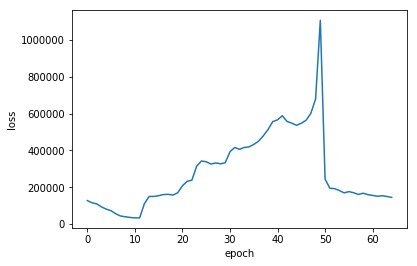

In [12]:
plt.plot(loss_val_list[35:])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()